<a href="https://colab.research.google.com/github/TomohitoFujieda/PoseGeneratorTrain/blob/main/TrainPoseAIbyAngle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/PoseAI_develop/
!ls

/content/drive/MyDrive/PoseAI_develop
CGAN		    model_angle		  pose_data_for_regression_analysis_2.csv
completed_folder    model_angle_tanh	  pose_data_for_regression_analysis_3.csv
coord_emo_combined  model_norm		  pose_data_for_regression_analysis.csv
dataset_angle	    model_norm_2	  pose_data_for_regression_analysis_old2.csv
generated_pose	    model_norm_3	  pose_data_for_regression_analysis_old.csv
images		    model_norm_4	  pose_dataset.csv
images_2	    models		  PoseGenerate.ipynb
Linear		    PoseAI_develop.ipynb  TrainPoseGenAI.ipynb


In [ ]:
keypoint_names = [
    "nose",
    "right_shoulder",
    "left_shoulder",
    "right_thigh",
    "left_thigh",
    "right_elbow",
    "left_elbow",
    "right_hand",
    "left_hand",
    "right_knee",
    "left_knee",
    "right_ankle",
    "left_ankle",
    "right_eye",
    "left_eye",
    "right_ear",
    "left_ear"
]

# データセットの定義

In [ ]:
from torch.utils.data import Subset, Dataset, DataLoader
import torch
import pandas as pd
import torchvision
import torchvision.transforms as transforms

In [ ]:
TRAIN_DATA_NAME = "./dataset_angle/test.csv"
EMOTION_DATA_NAMES = ['joy', 'sadness', 'excited', 'surprise', 'anger', 'fear', 'disgust', 'trust']
POSE_ANGLE_DATA = ["cosine", "sine"]
LIMB_TYPE = ["limb_type"]
BATCH_SIZE = 10
CUDA_LAUNCH_BLOCKING = 1

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = torch.device(device)

In [ ]:
class keypoints_dataset_sin(Dataset):
  def __init__(self, limb_type, emo_type):
    ori_df = pd.read_csv(TRAIN_DATA_NAME)
    df = ori_df[ori_df["limb_type"] == limb_type]
    self.angle = df[["sine"]].values
    self.emotion = df[[emo_type]].values

  def __len__(self):
      return len(self.angle)

  def __getitem__(self, index):
      A = torch.tensor(self.angle[index], dtype=torch.float32)
      B = torch.tensor(self.emotion[index], dtype=torch.float32)

      return A, B

class keypoints_dataset_cos(Dataset):
  def __init__(self, limb_type, emo_type):
    ori_df = pd.read_csv(TRAIN_DATA_NAME)
    df = ori_df[ori_df["limb_type"] == limb_type]
    self.angle = df[["cosine"]].values
    self.emotion = df[[emo_type]].values

  def __len__(self):
      return len(self.angle)

  def __getitem__(self, index):
      A = torch.tensor(self.angle[index], dtype=torch.float32)
      B = torch.tensor(self.emotion[index], dtype=torch.float32)

      return A, B

In [ ]:
datasets = {}
for e in EMOTION_DATA_NAMES:
  datasets[e] = []
  for i in range(len(keypoint_names)):
    dataset = [keypoints_dataset_cos(i, e), keypoints_dataset_sin(i, e)]
    datasets[e].append(dataset)

# モデルの構築

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [ ]:
class keypoint_estimator_angle(nn.Module):
  def __init__(self):
    super().__init__()
    self.l = nn.Linear(1, 1)
  def forward(self, emo):
    x = self.l(emo)
    x = nn.functional.tanh(x)
    return x

In [ ]:
def train_model(dataset, batch_size, model):
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
  # optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

  data_loader = DataLoader(dataset, batch_size, shuffle=True)
  loss_history = []

  for epoch in range(300):
    total_loss = 0
    for angle, emo in data_loader:
      trg_pred = model(emo)
      loss = criterion(trg_pred, angle)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
    loss_history.append(total_loss)
    if (epoch + 1) % 10 == 0:
      print('Epoch [{}], Loss: {:.4f}'.format(epoch + 1, total_loss))

  return loss_history

-=-=- cosine -=-=-
=== joy ===
node: nose
Epoch [10], Loss: 0.4274
Epoch [20], Loss: 0.2269
Epoch [30], Loss: 0.2292
Epoch [40], Loss: 0.2293
Epoch [50], Loss: 0.2258
Epoch [60], Loss: 0.2246
Epoch [70], Loss: 0.2273
Epoch [80], Loss: 0.2265
Epoch [90], Loss: 0.2334
Epoch [100], Loss: 0.2272
Epoch [110], Loss: 0.2246
Epoch [120], Loss: 0.2260
Epoch [130], Loss: 0.2247
Epoch [140], Loss: 0.2323
Epoch [150], Loss: 0.2284
Epoch [160], Loss: 0.2313
Epoch [170], Loss: 0.2292
Epoch [180], Loss: 0.2343
Epoch [190], Loss: 0.2264
Epoch [200], Loss: 0.2279
Epoch [210], Loss: 0.2277
Epoch [220], Loss: 0.2316
Epoch [230], Loss: 0.2338
Epoch [240], Loss: 0.2310
Epoch [250], Loss: 0.2332
Epoch [260], Loss: 0.2320
Epoch [270], Loss: 0.2288
Epoch [280], Loss: 0.2288
Epoch [290], Loss: 0.2317
Epoch [300], Loss: 0.2342


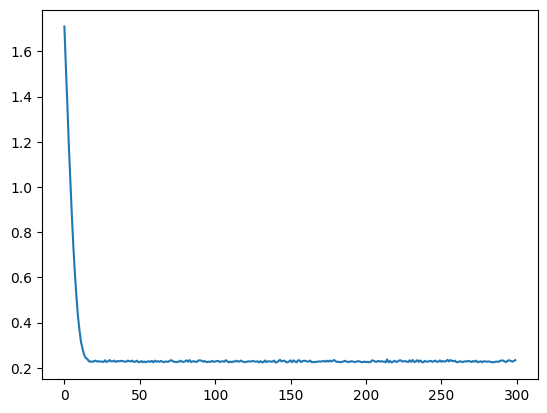

node: right_shoulder
Epoch [10], Loss: 2.7684
Epoch [20], Loss: 1.0109
Epoch [30], Loss: 0.5001
Epoch [40], Loss: 0.3053
Epoch [50], Loss: 0.2106
Epoch [60], Loss: 0.1545
Epoch [70], Loss: 0.1203
Epoch [80], Loss: 0.0964
Epoch [90], Loss: 0.0793
Epoch [100], Loss: 0.0667
Epoch [110], Loss: 0.0573
Epoch [120], Loss: 0.0496
Epoch [130], Loss: 0.0434
Epoch [140], Loss: 0.0385
Epoch [150], Loss: 0.0343
Epoch [160], Loss: 0.0307
Epoch [170], Loss: 0.0280
Epoch [180], Loss: 0.0253
Epoch [190], Loss: 0.0234
Epoch [200], Loss: 0.0214
Epoch [210], Loss: 0.0198
Epoch [220], Loss: 0.0183
Epoch [230], Loss: 0.0170
Epoch [240], Loss: 0.0160
Epoch [250], Loss: 0.0148
Epoch [260], Loss: 0.0139
Epoch [270], Loss: 0.0131
Epoch [280], Loss: 0.0123
Epoch [290], Loss: 0.0117
Epoch [300], Loss: 0.0110


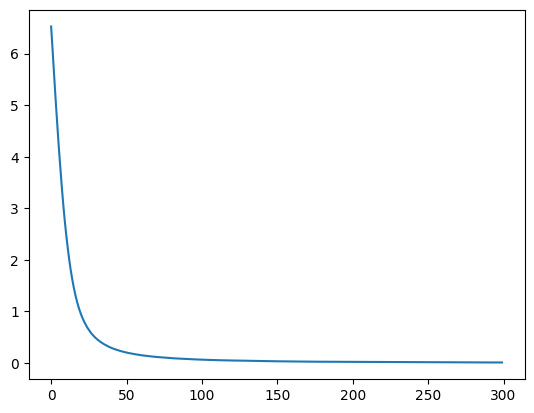

node: left_shoulder
Epoch [10], Loss: 0.1121
Epoch [20], Loss: 0.0481
Epoch [30], Loss: 0.0290
Epoch [40], Loss: 0.0202
Epoch [50], Loss: 0.0151
Epoch [60], Loss: 0.0118
Epoch [70], Loss: 0.0096
Epoch [80], Loss: 0.0081
Epoch [90], Loss: 0.0071
Epoch [100], Loss: 0.0061
Epoch [110], Loss: 0.0055
Epoch [120], Loss: 0.0050
Epoch [130], Loss: 0.0046
Epoch [140], Loss: 0.0042
Epoch [150], Loss: 0.0039
Epoch [160], Loss: 0.0036
Epoch [170], Loss: 0.0034
Epoch [180], Loss: 0.0032
Epoch [190], Loss: 0.0031
Epoch [200], Loss: 0.0029
Epoch [210], Loss: 0.0029
Epoch [220], Loss: 0.0027
Epoch [230], Loss: 0.0027
Epoch [240], Loss: 0.0026
Epoch [250], Loss: 0.0024
Epoch [260], Loss: 0.0024
Epoch [270], Loss: 0.0023
Epoch [280], Loss: 0.0024
Epoch [290], Loss: 0.0022
Epoch [300], Loss: 0.0023


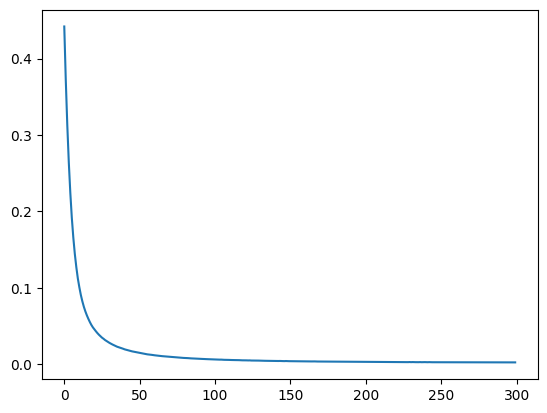

node: right_thigh
Epoch [10], Loss: 1.8745
Epoch [20], Loss: 0.2405
Epoch [30], Loss: 0.0418
Epoch [40], Loss: 0.0351
Epoch [50], Loss: 0.0367
Epoch [60], Loss: 0.0333
Epoch [70], Loss: 0.0324
Epoch [80], Loss: 0.0315
Epoch [90], Loss: 0.0307
Epoch [100], Loss: 0.0301
Epoch [110], Loss: 0.0298
Epoch [120], Loss: 0.0293
Epoch [130], Loss: 0.0291
Epoch [140], Loss: 0.0312
Epoch [150], Loss: 0.0311
Epoch [160], Loss: 0.0284
Epoch [170], Loss: 0.0310
Epoch [180], Loss: 0.0284
Epoch [190], Loss: 0.0283
Epoch [200], Loss: 0.0283
Epoch [210], Loss: 0.0284
Epoch [220], Loss: 0.0284
Epoch [230], Loss: 0.0284
Epoch [240], Loss: 0.0284
Epoch [250], Loss: 0.0307
Epoch [260], Loss: 0.0282
Epoch [270], Loss: 0.0284
Epoch [280], Loss: 0.0283
Epoch [290], Loss: 0.0282
Epoch [300], Loss: 0.0282


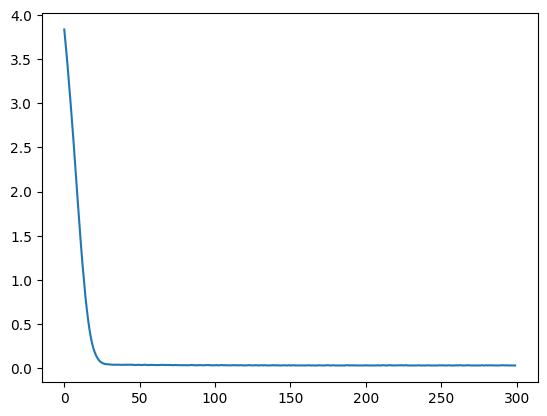

node: left_thigh
Epoch [10], Loss: 0.0591
Epoch [20], Loss: 0.0496
Epoch [30], Loss: 0.0428
Epoch [40], Loss: 0.0373
Epoch [50], Loss: 0.0371
Epoch [60], Loss: 0.0327
Epoch [70], Loss: 0.0322
Epoch [80], Loss: 0.0316
Epoch [90], Loss: 0.0316
Epoch [100], Loss: 0.0316
Epoch [110], Loss: 0.0318
Epoch [120], Loss: 0.0315
Epoch [130], Loss: 0.0342
Epoch [140], Loss: 0.0316
Epoch [150], Loss: 0.0343
Epoch [160], Loss: 0.0315
Epoch [170], Loss: 0.0314
Epoch [180], Loss: 0.0315
Epoch [190], Loss: 0.0316
Epoch [200], Loss: 0.0314
Epoch [210], Loss: 0.0342
Epoch [220], Loss: 0.0316
Epoch [230], Loss: 0.0340
Epoch [240], Loss: 0.0344
Epoch [250], Loss: 0.0319
Epoch [260], Loss: 0.0316
Epoch [270], Loss: 0.0315
Epoch [280], Loss: 0.0315
Epoch [290], Loss: 0.0319
Epoch [300], Loss: 0.0348


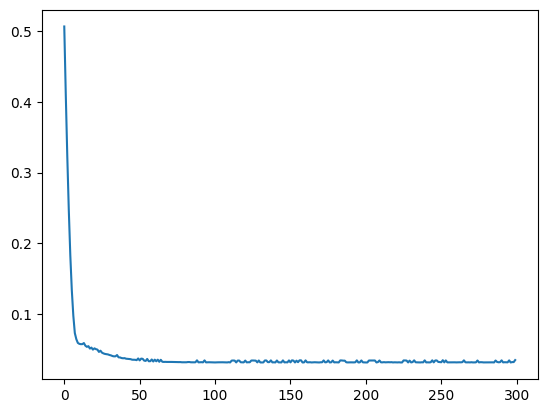

node: right_elbow
Epoch [10], Loss: 0.1510
Epoch [20], Loss: 0.1515
Epoch [30], Loss: 0.1524
Epoch [40], Loss: 0.1519
Epoch [50], Loss: 0.1536
Epoch [60], Loss: 0.1523
Epoch [70], Loss: 0.1541
Epoch [80], Loss: 0.1581
Epoch [90], Loss: 0.1542
Epoch [100], Loss: 0.1550
Epoch [110], Loss: 0.1538
Epoch [120], Loss: 0.1522
Epoch [130], Loss: 0.1539
Epoch [140], Loss: 0.1504
Epoch [150], Loss: 0.1509
Epoch [160], Loss: 0.1548
Epoch [170], Loss: 0.1522
Epoch [180], Loss: 0.1513
Epoch [190], Loss: 0.1505
Epoch [200], Loss: 0.1519
Epoch [210], Loss: 0.1508
Epoch [220], Loss: 0.1537
Epoch [230], Loss: 0.1553
Epoch [240], Loss: 0.1546
Epoch [250], Loss: 0.1528
Epoch [260], Loss: 0.1521
Epoch [270], Loss: 0.1517
Epoch [280], Loss: 0.1560
Epoch [290], Loss: 0.1516
Epoch [300], Loss: 0.1511


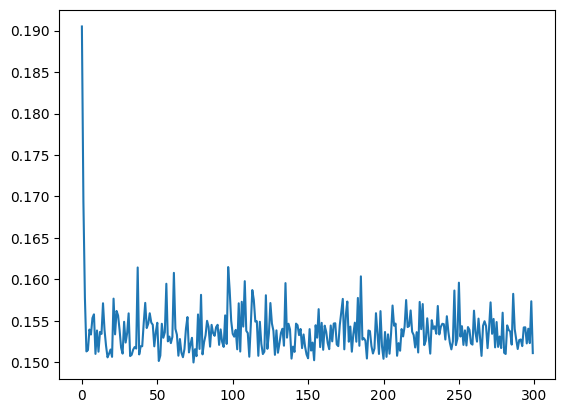

node: left_elbow
Epoch [10], Loss: 0.6312
Epoch [20], Loss: 0.1678
Epoch [30], Loss: 0.1460
Epoch [40], Loss: 0.1397
Epoch [50], Loss: 0.1388
Epoch [60], Loss: 0.1357
Epoch [70], Loss: 0.1294
Epoch [80], Loss: 0.1258
Epoch [90], Loss: 0.1236
Epoch [100], Loss: 0.1225
Epoch [110], Loss: 0.1200
Epoch [120], Loss: 0.1171
Epoch [130], Loss: 0.1162
Epoch [140], Loss: 0.1156
Epoch [150], Loss: 0.1164
Epoch [160], Loss: 0.1164
Epoch [170], Loss: 0.1135
Epoch [180], Loss: 0.1154
Epoch [190], Loss: 0.1160
Epoch [200], Loss: 0.1122
Epoch [210], Loss: 0.1150
Epoch [220], Loss: 0.1118
Epoch [230], Loss: 0.1136
Epoch [240], Loss: 0.1116
Epoch [250], Loss: 0.1174
Epoch [260], Loss: 0.1126
Epoch [270], Loss: 0.1134
Epoch [280], Loss: 0.1116
Epoch [290], Loss: 0.1143
Epoch [300], Loss: 0.1113


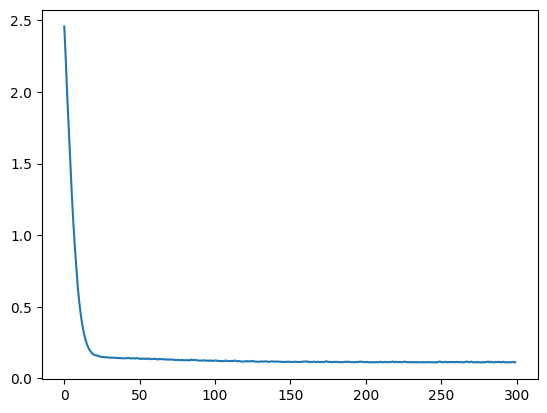

node: right_hand
Epoch [10], Loss: 0.9231
Epoch [20], Loss: 0.7342
Epoch [30], Loss: 0.7065
Epoch [40], Loss: 0.6891
Epoch [50], Loss: 0.7188
Epoch [60], Loss: 0.6825
Epoch [70], Loss: 0.6914
Epoch [80], Loss: 0.6803
Epoch [90], Loss: 0.6845
Epoch [100], Loss: 0.6644
Epoch [110], Loss: 0.6701
Epoch [120], Loss: 0.6591
Epoch [130], Loss: 0.6706
Epoch [140], Loss: 0.6585
Epoch [150], Loss: 0.6662
Epoch [160], Loss: 0.6769
Epoch [170], Loss: 0.6590
Epoch [180], Loss: 0.6712
Epoch [190], Loss: 0.6685
Epoch [200], Loss: 0.6607
Epoch [210], Loss: 0.6666
Epoch [220], Loss: 0.6672
Epoch [230], Loss: 0.6799
Epoch [240], Loss: 0.6711
Epoch [250], Loss: 0.6718
Epoch [260], Loss: 0.6690
Epoch [270], Loss: 0.6660
Epoch [280], Loss: 0.6611
Epoch [290], Loss: 0.6889
Epoch [300], Loss: 0.6753


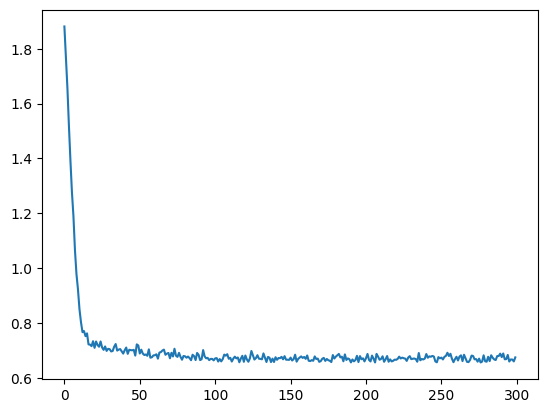

node: left_hand
Epoch [10], Loss: 0.9766
Epoch [20], Loss: 0.9560
Epoch [30], Loss: 0.9753
Epoch [40], Loss: 0.9735
Epoch [50], Loss: 0.9773
Epoch [60], Loss: 0.9505
Epoch [70], Loss: 0.9748
Epoch [80], Loss: 0.9723
Epoch [90], Loss: 0.9735
Epoch [100], Loss: 0.9587
Epoch [110], Loss: 0.9596
Epoch [120], Loss: 0.9572
Epoch [130], Loss: 0.9748
Epoch [140], Loss: 0.9850
Epoch [150], Loss: 0.9553
Epoch [160], Loss: 0.9726
Epoch [170], Loss: 0.9680
Epoch [180], Loss: 0.9807
Epoch [190], Loss: 0.9508
Epoch [200], Loss: 0.9713
Epoch [210], Loss: 0.9647
Epoch [220], Loss: 0.9564
Epoch [230], Loss: 0.9803
Epoch [240], Loss: 0.9618
Epoch [250], Loss: 0.9738
Epoch [260], Loss: 0.9761
Epoch [270], Loss: 0.9679
Epoch [280], Loss: 0.9656
Epoch [290], Loss: 0.9618
Epoch [300], Loss: 0.9821


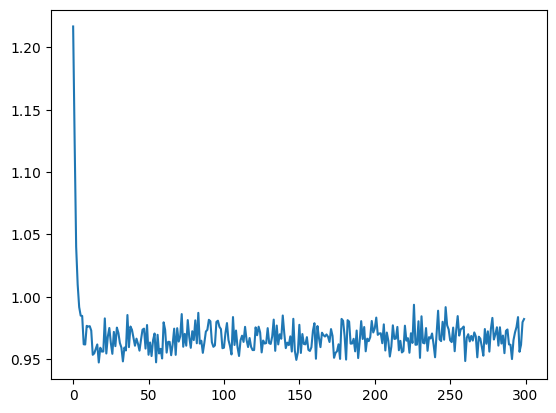

node: right_knee
Epoch [10], Loss: 0.0913
Epoch [20], Loss: 0.0687
Epoch [30], Loss: 0.0632
Epoch [40], Loss: 0.0580
Epoch [50], Loss: 0.0550
Epoch [60], Loss: 0.0526
Epoch [70], Loss: 0.0545
Epoch [80], Loss: 0.0508
Epoch [90], Loss: 0.0506
Epoch [100], Loss: 0.0497
Epoch [110], Loss: 0.0499
Epoch [120], Loss: 0.0496
Epoch [130], Loss: 0.0499
Epoch [140], Loss: 0.0495
Epoch [150], Loss: 0.0497
Epoch [160], Loss: 0.0503
Epoch [170], Loss: 0.0500
Epoch [180], Loss: 0.0520
Epoch [190], Loss: 0.0502
Epoch [200], Loss: 0.0522
Epoch [210], Loss: 0.0500
Epoch [220], Loss: 0.0520
Epoch [230], Loss: 0.0528
Epoch [240], Loss: 0.0502
Epoch [250], Loss: 0.0500
Epoch [260], Loss: 0.0497
Epoch [270], Loss: 0.0499
Epoch [280], Loss: 0.0527
Epoch [290], Loss: 0.0495
Epoch [300], Loss: 0.0503


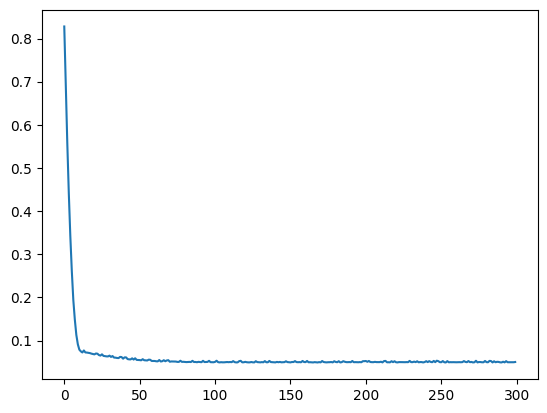

node: left_knee
Epoch [10], Loss: 0.3443
Epoch [20], Loss: 0.1328
Epoch [30], Loss: 0.1101
Epoch [40], Loss: 0.0899
Epoch [50], Loss: 0.0731
Epoch [60], Loss: 0.0592
Epoch [70], Loss: 0.0506
Epoch [80], Loss: 0.0444
Epoch [90], Loss: 0.0408
Epoch [100], Loss: 0.0384
Epoch [110], Loss: 0.0366
Epoch [120], Loss: 0.0359
Epoch [130], Loss: 0.0353
Epoch [140], Loss: 0.0355
Epoch [150], Loss: 0.0346
Epoch [160], Loss: 0.0348
Epoch [170], Loss: 0.0351
Epoch [180], Loss: 0.0357
Epoch [190], Loss: 0.0345
Epoch [200], Loss: 0.0350
Epoch [210], Loss: 0.0346
Epoch [220], Loss: 0.0346
Epoch [230], Loss: 0.0340
Epoch [240], Loss: 0.0348
Epoch [250], Loss: 0.0349
Epoch [260], Loss: 0.0345
Epoch [270], Loss: 0.0347
Epoch [280], Loss: 0.0341
Epoch [290], Loss: 0.0345
Epoch [300], Loss: 0.0349


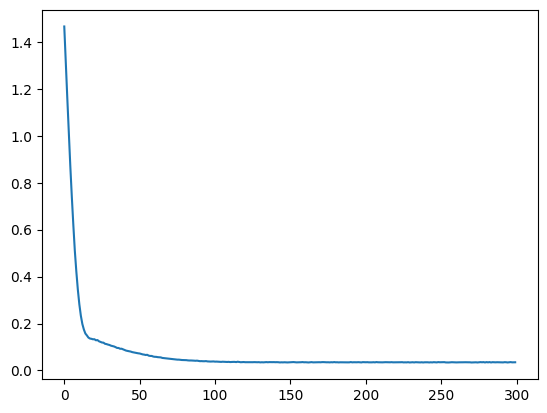

node: right_ankle
Epoch [10], Loss: 0.2016
Epoch [20], Loss: 0.1359
Epoch [30], Loss: 0.1388
Epoch [40], Loss: 0.1333
Epoch [50], Loss: 0.1376
Epoch [60], Loss: 0.1337
Epoch [70], Loss: 0.1363
Epoch [80], Loss: 0.1366
Epoch [90], Loss: 0.1372
Epoch [100], Loss: 0.1403
Epoch [110], Loss: 0.1357
Epoch [120], Loss: 0.1337
Epoch [130], Loss: 0.1336
Epoch [140], Loss: 0.1371
Epoch [150], Loss: 0.1367
Epoch [160], Loss: 0.1331
Epoch [170], Loss: 0.1370
Epoch [180], Loss: 0.1366
Epoch [190], Loss: 0.1342
Epoch [200], Loss: 0.1426
Epoch [210], Loss: 0.1331
Epoch [220], Loss: 0.1365
Epoch [230], Loss: 0.1335
Epoch [240], Loss: 0.1358
Epoch [250], Loss: 0.1332
Epoch [260], Loss: 0.1363
Epoch [270], Loss: 0.1364
Epoch [280], Loss: 0.1371
Epoch [290], Loss: 0.1373
Epoch [300], Loss: 0.1407


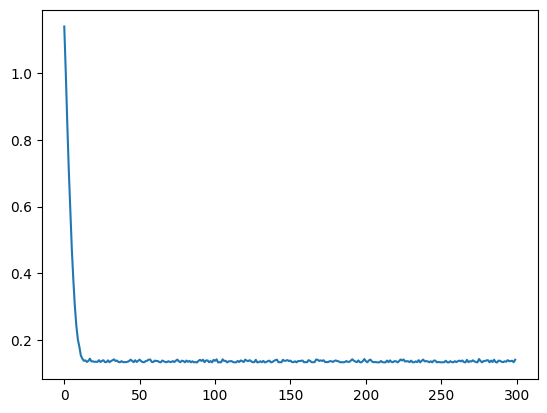

node: left_ankle
Epoch [10], Loss: 0.1035
Epoch [20], Loss: 0.0993
Epoch [30], Loss: 0.0997
Epoch [40], Loss: 0.0963
Epoch [50], Loss: 0.0963
Epoch [60], Loss: 0.0969
Epoch [70], Loss: 0.1033
Epoch [80], Loss: 0.0960
Epoch [90], Loss: 0.0993
Epoch [100], Loss: 0.0990
Epoch [110], Loss: 0.1002
Epoch [120], Loss: 0.0978
Epoch [130], Loss: 0.0967
Epoch [140], Loss: 0.0969
Epoch [150], Loss: 0.0960
Epoch [160], Loss: 0.0962
Epoch [170], Loss: 0.0973
Epoch [180], Loss: 0.0996
Epoch [190], Loss: 0.0964
Epoch [200], Loss: 0.0986
Epoch [210], Loss: 0.0999
Epoch [220], Loss: 0.0983
Epoch [230], Loss: 0.0969
Epoch [240], Loss: 0.0965
Epoch [250], Loss: 0.1027
Epoch [260], Loss: 0.0974
Epoch [270], Loss: 0.1021
Epoch [280], Loss: 0.0994
Epoch [290], Loss: 0.0958
Epoch [300], Loss: 0.0960


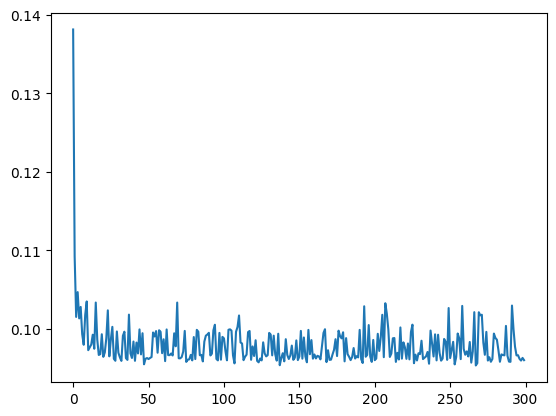

node: right_eye
Epoch [10], Loss: 0.0773
Epoch [20], Loss: 0.0786
Epoch [30], Loss: 0.0780
Epoch [40], Loss: 0.0744
Epoch [50], Loss: 0.0755
Epoch [60], Loss: 0.0747
Epoch [70], Loss: 0.0744
Epoch [80], Loss: 0.0773
Epoch [90], Loss: 0.0775
Epoch [100], Loss: 0.0750
Epoch [110], Loss: 0.0746
Epoch [120], Loss: 0.0776
Epoch [130], Loss: 0.0768
Epoch [140], Loss: 0.0739
Epoch [150], Loss: 0.0757
Epoch [160], Loss: 0.0771
Epoch [170], Loss: 0.0747
Epoch [180], Loss: 0.0753
Epoch [190], Loss: 0.0744
Epoch [200], Loss: 0.0747
Epoch [210], Loss: 0.0744
Epoch [220], Loss: 0.0746
Epoch [230], Loss: 0.0756
Epoch [240], Loss: 0.0746
Epoch [250], Loss: 0.0743
Epoch [260], Loss: 0.0744
Epoch [270], Loss: 0.0752
Epoch [280], Loss: 0.0745
Epoch [290], Loss: 0.0742
Epoch [300], Loss: 0.0741


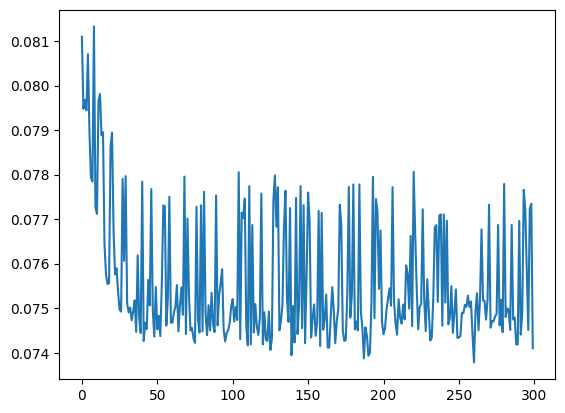

node: left_eye
Epoch [10], Loss: 0.7175
Epoch [20], Loss: 0.1578
Epoch [30], Loss: 0.0850
Epoch [40], Loss: 0.0725
Epoch [50], Loss: 0.0716
Epoch [60], Loss: 0.0713
Epoch [70], Loss: 0.0709
Epoch [80], Loss: 0.0701
Epoch [90], Loss: 0.0702
Epoch [100], Loss: 0.0699
Epoch [110], Loss: 0.0701
Epoch [120], Loss: 0.0705
Epoch [130], Loss: 0.0711
Epoch [140], Loss: 0.0702
Epoch [150], Loss: 0.0698
Epoch [160], Loss: 0.0693
Epoch [170], Loss: 0.0699
Epoch [180], Loss: 0.0700
Epoch [190], Loss: 0.0705
Epoch [200], Loss: 0.0699
Epoch [210], Loss: 0.0711
Epoch [220], Loss: 0.0693
Epoch [230], Loss: 0.0703
Epoch [240], Loss: 0.0708
Epoch [250], Loss: 0.0694
Epoch [260], Loss: 0.0703
Epoch [270], Loss: 0.0697
Epoch [280], Loss: 0.0713
Epoch [290], Loss: 0.0699
Epoch [300], Loss: 0.0697


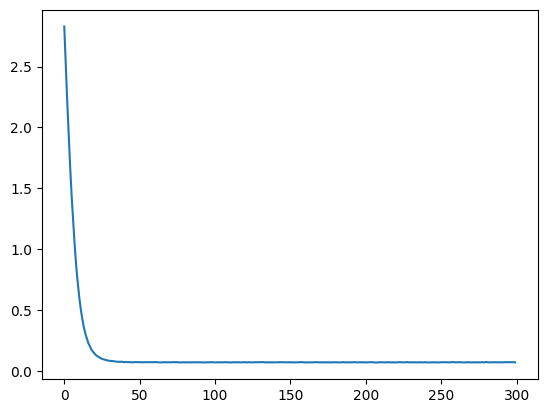

node: right_ear
Epoch [10], Loss: 1.8795
Epoch [20], Loss: 1.1867
Epoch [30], Loss: 1.0858
Epoch [40], Loss: 1.0683
Epoch [50], Loss: 1.0924
Epoch [60], Loss: 1.0626
Epoch [70], Loss: 1.0704
Epoch [80], Loss: 1.0774
Epoch [90], Loss: 1.1164
Epoch [100], Loss: 1.1034
Epoch [110], Loss: 1.0746
Epoch [120], Loss: 1.1015
Epoch [130], Loss: 1.0760
Epoch [140], Loss: 1.0619
Epoch [150], Loss: 1.0620
Epoch [160], Loss: 1.0592
Epoch [170], Loss: 1.0573
Epoch [180], Loss: 1.0836
Epoch [190], Loss: 1.0793
Epoch [200], Loss: 1.0612
Epoch [210], Loss: 1.1053
Epoch [220], Loss: 1.0710
Epoch [230], Loss: 1.0545
Epoch [240], Loss: 1.0899
Epoch [250], Loss: 1.0624
Epoch [260], Loss: 1.0763
Epoch [270], Loss: 1.0582
Epoch [280], Loss: 1.0721
Epoch [290], Loss: 1.0732
Epoch [300], Loss: 1.0621


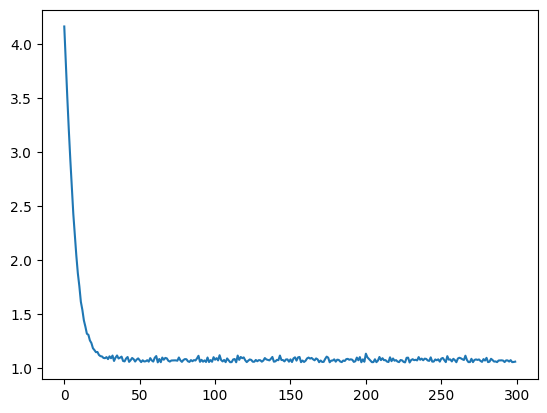

node: left_ear
Epoch [10], Loss: 0.7519
Epoch [20], Loss: 0.7120
Epoch [30], Loss: 0.7467
Epoch [40], Loss: 0.7126
Epoch [50], Loss: 0.7463
Epoch [60], Loss: 0.7134
Epoch [70], Loss: 0.7115
Epoch [80], Loss: 0.7445
Epoch [90], Loss: 0.7450
Epoch [100], Loss: 0.7479
Epoch [110], Loss: 0.7442
Epoch [120], Loss: 0.7449
Epoch [130], Loss: 0.7460
Epoch [140], Loss: 0.7477
Epoch [150], Loss: 0.7124
Epoch [160], Loss: 0.7456
Epoch [170], Loss: 0.7125
Epoch [180], Loss: 0.7456
Epoch [190], Loss: 0.7115
Epoch [200], Loss: 0.7449
Epoch [210], Loss: 0.7117
Epoch [220], Loss: 0.7112
Epoch [230], Loss: 0.7127
Epoch [240], Loss: 0.7128
Epoch [250], Loss: 0.7459
Epoch [260], Loss: 0.7117
Epoch [270], Loss: 0.7117
Epoch [280], Loss: 0.7127
Epoch [290], Loss: 0.7116
Epoch [300], Loss: 0.7461


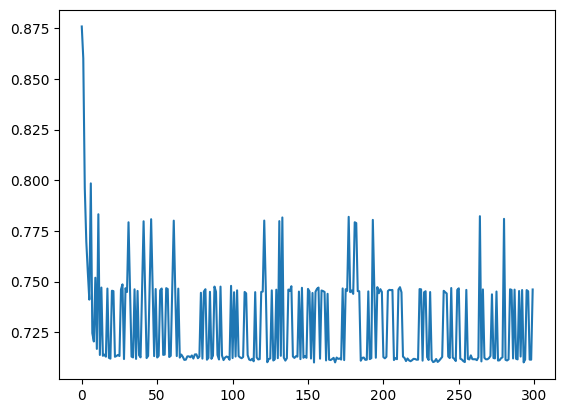

=== sadness ===
node: nose
Epoch [10], Loss: 0.2086
Epoch [20], Loss: 0.2066
Epoch [30], Loss: 0.2023
Epoch [40], Loss: 0.2017
Epoch [50], Loss: 0.2037
Epoch [60], Loss: 0.2054
Epoch [70], Loss: 0.1986
Epoch [80], Loss: 0.2030
Epoch [90], Loss: 0.2018
Epoch [100], Loss: 0.2014
Epoch [110], Loss: 0.2011
Epoch [120], Loss: 0.2048
Epoch [130], Loss: 0.2030
Epoch [140], Loss: 0.2023
Epoch [150], Loss: 0.1983
Epoch [160], Loss: 0.2017
Epoch [170], Loss: 0.2061
Epoch [180], Loss: 0.1995
Epoch [190], Loss: 0.1984
Epoch [200], Loss: 0.2004
Epoch [210], Loss: 0.2051
Epoch [220], Loss: 0.2005
Epoch [230], Loss: 0.2011
Epoch [240], Loss: 0.1990
Epoch [250], Loss: 0.2021
Epoch [260], Loss: 0.2000
Epoch [270], Loss: 0.1994
Epoch [280], Loss: 0.2021
Epoch [290], Loss: 0.2010
Epoch [300], Loss: 0.2015


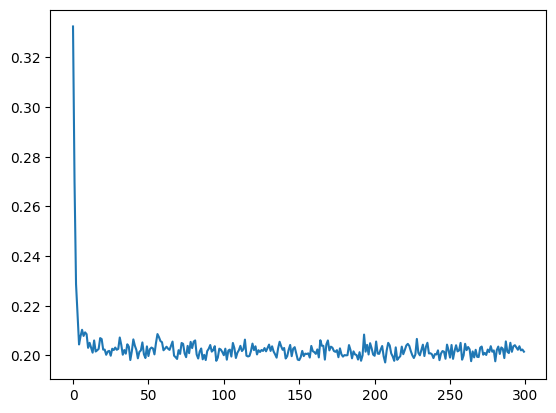

node: right_shoulder
Epoch [10], Loss: 0.0435
Epoch [20], Loss: 0.0191
Epoch [30], Loss: 0.0117
Epoch [40], Loss: 0.0083
Epoch [50], Loss: 0.0063
Epoch [60], Loss: 0.0051
Epoch [70], Loss: 0.0043
Epoch [80], Loss: 0.0037
Epoch [90], Loss: 0.0033
Epoch [100], Loss: 0.0029
Epoch [110], Loss: 0.0026
Epoch [120], Loss: 0.0024
Epoch [130], Loss: 0.0023
Epoch [140], Loss: 0.0021
Epoch [150], Loss: 0.0020
Epoch [160], Loss: 0.0019
Epoch [170], Loss: 0.0018
Epoch [180], Loss: 0.0018
Epoch [190], Loss: 0.0017
Epoch [200], Loss: 0.0016
Epoch [210], Loss: 0.0016
Epoch [220], Loss: 0.0016
Epoch [230], Loss: 0.0015
Epoch [240], Loss: 0.0015
Epoch [250], Loss: 0.0015
Epoch [260], Loss: 0.0015
Epoch [270], Loss: 0.0014
Epoch [280], Loss: 0.0015
Epoch [290], Loss: 0.0014
Epoch [300], Loss: 0.0014


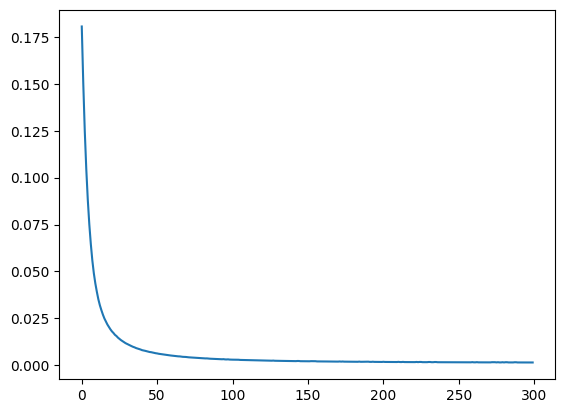

node: left_shoulder
Epoch [10], Loss: 2.3444
Epoch [20], Loss: 0.9337
Epoch [30], Loss: 0.4845
Epoch [40], Loss: 0.2998
Epoch [50], Loss: 0.2062
Epoch [60], Loss: 0.1511
Epoch [70], Loss: 0.1174
Epoch [80], Loss: 0.0925
Epoch [90], Loss: 0.0764
Epoch [100], Loss: 0.0643
Epoch [110], Loss: 0.0546
Epoch [120], Loss: 0.0476
Epoch [130], Loss: 0.0408
Epoch [140], Loss: 0.0368
Epoch [150], Loss: 0.0324
Epoch [160], Loss: 0.0294
Epoch [170], Loss: 0.0263
Epoch [180], Loss: 0.0242
Epoch [190], Loss: 0.0218
Epoch [200], Loss: 0.0201
Epoch [210], Loss: 0.0185
Epoch [220], Loss: 0.0173
Epoch [230], Loss: 0.0161
Epoch [240], Loss: 0.0149
Epoch [250], Loss: 0.0139
Epoch [260], Loss: 0.0131
Epoch [270], Loss: 0.0124
Epoch [280], Loss: 0.0116
Epoch [290], Loss: 0.0108
Epoch [300], Loss: 0.0104


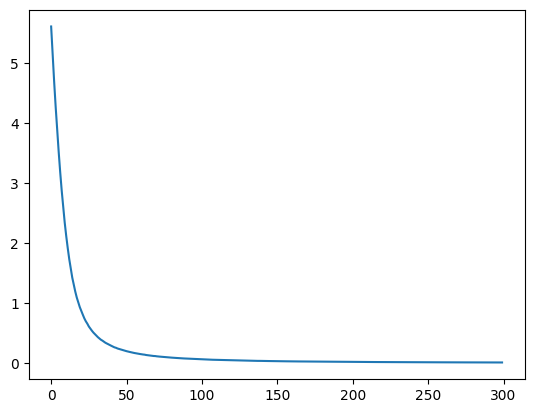

node: right_thigh
Epoch [10], Loss: 1.0814
Epoch [20], Loss: 0.2278
Epoch [30], Loss: 0.1514
Epoch [40], Loss: 0.1313
Epoch [50], Loss: 0.1178
Epoch [60], Loss: 0.1020
Epoch [70], Loss: 0.0866
Epoch [80], Loss: 0.0724
Epoch [90], Loss: 0.0626
Epoch [100], Loss: 0.0536
Epoch [110], Loss: 0.0460
Epoch [120], Loss: 0.0406
Epoch [130], Loss: 0.0367
Epoch [140], Loss: 0.0340
Epoch [150], Loss: 0.0321
Epoch [160], Loss: 0.0308
Epoch [170], Loss: 0.0301
Epoch [180], Loss: 0.0294
Epoch [190], Loss: 0.0292
Epoch [200], Loss: 0.0291
Epoch [210], Loss: 0.0288
Epoch [220], Loss: 0.0312
Epoch [230], Loss: 0.0286
Epoch [240], Loss: 0.0288
Epoch [250], Loss: 0.0312
Epoch [260], Loss: 0.0311
Epoch [270], Loss: 0.0310
Epoch [280], Loss: 0.0310
Epoch [290], Loss: 0.0312
Epoch [300], Loss: 0.0287


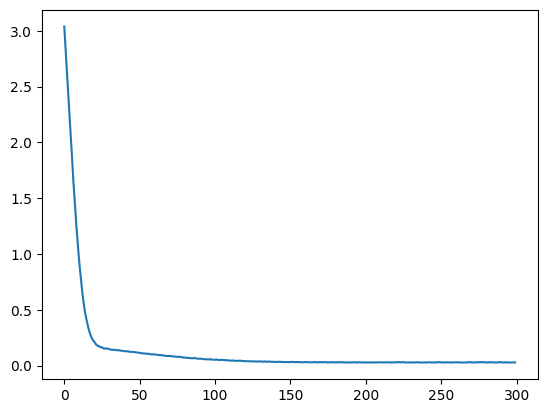

node: left_thigh
Epoch [10], Loss: 0.0887
Epoch [20], Loss: 0.0691
Epoch [30], Loss: 0.0492
Epoch [40], Loss: 0.0394
Epoch [50], Loss: 0.0371
Epoch [60], Loss: 0.0320
Epoch [70], Loss: 0.0335
Epoch [80], Loss: 0.0309
Epoch [90], Loss: 0.0328
Epoch [100], Loss: 0.0303
Epoch [110], Loss: 0.0303
Epoch [120], Loss: 0.0330
Epoch [130], Loss: 0.0305
Epoch [140], Loss: 0.0303
Epoch [150], Loss: 0.0307
Epoch [160], Loss: 0.0328
Epoch [170], Loss: 0.0303
Epoch [180], Loss: 0.0303
Epoch [190], Loss: 0.0303
Epoch [200], Loss: 0.0303
Epoch [210], Loss: 0.0303
Epoch [220], Loss: 0.0305
Epoch [230], Loss: 0.0307
Epoch [240], Loss: 0.0303
Epoch [250], Loss: 0.0304
Epoch [260], Loss: 0.0303
Epoch [270], Loss: 0.0331
Epoch [280], Loss: 0.0304
Epoch [290], Loss: 0.0302
Epoch [300], Loss: 0.0330


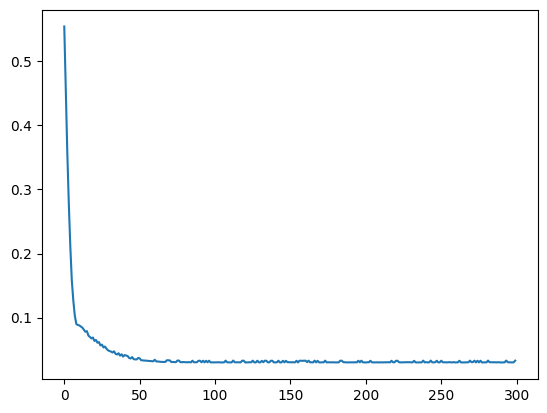

node: right_elbow
Epoch [10], Loss: 1.4748
Epoch [20], Loss: 0.6246
Epoch [30], Loss: 0.4753
Epoch [40], Loss: 0.4435
Epoch [50], Loss: 0.4362
Epoch [60], Loss: 0.3941
Epoch [70], Loss: 0.3761
Epoch [80], Loss: 0.3389
Epoch [90], Loss: 0.3133
Epoch [100], Loss: 0.2850
Epoch [110], Loss: 0.2576
Epoch [120], Loss: 0.2403
Epoch [130], Loss: 0.2204
Epoch [140], Loss: 0.2056
Epoch [150], Loss: 0.1925
Epoch [160], Loss: 0.1879
Epoch [170], Loss: 0.1776
Epoch [180], Loss: 0.1765
Epoch [190], Loss: 0.1722
Epoch [200], Loss: 0.1683
Epoch [210], Loss: 0.1733
Epoch [220], Loss: 0.1666
Epoch [230], Loss: 0.1670
Epoch [240], Loss: 0.1657
Epoch [250], Loss: 0.1676
Epoch [260], Loss: 0.1646
Epoch [270], Loss: 0.1650
Epoch [280], Loss: 0.1658
Epoch [290], Loss: 0.1639
Epoch [300], Loss: 0.1687


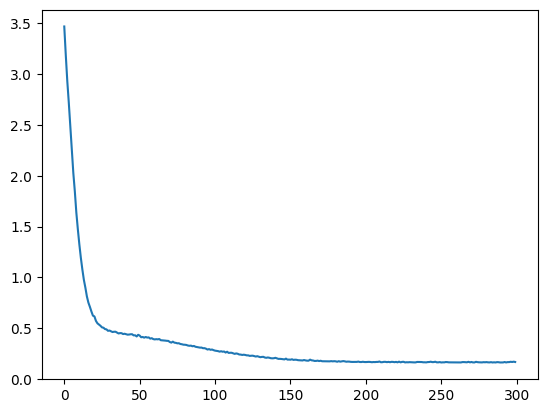

node: left_elbow
Epoch [10], Loss: 2.4812
Epoch [20], Loss: 0.5430
Epoch [30], Loss: 0.2243
Epoch [40], Loss: 0.1901
Epoch [50], Loss: 0.1823
Epoch [60], Loss: 0.1775
Epoch [70], Loss: 0.1662
Epoch [80], Loss: 0.1609
Epoch [90], Loss: 0.1577
Epoch [100], Loss: 0.1499
Epoch [110], Loss: 0.1421
Epoch [120], Loss: 0.1417
Epoch [130], Loss: 0.1352
Epoch [140], Loss: 0.1313
Epoch [150], Loss: 0.1323
Epoch [160], Loss: 0.1280
Epoch [170], Loss: 0.1256
Epoch [180], Loss: 0.1245
Epoch [190], Loss: 0.1261
Epoch [200], Loss: 0.1231
Epoch [210], Loss: 0.1260
Epoch [220], Loss: 0.1250
Epoch [230], Loss: 0.1236
Epoch [240], Loss: 0.1214
Epoch [250], Loss: 0.1223
Epoch [260], Loss: 0.1216
Epoch [270], Loss: 0.1215
Epoch [280], Loss: 0.1225
Epoch [290], Loss: 0.1262
Epoch [300], Loss: 0.1214


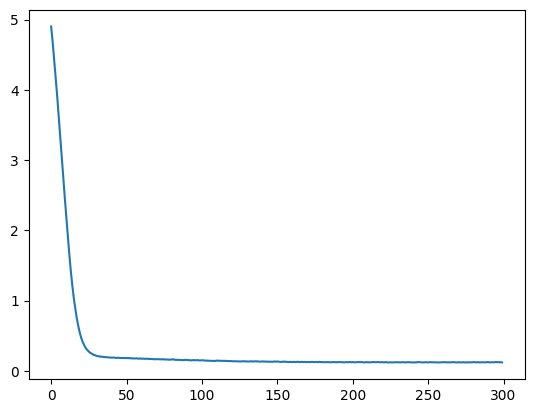

node: right_hand
Epoch [10], Loss: 0.6686
Epoch [20], Loss: 0.6820
Epoch [30], Loss: 0.6735
Epoch [40], Loss: 0.6670
Epoch [50], Loss: 0.6696
Epoch [60], Loss: 0.6700
Epoch [70], Loss: 0.6649
Epoch [80], Loss: 0.6730
Epoch [90], Loss: 0.6800
Epoch [100], Loss: 0.6656
Epoch [110], Loss: 0.6697
Epoch [120], Loss: 0.6822
Epoch [130], Loss: 0.7048
Epoch [140], Loss: 0.6612
Epoch [150], Loss: 0.6692
Epoch [160], Loss: 0.6683
Epoch [170], Loss: 0.6735
Epoch [180], Loss: 0.6705
Epoch [190], Loss: 0.6699
Epoch [200], Loss: 0.6596
Epoch [210], Loss: 0.6688
Epoch [220], Loss: 0.6710
Epoch [230], Loss: 0.6762
Epoch [240], Loss: 0.6915
Epoch [250], Loss: 0.6953
Epoch [260], Loss: 0.6839
Epoch [270], Loss: 0.6803
Epoch [280], Loss: 0.6592
Epoch [290], Loss: 0.6876
Epoch [300], Loss: 0.6694


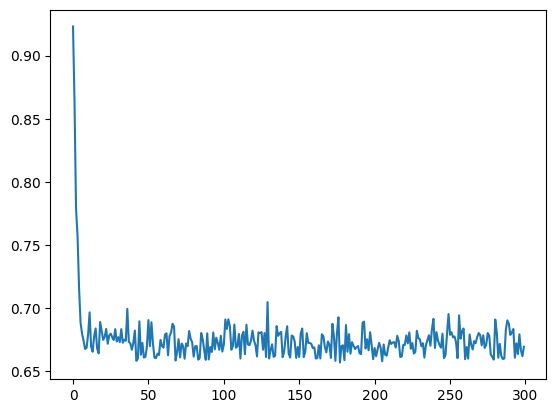

node: left_hand
Epoch [10], Loss: 1.5012
Epoch [20], Loss: 1.0040
Epoch [30], Loss: 0.9889
Epoch [40], Loss: 0.9978
Epoch [50], Loss: 0.9779
Epoch [60], Loss: 0.9734
Epoch [70], Loss: 0.9759
Epoch [80], Loss: 0.9675
Epoch [90], Loss: 0.9614
Epoch [100], Loss: 0.9771
Epoch [110], Loss: 0.9755
Epoch [120], Loss: 0.9635
Epoch [130], Loss: 0.9592
Epoch [140], Loss: 0.9712
Epoch [150], Loss: 0.9470
Epoch [160], Loss: 0.9669
Epoch [170], Loss: 0.9710
Epoch [180], Loss: 0.9636
Epoch [190], Loss: 0.9702
Epoch [200], Loss: 0.9661
Epoch [210], Loss: 0.9667
Epoch [220], Loss: 0.9689
Epoch [230], Loss: 0.9625
Epoch [240], Loss: 0.9573
Epoch [250], Loss: 0.9714
Epoch [260], Loss: 0.9503
Epoch [270], Loss: 0.9503
Epoch [280], Loss: 0.9720
Epoch [290], Loss: 0.9585
Epoch [300], Loss: 0.9539


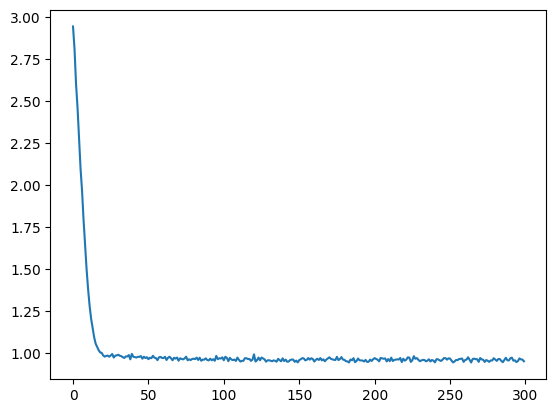

node: right_knee
Epoch [10], Loss: 0.2876
Epoch [20], Loss: 0.1775
Epoch [30], Loss: 0.1466
Epoch [40], Loss: 0.1102
Epoch [50], Loss: 0.0908
Epoch [60], Loss: 0.0728
Epoch [70], Loss: 0.0620
Epoch [80], Loss: 0.0591
Epoch [90], Loss: 0.0528
Epoch [100], Loss: 0.0510
Epoch [110], Loss: 0.0498
Epoch [120], Loss: 0.0494
Epoch [130], Loss: 0.0521
Epoch [140], Loss: 0.0494
Epoch [150], Loss: 0.0499
Epoch [160], Loss: 0.0492
Epoch [170], Loss: 0.0493
Epoch [180], Loss: 0.0517
Epoch [190], Loss: 0.0491
Epoch [200], Loss: 0.0498
Epoch [210], Loss: 0.0490
Epoch [220], Loss: 0.0497
Epoch [230], Loss: 0.0520
Epoch [240], Loss: 0.0499
Epoch [250], Loss: 0.0524
Epoch [260], Loss: 0.0495
Epoch [270], Loss: 0.0498
Epoch [280], Loss: 0.0498
Epoch [290], Loss: 0.0495
Epoch [300], Loss: 0.0520


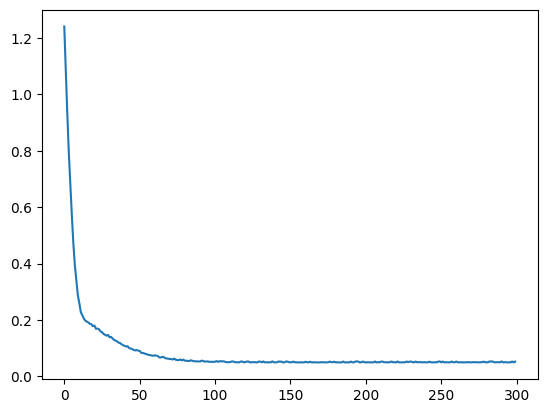

node: left_knee
Epoch [10], Loss: 0.0678
Epoch [20], Loss: 0.0446
Epoch [30], Loss: 0.0381
Epoch [40], Loss: 0.0361
Epoch [50], Loss: 0.0356
Epoch [60], Loss: 0.0344
Epoch [70], Loss: 0.0342
Epoch [80], Loss: 0.0346
Epoch [90], Loss: 0.0344
Epoch [100], Loss: 0.0349
Epoch [110], Loss: 0.0343
Epoch [120], Loss: 0.0351
Epoch [130], Loss: 0.0353
Epoch [140], Loss: 0.0344
Epoch [150], Loss: 0.0350
Epoch [160], Loss: 0.0355
Epoch [170], Loss: 0.0349
Epoch [180], Loss: 0.0348
Epoch [190], Loss: 0.0341
Epoch [200], Loss: 0.0347
Epoch [210], Loss: 0.0349
Epoch [220], Loss: 0.0346
Epoch [230], Loss: 0.0349
Epoch [240], Loss: 0.0340
Epoch [250], Loss: 0.0346
Epoch [260], Loss: 0.0343
Epoch [270], Loss: 0.0350
Epoch [280], Loss: 0.0341
Epoch [290], Loss: 0.0349
Epoch [300], Loss: 0.0349


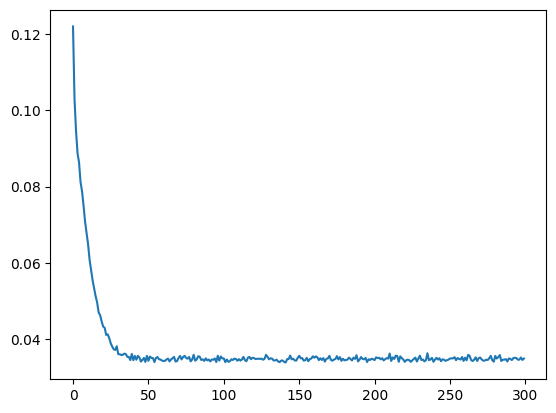

node: right_ankle
Epoch [10], Loss: 0.1379
Epoch [20], Loss: 0.1423
Epoch [30], Loss: 0.1366
Epoch [40], Loss: 0.1331
Epoch [50], Loss: 0.1363
Epoch [60], Loss: 0.1358
Epoch [70], Loss: 0.1383
Epoch [80], Loss: 0.1339
Epoch [90], Loss: 0.1391
Epoch [100], Loss: 0.1367
Epoch [110], Loss: 0.1330
Epoch [120], Loss: 0.1388
Epoch [130], Loss: 0.1342
Epoch [140], Loss: 0.1331
Epoch [150], Loss: 0.1412
Epoch [160], Loss: 0.1343
Epoch [170], Loss: 0.1394
Epoch [180], Loss: 0.1373
Epoch [190], Loss: 0.1386
Epoch [200], Loss: 0.1337
Epoch [210], Loss: 0.1334
Epoch [220], Loss: 0.1340
Epoch [230], Loss: 0.1370
Epoch [240], Loss: 0.1338
Epoch [250], Loss: 0.1422
Epoch [260], Loss: 0.1362
Epoch [270], Loss: 0.1369
Epoch [280], Loss: 0.1417
Epoch [290], Loss: 0.1349
Epoch [300], Loss: 0.1363


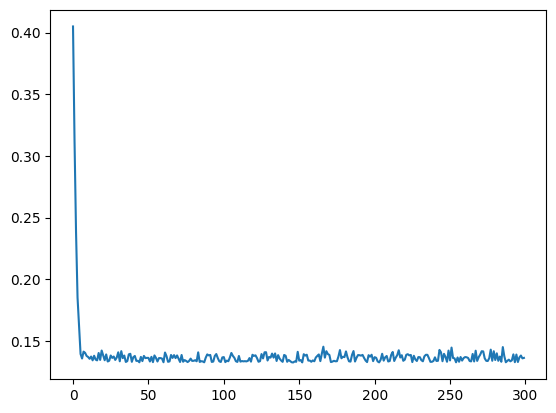

node: left_ankle
Epoch [10], Loss: 0.8221
Epoch [20], Loss: 0.1094
Epoch [30], Loss: 0.1013
Epoch [40], Loss: 0.0969
Epoch [50], Loss: 0.0988
Epoch [60], Loss: 0.0979
Epoch [70], Loss: 0.0953
Epoch [80], Loss: 0.0987
Epoch [90], Loss: 0.0988
Epoch [100], Loss: 0.0989
Epoch [110], Loss: 0.0989
Epoch [120], Loss: 0.0949
Epoch [130], Loss: 0.0951
Epoch [140], Loss: 0.0984
Epoch [150], Loss: 0.0976
Epoch [160], Loss: 0.0959
Epoch [170], Loss: 0.0949
Epoch [180], Loss: 0.0949
Epoch [190], Loss: 0.0989
Epoch [200], Loss: 0.0984
Epoch [210], Loss: 0.0975
Epoch [220], Loss: 0.0975
Epoch [230], Loss: 0.0948
Epoch [240], Loss: 0.0973
Epoch [250], Loss: 0.0958
Epoch [260], Loss: 0.0948
Epoch [270], Loss: 0.0951
Epoch [280], Loss: 0.0953
Epoch [290], Loss: 0.0950
Epoch [300], Loss: 0.0952


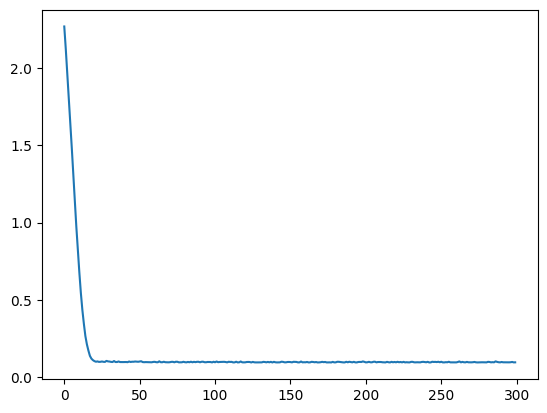

node: right_eye
Epoch [10], Loss: 1.3392
Epoch [20], Loss: 0.4546
Epoch [30], Loss: 0.2481
Epoch [40], Loss: 0.1896
Epoch [50], Loss: 0.1651
Epoch [60], Loss: 0.1563
Epoch [70], Loss: 0.1531
Epoch [80], Loss: 0.1495
Epoch [90], Loss: 0.1484
Epoch [100], Loss: 0.1450
Epoch [110], Loss: 0.1430
Epoch [120], Loss: 0.1435
Epoch [130], Loss: 0.1386
Epoch [140], Loss: 0.1377
Epoch [150], Loss: 0.1346
Epoch [160], Loss: 0.1308
Epoch [170], Loss: 0.1279
Epoch [180], Loss: 0.1249
Epoch [190], Loss: 0.1237
Epoch [200], Loss: 0.1210
Epoch [210], Loss: 0.1152
Epoch [220], Loss: 0.1122
Epoch [230], Loss: 0.1077
Epoch [240], Loss: 0.1057
Epoch [250], Loss: 0.1021
Epoch [260], Loss: 0.1015
Epoch [270], Loss: 0.0962
Epoch [280], Loss: 0.0925
Epoch [290], Loss: 0.0907
Epoch [300], Loss: 0.0877


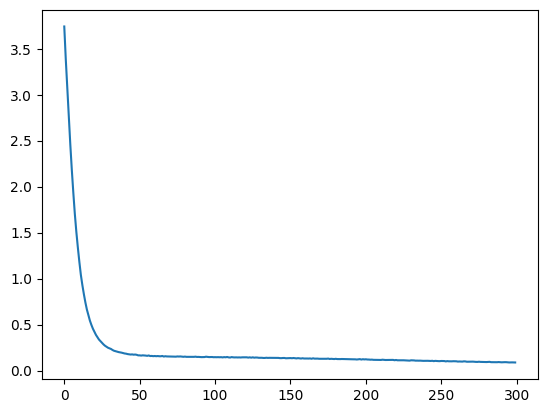

node: left_eye
Epoch [10], Loss: 1.0797
Epoch [20], Loss: 0.2741
Epoch [30], Loss: 0.1416
Epoch [40], Loss: 0.1144
Epoch [50], Loss: 0.1045
Epoch [60], Loss: 0.1016
Epoch [70], Loss: 0.1020
Epoch [80], Loss: 0.0972
Epoch [90], Loss: 0.0943
Epoch [100], Loss: 0.0950
Epoch [110], Loss: 0.0904
Epoch [120], Loss: 0.0899
Epoch [130], Loss: 0.0901
Epoch [140], Loss: 0.0837
Epoch [150], Loss: 0.0834
Epoch [160], Loss: 0.0813
Epoch [170], Loss: 0.0790
Epoch [180], Loss: 0.0783
Epoch [190], Loss: 0.0769
Epoch [200], Loss: 0.0752
Epoch [210], Loss: 0.0743
Epoch [220], Loss: 0.0729
Epoch [230], Loss: 0.0727
Epoch [240], Loss: 0.0715
Epoch [250], Loss: 0.0708
Epoch [260], Loss: 0.0720
Epoch [270], Loss: 0.0703
Epoch [280], Loss: 0.0697
Epoch [290], Loss: 0.0694
Epoch [300], Loss: 0.0699


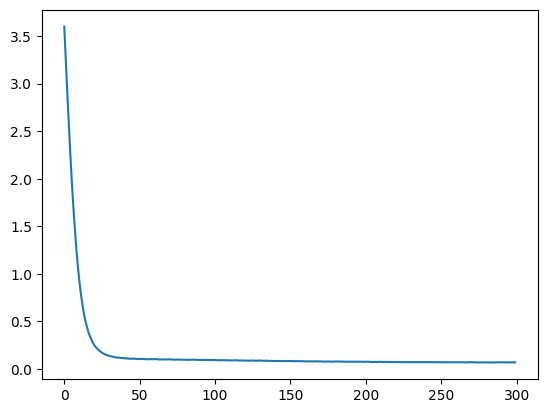

node: right_ear
Epoch [10], Loss: 3.6490
Epoch [20], Loss: 1.6318
Epoch [30], Loss: 1.2267
Epoch [40], Loss: 1.1418
Epoch [50], Loss: 1.1220
Epoch [60], Loss: 1.1533
Epoch [70], Loss: 1.0853
Epoch [80], Loss: 1.0800
Epoch [90], Loss: 1.0916
Epoch [100], Loss: 1.0734
Epoch [110], Loss: 1.0838
Epoch [120], Loss: 1.1042
Epoch [130], Loss: 1.0831
Epoch [140], Loss: 1.0850
Epoch [150], Loss: 1.1145
Epoch [160], Loss: 1.0481
Epoch [170], Loss: 1.0431
Epoch [180], Loss: 1.0492
Epoch [190], Loss: 1.0695
Epoch [200], Loss: 1.0681
Epoch [210], Loss: 1.0500
Epoch [220], Loss: 1.0364
Epoch [230], Loss: 1.0392
Epoch [240], Loss: 1.0544
Epoch [250], Loss: 1.0334
Epoch [260], Loss: 1.0300
Epoch [270], Loss: 1.0450
Epoch [280], Loss: 1.0394
Epoch [290], Loss: 1.0331
Epoch [300], Loss: 1.0590


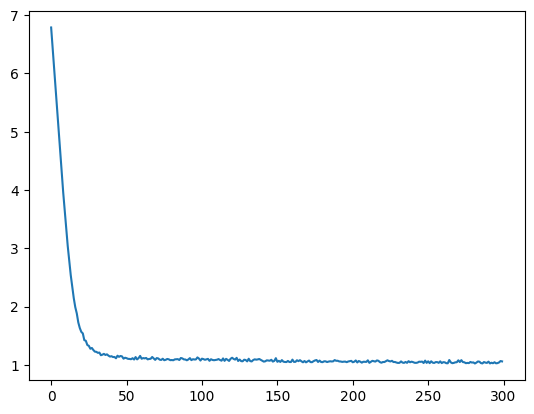

node: left_ear
Epoch [10], Loss: 1.4107
Epoch [20], Loss: 0.8751
Epoch [30], Loss: 0.7351
Epoch [40], Loss: 0.7348
Epoch [50], Loss: 0.6934
Epoch [60], Loss: 0.6856
Epoch [70], Loss: 0.7167
Epoch [80], Loss: 0.6816
Epoch [90], Loss: 0.6806
Epoch [100], Loss: 0.6809
Epoch [110], Loss: 0.7114
Epoch [120], Loss: 0.7128
Epoch [130], Loss: 0.6787
Epoch [140], Loss: 0.7092
Epoch [150], Loss: 0.6759
Epoch [160], Loss: 0.7412
Epoch [170], Loss: 0.7064
Epoch [180], Loss: 0.6750
Epoch [190], Loss: 0.6748
Epoch [200], Loss: 0.6735
Epoch [210], Loss: 0.6733
Epoch [220], Loss: 0.6727
Epoch [230], Loss: 0.7021
Epoch [240], Loss: 0.6726
Epoch [250], Loss: 0.6727
Epoch [260], Loss: 0.6680
Epoch [270], Loss: 0.6689
Epoch [280], Loss: 0.6661
Epoch [290], Loss: 0.7000
Epoch [300], Loss: 0.6663


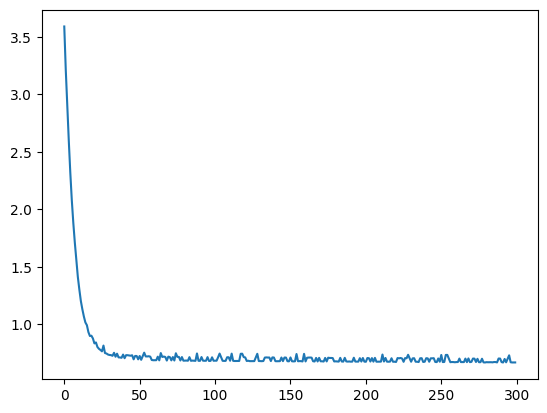

=== excited ===
node: nose
Epoch [10], Loss: 0.2220
Epoch [20], Loss: 0.2229
Epoch [30], Loss: 0.2216
Epoch [40], Loss: 0.2251
Epoch [50], Loss: 0.2222
Epoch [60], Loss: 0.2235
Epoch [70], Loss: 0.2222
Epoch [80], Loss: 0.2244
Epoch [90], Loss: 0.2237
Epoch [100], Loss: 0.2228
Epoch [110], Loss: 0.2250
Epoch [120], Loss: 0.2232
Epoch [130], Loss: 0.2246
Epoch [140], Loss: 0.2303
Epoch [150], Loss: 0.2221
Epoch [160], Loss: 0.2244
Epoch [170], Loss: 0.2278
Epoch [180], Loss: 0.2231
Epoch [190], Loss: 0.2228
Epoch [200], Loss: 0.2209
Epoch [210], Loss: 0.2320
Epoch [220], Loss: 0.2239
Epoch [230], Loss: 0.2200
Epoch [240], Loss: 0.2224
Epoch [250], Loss: 0.2236
Epoch [260], Loss: 0.2293
Epoch [270], Loss: 0.2239
Epoch [280], Loss: 0.2209
Epoch [290], Loss: 0.2282
Epoch [300], Loss: 0.2227


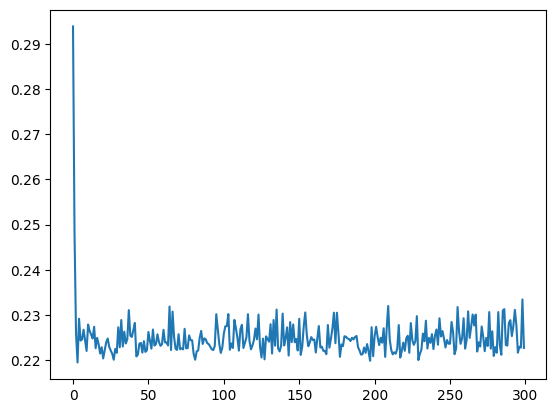

node: right_shoulder
Epoch [10], Loss: 1.4727
Epoch [20], Loss: 0.5813
Epoch [30], Loss: 0.3164
Epoch [40], Loss: 0.2012
Epoch [50], Loss: 0.1414
Epoch [60], Loss: 0.1058
Epoch [70], Loss: 0.0833
Epoch [80], Loss: 0.0671
Epoch [90], Loss: 0.0555
Epoch [100], Loss: 0.0468
Epoch [110], Loss: 0.0398
Epoch [120], Loss: 0.0346
Epoch [130], Loss: 0.0307
Epoch [140], Loss: 0.0270
Epoch [150], Loss: 0.0245
Epoch [160], Loss: 0.0218
Epoch [170], Loss: 0.0198
Epoch [180], Loss: 0.0181
Epoch [190], Loss: 0.0167
Epoch [200], Loss: 0.0154
Epoch [210], Loss: 0.0143
Epoch [220], Loss: 0.0132
Epoch [230], Loss: 0.0123
Epoch [240], Loss: 0.0115
Epoch [250], Loss: 0.0107
Epoch [260], Loss: 0.0100
Epoch [270], Loss: 0.0095
Epoch [280], Loss: 0.0091
Epoch [290], Loss: 0.0085
Epoch [300], Loss: 0.0082


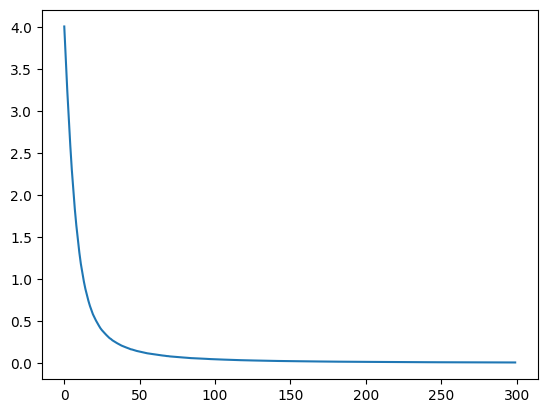

node: left_shoulder
Epoch [10], Loss: 0.1281
Epoch [20], Loss: 0.0551
Epoch [30], Loss: 0.0327
Epoch [40], Loss: 0.0223
Epoch [50], Loss: 0.0168
Epoch [60], Loss: 0.0132
Epoch [70], Loss: 0.0106
Epoch [80], Loss: 0.0090
Epoch [90], Loss: 0.0077
Epoch [100], Loss: 0.0067
Epoch [110], Loss: 0.0060
Epoch [120], Loss: 0.0053
Epoch [130], Loss: 0.0050
Epoch [140], Loss: 0.0046
Epoch [150], Loss: 0.0042
Epoch [160], Loss: 0.0040
Epoch [170], Loss: 0.0037
Epoch [180], Loss: 0.0035
Epoch [190], Loss: 0.0033
Epoch [200], Loss: 0.0032
Epoch [210], Loss: 0.0030
Epoch [220], Loss: 0.0028
Epoch [230], Loss: 0.0027
Epoch [240], Loss: 0.0028
Epoch [250], Loss: 0.0026
Epoch [260], Loss: 0.0025
Epoch [270], Loss: 0.0025
Epoch [280], Loss: 0.0024
Epoch [290], Loss: 0.0023
Epoch [300], Loss: 0.0022


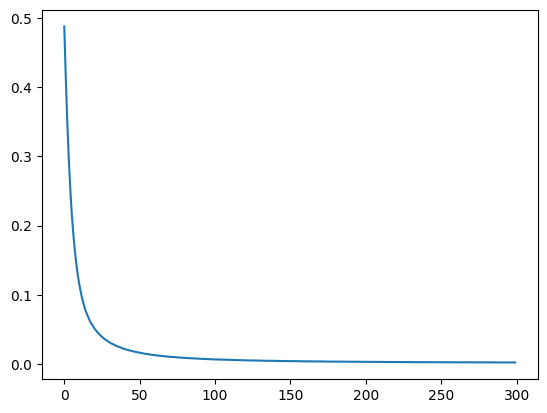

node: right_thigh
Epoch [10], Loss: 0.1174
Epoch [20], Loss: 0.0945
Epoch [30], Loss: 0.0739
Epoch [40], Loss: 0.0584
Epoch [50], Loss: 0.0470
Epoch [60], Loss: 0.0417
Epoch [70], Loss: 0.0345
Epoch [80], Loss: 0.0316
Epoch [90], Loss: 0.0326
Epoch [100], Loss: 0.0294
Epoch [110], Loss: 0.0289
Epoch [120], Loss: 0.0309
Epoch [130], Loss: 0.0311
Epoch [140], Loss: 0.0308
Epoch [150], Loss: 0.0284
Epoch [160], Loss: 0.0308
Epoch [170], Loss: 0.0285
Epoch [180], Loss: 0.0286
Epoch [190], Loss: 0.0284
Epoch [200], Loss: 0.0283
Epoch [210], Loss: 0.0308
Epoch [220], Loss: 0.0286
Epoch [230], Loss: 0.0310
Epoch [240], Loss: 0.0283
Epoch [250], Loss: 0.0286
Epoch [260], Loss: 0.0284
Epoch [270], Loss: 0.0307
Epoch [280], Loss: 0.0284
Epoch [290], Loss: 0.0287
Epoch [300], Loss: 0.0283


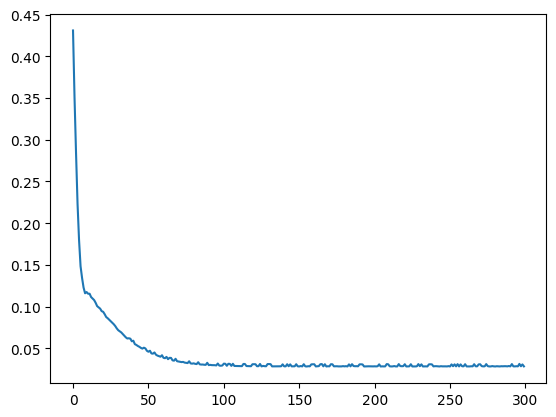

node: left_thigh
Epoch [10], Loss: 1.1182
Epoch [20], Loss: 0.0928
Epoch [30], Loss: 0.0345
Epoch [40], Loss: 0.0340
Epoch [50], Loss: 0.0340
Epoch [60], Loss: 0.0333
Epoch [70], Loss: 0.0333
Epoch [80], Loss: 0.0353
Epoch [90], Loss: 0.0328
Epoch [100], Loss: 0.0325
Epoch [110], Loss: 0.0325
Epoch [120], Loss: 0.0322
Epoch [130], Loss: 0.0319
Epoch [140], Loss: 0.0322
Epoch [150], Loss: 0.0318
Epoch [160], Loss: 0.0318
Epoch [170], Loss: 0.0316
Epoch [180], Loss: 0.0342
Epoch [190], Loss: 0.0341
Epoch [200], Loss: 0.0319
Epoch [210], Loss: 0.0317
Epoch [220], Loss: 0.0316
Epoch [230], Loss: 0.0315
Epoch [240], Loss: 0.0315
Epoch [250], Loss: 0.0317
Epoch [260], Loss: 0.0315
Epoch [270], Loss: 0.0316
Epoch [280], Loss: 0.0317
Epoch [290], Loss: 0.0341
Epoch [300], Loss: 0.0341


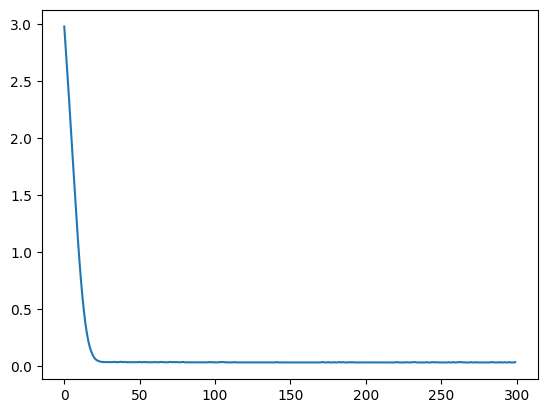

node: right_elbow
Epoch [10], Loss: 0.2506
Epoch [20], Loss: 0.2335
Epoch [30], Loss: 0.2261
Epoch [40], Loss: 0.2159
Epoch [50], Loss: 0.2065
Epoch [60], Loss: 0.2008
Epoch [70], Loss: 0.1957
Epoch [80], Loss: 0.1937
Epoch [90], Loss: 0.1867
Epoch [100], Loss: 0.1788
Epoch [110], Loss: 0.1798
Epoch [120], Loss: 0.1774
Epoch [130], Loss: 0.1743
Epoch [140], Loss: 0.1710
Epoch [150], Loss: 0.1732
Epoch [160], Loss: 0.1721
Epoch [170], Loss: 0.1727
Epoch [180], Loss: 0.1711
Epoch [190], Loss: 0.1751
Epoch [200], Loss: 0.1726
Epoch [210], Loss: 0.1719
Epoch [220], Loss: 0.1727
Epoch [230], Loss: 0.1676
Epoch [240], Loss: 0.1720
Epoch [250], Loss: 0.1703
Epoch [260], Loss: 0.1692
Epoch [270], Loss: 0.1703
Epoch [280], Loss: 0.1712
Epoch [290], Loss: 0.1719
Epoch [300], Loss: 0.1724


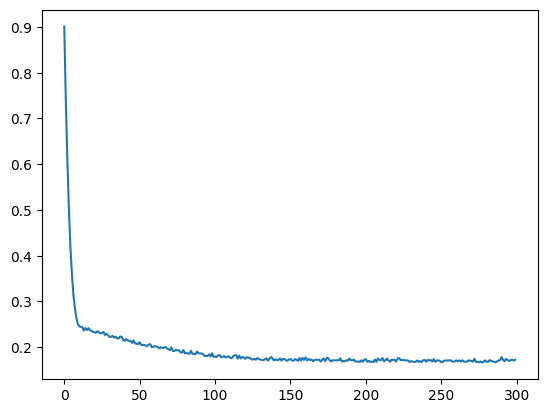

node: left_elbow
Epoch [10], Loss: 0.1426
Epoch [20], Loss: 0.1250
Epoch [30], Loss: 0.1226
Epoch [40], Loss: 0.1256
Epoch [50], Loss: 0.1258
Epoch [60], Loss: 0.1227
Epoch [70], Loss: 0.1235
Epoch [80], Loss: 0.1233
Epoch [90], Loss: 0.1251
Epoch [100], Loss: 0.1235
Epoch [110], Loss: 0.1237
Epoch [120], Loss: 0.1251
Epoch [130], Loss: 0.1283
Epoch [140], Loss: 0.1277
Epoch [150], Loss: 0.1235
Epoch [160], Loss: 0.1252
Epoch [170], Loss: 0.1257
Epoch [180], Loss: 0.1255
Epoch [190], Loss: 0.1245
Epoch [200], Loss: 0.1244
Epoch [210], Loss: 0.1268
Epoch [220], Loss: 0.1229
Epoch [230], Loss: 0.1235
Epoch [240], Loss: 0.1239
Epoch [250], Loss: 0.1251
Epoch [260], Loss: 0.1275
Epoch [270], Loss: 0.1222
Epoch [280], Loss: 0.1222
Epoch [290], Loss: 0.1256
Epoch [300], Loss: 0.1258


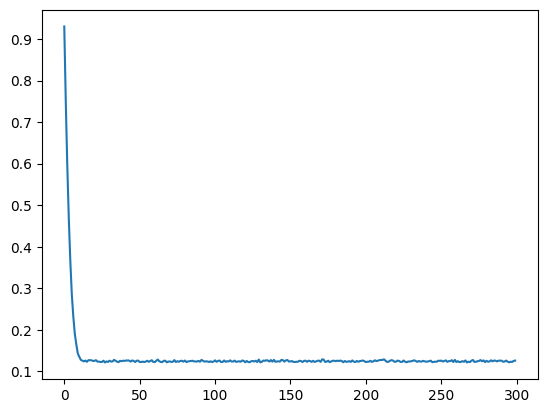

node: right_hand
Epoch [10], Loss: 0.6500
Epoch [20], Loss: 0.6596
Epoch [30], Loss: 0.6562
Epoch [40], Loss: 0.6520
Epoch [50], Loss: 0.6585
Epoch [60], Loss: 0.6700
Epoch [70], Loss: 0.6479
Epoch [80], Loss: 0.6376
Epoch [90], Loss: 0.6487
Epoch [100], Loss: 0.6473
Epoch [110], Loss: 0.6491
Epoch [120], Loss: 0.6598
Epoch [130], Loss: 0.6579
Epoch [140], Loss: 0.6411
Epoch [150], Loss: 0.6466
Epoch [160], Loss: 0.6482
Epoch [170], Loss: 0.6476
Epoch [180], Loss: 0.6435
Epoch [190], Loss: 0.6480
Epoch [200], Loss: 0.6465
Epoch [210], Loss: 0.6492
Epoch [220], Loss: 0.6626
Epoch [230], Loss: 0.6589
Epoch [240], Loss: 0.6607
Epoch [250], Loss: 0.6506
Epoch [260], Loss: 0.6478
Epoch [270], Loss: 0.6545
Epoch [280], Loss: 0.6434
Epoch [290], Loss: 0.6419
Epoch [300], Loss: 0.6521


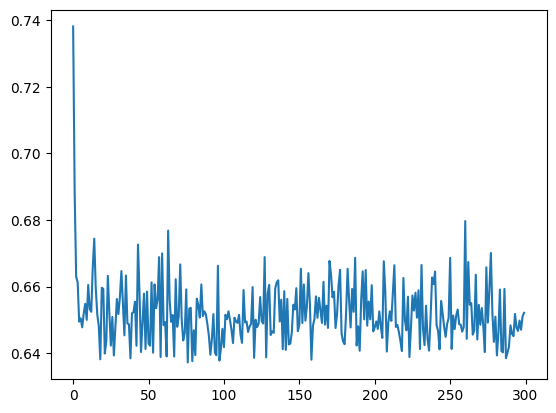

node: left_hand
Epoch [10], Loss: 0.9858
Epoch [20], Loss: 0.9722
Epoch [30], Loss: 0.9711
Epoch [40], Loss: 0.9965
Epoch [50], Loss: 0.9944
Epoch [60], Loss: 0.9805
Epoch [70], Loss: 0.9860
Epoch [80], Loss: 0.9816
Epoch [90], Loss: 0.9756
Epoch [100], Loss: 0.9637
Epoch [110], Loss: 0.9843
Epoch [120], Loss: 0.9803
Epoch [130], Loss: 0.9717
Epoch [140], Loss: 0.9673
Epoch [150], Loss: 0.9681
Epoch [160], Loss: 0.9771
Epoch [170], Loss: 0.9745
Epoch [180], Loss: 0.9673
Epoch [190], Loss: 0.9719
Epoch [200], Loss: 0.9859
Epoch [210], Loss: 0.9791
Epoch [220], Loss: 0.9676
Epoch [230], Loss: 0.9824
Epoch [240], Loss: 0.9753
Epoch [250], Loss: 0.9757
Epoch [260], Loss: 0.9698
Epoch [270], Loss: 0.9603
Epoch [280], Loss: 0.9747
Epoch [290], Loss: 0.9698
Epoch [300], Loss: 0.9670


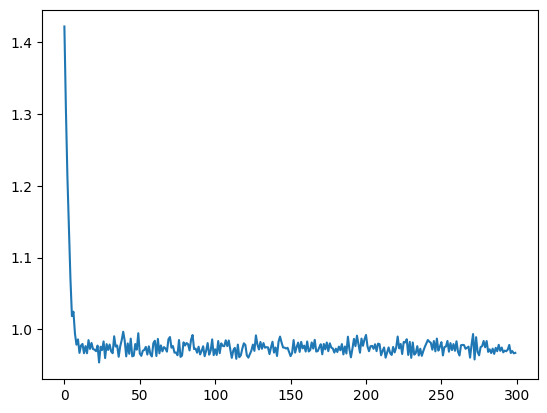

node: right_knee
Epoch [10], Loss: 0.0662
Epoch [20], Loss: 0.0565
Epoch [30], Loss: 0.0556
Epoch [40], Loss: 0.0508
Epoch [50], Loss: 0.0518
Epoch [60], Loss: 0.0499
Epoch [70], Loss: 0.0519
Epoch [80], Loss: 0.0487
Epoch [90], Loss: 0.0520
Epoch [100], Loss: 0.0487
Epoch [110], Loss: 0.0489
Epoch [120], Loss: 0.0496
Epoch [130], Loss: 0.0494
Epoch [140], Loss: 0.0517
Epoch [150], Loss: 0.0496
Epoch [160], Loss: 0.0498
Epoch [170], Loss: 0.0493
Epoch [180], Loss: 0.0486
Epoch [190], Loss: 0.0489
Epoch [200], Loss: 0.0492
Epoch [210], Loss: 0.0487
Epoch [220], Loss: 0.0517
Epoch [230], Loss: 0.0496
Epoch [240], Loss: 0.0523
Epoch [250], Loss: 0.0490
Epoch [260], Loss: 0.0517
Epoch [270], Loss: 0.0492
Epoch [280], Loss: 0.0488
Epoch [290], Loss: 0.0488
Epoch [300], Loss: 0.0497


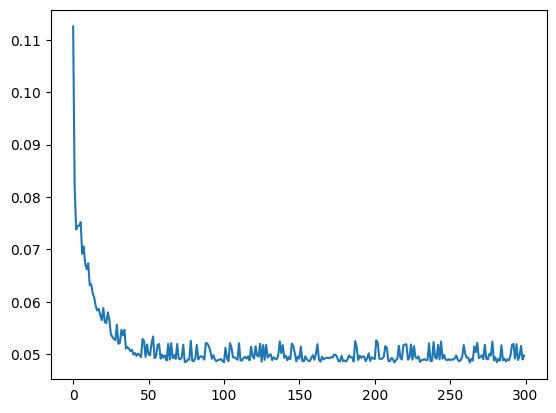

node: left_knee
Epoch [10], Loss: 0.0376
Epoch [20], Loss: 0.0354
Epoch [30], Loss: 0.0350
Epoch [40], Loss: 0.0348
Epoch [50], Loss: 0.0341
Epoch [60], Loss: 0.0348
Epoch [70], Loss: 0.0350
Epoch [80], Loss: 0.0337
Epoch [90], Loss: 0.0338
Epoch [100], Loss: 0.0339
Epoch [110], Loss: 0.0341
Epoch [120], Loss: 0.0348
Epoch [130], Loss: 0.0350
Epoch [140], Loss: 0.0349
Epoch [150], Loss: 0.0341
Epoch [160], Loss: 0.0339
Epoch [170], Loss: 0.0353
Epoch [180], Loss: 0.0340
Epoch [190], Loss: 0.0344
Epoch [200], Loss: 0.0338
Epoch [210], Loss: 0.0346
Epoch [220], Loss: 0.0354
Epoch [230], Loss: 0.0342
Epoch [240], Loss: 0.0347
Epoch [250], Loss: 0.0343
Epoch [260], Loss: 0.0342
Epoch [270], Loss: 0.0343
Epoch [280], Loss: 0.0348
Epoch [290], Loss: 0.0346
Epoch [300], Loss: 0.0344


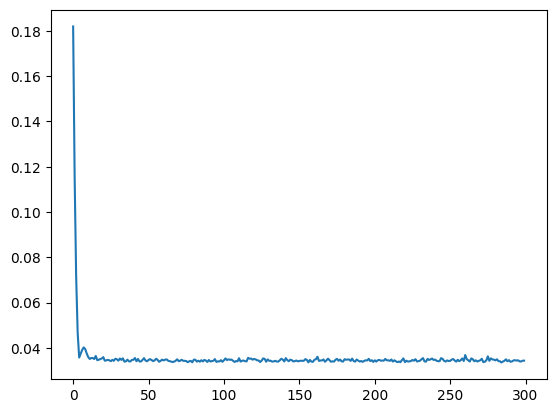

node: right_ankle
Epoch [10], Loss: 0.1752
Epoch [20], Loss: 0.1616
Epoch [30], Loss: 0.1613
Epoch [40], Loss: 0.1454
Epoch [50], Loss: 0.1451
Epoch [60], Loss: 0.1385
Epoch [70], Loss: 0.1354
Epoch [80], Loss: 0.1374
Epoch [90], Loss: 0.1397
Epoch [100], Loss: 0.1342
Epoch [110], Loss: 0.1328
Epoch [120], Loss: 0.1413
Epoch [130], Loss: 0.1361
Epoch [140], Loss: 0.1332
Epoch [150], Loss: 0.1409
Epoch [160], Loss: 0.1380
Epoch [170], Loss: 0.1411
Epoch [180], Loss: 0.1331
Epoch [190], Loss: 0.1369
Epoch [200], Loss: 0.1330
Epoch [210], Loss: 0.1334
Epoch [220], Loss: 0.1378
Epoch [230], Loss: 0.1333
Epoch [240], Loss: 0.1360
Epoch [250], Loss: 0.1333
Epoch [260], Loss: 0.1339
Epoch [270], Loss: 0.1339
Epoch [280], Loss: 0.1330
Epoch [290], Loss: 0.1383
Epoch [300], Loss: 0.1386


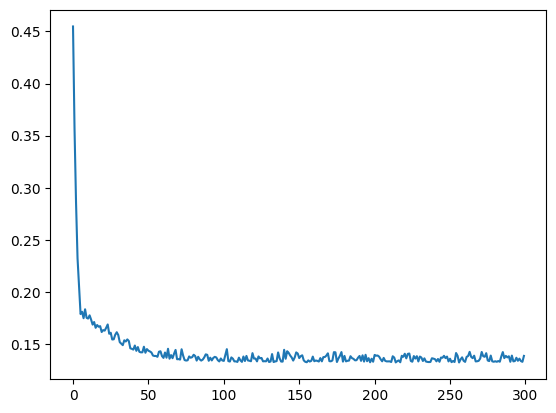

node: left_ankle
Epoch [10], Loss: 0.1021
Epoch [20], Loss: 0.0978
Epoch [30], Loss: 0.0975
Epoch [40], Loss: 0.0999
Epoch [50], Loss: 0.1017
Epoch [60], Loss: 0.0968
Epoch [70], Loss: 0.0977
Epoch [80], Loss: 0.0968
Epoch [90], Loss: 0.0969
Epoch [100], Loss: 0.1000
Epoch [110], Loss: 0.0972
Epoch [120], Loss: 0.0973
Epoch [130], Loss: 0.0989
Epoch [140], Loss: 0.0974
Epoch [150], Loss: 0.0963
Epoch [160], Loss: 0.0988
Epoch [170], Loss: 0.0965
Epoch [180], Loss: 0.0973
Epoch [190], Loss: 0.0967
Epoch [200], Loss: 0.1032
Epoch [210], Loss: 0.1002
Epoch [220], Loss: 0.0996
Epoch [230], Loss: 0.0966
Epoch [240], Loss: 0.0959
Epoch [250], Loss: 0.1021
Epoch [260], Loss: 0.0970
Epoch [270], Loss: 0.1000
Epoch [280], Loss: 0.1009
Epoch [290], Loss: 0.0993
Epoch [300], Loss: 0.0963


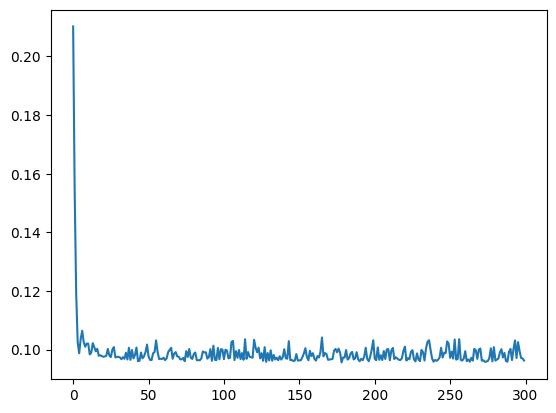

node: right_eye
Epoch [10], Loss: 0.4337
Epoch [20], Loss: 0.1268
Epoch [30], Loss: 0.0855
Epoch [40], Loss: 0.0806
Epoch [50], Loss: 0.0769
Epoch [60], Loss: 0.0765
Epoch [70], Loss: 0.0763
Epoch [80], Loss: 0.0789
Epoch [90], Loss: 0.0757
Epoch [100], Loss: 0.0751
Epoch [110], Loss: 0.0762
Epoch [120], Loss: 0.0756
Epoch [130], Loss: 0.0749
Epoch [140], Loss: 0.0773
Epoch [150], Loss: 0.0742
Epoch [160], Loss: 0.0767
Epoch [170], Loss: 0.0768
Epoch [180], Loss: 0.0749
Epoch [190], Loss: 0.0737
Epoch [200], Loss: 0.0744
Epoch [210], Loss: 0.0737
Epoch [220], Loss: 0.0736
Epoch [230], Loss: 0.0737
Epoch [240], Loss: 0.0731
Epoch [250], Loss: 0.0731
Epoch [260], Loss: 0.0725
Epoch [270], Loss: 0.0764
Epoch [280], Loss: 0.0731
Epoch [290], Loss: 0.0759
Epoch [300], Loss: 0.0726


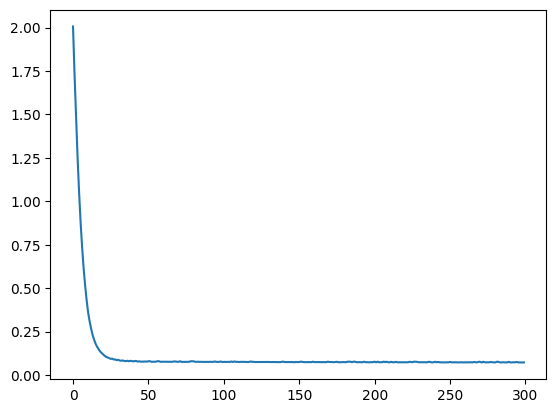

node: left_eye
Epoch [10], Loss: 0.2449
Epoch [20], Loss: 0.0849
Epoch [30], Loss: 0.0719
Epoch [40], Loss: 0.0711
Epoch [50], Loss: 0.0715
Epoch [60], Loss: 0.0723
Epoch [70], Loss: 0.0716
Epoch [80], Loss: 0.0728
Epoch [90], Loss: 0.0722
Epoch [100], Loss: 0.0716
Epoch [110], Loss: 0.0711
Epoch [120], Loss: 0.0707
Epoch [130], Loss: 0.0710
Epoch [140], Loss: 0.0703
Epoch [150], Loss: 0.0695
Epoch [160], Loss: 0.0700
Epoch [170], Loss: 0.0699
Epoch [180], Loss: 0.0694
Epoch [190], Loss: 0.0713
Epoch [200], Loss: 0.0706
Epoch [210], Loss: 0.0701
Epoch [220], Loss: 0.0700
Epoch [230], Loss: 0.0709
Epoch [240], Loss: 0.0697
Epoch [250], Loss: 0.0696
Epoch [260], Loss: 0.0691
Epoch [270], Loss: 0.0703
Epoch [280], Loss: 0.0718
Epoch [290], Loss: 0.0704
Epoch [300], Loss: 0.0699


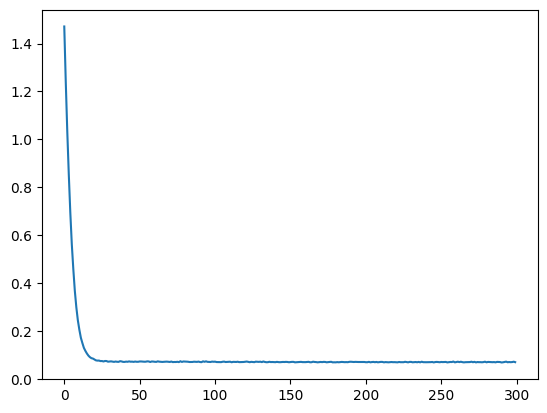

node: right_ear
Epoch [10], Loss: 1.0788
Epoch [20], Loss: 1.0628
Epoch [30], Loss: 1.0550
Epoch [40], Loss: 1.0559
Epoch [50], Loss: 1.0812
Epoch [60], Loss: 1.0720
Epoch [70], Loss: 1.0731
Epoch [80], Loss: 1.0996
Epoch [90], Loss: 1.0580
Epoch [100], Loss: 1.0868
Epoch [110], Loss: 1.0580
Epoch [120], Loss: 1.0553
Epoch [130], Loss: 1.0740
Epoch [140], Loss: 1.0625
Epoch [150], Loss: 1.0561
Epoch [160], Loss: 1.0798
Epoch [170], Loss: 1.0593
Epoch [180], Loss: 1.0582
Epoch [190], Loss: 1.0689
Epoch [200], Loss: 1.0857
Epoch [210], Loss: 1.0770
Epoch [220], Loss: 1.0544
Epoch [230], Loss: 1.0532
Epoch [240], Loss: 1.0688
Epoch [250], Loss: 1.0553
Epoch [260], Loss: 1.0876
Epoch [270], Loss: 1.0740
Epoch [280], Loss: 1.0772
Epoch [290], Loss: 1.0879
Epoch [300], Loss: 1.0819


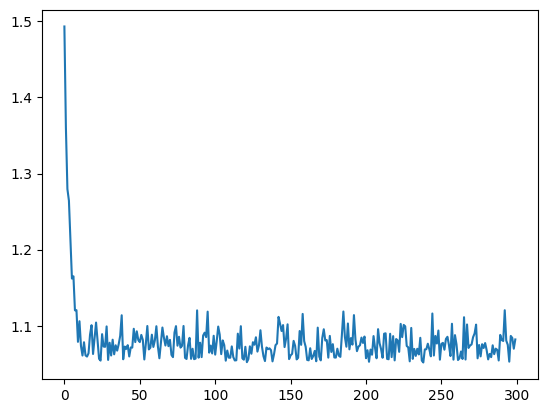

node: left_ear
Epoch [10], Loss: 1.9593
Epoch [20], Loss: 1.0472
Epoch [30], Loss: 0.8750
Epoch [40], Loss: 0.7860
Epoch [50], Loss: 0.7594
Epoch [60], Loss: 0.7805
Epoch [70], Loss: 0.7439
Epoch [80], Loss: 0.7723
Epoch [90], Loss: 0.7364
Epoch [100], Loss: 0.7342
Epoch [110], Loss: 0.7331
Epoch [120], Loss: 0.7336
Epoch [130], Loss: 0.7309
Epoch [140], Loss: 0.7991
Epoch [150], Loss: 0.7303
Epoch [160], Loss: 0.7622
Epoch [170], Loss: 0.7272
Epoch [180], Loss: 0.7271
Epoch [190], Loss: 0.7604
Epoch [200], Loss: 0.7249
Epoch [210], Loss: 0.7248
Epoch [220], Loss: 0.7586
Epoch [230], Loss: 0.7227
Epoch [240], Loss: 0.7216
Epoch [250], Loss: 0.7552
Epoch [260], Loss: 0.7541
Epoch [270], Loss: 0.7520
Epoch [280], Loss: 0.7176
Epoch [290], Loss: 0.7177
Epoch [300], Loss: 0.7157


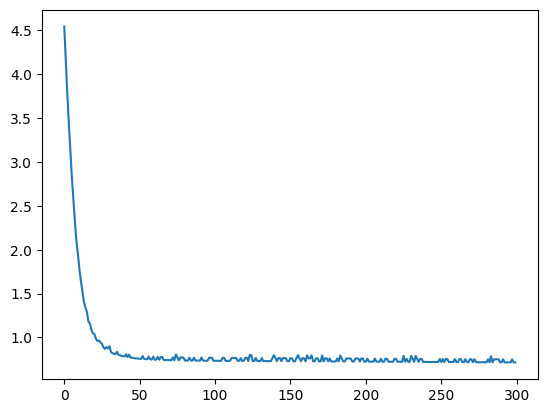

=== surprise ===
node: nose
Epoch [10], Loss: 0.2479
Epoch [20], Loss: 0.2397
Epoch [30], Loss: 0.2396
Epoch [40], Loss: 0.2400
Epoch [50], Loss: 0.2335
Epoch [60], Loss: 0.2343
Epoch [70], Loss: 0.2327
Epoch [80], Loss: 0.2358
Epoch [90], Loss: 0.2303
Epoch [100], Loss: 0.2313
Epoch [110], Loss: 0.2333
Epoch [120], Loss: 0.2323
Epoch [130], Loss: 0.2385
Epoch [140], Loss: 0.2315
Epoch [150], Loss: 0.2346
Epoch [160], Loss: 0.2322
Epoch [170], Loss: 0.2301
Epoch [180], Loss: 0.2394
Epoch [190], Loss: 0.2313
Epoch [200], Loss: 0.2313
Epoch [210], Loss: 0.2327
Epoch [220], Loss: 0.2411
Epoch [230], Loss: 0.2311
Epoch [240], Loss: 0.2397
Epoch [250], Loss: 0.2361
Epoch [260], Loss: 0.2332
Epoch [270], Loss: 0.2330
Epoch [280], Loss: 0.2364
Epoch [290], Loss: 0.2356
Epoch [300], Loss: 0.2380


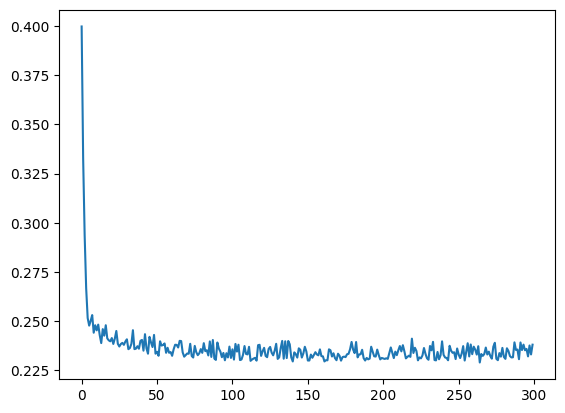

node: right_shoulder
Epoch [10], Loss: 3.2643
Epoch [20], Loss: 1.2585
Epoch [30], Loss: 0.6208
Epoch [40], Loss: 0.3721
Epoch [50], Loss: 0.2519
Epoch [60], Loss: 0.1836
Epoch [70], Loss: 0.1405
Epoch [80], Loss: 0.1122
Epoch [90], Loss: 0.0923
Epoch [100], Loss: 0.0770
Epoch [110], Loss: 0.0658
Epoch [120], Loss: 0.0565
Epoch [130], Loss: 0.0498
Epoch [140], Loss: 0.0437
Epoch [150], Loss: 0.0390
Epoch [160], Loss: 0.0350
Epoch [170], Loss: 0.0317
Epoch [180], Loss: 0.0288
Epoch [190], Loss: 0.0263
Epoch [200], Loss: 0.0242
Epoch [210], Loss: 0.0223
Epoch [220], Loss: 0.0209
Epoch [230], Loss: 0.0193
Epoch [240], Loss: 0.0179
Epoch [250], Loss: 0.0169
Epoch [260], Loss: 0.0158
Epoch [270], Loss: 0.0147
Epoch [280], Loss: 0.0139
Epoch [290], Loss: 0.0132
Epoch [300], Loss: 0.0124


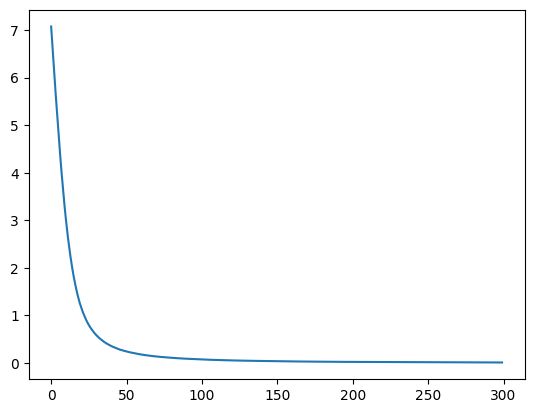

node: left_shoulder
Epoch [10], Loss: 4.4486
Epoch [20], Loss: 1.7273
Epoch [30], Loss: 0.8000
Epoch [40], Loss: 0.4645
Epoch [50], Loss: 0.3044
Epoch [60], Loss: 0.2199
Epoch [70], Loss: 0.1672
Epoch [80], Loss: 0.1324
Epoch [90], Loss: 0.1078
Epoch [100], Loss: 0.0894
Epoch [110], Loss: 0.0766
Epoch [120], Loss: 0.0657
Epoch [130], Loss: 0.0575
Epoch [140], Loss: 0.0508
Epoch [150], Loss: 0.0451
Epoch [160], Loss: 0.0406
Epoch [170], Loss: 0.0365
Epoch [180], Loss: 0.0333
Epoch [190], Loss: 0.0303
Epoch [200], Loss: 0.0278
Epoch [210], Loss: 0.0256
Epoch [220], Loss: 0.0238
Epoch [230], Loss: 0.0220
Epoch [240], Loss: 0.0204
Epoch [250], Loss: 0.0192
Epoch [260], Loss: 0.0181
Epoch [270], Loss: 0.0169
Epoch [280], Loss: 0.0159
Epoch [290], Loss: 0.0151
Epoch [300], Loss: 0.0143


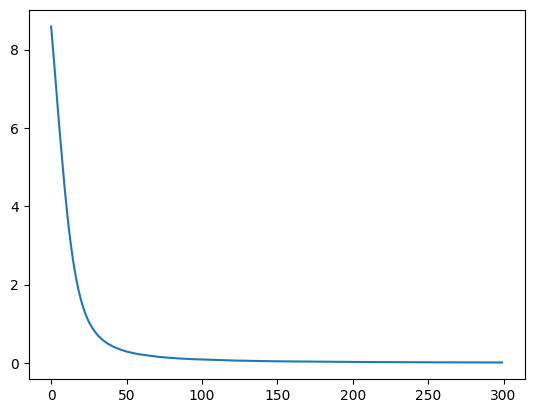

node: right_thigh
Epoch [10], Loss: 0.0238
Epoch [20], Loss: 0.0217
Epoch [30], Loss: 0.0214
Epoch [40], Loss: 0.0212
Epoch [50], Loss: 0.0210
Epoch [60], Loss: 0.0209
Epoch [70], Loss: 0.0210
Epoch [80], Loss: 0.0211
Epoch [90], Loss: 0.0212
Epoch [100], Loss: 0.0219
Epoch [110], Loss: 0.0208
Epoch [120], Loss: 0.0214
Epoch [130], Loss: 0.0209
Epoch [140], Loss: 0.0209
Epoch [150], Loss: 0.0208
Epoch [160], Loss: 0.0209
Epoch [170], Loss: 0.0224
Epoch [180], Loss: 0.0217
Epoch [190], Loss: 0.0207
Epoch [200], Loss: 0.0221
Epoch [210], Loss: 0.0209
Epoch [220], Loss: 0.0218
Epoch [230], Loss: 0.0218
Epoch [240], Loss: 0.0219
Epoch [250], Loss: 0.0210
Epoch [260], Loss: 0.0208
Epoch [270], Loss: 0.0213
Epoch [280], Loss: 0.0220
Epoch [290], Loss: 0.0209
Epoch [300], Loss: 0.0207


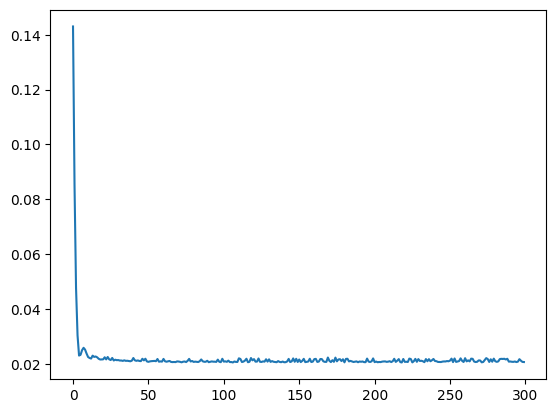

node: left_thigh
Epoch [10], Loss: 0.1564
Epoch [20], Loss: 0.0491
Epoch [30], Loss: 0.0479
Epoch [40], Loss: 0.0406
Epoch [50], Loss: 0.0372
Epoch [60], Loss: 0.0373
Epoch [70], Loss: 0.0343
Epoch [80], Loss: 0.0300
Epoch [90], Loss: 0.0298
Epoch [100], Loss: 0.0264
Epoch [110], Loss: 0.0253
Epoch [120], Loss: 0.0243
Epoch [130], Loss: 0.0235
Epoch [140], Loss: 0.0234
Epoch [150], Loss: 0.0229
Epoch [160], Loss: 0.0226
Epoch [170], Loss: 0.0224
Epoch [180], Loss: 0.0234
Epoch [190], Loss: 0.0222
Epoch [200], Loss: 0.0224
Epoch [210], Loss: 0.0231
Epoch [220], Loss: 0.0222
Epoch [230], Loss: 0.0221
Epoch [240], Loss: 0.0234
Epoch [250], Loss: 0.0232
Epoch [260], Loss: 0.0222
Epoch [270], Loss: 0.0231
Epoch [280], Loss: 0.0231
Epoch [290], Loss: 0.0224
Epoch [300], Loss: 0.0220


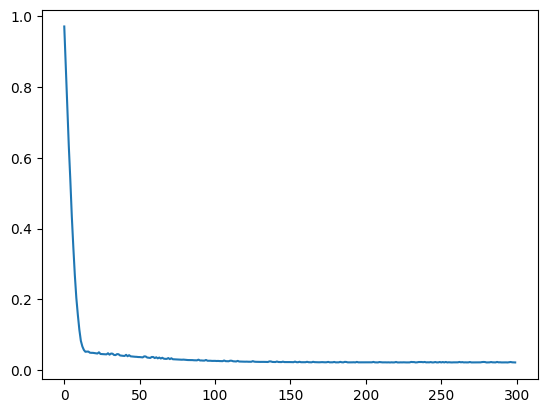

node: right_elbow
Epoch [10], Loss: 0.1920
Epoch [20], Loss: 0.1815
Epoch [30], Loss: 0.1759
Epoch [40], Loss: 0.1677
Epoch [50], Loss: 0.1579
Epoch [60], Loss: 0.1531
Epoch [70], Loss: 0.1485
Epoch [80], Loss: 0.1440
Epoch [90], Loss: 0.1387
Epoch [100], Loss: 0.1374
Epoch [110], Loss: 0.1335
Epoch [120], Loss: 0.1336
Epoch [130], Loss: 0.1287
Epoch [140], Loss: 0.1276
Epoch [150], Loss: 0.1305
Epoch [160], Loss: 0.1259
Epoch [170], Loss: 0.1291
Epoch [180], Loss: 0.1249
Epoch [190], Loss: 0.1250
Epoch [200], Loss: 0.1233
Epoch [210], Loss: 0.1246
Epoch [220], Loss: 0.1250
Epoch [230], Loss: 0.1242
Epoch [240], Loss: 0.1236
Epoch [250], Loss: 0.1217
Epoch [260], Loss: 0.1215
Epoch [270], Loss: 0.1212
Epoch [280], Loss: 0.1214
Epoch [290], Loss: 0.1275
Epoch [300], Loss: 0.1214


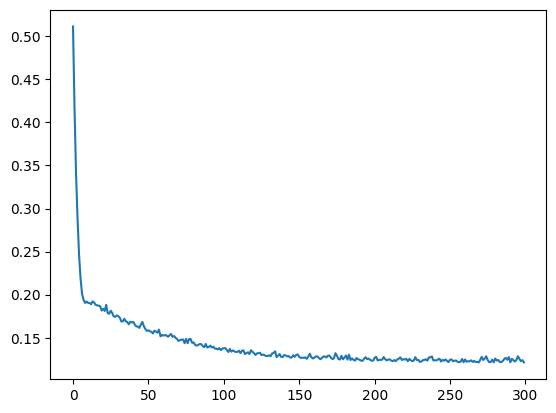

node: left_elbow
Epoch [10], Loss: 0.1291
Epoch [20], Loss: 0.1294
Epoch [30], Loss: 0.1319
Epoch [40], Loss: 0.1282
Epoch [50], Loss: 0.1305
Epoch [60], Loss: 0.1314
Epoch [70], Loss: 0.1278
Epoch [80], Loss: 0.1291
Epoch [90], Loss: 0.1283
Epoch [100], Loss: 0.1276
Epoch [110], Loss: 0.1293
Epoch [120], Loss: 0.1304
Epoch [130], Loss: 0.1279
Epoch [140], Loss: 0.1278
Epoch [150], Loss: 0.1282
Epoch [160], Loss: 0.1304
Epoch [170], Loss: 0.1283
Epoch [180], Loss: 0.1287
Epoch [190], Loss: 0.1306
Epoch [200], Loss: 0.1270
Epoch [210], Loss: 0.1313
Epoch [220], Loss: 0.1323
Epoch [230], Loss: 0.1281
Epoch [240], Loss: 0.1324
Epoch [250], Loss: 0.1310
Epoch [260], Loss: 0.1336
Epoch [270], Loss: 0.1323
Epoch [280], Loss: 0.1303
Epoch [290], Loss: 0.1273
Epoch [300], Loss: 0.1275


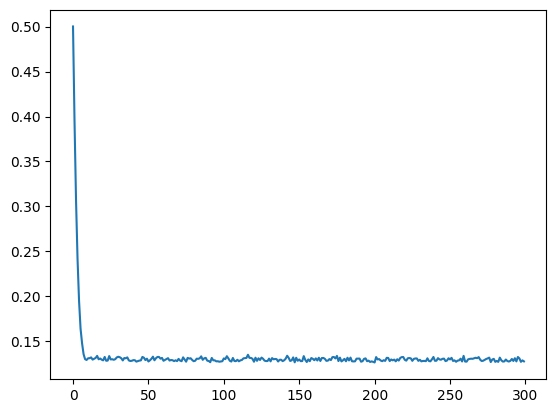

node: right_hand
Epoch [10], Loss: 0.6860
Epoch [20], Loss: 0.6770
Epoch [30], Loss: 0.6724
Epoch [40], Loss: 0.6576
Epoch [50], Loss: 0.6638
Epoch [60], Loss: 0.6646
Epoch [70], Loss: 0.6568
Epoch [80], Loss: 0.6600
Epoch [90], Loss: 0.6731
Epoch [100], Loss: 0.6474
Epoch [110], Loss: 0.6393
Epoch [120], Loss: 0.6483
Epoch [130], Loss: 0.6458
Epoch [140], Loss: 0.6585
Epoch [150], Loss: 0.6771
Epoch [160], Loss: 0.6494
Epoch [170], Loss: 0.6463
Epoch [180], Loss: 0.6477
Epoch [190], Loss: 0.6399
Epoch [200], Loss: 0.6591
Epoch [210], Loss: 0.6433
Epoch [220], Loss: 0.6361
Epoch [230], Loss: 0.6478
Epoch [240], Loss: 0.6480
Epoch [250], Loss: 0.6397
Epoch [260], Loss: 0.6474
Epoch [270], Loss: 0.6481
Epoch [280], Loss: 0.6380
Epoch [290], Loss: 0.6457
Epoch [300], Loss: 0.6563


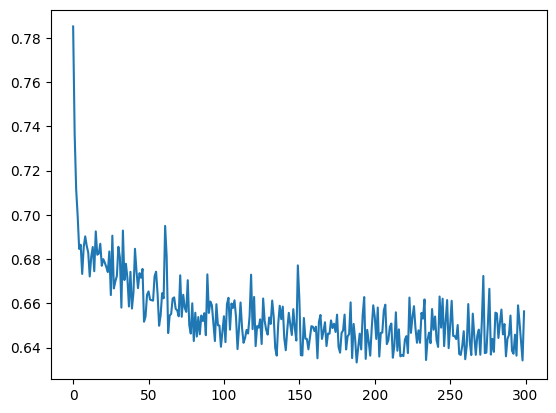

node: left_hand
Epoch [10], Loss: 1.3266
Epoch [20], Loss: 1.0570
Epoch [30], Loss: 1.0462
Epoch [40], Loss: 1.0408
Epoch [50], Loss: 1.0143
Epoch [60], Loss: 0.9879
Epoch [70], Loss: 0.9749
Epoch [80], Loss: 0.9617
Epoch [90], Loss: 0.9603
Epoch [100], Loss: 0.9337
Epoch [110], Loss: 0.9411
Epoch [120], Loss: 0.9355
Epoch [130], Loss: 0.9365
Epoch [140], Loss: 0.9109
Epoch [150], Loss: 0.8952
Epoch [160], Loss: 0.8972
Epoch [170], Loss: 0.9075
Epoch [180], Loss: 0.8825
Epoch [190], Loss: 0.8837
Epoch [200], Loss: 0.8965
Epoch [210], Loss: 0.9042
Epoch [220], Loss: 0.8795
Epoch [230], Loss: 0.8675
Epoch [240], Loss: 0.8706
Epoch [250], Loss: 0.8736
Epoch [260], Loss: 0.8993
Epoch [270], Loss: 0.8709
Epoch [280], Loss: 0.8733
Epoch [290], Loss: 0.8875
Epoch [300], Loss: 0.8628


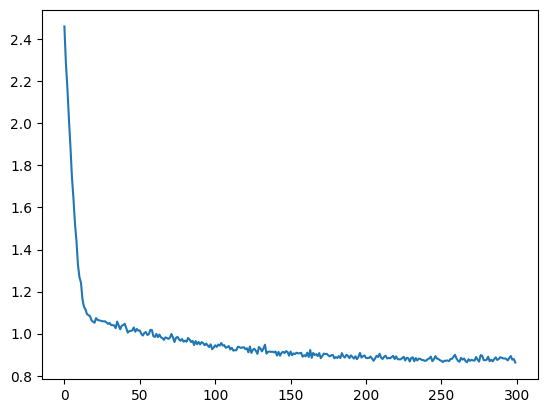

node: right_knee
Epoch [10], Loss: 0.5384
Epoch [20], Loss: 0.0500
Epoch [30], Loss: 0.0463
Epoch [40], Loss: 0.0462
Epoch [50], Loss: 0.0490
Epoch [60], Loss: 0.0461
Epoch [70], Loss: 0.0491
Epoch [80], Loss: 0.0463
Epoch [90], Loss: 0.0461
Epoch [100], Loss: 0.0462
Epoch [110], Loss: 0.0463
Epoch [120], Loss: 0.0458
Epoch [130], Loss: 0.0462
Epoch [140], Loss: 0.0489
Epoch [150], Loss: 0.0460
Epoch [160], Loss: 0.0462
Epoch [170], Loss: 0.0458
Epoch [180], Loss: 0.0461
Epoch [190], Loss: 0.0458
Epoch [200], Loss: 0.0457
Epoch [210], Loss: 0.0463
Epoch [220], Loss: 0.0489
Epoch [230], Loss: 0.0459
Epoch [240], Loss: 0.0485
Epoch [250], Loss: 0.0457
Epoch [260], Loss: 0.0491
Epoch [270], Loss: 0.0488
Epoch [280], Loss: 0.0457
Epoch [290], Loss: 0.0459
Epoch [300], Loss: 0.0457


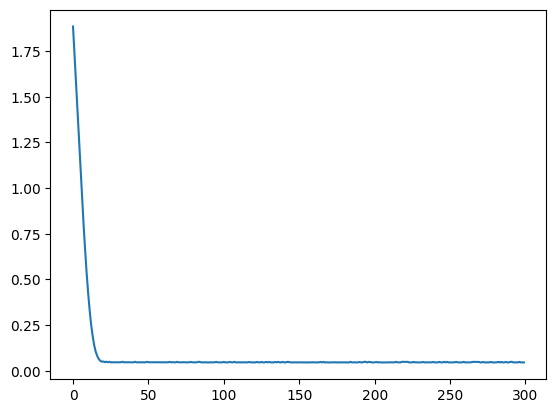

node: left_knee
Epoch [10], Loss: 0.0336
Epoch [20], Loss: 0.0340
Epoch [30], Loss: 0.0332
Epoch [40], Loss: 0.0341
Epoch [50], Loss: 0.0329
Epoch [60], Loss: 0.0337
Epoch [70], Loss: 0.0330
Epoch [80], Loss: 0.0335
Epoch [90], Loss: 0.0341
Epoch [100], Loss: 0.0335
Epoch [110], Loss: 0.0340
Epoch [120], Loss: 0.0334
Epoch [130], Loss: 0.0335
Epoch [140], Loss: 0.0345
Epoch [150], Loss: 0.0342
Epoch [160], Loss: 0.0331
Epoch [170], Loss: 0.0335
Epoch [180], Loss: 0.0347
Epoch [190], Loss: 0.0339
Epoch [200], Loss: 0.0331
Epoch [210], Loss: 0.0335
Epoch [220], Loss: 0.0343
Epoch [230], Loss: 0.0343
Epoch [240], Loss: 0.0336
Epoch [250], Loss: 0.0339
Epoch [260], Loss: 0.0337
Epoch [270], Loss: 0.0336
Epoch [280], Loss: 0.0336
Epoch [290], Loss: 0.0331
Epoch [300], Loss: 0.0334


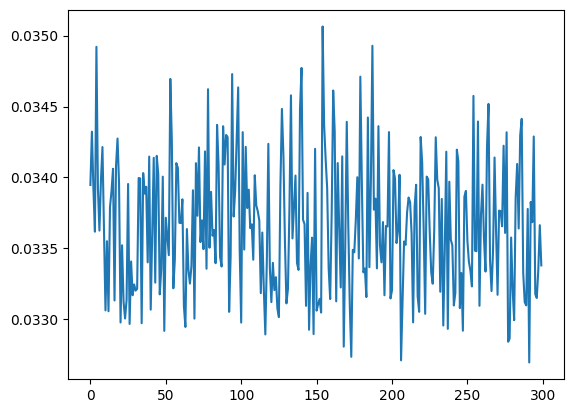

node: right_ankle
Epoch [10], Loss: 0.3076
Epoch [20], Loss: 0.0953
Epoch [30], Loss: 0.0930
Epoch [40], Loss: 0.0907
Epoch [50], Loss: 0.0941
Epoch [60], Loss: 0.0911
Epoch [70], Loss: 0.0931
Epoch [80], Loss: 0.0907
Epoch [90], Loss: 0.0920
Epoch [100], Loss: 0.0908
Epoch [110], Loss: 0.0916
Epoch [120], Loss: 0.0905
Epoch [130], Loss: 0.0918
Epoch [140], Loss: 0.0893
Epoch [150], Loss: 0.0899
Epoch [160], Loss: 0.0904
Epoch [170], Loss: 0.0929
Epoch [180], Loss: 0.0891
Epoch [190], Loss: 0.0903
Epoch [200], Loss: 0.0905
Epoch [210], Loss: 0.0927
Epoch [220], Loss: 0.0903
Epoch [230], Loss: 0.0908
Epoch [240], Loss: 0.0915
Epoch [250], Loss: 0.0912
Epoch [260], Loss: 0.0918
Epoch [270], Loss: 0.0908
Epoch [280], Loss: 0.0931
Epoch [290], Loss: 0.0908
Epoch [300], Loss: 0.0920


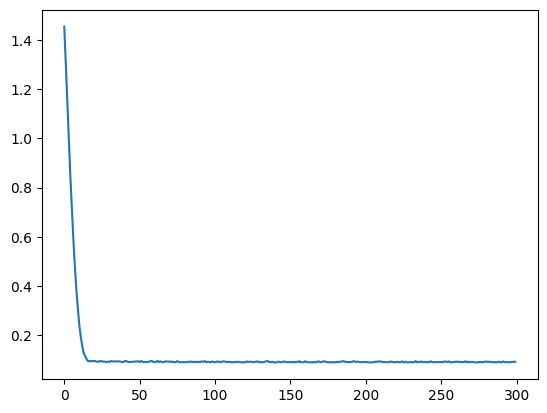

node: left_ankle
Epoch [10], Loss: 0.0936
Epoch [20], Loss: 0.0911
Epoch [30], Loss: 0.0906
Epoch [40], Loss: 0.0834
Epoch [50], Loss: 0.0849
Epoch [60], Loss: 0.0830
Epoch [70], Loss: 0.0776
Epoch [80], Loss: 0.0762
Epoch [90], Loss: 0.0758
Epoch [100], Loss: 0.0750
Epoch [110], Loss: 0.0781
Epoch [120], Loss: 0.0737
Epoch [130], Loss: 0.0749
Epoch [140], Loss: 0.0747
Epoch [150], Loss: 0.0746
Epoch [160], Loss: 0.0735
Epoch [170], Loss: 0.0748
Epoch [180], Loss: 0.0740
Epoch [190], Loss: 0.0730
Epoch [200], Loss: 0.0736
Epoch [210], Loss: 0.0743
Epoch [220], Loss: 0.0733
Epoch [230], Loss: 0.0732
Epoch [240], Loss: 0.0744
Epoch [250], Loss: 0.0738
Epoch [260], Loss: 0.0773
Epoch [270], Loss: 0.0737
Epoch [280], Loss: 0.0769
Epoch [290], Loss: 0.0736
Epoch [300], Loss: 0.0734


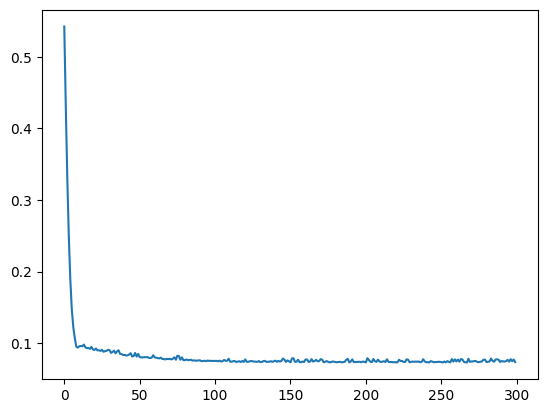

node: right_eye
Epoch [10], Loss: 0.1391
Epoch [20], Loss: 0.1037
Epoch [30], Loss: 0.1052
Epoch [40], Loss: 0.0986
Epoch [50], Loss: 0.0963
Epoch [60], Loss: 0.0935
Epoch [70], Loss: 0.0943
Epoch [80], Loss: 0.0926
Epoch [90], Loss: 0.0863
Epoch [100], Loss: 0.0857
Epoch [110], Loss: 0.0811
Epoch [120], Loss: 0.0776
Epoch [130], Loss: 0.0747
Epoch [140], Loss: 0.0721
Epoch [150], Loss: 0.0695
Epoch [160], Loss: 0.0699
Epoch [170], Loss: 0.0661
Epoch [180], Loss: 0.0660
Epoch [190], Loss: 0.0627
Epoch [200], Loss: 0.0623
Epoch [210], Loss: 0.0618
Epoch [220], Loss: 0.0593
Epoch [230], Loss: 0.0598
Epoch [240], Loss: 0.0581
Epoch [250], Loss: 0.0580
Epoch [260], Loss: 0.0584
Epoch [270], Loss: 0.0577
Epoch [280], Loss: 0.0569
Epoch [290], Loss: 0.0563
Epoch [300], Loss: 0.0561


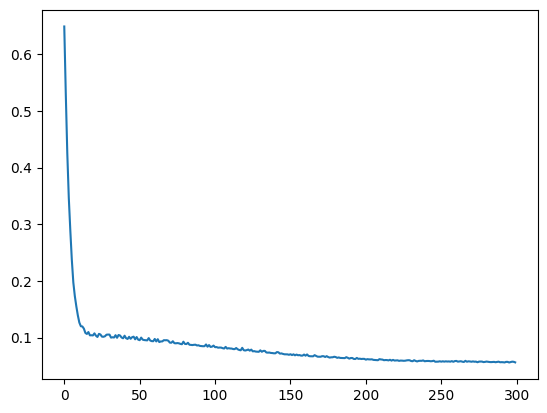

node: left_eye
Epoch [10], Loss: 0.1463
Epoch [20], Loss: 0.0641
Epoch [30], Loss: 0.0627
Epoch [40], Loss: 0.0635
Epoch [50], Loss: 0.0629
Epoch [60], Loss: 0.0629
Epoch [70], Loss: 0.0623
Epoch [80], Loss: 0.0632
Epoch [90], Loss: 0.0614
Epoch [100], Loss: 0.0622
Epoch [110], Loss: 0.0612
Epoch [120], Loss: 0.0608
Epoch [130], Loss: 0.0621
Epoch [140], Loss: 0.0618
Epoch [150], Loss: 0.0635
Epoch [160], Loss: 0.0630
Epoch [170], Loss: 0.0622
Epoch [180], Loss: 0.0618
Epoch [190], Loss: 0.0618
Epoch [200], Loss: 0.0612
Epoch [210], Loss: 0.0628
Epoch [220], Loss: 0.0610
Epoch [230], Loss: 0.0622
Epoch [240], Loss: 0.0625
Epoch [250], Loss: 0.0609
Epoch [260], Loss: 0.0617
Epoch [270], Loss: 0.0627
Epoch [280], Loss: 0.0615
Epoch [290], Loss: 0.0618
Epoch [300], Loss: 0.0628


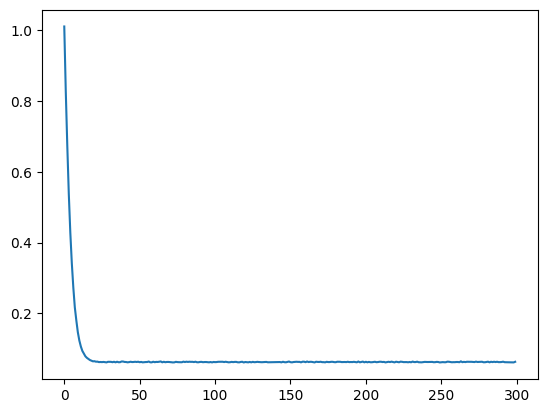

node: right_ear
Epoch [10], Loss: 3.2661
Epoch [20], Loss: 1.5782
Epoch [30], Loss: 1.2200
Epoch [40], Loss: 1.1532
Epoch [50], Loss: 1.1069
Epoch [60], Loss: 1.0833
Epoch [70], Loss: 1.0800
Epoch [80], Loss: 1.0789
Epoch [90], Loss: 1.1105
Epoch [100], Loss: 1.0864
Epoch [110], Loss: 1.0992
Epoch [120], Loss: 1.0740
Epoch [130], Loss: 1.0938
Epoch [140], Loss: 1.0707
Epoch [150], Loss: 1.0709
Epoch [160], Loss: 1.0678
Epoch [170], Loss: 1.0864
Epoch [180], Loss: 1.0663
Epoch [190], Loss: 1.0680
Epoch [200], Loss: 1.0805
Epoch [210], Loss: 1.0636
Epoch [220], Loss: 1.0687
Epoch [230], Loss: 1.0616
Epoch [240], Loss: 1.1057
Epoch [250], Loss: 1.0915
Epoch [260], Loss: 1.0761
Epoch [270], Loss: 1.1022
Epoch [280], Loss: 1.0928
Epoch [290], Loss: 1.0936
Epoch [300], Loss: 1.0774


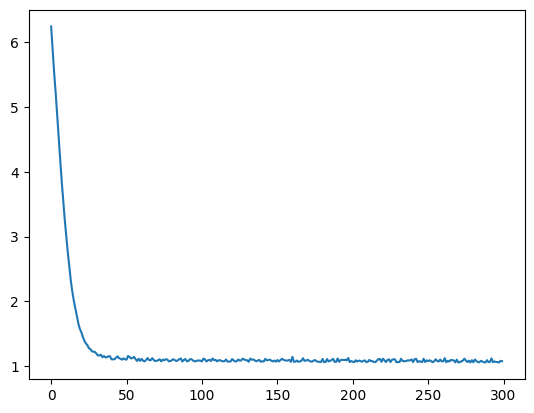

node: left_ear
Epoch [10], Loss: 1.4894
Epoch [20], Loss: 0.9028
Epoch [30], Loss: 0.7699
Epoch [40], Loss: 0.7560
Epoch [50], Loss: 0.7455
Epoch [60], Loss: 0.7051
Epoch [70], Loss: 0.7651
Epoch [80], Loss: 0.7003
Epoch [90], Loss: 0.7000
Epoch [100], Loss: 0.6994
Epoch [110], Loss: 0.6993
Epoch [120], Loss: 0.7279
Epoch [130], Loss: 0.7343
Epoch [140], Loss: 0.7353
Epoch [150], Loss: 0.7634
Epoch [160], Loss: 0.6988
Epoch [170], Loss: 0.6987
Epoch [180], Loss: 0.7355
Epoch [190], Loss: 0.6996
Epoch [200], Loss: 0.6998
Epoch [210], Loss: 0.6999
Epoch [220], Loss: 0.6998
Epoch [230], Loss: 0.6994
Epoch [240], Loss: 0.7019
Epoch [250], Loss: 0.7004
Epoch [260], Loss: 0.6994
Epoch [270], Loss: 0.7004
Epoch [280], Loss: 0.7022
Epoch [290], Loss: 0.7011
Epoch [300], Loss: 0.7280


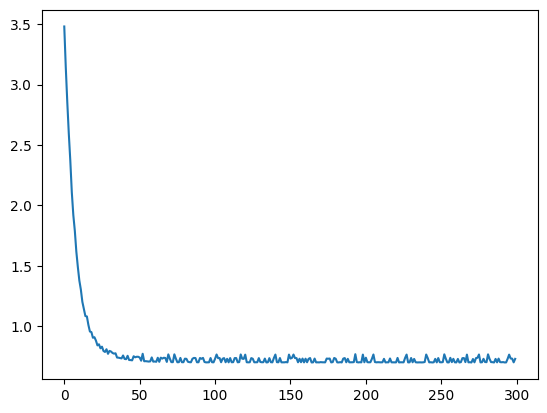

=== anger ===
node: nose
Epoch [10], Loss: 0.3408
Epoch [20], Loss: 0.2454
Epoch [30], Loss: 0.2474
Epoch [40], Loss: 0.2416
Epoch [50], Loss: 0.2391
Epoch [60], Loss: 0.2455
Epoch [70], Loss: 0.2379
Epoch [80], Loss: 0.2354
Epoch [90], Loss: 0.2375
Epoch [100], Loss: 0.2386
Epoch [110], Loss: 0.2320
Epoch [120], Loss: 0.2301
Epoch [130], Loss: 0.2316
Epoch [140], Loss: 0.2304
Epoch [150], Loss: 0.2395
Epoch [160], Loss: 0.2290
Epoch [170], Loss: 0.2281
Epoch [180], Loss: 0.2339
Epoch [190], Loss: 0.2319
Epoch [200], Loss: 0.2298
Epoch [210], Loss: 0.2316
Epoch [220], Loss: 0.2271
Epoch [230], Loss: 0.2281
Epoch [240], Loss: 0.2286
Epoch [250], Loss: 0.2257
Epoch [260], Loss: 0.2274
Epoch [270], Loss: 0.2274
Epoch [280], Loss: 0.2250
Epoch [290], Loss: 0.2300
Epoch [300], Loss: 0.2253


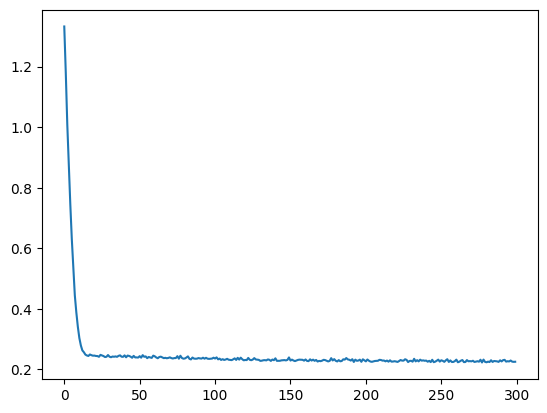

node: right_shoulder
Epoch [10], Loss: 1.5893
Epoch [20], Loss: 0.6215
Epoch [30], Loss: 0.3296
Epoch [40], Loss: 0.2085
Epoch [50], Loss: 0.1453
Epoch [60], Loss: 0.1082
Epoch [70], Loss: 0.0846
Epoch [80], Loss: 0.0680
Epoch [90], Loss: 0.0563
Epoch [100], Loss: 0.0475
Epoch [110], Loss: 0.0408
Epoch [120], Loss: 0.0353
Epoch [130], Loss: 0.0311
Epoch [140], Loss: 0.0274
Epoch [150], Loss: 0.0247
Epoch [160], Loss: 0.0221
Epoch [170], Loss: 0.0201
Epoch [180], Loss: 0.0183
Epoch [190], Loss: 0.0168
Epoch [200], Loss: 0.0154
Epoch [210], Loss: 0.0143
Epoch [220], Loss: 0.0132
Epoch [230], Loss: 0.0124
Epoch [240], Loss: 0.0115
Epoch [250], Loss: 0.0108
Epoch [260], Loss: 0.0101
Epoch [270], Loss: 0.0095
Epoch [280], Loss: 0.0090
Epoch [290], Loss: 0.0085
Epoch [300], Loss: 0.0081


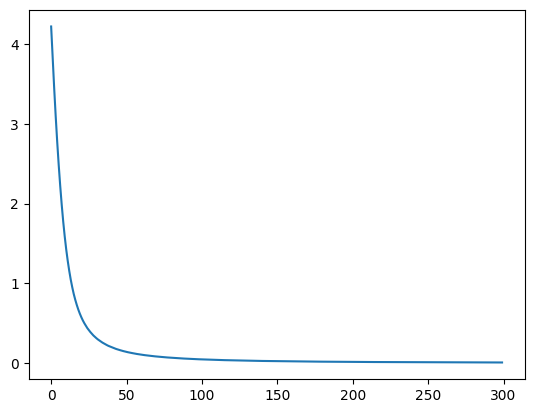

node: left_shoulder
Epoch [10], Loss: 3.0924
Epoch [20], Loss: 1.1727
Epoch [30], Loss: 0.5698
Epoch [40], Loss: 0.3407
Epoch [50], Loss: 0.2301
Epoch [60], Loss: 0.1676
Epoch [70], Loss: 0.1286
Epoch [80], Loss: 0.1024
Epoch [90], Loss: 0.0837
Epoch [100], Loss: 0.0702
Epoch [110], Loss: 0.0597
Epoch [120], Loss: 0.0513
Epoch [130], Loss: 0.0449
Epoch [140], Loss: 0.0398
Epoch [150], Loss: 0.0355
Epoch [160], Loss: 0.0318
Epoch [170], Loss: 0.0288
Epoch [180], Loss: 0.0261
Epoch [190], Loss: 0.0239
Epoch [200], Loss: 0.0219
Epoch [210], Loss: 0.0202
Epoch [220], Loss: 0.0187
Epoch [230], Loss: 0.0174
Epoch [240], Loss: 0.0162
Epoch [250], Loss: 0.0151
Epoch [260], Loss: 0.0142
Epoch [270], Loss: 0.0134
Epoch [280], Loss: 0.0126
Epoch [290], Loss: 0.0119
Epoch [300], Loss: 0.0112


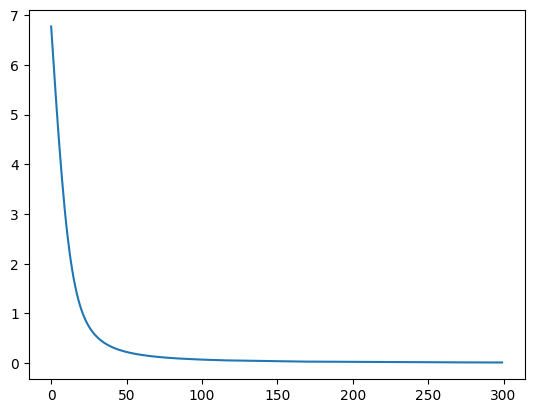

node: right_thigh
Epoch [10], Loss: 1.1043
Epoch [20], Loss: 0.1471
Epoch [30], Loss: 0.0596
Epoch [40], Loss: 0.0573
Epoch [50], Loss: 0.0554
Epoch [60], Loss: 0.0543
Epoch [70], Loss: 0.0533
Epoch [80], Loss: 0.0514
Epoch [90], Loss: 0.0508
Epoch [100], Loss: 0.0492
Epoch [110], Loss: 0.0475
Epoch [120], Loss: 0.0469
Epoch [130], Loss: 0.0450
Epoch [140], Loss: 0.0438
Epoch [150], Loss: 0.0449
Epoch [160], Loss: 0.0412
Epoch [170], Loss: 0.0401
Epoch [180], Loss: 0.0391
Epoch [190], Loss: 0.0383
Epoch [200], Loss: 0.0395
Epoch [210], Loss: 0.0362
Epoch [220], Loss: 0.0355
Epoch [230], Loss: 0.0344
Epoch [240], Loss: 0.0340
Epoch [250], Loss: 0.0335
Epoch [260], Loss: 0.0328
Epoch [270], Loss: 0.0322
Epoch [280], Loss: 0.0321
Epoch [290], Loss: 0.0313
Epoch [300], Loss: 0.0312


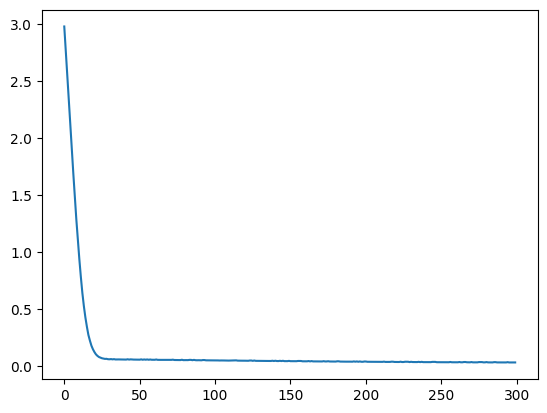

node: left_thigh
Epoch [10], Loss: 0.0404
Epoch [20], Loss: 0.0382
Epoch [30], Loss: 0.0367
Epoch [40], Loss: 0.0352
Epoch [50], Loss: 0.0341
Epoch [60], Loss: 0.0331
Epoch [70], Loss: 0.0325
Epoch [80], Loss: 0.0348
Epoch [90], Loss: 0.0320
Epoch [100], Loss: 0.0317
Epoch [110], Loss: 0.0316
Epoch [120], Loss: 0.0317
Epoch [130], Loss: 0.0321
Epoch [140], Loss: 0.0316
Epoch [150], Loss: 0.0316
Epoch [160], Loss: 0.0342
Epoch [170], Loss: 0.0317
Epoch [180], Loss: 0.0316
Epoch [190], Loss: 0.0314
Epoch [200], Loss: 0.0317
Epoch [210], Loss: 0.0316
Epoch [220], Loss: 0.0314
Epoch [230], Loss: 0.0318
Epoch [240], Loss: 0.0315
Epoch [250], Loss: 0.0315
Epoch [260], Loss: 0.0313
Epoch [270], Loss: 0.0344
Epoch [280], Loss: 0.0314
Epoch [290], Loss: 0.0342
Epoch [300], Loss: 0.0315


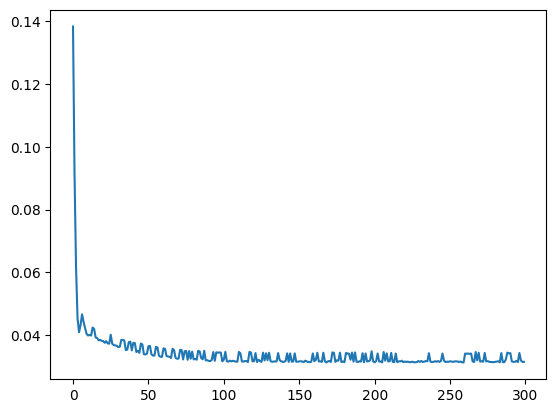

node: right_elbow
Epoch [10], Loss: 0.3415
Epoch [20], Loss: 0.1968
Epoch [30], Loss: 0.2002
Epoch [40], Loss: 0.2005
Epoch [50], Loss: 0.1928
Epoch [60], Loss: 0.1945
Epoch [70], Loss: 0.1955
Epoch [80], Loss: 0.1952
Epoch [90], Loss: 0.1927
Epoch [100], Loss: 0.1935
Epoch [110], Loss: 0.1927
Epoch [120], Loss: 0.1945
Epoch [130], Loss: 0.1887
Epoch [140], Loss: 0.1929
Epoch [150], Loss: 0.1864
Epoch [160], Loss: 0.1940
Epoch [170], Loss: 0.1860
Epoch [180], Loss: 0.1889
Epoch [190], Loss: 0.1890
Epoch [200], Loss: 0.1870
Epoch [210], Loss: 0.1840
Epoch [220], Loss: 0.1852
Epoch [230], Loss: 0.1866
Epoch [240], Loss: 0.1824
Epoch [250], Loss: 0.1872
Epoch [260], Loss: 0.1902
Epoch [270], Loss: 0.1857
Epoch [280], Loss: 0.1855
Epoch [290], Loss: 0.1901
Epoch [300], Loss: 0.1818


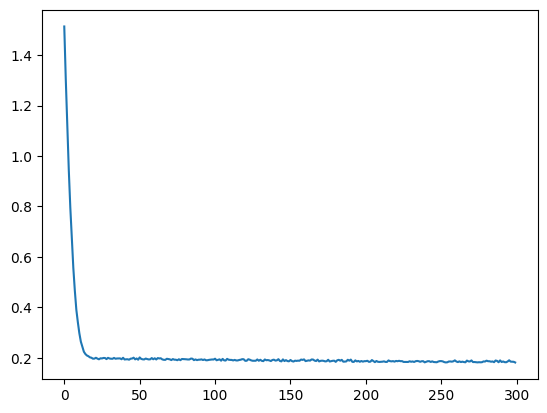

node: left_elbow
Epoch [10], Loss: 1.3502
Epoch [20], Loss: 0.3217
Epoch [30], Loss: 0.1866
Epoch [40], Loss: 0.1792
Epoch [50], Loss: 0.1709
Epoch [60], Loss: 0.1704
Epoch [70], Loss: 0.1687
Epoch [80], Loss: 0.1690
Epoch [90], Loss: 0.1720
Epoch [100], Loss: 0.1708
Epoch [110], Loss: 0.1681
Epoch [120], Loss: 0.1598
Epoch [130], Loss: 0.1611
Epoch [140], Loss: 0.1596
Epoch [150], Loss: 0.1585
Epoch [160], Loss: 0.1561
Epoch [170], Loss: 0.1549
Epoch [180], Loss: 0.1512
Epoch [190], Loss: 0.1521
Epoch [200], Loss: 0.1507
Epoch [210], Loss: 0.1471
Epoch [220], Loss: 0.1474
Epoch [230], Loss: 0.1491
Epoch [240], Loss: 0.1425
Epoch [250], Loss: 0.1404
Epoch [260], Loss: 0.1433
Epoch [270], Loss: 0.1387
Epoch [280], Loss: 0.1383
Epoch [290], Loss: 0.1404
Epoch [300], Loss: 0.1401


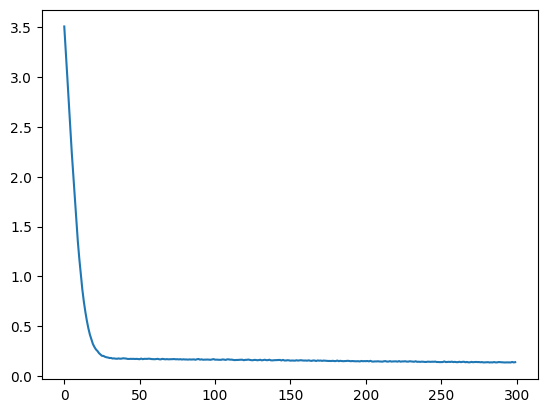

node: right_hand
Epoch [10], Loss: 0.8540
Epoch [20], Loss: 0.6742
Epoch [30], Loss: 0.6626
Epoch [40], Loss: 0.6811
Epoch [50], Loss: 0.6842
Epoch [60], Loss: 0.6731
Epoch [70], Loss: 0.6716
Epoch [80], Loss: 0.6781
Epoch [90], Loss: 0.6713
Epoch [100], Loss: 0.6720
Epoch [110], Loss: 0.6593
Epoch [120], Loss: 0.6718
Epoch [130], Loss: 0.6829
Epoch [140], Loss: 0.6706
Epoch [150], Loss: 0.6719
Epoch [160], Loss: 0.6778
Epoch [170], Loss: 0.6737
Epoch [180], Loss: 0.6777
Epoch [190], Loss: 0.6822
Epoch [200], Loss: 0.6597
Epoch [210], Loss: 0.6715
Epoch [220], Loss: 0.6624
Epoch [230], Loss: 0.6721
Epoch [240], Loss: 0.6695
Epoch [250], Loss: 0.6800
Epoch [260], Loss: 0.6695
Epoch [270], Loss: 0.6615
Epoch [280], Loss: 0.6755
Epoch [290], Loss: 0.6890
Epoch [300], Loss: 0.6622


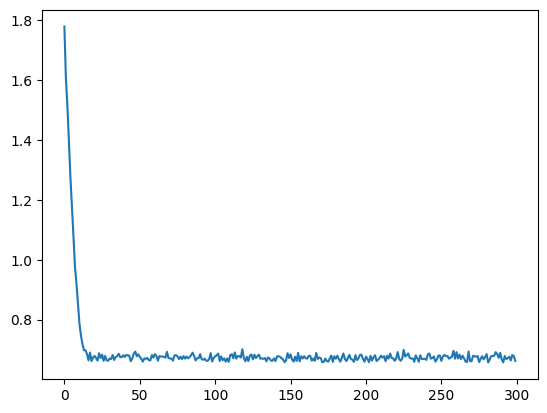

node: left_hand
Epoch [10], Loss: 0.9655
Epoch [20], Loss: 0.9816
Epoch [30], Loss: 0.9709
Epoch [40], Loss: 0.9679
Epoch [50], Loss: 0.9740
Epoch [60], Loss: 0.9638
Epoch [70], Loss: 0.9737
Epoch [80], Loss: 0.9566
Epoch [90], Loss: 0.9586
Epoch [100], Loss: 0.9665
Epoch [110], Loss: 0.9897
Epoch [120], Loss: 0.9799
Epoch [130], Loss: 0.9816
Epoch [140], Loss: 0.9762
Epoch [150], Loss: 0.9804
Epoch [160], Loss: 0.9583
Epoch [170], Loss: 0.9615
Epoch [180], Loss: 0.9600
Epoch [190], Loss: 0.9662
Epoch [200], Loss: 0.9695
Epoch [210], Loss: 0.9728
Epoch [220], Loss: 0.9740
Epoch [230], Loss: 0.9688
Epoch [240], Loss: 0.9693
Epoch [250], Loss: 0.9674
Epoch [260], Loss: 0.9618
Epoch [270], Loss: 0.9717
Epoch [280], Loss: 0.9680
Epoch [290], Loss: 0.9730
Epoch [300], Loss: 0.9699


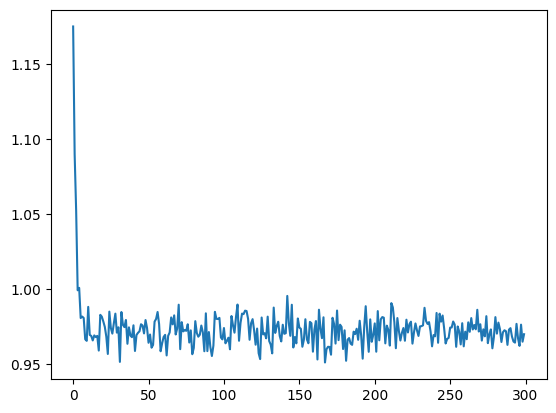

node: right_knee
Epoch [10], Loss: 0.7986
Epoch [20], Loss: 0.0927
Epoch [30], Loss: 0.0694
Epoch [40], Loss: 0.0689
Epoch [50], Loss: 0.0676
Epoch [60], Loss: 0.0657
Epoch [70], Loss: 0.0653
Epoch [80], Loss: 0.0654
Epoch [90], Loss: 0.0619
Epoch [100], Loss: 0.0626
Epoch [110], Loss: 0.0600
Epoch [120], Loss: 0.0605
Epoch [130], Loss: 0.0591
Epoch [140], Loss: 0.0556
Epoch [150], Loss: 0.0579
Epoch [160], Loss: 0.0545
Epoch [170], Loss: 0.0543
Epoch [180], Loss: 0.0559
Epoch [190], Loss: 0.0523
Epoch [200], Loss: 0.0520
Epoch [210], Loss: 0.0544
Epoch [220], Loss: 0.0515
Epoch [230], Loss: 0.0541
Epoch [240], Loss: 0.0510
Epoch [250], Loss: 0.0509
Epoch [260], Loss: 0.0532
Epoch [270], Loss: 0.0507
Epoch [280], Loss: 0.0508
Epoch [290], Loss: 0.0529
Epoch [300], Loss: 0.0501


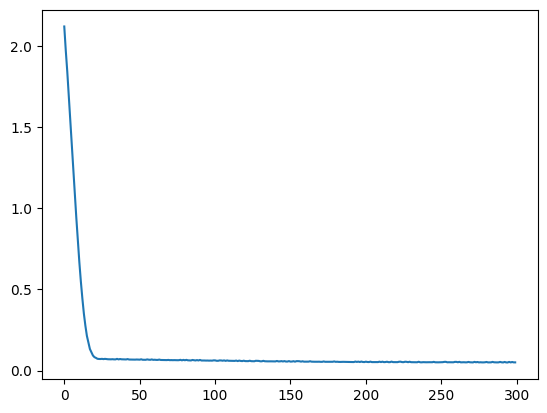

node: left_knee
Epoch [10], Loss: 0.8096
Epoch [20], Loss: 0.0624
Epoch [30], Loss: 0.0356
Epoch [40], Loss: 0.0356
Epoch [50], Loss: 0.0363
Epoch [60], Loss: 0.0348
Epoch [70], Loss: 0.0353
Epoch [80], Loss: 0.0350
Epoch [90], Loss: 0.0352
Epoch [100], Loss: 0.0350
Epoch [110], Loss: 0.0347
Epoch [120], Loss: 0.0350
Epoch [130], Loss: 0.0343
Epoch [140], Loss: 0.0343
Epoch [150], Loss: 0.0347
Epoch [160], Loss: 0.0343
Epoch [170], Loss: 0.0347
Epoch [180], Loss: 0.0336
Epoch [190], Loss: 0.0344
Epoch [200], Loss: 0.0339
Epoch [210], Loss: 0.0344
Epoch [220], Loss: 0.0340
Epoch [230], Loss: 0.0346
Epoch [240], Loss: 0.0339
Epoch [250], Loss: 0.0341
Epoch [260], Loss: 0.0341
Epoch [270], Loss: 0.0335
Epoch [280], Loss: 0.0341
Epoch [290], Loss: 0.0339
Epoch [300], Loss: 0.0341


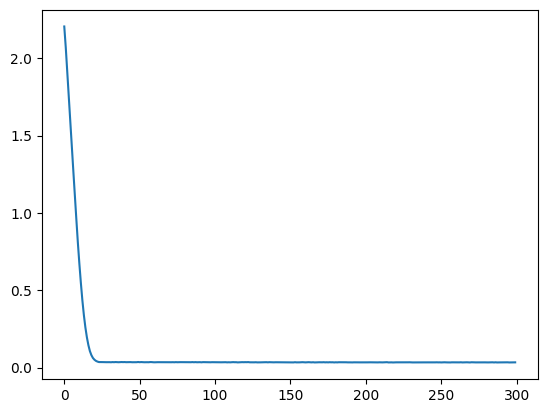

node: right_ankle
Epoch [10], Loss: 0.3398
Epoch [20], Loss: 0.1415
Epoch [30], Loss: 0.1376
Epoch [40], Loss: 0.1409
Epoch [50], Loss: 0.1462
Epoch [60], Loss: 0.1369
Epoch [70], Loss: 0.1365
Epoch [80], Loss: 0.1363
Epoch [90], Loss: 0.1358
Epoch [100], Loss: 0.1363
Epoch [110], Loss: 0.1357
Epoch [120], Loss: 0.1345
Epoch [130], Loss: 0.1395
Epoch [140], Loss: 0.1394
Epoch [150], Loss: 0.1432
Epoch [160], Loss: 0.1374
Epoch [170], Loss: 0.1386
Epoch [180], Loss: 0.1370
Epoch [190], Loss: 0.1333
Epoch [200], Loss: 0.1331
Epoch [210], Loss: 0.1365
Epoch [220], Loss: 0.1363
Epoch [230], Loss: 0.1422
Epoch [240], Loss: 0.1345
Epoch [250], Loss: 0.1364
Epoch [260], Loss: 0.1338
Epoch [270], Loss: 0.1341
Epoch [280], Loss: 0.1389
Epoch [290], Loss: 0.1376
Epoch [300], Loss: 0.1341


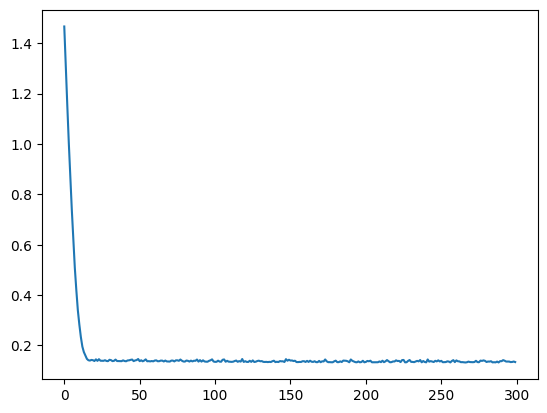

node: left_ankle
Epoch [10], Loss: 0.1140
Epoch [20], Loss: 0.1102
Epoch [30], Loss: 0.1094
Epoch [40], Loss: 0.1045
Epoch [50], Loss: 0.1012
Epoch [60], Loss: 0.1021
Epoch [70], Loss: 0.1010
Epoch [80], Loss: 0.1038
Epoch [90], Loss: 0.1002
Epoch [100], Loss: 0.0983
Epoch [110], Loss: 0.0961
Epoch [120], Loss: 0.0957
Epoch [130], Loss: 0.0955
Epoch [140], Loss: 0.0975
Epoch [150], Loss: 0.0942
Epoch [160], Loss: 0.0944
Epoch [170], Loss: 0.0959
Epoch [180], Loss: 0.0954
Epoch [190], Loss: 0.0952
Epoch [200], Loss: 0.0977
Epoch [210], Loss: 0.0983
Epoch [220], Loss: 0.0949
Epoch [230], Loss: 0.0983
Epoch [240], Loss: 0.0943
Epoch [250], Loss: 0.0945
Epoch [260], Loss: 0.0952
Epoch [270], Loss: 0.0970
Epoch [280], Loss: 0.0988
Epoch [290], Loss: 0.0946
Epoch [300], Loss: 0.0944


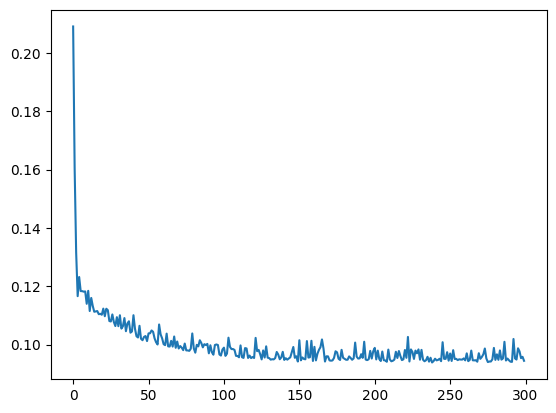

node: right_eye
Epoch [10], Loss: 0.0863
Epoch [20], Loss: 0.0840
Epoch [30], Loss: 0.0858
Epoch [40], Loss: 0.0825
Epoch [50], Loss: 0.0810
Epoch [60], Loss: 0.0783
Epoch [70], Loss: 0.0776
Epoch [80], Loss: 0.0760
Epoch [90], Loss: 0.0744
Epoch [100], Loss: 0.0744
Epoch [110], Loss: 0.0729
Epoch [120], Loss: 0.0730
Epoch [130], Loss: 0.0748
Epoch [140], Loss: 0.0705
Epoch [150], Loss: 0.0712
Epoch [160], Loss: 0.0706
Epoch [170], Loss: 0.0729
Epoch [180], Loss: 0.0689
Epoch [190], Loss: 0.0703
Epoch [200], Loss: 0.0689
Epoch [210], Loss: 0.0696
Epoch [220], Loss: 0.0686
Epoch [230], Loss: 0.0682
Epoch [240], Loss: 0.0682
Epoch [250], Loss: 0.0707
Epoch [260], Loss: 0.0687
Epoch [270], Loss: 0.0680
Epoch [280], Loss: 0.0708
Epoch [290], Loss: 0.0707
Epoch [300], Loss: 0.0678


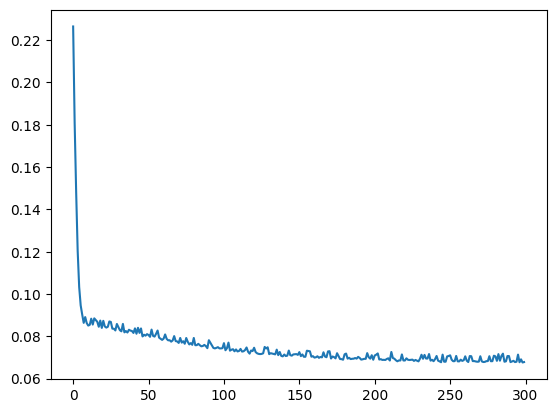

node: left_eye
Epoch [10], Loss: 0.2226
Epoch [20], Loss: 0.0851
Epoch [30], Loss: 0.0749
Epoch [40], Loss: 0.0751
Epoch [50], Loss: 0.0762
Epoch [60], Loss: 0.0758
Epoch [70], Loss: 0.0757
Epoch [80], Loss: 0.0762
Epoch [90], Loss: 0.0752
Epoch [100], Loss: 0.0739
Epoch [110], Loss: 0.0746
Epoch [120], Loss: 0.0738
Epoch [130], Loss: 0.0751
Epoch [140], Loss: 0.0744
Epoch [150], Loss: 0.0750
Epoch [160], Loss: 0.0734
Epoch [170], Loss: 0.0746
Epoch [180], Loss: 0.0721
Epoch [190], Loss: 0.0733
Epoch [200], Loss: 0.0725
Epoch [210], Loss: 0.0729
Epoch [220], Loss: 0.0736
Epoch [230], Loss: 0.0715
Epoch [240], Loss: 0.0719
Epoch [250], Loss: 0.0712
Epoch [260], Loss: 0.0719
Epoch [270], Loss: 0.0718
Epoch [280], Loss: 0.0713
Epoch [290], Loss: 0.0711
Epoch [300], Loss: 0.0720


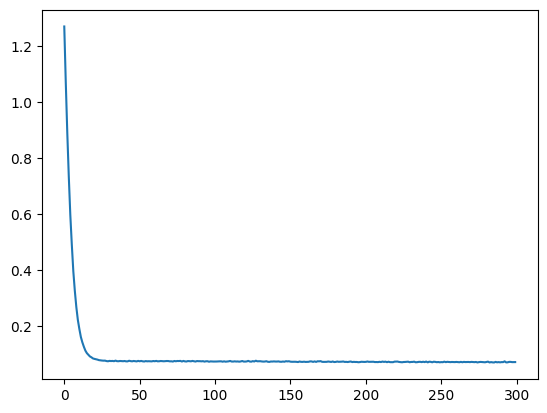

node: right_ear
Epoch [10], Loss: 1.6698
Epoch [20], Loss: 1.1871
Epoch [30], Loss: 1.1182
Epoch [40], Loss: 1.0851
Epoch [50], Loss: 1.1429
Epoch [60], Loss: 1.0785
Epoch [70], Loss: 1.0794
Epoch [80], Loss: 1.1424
Epoch [90], Loss: 1.0803
Epoch [100], Loss: 1.0861
Epoch [110], Loss: 1.0827
Epoch [120], Loss: 1.1099
Epoch [130], Loss: 1.1205
Epoch [140], Loss: 1.0796
Epoch [150], Loss: 1.0770
Epoch [160], Loss: 1.0780
Epoch [170], Loss: 1.0970
Epoch [180], Loss: 1.1131
Epoch [190], Loss: 1.0790
Epoch [200], Loss: 1.0887
Epoch [210], Loss: 1.0730
Epoch [220], Loss: 1.0960
Epoch [230], Loss: 1.1058
Epoch [240], Loss: 1.1007
Epoch [250], Loss: 1.0922
Epoch [260], Loss: 1.1041
Epoch [270], Loss: 1.0991
Epoch [280], Loss: 1.0696
Epoch [290], Loss: 1.0792
Epoch [300], Loss: 1.1137


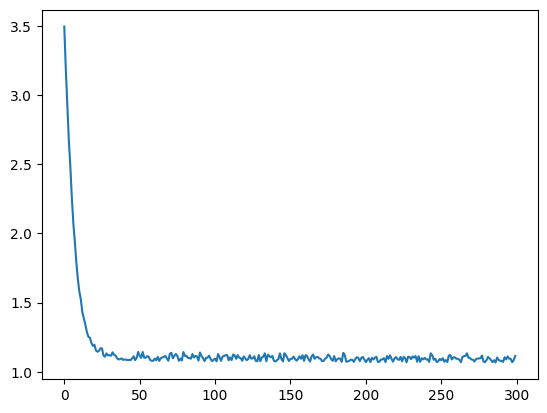

node: left_ear
Epoch [10], Loss: 1.4563
Epoch [20], Loss: 0.9138
Epoch [30], Loss: 0.7622
Epoch [40], Loss: 0.7258
Epoch [50], Loss: 0.7436
Epoch [60], Loss: 0.7694
Epoch [70], Loss: 0.7365
Epoch [80], Loss: 0.7354
Epoch [90], Loss: 0.7321
Epoch [100], Loss: 0.6998
Epoch [110], Loss: 0.7347
Epoch [120], Loss: 0.6989
Epoch [130], Loss: 0.6977
Epoch [140], Loss: 0.6996
Epoch [150], Loss: 0.6992
Epoch [160], Loss: 0.7336
Epoch [170], Loss: 0.6989
Epoch [180], Loss: 0.6990
Epoch [190], Loss: 0.7643
Epoch [200], Loss: 0.6980
Epoch [210], Loss: 0.6978
Epoch [220], Loss: 0.6975
Epoch [230], Loss: 0.7644
Epoch [240], Loss: 0.6980
Epoch [250], Loss: 0.7314
Epoch [260], Loss: 0.7281
Epoch [270], Loss: 0.6965
Epoch [280], Loss: 0.6967
Epoch [290], Loss: 0.7322
Epoch [300], Loss: 0.6967


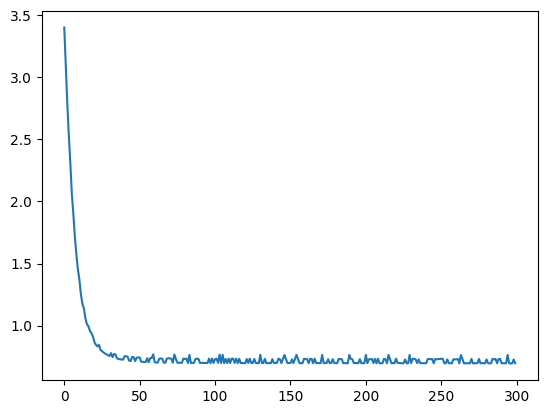

=== fear ===
node: nose
Epoch [10], Loss: 0.2299
Epoch [20], Loss: 0.2342
Epoch [30], Loss: 0.2338
Epoch [40], Loss: 0.2281
Epoch [50], Loss: 0.2340
Epoch [60], Loss: 0.2290
Epoch [70], Loss: 0.2364
Epoch [80], Loss: 0.2305
Epoch [90], Loss: 0.2306
Epoch [100], Loss: 0.2300
Epoch [110], Loss: 0.2295
Epoch [120], Loss: 0.2305
Epoch [130], Loss: 0.2335
Epoch [140], Loss: 0.2365
Epoch [150], Loss: 0.2315
Epoch [160], Loss: 0.2360
Epoch [170], Loss: 0.2337
Epoch [180], Loss: 0.2274
Epoch [190], Loss: 0.2317
Epoch [200], Loss: 0.2324
Epoch [210], Loss: 0.2302
Epoch [220], Loss: 0.2285
Epoch [230], Loss: 0.2286
Epoch [240], Loss: 0.2287
Epoch [250], Loss: 0.2289
Epoch [260], Loss: 0.2276
Epoch [270], Loss: 0.2322
Epoch [280], Loss: 0.2331
Epoch [290], Loss: 0.2327
Epoch [300], Loss: 0.2309


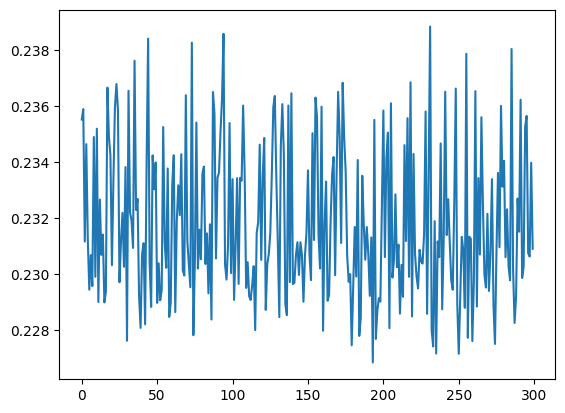

node: right_shoulder
Epoch [10], Loss: 0.8681
Epoch [20], Loss: 0.3465
Epoch [30], Loss: 0.1916
Epoch [40], Loss: 0.1251
Epoch [50], Loss: 0.0894
Epoch [60], Loss: 0.0677
Epoch [70], Loss: 0.0533
Epoch [80], Loss: 0.0436
Epoch [90], Loss: 0.0361
Epoch [100], Loss: 0.0309
Epoch [110], Loss: 0.0268
Epoch [120], Loss: 0.0233
Epoch [130], Loss: 0.0205
Epoch [140], Loss: 0.0184
Epoch [150], Loss: 0.0165
Epoch [160], Loss: 0.0149
Epoch [170], Loss: 0.0137
Epoch [180], Loss: 0.0125
Epoch [190], Loss: 0.0116
Epoch [200], Loss: 0.0107
Epoch [210], Loss: 0.0099
Epoch [220], Loss: 0.0092
Epoch [230], Loss: 0.0086
Epoch [240], Loss: 0.0082
Epoch [250], Loss: 0.0077
Epoch [260], Loss: 0.0073
Epoch [270], Loss: 0.0068
Epoch [280], Loss: 0.0065
Epoch [290], Loss: 0.0062
Epoch [300], Loss: 0.0059


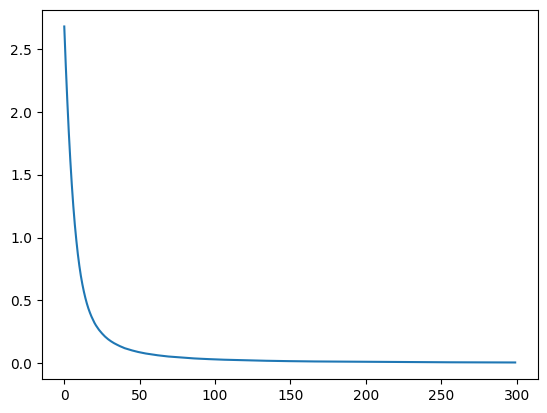

node: left_shoulder
Epoch [10], Loss: 4.8796
Epoch [20], Loss: 1.8303
Epoch [30], Loss: 0.8144
Epoch [40], Loss: 0.4635
Epoch [50], Loss: 0.3042
Epoch [60], Loss: 0.2179
Epoch [70], Loss: 0.1651
Epoch [80], Loss: 0.1305
Epoch [90], Loss: 0.1065
Epoch [100], Loss: 0.0887
Epoch [110], Loss: 0.0754
Epoch [120], Loss: 0.0646
Epoch [130], Loss: 0.0566
Epoch [140], Loss: 0.0495
Epoch [150], Loss: 0.0443
Epoch [160], Loss: 0.0399
Epoch [170], Loss: 0.0359
Epoch [180], Loss: 0.0327
Epoch [190], Loss: 0.0298
Epoch [200], Loss: 0.0277
Epoch [210], Loss: 0.0252
Epoch [220], Loss: 0.0233
Epoch [230], Loss: 0.0217
Epoch [240], Loss: 0.0203
Epoch [250], Loss: 0.0189
Epoch [260], Loss: 0.0178
Epoch [270], Loss: 0.0167
Epoch [280], Loss: 0.0158
Epoch [290], Loss: 0.0148
Epoch [300], Loss: 0.0141


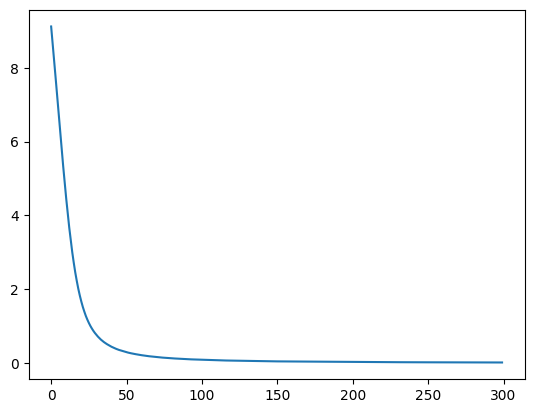

node: right_thigh
Epoch [10], Loss: 0.0281
Epoch [20], Loss: 0.0289
Epoch [30], Loss: 0.0271
Epoch [40], Loss: 0.0265
Epoch [50], Loss: 0.0263
Epoch [60], Loss: 0.0260
Epoch [70], Loss: 0.0257
Epoch [80], Loss: 0.0259
Epoch [90], Loss: 0.0255
Epoch [100], Loss: 0.0272
Epoch [110], Loss: 0.0253
Epoch [120], Loss: 0.0256
Epoch [130], Loss: 0.0272
Epoch [140], Loss: 0.0252
Epoch [150], Loss: 0.0252
Epoch [160], Loss: 0.0252
Epoch [170], Loss: 0.0273
Epoch [180], Loss: 0.0253
Epoch [190], Loss: 0.0252
Epoch [200], Loss: 0.0252
Epoch [210], Loss: 0.0274
Epoch [220], Loss: 0.0256
Epoch [230], Loss: 0.0252
Epoch [240], Loss: 0.0255
Epoch [250], Loss: 0.0253
Epoch [260], Loss: 0.0254
Epoch [270], Loss: 0.0252
Epoch [280], Loss: 0.0252
Epoch [290], Loss: 0.0253
Epoch [300], Loss: 0.0250


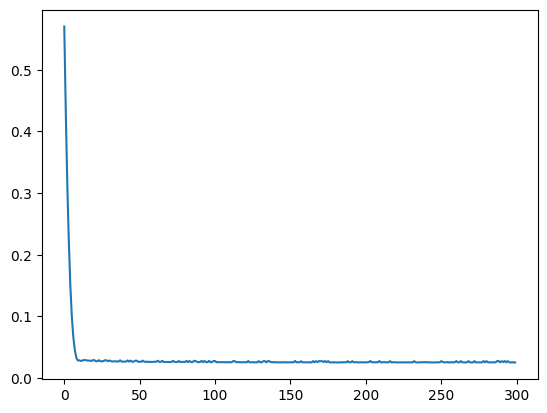

node: left_thigh
Epoch [10], Loss: 0.3451
Epoch [20], Loss: 0.0352
Epoch [30], Loss: 0.0334
Epoch [40], Loss: 0.0358
Epoch [50], Loss: 0.0330
Epoch [60], Loss: 0.0328
Epoch [70], Loss: 0.0327
Epoch [80], Loss: 0.0322
Epoch [90], Loss: 0.0322
Epoch [100], Loss: 0.0319
Epoch [110], Loss: 0.0320
Epoch [120], Loss: 0.0346
Epoch [130], Loss: 0.0341
Epoch [140], Loss: 0.0315
Epoch [150], Loss: 0.0315
Epoch [160], Loss: 0.0314
Epoch [170], Loss: 0.0339
Epoch [180], Loss: 0.0312
Epoch [190], Loss: 0.0313
Epoch [200], Loss: 0.0314
Epoch [210], Loss: 0.0310
Epoch [220], Loss: 0.0313
Epoch [230], Loss: 0.0313
Epoch [240], Loss: 0.0310
Epoch [250], Loss: 0.0312
Epoch [260], Loss: 0.0314
Epoch [270], Loss: 0.0335
Epoch [280], Loss: 0.0336
Epoch [290], Loss: 0.0313
Epoch [300], Loss: 0.0311


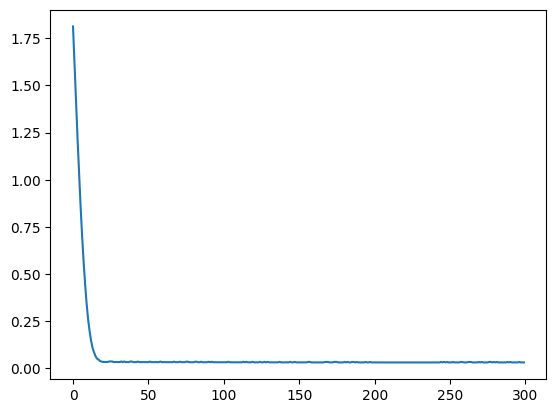

node: right_elbow
Epoch [10], Loss: 0.2298
Epoch [20], Loss: 0.1829
Epoch [30], Loss: 0.1843
Epoch [40], Loss: 0.1842
Epoch [50], Loss: 0.1891
Epoch [60], Loss: 0.1843
Epoch [70], Loss: 0.1846
Epoch [80], Loss: 0.1847
Epoch [90], Loss: 0.1821
Epoch [100], Loss: 0.1884
Epoch [110], Loss: 0.1844
Epoch [120], Loss: 0.1808
Epoch [130], Loss: 0.1848
Epoch [140], Loss: 0.1814
Epoch [150], Loss: 0.1818
Epoch [160], Loss: 0.1841
Epoch [170], Loss: 0.1836
Epoch [180], Loss: 0.1842
Epoch [190], Loss: 0.1851
Epoch [200], Loss: 0.1870
Epoch [210], Loss: 0.1904
Epoch [220], Loss: 0.1843
Epoch [230], Loss: 0.1910
Epoch [240], Loss: 0.1821
Epoch [250], Loss: 0.1897
Epoch [260], Loss: 0.1915
Epoch [270], Loss: 0.1817
Epoch [280], Loss: 0.1813
Epoch [290], Loss: 0.1840
Epoch [300], Loss: 0.1881


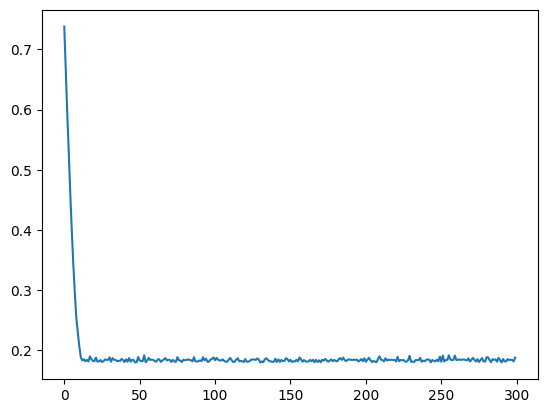

node: left_elbow
Epoch [10], Loss: 0.1337
Epoch [20], Loss: 0.1336
Epoch [30], Loss: 0.1325
Epoch [40], Loss: 0.1328
Epoch [50], Loss: 0.1287
Epoch [60], Loss: 0.1310
Epoch [70], Loss: 0.1301
Epoch [80], Loss: 0.1283
Epoch [90], Loss: 0.1289
Epoch [100], Loss: 0.1289
Epoch [110], Loss: 0.1308
Epoch [120], Loss: 0.1305
Epoch [130], Loss: 0.1294
Epoch [140], Loss: 0.1275
Epoch [150], Loss: 0.1296
Epoch [160], Loss: 0.1311
Epoch [170], Loss: 0.1280
Epoch [180], Loss: 0.1304
Epoch [190], Loss: 0.1273
Epoch [200], Loss: 0.1304
Epoch [210], Loss: 0.1270
Epoch [220], Loss: 0.1280
Epoch [230], Loss: 0.1302
Epoch [240], Loss: 0.1272
Epoch [250], Loss: 0.1306
Epoch [260], Loss: 0.1287
Epoch [270], Loss: 0.1305
Epoch [280], Loss: 0.1304
Epoch [290], Loss: 0.1265
Epoch [300], Loss: 0.1283


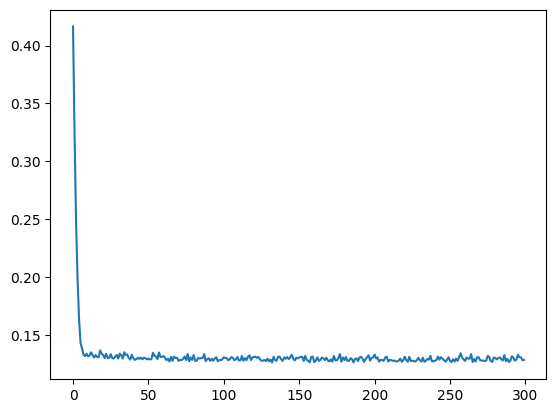

node: right_hand
Epoch [10], Loss: 0.7043
Epoch [20], Loss: 0.7198
Epoch [30], Loss: 0.7108
Epoch [40], Loss: 0.7067
Epoch [50], Loss: 0.7014
Epoch [60], Loss: 0.7071
Epoch [70], Loss: 0.6743
Epoch [80], Loss: 0.6810
Epoch [90], Loss: 0.6707
Epoch [100], Loss: 0.6661
Epoch [110], Loss: 0.6811
Epoch [120], Loss: 0.6705
Epoch [130], Loss: 0.6774
Epoch [140], Loss: 0.6862
Epoch [150], Loss: 0.6683
Epoch [160], Loss: 0.6619
Epoch [170], Loss: 0.6609
Epoch [180], Loss: 0.6859
Epoch [190], Loss: 0.6756
Epoch [200], Loss: 0.6580
Epoch [210], Loss: 0.6580
Epoch [220], Loss: 0.6930
Epoch [230], Loss: 0.6581
Epoch [240], Loss: 0.6581
Epoch [250], Loss: 0.6598
Epoch [260], Loss: 0.6761
Epoch [270], Loss: 0.6725
Epoch [280], Loss: 0.6561
Epoch [290], Loss: 0.6670
Epoch [300], Loss: 0.6630


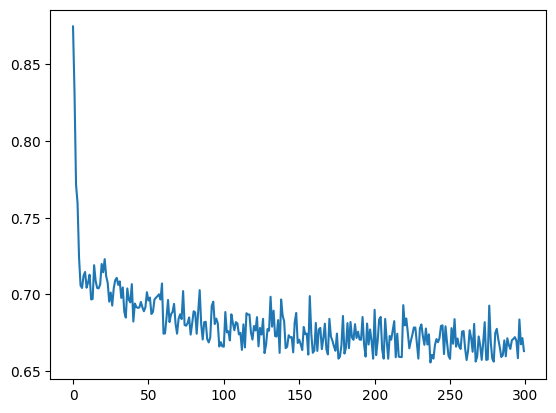

node: left_hand
Epoch [10], Loss: 1.1418
Epoch [20], Loss: 0.9368
Epoch [30], Loss: 0.9521
Epoch [40], Loss: 0.9584
Epoch [50], Loss: 0.9396
Epoch [60], Loss: 0.9382
Epoch [70], Loss: 0.9324
Epoch [80], Loss: 0.9560
Epoch [90], Loss: 0.9441
Epoch [100], Loss: 0.9427
Epoch [110], Loss: 0.9420
Epoch [120], Loss: 0.9288
Epoch [130], Loss: 0.9503
Epoch [140], Loss: 0.9406
Epoch [150], Loss: 0.9459
Epoch [160], Loss: 0.9516
Epoch [170], Loss: 0.9521
Epoch [180], Loss: 0.9480
Epoch [190], Loss: 0.9481
Epoch [200], Loss: 0.9421
Epoch [210], Loss: 0.9446
Epoch [220], Loss: 0.9479
Epoch [230], Loss: 0.9448
Epoch [240], Loss: 0.9442
Epoch [250], Loss: 0.9354
Epoch [260], Loss: 0.9440
Epoch [270], Loss: 0.9533
Epoch [280], Loss: 0.9383
Epoch [290], Loss: 0.9300
Epoch [300], Loss: 0.9427


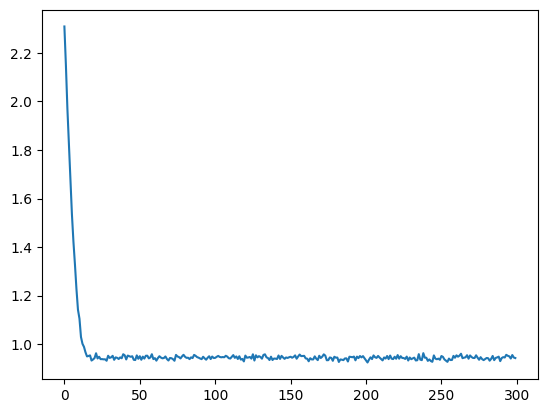

node: right_knee
Epoch [10], Loss: 0.0548
Epoch [20], Loss: 0.0547
Epoch [30], Loss: 0.0539
Epoch [40], Loss: 0.0512
Epoch [50], Loss: 0.0493
Epoch [60], Loss: 0.0494
Epoch [70], Loss: 0.0490
Epoch [80], Loss: 0.0483
Epoch [90], Loss: 0.0482
Epoch [100], Loss: 0.0487
Epoch [110], Loss: 0.0483
Epoch [120], Loss: 0.0483
Epoch [130], Loss: 0.0510
Epoch [140], Loss: 0.0481
Epoch [150], Loss: 0.0487
Epoch [160], Loss: 0.0483
Epoch [170], Loss: 0.0482
Epoch [180], Loss: 0.0482
Epoch [190], Loss: 0.0515
Epoch [200], Loss: 0.0491
Epoch [210], Loss: 0.0515
Epoch [220], Loss: 0.0508
Epoch [230], Loss: 0.0510
Epoch [240], Loss: 0.0487
Epoch [250], Loss: 0.0519
Epoch [260], Loss: 0.0514
Epoch [270], Loss: 0.0490
Epoch [280], Loss: 0.0486
Epoch [290], Loss: 0.0486
Epoch [300], Loss: 0.0481


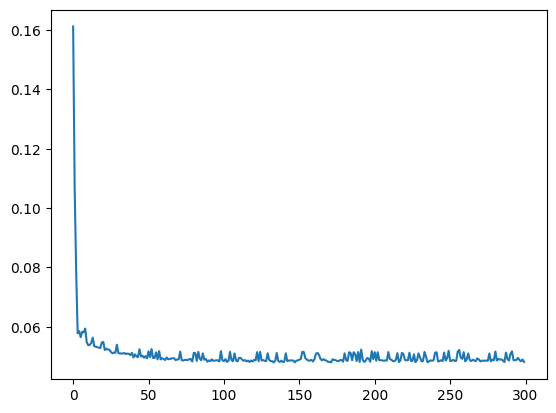

node: left_knee
Epoch [10], Loss: 0.0621
Epoch [20], Loss: 0.0362
Epoch [30], Loss: 0.0351
Epoch [40], Loss: 0.0351
Epoch [50], Loss: 0.0346
Epoch [60], Loss: 0.0349
Epoch [70], Loss: 0.0341
Epoch [80], Loss: 0.0342
Epoch [90], Loss: 0.0345
Epoch [100], Loss: 0.0350
Epoch [110], Loss: 0.0343
Epoch [120], Loss: 0.0341
Epoch [130], Loss: 0.0344
Epoch [140], Loss: 0.0339
Epoch [150], Loss: 0.0347
Epoch [160], Loss: 0.0340
Epoch [170], Loss: 0.0346
Epoch [180], Loss: 0.0351
Epoch [190], Loss: 0.0344
Epoch [200], Loss: 0.0340
Epoch [210], Loss: 0.0348
Epoch [220], Loss: 0.0342
Epoch [230], Loss: 0.0343
Epoch [240], Loss: 0.0348
Epoch [250], Loss: 0.0342
Epoch [260], Loss: 0.0341
Epoch [270], Loss: 0.0351
Epoch [280], Loss: 0.0346
Epoch [290], Loss: 0.0349
Epoch [300], Loss: 0.0344


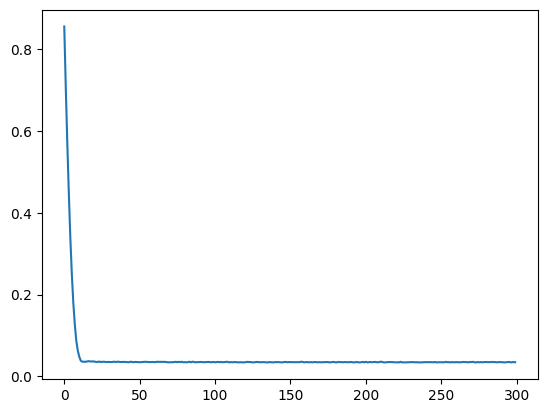

node: right_ankle
Epoch [10], Loss: 0.4079
Epoch [20], Loss: 0.1343
Epoch [30], Loss: 0.1332
Epoch [40], Loss: 0.1301
Epoch [50], Loss: 0.1303
Epoch [60], Loss: 0.1300
Epoch [70], Loss: 0.1366
Epoch [80], Loss: 0.1317
Epoch [90], Loss: 0.1314
Epoch [100], Loss: 0.1320
Epoch [110], Loss: 0.1287
Epoch [120], Loss: 0.1328
Epoch [130], Loss: 0.1352
Epoch [140], Loss: 0.1311
Epoch [150], Loss: 0.1283
Epoch [160], Loss: 0.1306
Epoch [170], Loss: 0.1314
Epoch [180], Loss: 0.1314
Epoch [190], Loss: 0.1308
Epoch [200], Loss: 0.1308
Epoch [210], Loss: 0.1327
Epoch [220], Loss: 0.1277
Epoch [230], Loss: 0.1321
Epoch [240], Loss: 0.1360
Epoch [250], Loss: 0.1356
Epoch [260], Loss: 0.1309
Epoch [270], Loss: 0.1286
Epoch [280], Loss: 0.1312
Epoch [290], Loss: 0.1279
Epoch [300], Loss: 0.1313


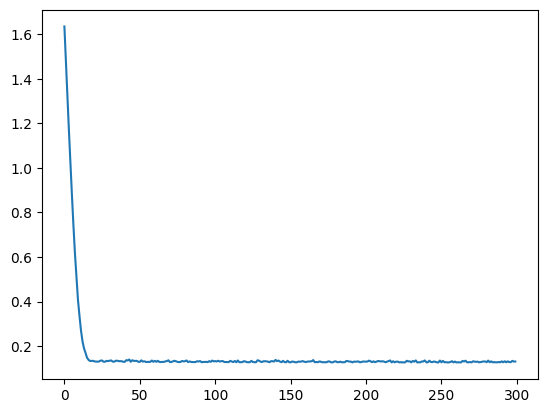

node: left_ankle
Epoch [10], Loss: 0.2090
Epoch [20], Loss: 0.1495
Epoch [30], Loss: 0.1452
Epoch [40], Loss: 0.1341
Epoch [50], Loss: 0.1319
Epoch [60], Loss: 0.1218
Epoch [70], Loss: 0.1170
Epoch [80], Loss: 0.1075
Epoch [90], Loss: 0.1048
Epoch [100], Loss: 0.0985
Epoch [110], Loss: 0.0957
Epoch [120], Loss: 0.0966
Epoch [130], Loss: 0.0902
Epoch [140], Loss: 0.0893
Epoch [150], Loss: 0.0917
Epoch [160], Loss: 0.0873
Epoch [170], Loss: 0.0863
Epoch [180], Loss: 0.0854
Epoch [190], Loss: 0.0889
Epoch [200], Loss: 0.0865
Epoch [210], Loss: 0.0884
Epoch [220], Loss: 0.0852
Epoch [230], Loss: 0.0854
Epoch [240], Loss: 0.0876
Epoch [250], Loss: 0.0858
Epoch [260], Loss: 0.0876
Epoch [270], Loss: 0.0854
Epoch [280], Loss: 0.0840
Epoch [290], Loss: 0.0856
Epoch [300], Loss: 0.0877


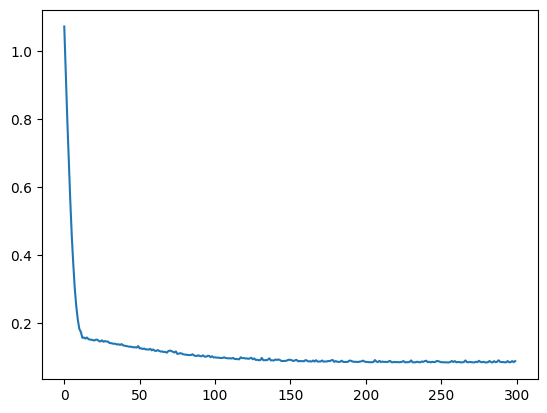

node: right_eye
Epoch [10], Loss: 2.2155
Epoch [20], Loss: 0.5938
Epoch [30], Loss: 0.2245
Epoch [40], Loss: 0.1337
Epoch [50], Loss: 0.1041
Epoch [60], Loss: 0.0939
Epoch [70], Loss: 0.0923
Epoch [80], Loss: 0.0885
Epoch [90], Loss: 0.0899
Epoch [100], Loss: 0.0857
Epoch [110], Loss: 0.0864
Epoch [120], Loss: 0.0884
Epoch [130], Loss: 0.0848
Epoch [140], Loss: 0.0879
Epoch [150], Loss: 0.0835
Epoch [160], Loss: 0.0844
Epoch [170], Loss: 0.0832
Epoch [180], Loss: 0.0858
Epoch [190], Loss: 0.0832
Epoch [200], Loss: 0.0819
Epoch [210], Loss: 0.0810
Epoch [220], Loss: 0.0839
Epoch [230], Loss: 0.0804
Epoch [240], Loss: 0.0826
Epoch [250], Loss: 0.0790
Epoch [260], Loss: 0.0790
Epoch [270], Loss: 0.0820
Epoch [280], Loss: 0.0780
Epoch [290], Loss: 0.0779
Epoch [300], Loss: 0.0765


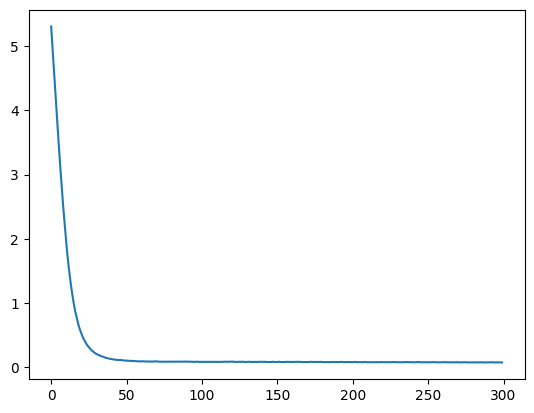

node: left_eye
Epoch [10], Loss: 0.4506
Epoch [20], Loss: 0.1159
Epoch [30], Loss: 0.0797
Epoch [40], Loss: 0.0732
Epoch [50], Loss: 0.0730
Epoch [60], Loss: 0.0732
Epoch [70], Loss: 0.0728
Epoch [80], Loss: 0.0728
Epoch [90], Loss: 0.0727
Epoch [100], Loss: 0.0726
Epoch [110], Loss: 0.0730
Epoch [120], Loss: 0.0726
Epoch [130], Loss: 0.0718
Epoch [140], Loss: 0.0725
Epoch [150], Loss: 0.0722
Epoch [160], Loss: 0.0729
Epoch [170], Loss: 0.0720
Epoch [180], Loss: 0.0716
Epoch [190], Loss: 0.0720
Epoch [200], Loss: 0.0717
Epoch [210], Loss: 0.0727
Epoch [220], Loss: 0.0716
Epoch [230], Loss: 0.0725
Epoch [240], Loss: 0.0733
Epoch [250], Loss: 0.0724
Epoch [260], Loss: 0.0715
Epoch [270], Loss: 0.0727
Epoch [280], Loss: 0.0710
Epoch [290], Loss: 0.0712
Epoch [300], Loss: 0.0714


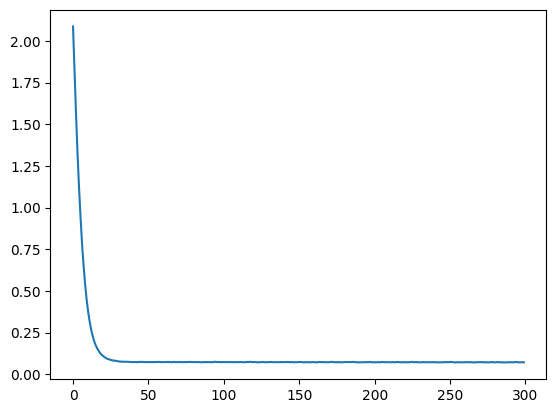

node: right_ear
Epoch [10], Loss: 6.1042
Epoch [20], Loss: 2.6730
Epoch [30], Loss: 1.4404
Epoch [40], Loss: 1.1643
Epoch [50], Loss: 1.1043
Epoch [60], Loss: 1.1085
Epoch [70], Loss: 1.1161
Epoch [80], Loss: 1.1114
Epoch [90], Loss: 1.0936
Epoch [100], Loss: 1.0962
Epoch [110], Loss: 1.0992
Epoch [120], Loss: 1.0753
Epoch [130], Loss: 1.1096
Epoch [140], Loss: 1.1160
Epoch [150], Loss: 1.0950
Epoch [160], Loss: 1.1227
Epoch [170], Loss: 1.1078
Epoch [180], Loss: 1.0881
Epoch [190], Loss: 1.0712
Epoch [200], Loss: 1.0983
Epoch [210], Loss: 1.0846
Epoch [220], Loss: 1.0759
Epoch [230], Loss: 1.0738
Epoch [240], Loss: 1.1021
Epoch [250], Loss: 1.0713
Epoch [260], Loss: 1.0826
Epoch [270], Loss: 1.1100
Epoch [280], Loss: 1.0849
Epoch [290], Loss: 1.1120
Epoch [300], Loss: 1.1154


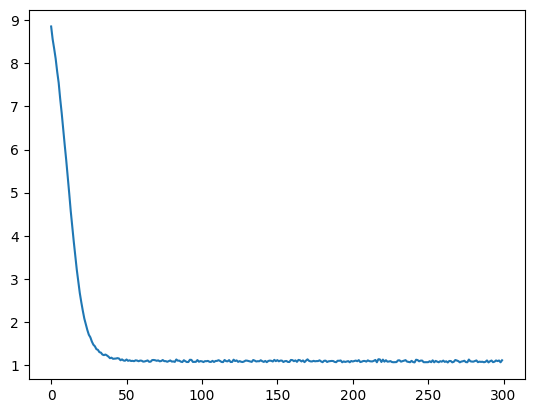

node: left_ear
Epoch [10], Loss: 5.5091
Epoch [20], Loss: 2.2270
Epoch [30], Loss: 1.1665
Epoch [40], Loss: 0.8808
Epoch [50], Loss: 0.7808
Epoch [60], Loss: 0.7661
Epoch [70], Loss: 0.7177
Epoch [80], Loss: 0.7675
Epoch [90], Loss: 0.7300
Epoch [100], Loss: 0.6956
Epoch [110], Loss: 0.6932
Epoch [120], Loss: 0.6902
Epoch [130], Loss: 0.7552
Epoch [140], Loss: 0.6905
Epoch [150], Loss: 0.7255
Epoch [160], Loss: 0.6896
Epoch [170], Loss: 0.7241
Epoch [180], Loss: 0.7238
Epoch [190], Loss: 0.6905
Epoch [200], Loss: 0.7234
Epoch [210], Loss: 0.7547
Epoch [220], Loss: 0.6885
Epoch [230], Loss: 0.6890
Epoch [240], Loss: 0.7235
Epoch [250], Loss: 0.7194
Epoch [260], Loss: 0.6891
Epoch [270], Loss: 0.6889
Epoch [280], Loss: 0.7202
Epoch [290], Loss: 0.6882
Epoch [300], Loss: 0.7544


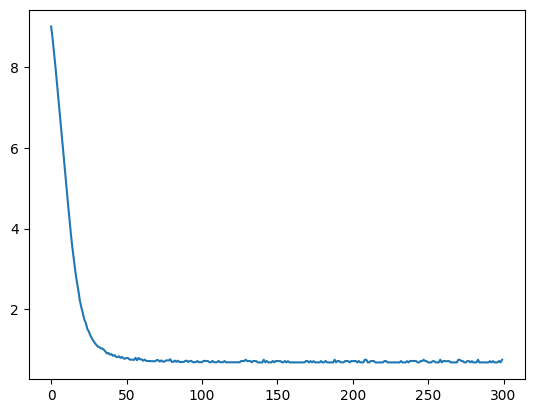

=== disgust ===
node: nose
Epoch [10], Loss: 0.2231
Epoch [20], Loss: 0.2157
Epoch [30], Loss: 0.2085
Epoch [40], Loss: 0.2115
Epoch [50], Loss: 0.2128
Epoch [60], Loss: 0.2065
Epoch [70], Loss: 0.2056
Epoch [80], Loss: 0.2092
Epoch [90], Loss: 0.2067
Epoch [100], Loss: 0.2114
Epoch [110], Loss: 0.2073
Epoch [120], Loss: 0.2066
Epoch [130], Loss: 0.2040
Epoch [140], Loss: 0.2064
Epoch [150], Loss: 0.2035
Epoch [160], Loss: 0.2043
Epoch [170], Loss: 0.2020
Epoch [180], Loss: 0.2046
Epoch [190], Loss: 0.2043
Epoch [200], Loss: 0.2029
Epoch [210], Loss: 0.2036
Epoch [220], Loss: 0.2048
Epoch [230], Loss: 0.2025
Epoch [240], Loss: 0.2042
Epoch [250], Loss: 0.2038
Epoch [260], Loss: 0.2072
Epoch [270], Loss: 0.2052
Epoch [280], Loss: 0.2040
Epoch [290], Loss: 0.2045
Epoch [300], Loss: 0.2072


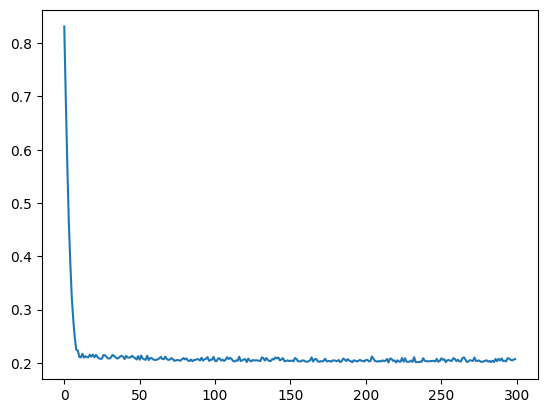

node: right_shoulder
Epoch [10], Loss: 0.2280
Epoch [20], Loss: 0.0963
Epoch [30], Loss: 0.0562
Epoch [40], Loss: 0.0377
Epoch [50], Loss: 0.0275
Epoch [60], Loss: 0.0213
Epoch [70], Loss: 0.0172
Epoch [80], Loss: 0.0143
Epoch [90], Loss: 0.0120
Epoch [100], Loss: 0.0104
Epoch [110], Loss: 0.0091
Epoch [120], Loss: 0.0081
Epoch [130], Loss: 0.0072
Epoch [140], Loss: 0.0065
Epoch [150], Loss: 0.0059
Epoch [160], Loss: 0.0054
Epoch [170], Loss: 0.0050
Epoch [180], Loss: 0.0047
Epoch [190], Loss: 0.0043
Epoch [200], Loss: 0.0041
Epoch [210], Loss: 0.0038
Epoch [220], Loss: 0.0036
Epoch [230], Loss: 0.0035
Epoch [240], Loss: 0.0033
Epoch [250], Loss: 0.0031
Epoch [260], Loss: 0.0031
Epoch [270], Loss: 0.0029
Epoch [280], Loss: 0.0028
Epoch [290], Loss: 0.0027
Epoch [300], Loss: 0.0026


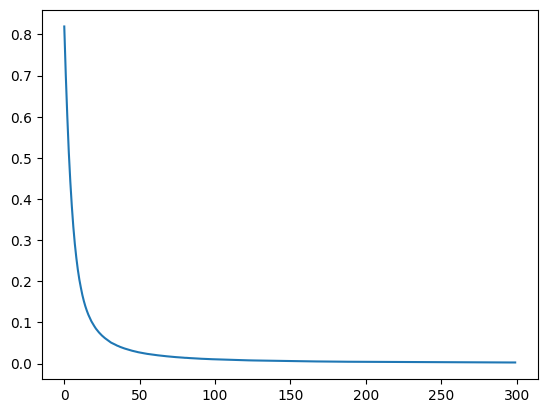

node: left_shoulder
Epoch [10], Loss: 2.5584
Epoch [20], Loss: 0.9572
Epoch [30], Loss: 0.4773
Epoch [40], Loss: 0.2921
Epoch [50], Loss: 0.2000
Epoch [60], Loss: 0.1473
Epoch [70], Loss: 0.1139
Epoch [80], Loss: 0.0911
Epoch [90], Loss: 0.0750
Epoch [100], Loss: 0.0628
Epoch [110], Loss: 0.0539
Epoch [120], Loss: 0.0466
Epoch [130], Loss: 0.0407
Epoch [140], Loss: 0.0361
Epoch [150], Loss: 0.0321
Epoch [160], Loss: 0.0290
Epoch [170], Loss: 0.0262
Epoch [180], Loss: 0.0239
Epoch [190], Loss: 0.0219
Epoch [200], Loss: 0.0201
Epoch [210], Loss: 0.0186
Epoch [220], Loss: 0.0172
Epoch [230], Loss: 0.0160
Epoch [240], Loss: 0.0150
Epoch [250], Loss: 0.0140
Epoch [260], Loss: 0.0131
Epoch [270], Loss: 0.0123
Epoch [280], Loss: 0.0117
Epoch [290], Loss: 0.0110
Epoch [300], Loss: 0.0104


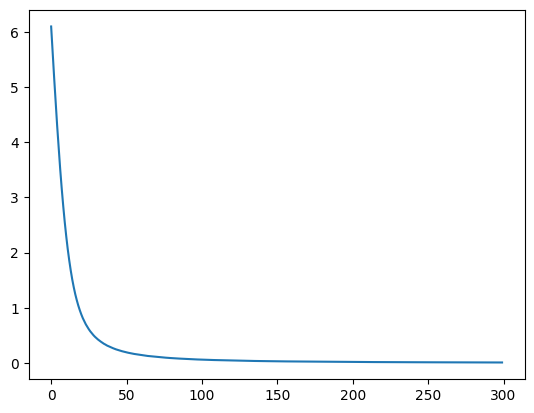

node: right_thigh
Epoch [10], Loss: 0.5598
Epoch [20], Loss: 0.0483
Epoch [30], Loss: 0.0350
Epoch [40], Loss: 0.0324
Epoch [50], Loss: 0.0345
Epoch [60], Loss: 0.0317
Epoch [70], Loss: 0.0315
Epoch [80], Loss: 0.0311
Epoch [90], Loss: 0.0308
Epoch [100], Loss: 0.0305
Epoch [110], Loss: 0.0326
Epoch [120], Loss: 0.0301
Epoch [130], Loss: 0.0298
Epoch [140], Loss: 0.0298
Epoch [150], Loss: 0.0296
Epoch [160], Loss: 0.0318
Epoch [170], Loss: 0.0316
Epoch [180], Loss: 0.0291
Epoch [190], Loss: 0.0290
Epoch [200], Loss: 0.0313
Epoch [210], Loss: 0.0313
Epoch [220], Loss: 0.0288
Epoch [230], Loss: 0.0289
Epoch [240], Loss: 0.0288
Epoch [250], Loss: 0.0289
Epoch [260], Loss: 0.0312
Epoch [270], Loss: 0.0287
Epoch [280], Loss: 0.0313
Epoch [290], Loss: 0.0287
Epoch [300], Loss: 0.0287


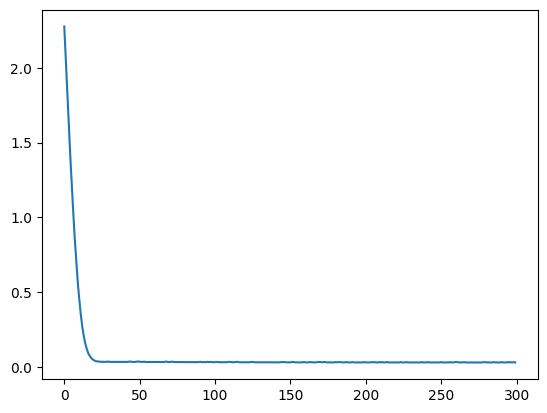

node: left_thigh
Epoch [10], Loss: 0.4873
Epoch [20], Loss: 0.1153
Epoch [30], Loss: 0.1046
Epoch [40], Loss: 0.0975
Epoch [50], Loss: 0.0917
Epoch [60], Loss: 0.0845
Epoch [70], Loss: 0.0787
Epoch [80], Loss: 0.0728
Epoch [90], Loss: 0.0702
Epoch [100], Loss: 0.0626
Epoch [110], Loss: 0.0577
Epoch [120], Loss: 0.0535
Epoch [130], Loss: 0.0499
Epoch [140], Loss: 0.0467
Epoch [150], Loss: 0.0440
Epoch [160], Loss: 0.0414
Epoch [170], Loss: 0.0396
Epoch [180], Loss: 0.0402
Epoch [190], Loss: 0.0389
Epoch [200], Loss: 0.0351
Epoch [210], Loss: 0.0369
Epoch [220], Loss: 0.0336
Epoch [230], Loss: 0.0333
Epoch [240], Loss: 0.0353
Epoch [250], Loss: 0.0325
Epoch [260], Loss: 0.0320
Epoch [270], Loss: 0.0318
Epoch [280], Loss: 0.0317
Epoch [290], Loss: 0.0318
Epoch [300], Loss: 0.0316


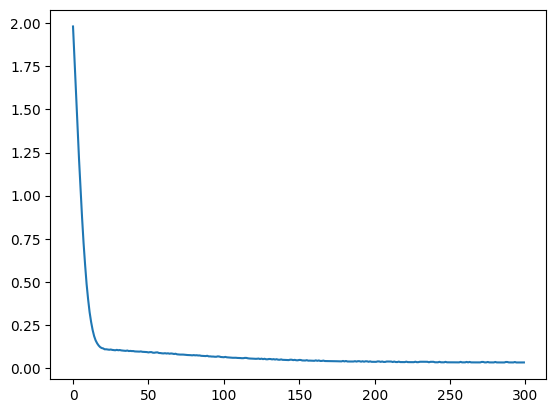

node: right_elbow
Epoch [10], Loss: 0.1754
Epoch [20], Loss: 0.1710
Epoch [30], Loss: 0.1784
Epoch [40], Loss: 0.1703
Epoch [50], Loss: 0.1712
Epoch [60], Loss: 0.1758
Epoch [70], Loss: 0.1775
Epoch [80], Loss: 0.1769
Epoch [90], Loss: 0.1738
Epoch [100], Loss: 0.1782
Epoch [110], Loss: 0.1733
Epoch [120], Loss: 0.1728
Epoch [130], Loss: 0.1733
Epoch [140], Loss: 0.1701
Epoch [150], Loss: 0.1723
Epoch [160], Loss: 0.1728
Epoch [170], Loss: 0.1705
Epoch [180], Loss: 0.1728
Epoch [190], Loss: 0.1691
Epoch [200], Loss: 0.1710
Epoch [210], Loss: 0.1748
Epoch [220], Loss: 0.1690
Epoch [230], Loss: 0.1726
Epoch [240], Loss: 0.1708
Epoch [250], Loss: 0.1762
Epoch [260], Loss: 0.1712
Epoch [270], Loss: 0.1757
Epoch [280], Loss: 0.1711
Epoch [290], Loss: 0.1695
Epoch [300], Loss: 0.1695


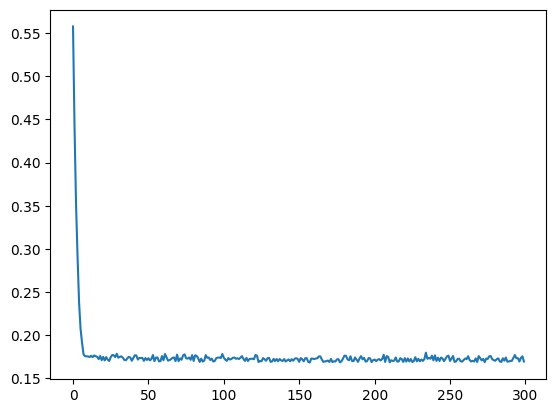

node: left_elbow
Epoch [10], Loss: 0.1479
Epoch [20], Loss: 0.1270
Epoch [30], Loss: 0.1294
Epoch [40], Loss: 0.1273
Epoch [50], Loss: 0.1273
Epoch [60], Loss: 0.1277
Epoch [70], Loss: 0.1279
Epoch [80], Loss: 0.1254
Epoch [90], Loss: 0.1250
Epoch [100], Loss: 0.1251
Epoch [110], Loss: 0.1282
Epoch [120], Loss: 0.1250
Epoch [130], Loss: 0.1256
Epoch [140], Loss: 0.1261
Epoch [150], Loss: 0.1298
Epoch [160], Loss: 0.1278
Epoch [170], Loss: 0.1256
Epoch [180], Loss: 0.1267
Epoch [190], Loss: 0.1261
Epoch [200], Loss: 0.1278
Epoch [210], Loss: 0.1259
Epoch [220], Loss: 0.1282
Epoch [230], Loss: 0.1265
Epoch [240], Loss: 0.1245
Epoch [250], Loss: 0.1293
Epoch [260], Loss: 0.1253
Epoch [270], Loss: 0.1261
Epoch [280], Loss: 0.1278
Epoch [290], Loss: 0.1282
Epoch [300], Loss: 0.1281


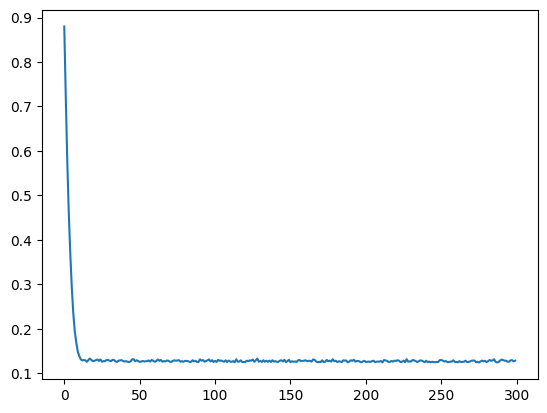

node: right_hand
Epoch [10], Loss: 0.9303
Epoch [20], Loss: 0.8216
Epoch [30], Loss: 0.8042
Epoch [40], Loss: 0.7800
Epoch [50], Loss: 0.7719
Epoch [60], Loss: 0.7731
Epoch [70], Loss: 0.7263
Epoch [80], Loss: 0.7220
Epoch [90], Loss: 0.7180
Epoch [100], Loss: 0.7291
Epoch [110], Loss: 0.6925
Epoch [120], Loss: 0.6944
Epoch [130], Loss: 0.6894
Epoch [140], Loss: 0.6730
Epoch [150], Loss: 0.6745
Epoch [160], Loss: 0.6767
Epoch [170], Loss: 0.6795
Epoch [180], Loss: 0.6749
Epoch [190], Loss: 0.6697
Epoch [200], Loss: 0.6544
Epoch [210], Loss: 0.6761
Epoch [220], Loss: 0.6759
Epoch [230], Loss: 0.6580
Epoch [240], Loss: 0.6533
Epoch [250], Loss: 0.6469
Epoch [260], Loss: 0.6610
Epoch [270], Loss: 0.6588
Epoch [280], Loss: 0.6677
Epoch [290], Loss: 0.6556
Epoch [300], Loss: 0.6546


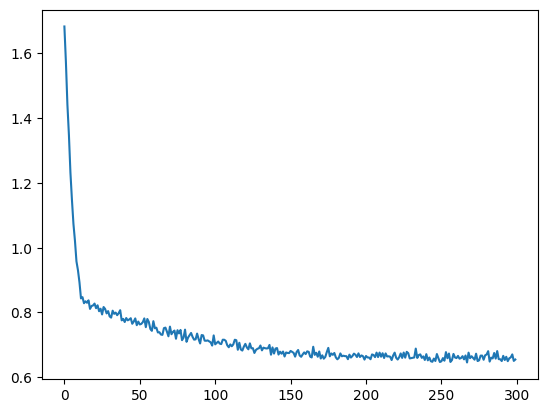

node: left_hand
Epoch [10], Loss: 1.5278
Epoch [20], Loss: 0.9857
Epoch [30], Loss: 0.9894
Epoch [40], Loss: 0.9895
Epoch [50], Loss: 0.9836
Epoch [60], Loss: 0.9747
Epoch [70], Loss: 0.9767
Epoch [80], Loss: 0.9881
Epoch [90], Loss: 0.9763
Epoch [100], Loss: 0.9770
Epoch [110], Loss: 0.9690
Epoch [120], Loss: 0.9964
Epoch [130], Loss: 0.9797
Epoch [140], Loss: 0.9588
Epoch [150], Loss: 0.9777
Epoch [160], Loss: 0.9636
Epoch [170], Loss: 0.9830
Epoch [180], Loss: 0.9675
Epoch [190], Loss: 0.9634
Epoch [200], Loss: 0.9740
Epoch [210], Loss: 0.9682
Epoch [220], Loss: 0.9771
Epoch [230], Loss: 0.9627
Epoch [240], Loss: 0.9678
Epoch [250], Loss: 0.9787
Epoch [260], Loss: 0.9753
Epoch [270], Loss: 0.9605
Epoch [280], Loss: 0.9715
Epoch [290], Loss: 0.9571
Epoch [300], Loss: 0.9648


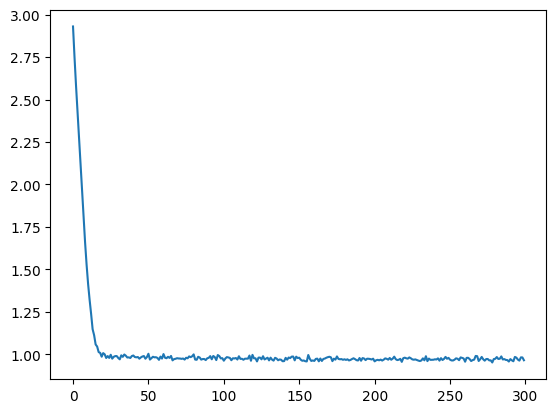

node: right_knee
Epoch [10], Loss: 1.0627
Epoch [20], Loss: 0.0965
Epoch [30], Loss: 0.0507
Epoch [40], Loss: 0.0503
Epoch [50], Loss: 0.0506
Epoch [60], Loss: 0.0503
Epoch [70], Loss: 0.0499
Epoch [80], Loss: 0.0535
Epoch [90], Loss: 0.0498
Epoch [100], Loss: 0.0497
Epoch [110], Loss: 0.0494
Epoch [120], Loss: 0.0497
Epoch [130], Loss: 0.0496
Epoch [140], Loss: 0.0494
Epoch [150], Loss: 0.0503
Epoch [160], Loss: 0.0492
Epoch [170], Loss: 0.0498
Epoch [180], Loss: 0.0494
Epoch [190], Loss: 0.0493
Epoch [200], Loss: 0.0493
Epoch [210], Loss: 0.0496
Epoch [220], Loss: 0.0518
Epoch [230], Loss: 0.0496
Epoch [240], Loss: 0.0523
Epoch [250], Loss: 0.0498
Epoch [260], Loss: 0.0522
Epoch [270], Loss: 0.0524
Epoch [280], Loss: 0.0493
Epoch [290], Loss: 0.0494
Epoch [300], Loss: 0.0525


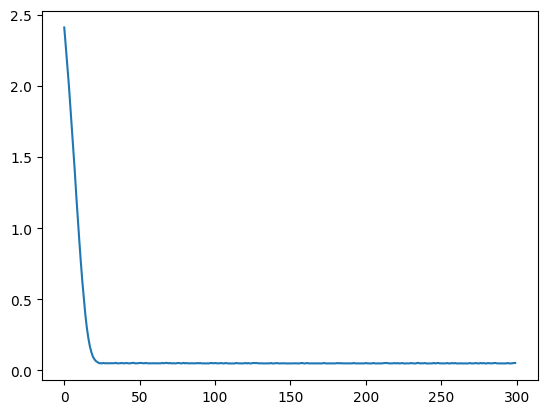

node: left_knee
Epoch [10], Loss: 0.1883
Epoch [20], Loss: 0.0364
Epoch [30], Loss: 0.0355
Epoch [40], Loss: 0.0354
Epoch [50], Loss: 0.0351
Epoch [60], Loss: 0.0349
Epoch [70], Loss: 0.0346
Epoch [80], Loss: 0.0350
Epoch [90], Loss: 0.0351
Epoch [100], Loss: 0.0345
Epoch [110], Loss: 0.0350
Epoch [120], Loss: 0.0342
Epoch [130], Loss: 0.0346
Epoch [140], Loss: 0.0347
Epoch [150], Loss: 0.0346
Epoch [160], Loss: 0.0344
Epoch [170], Loss: 0.0339
Epoch [180], Loss: 0.0342
Epoch [190], Loss: 0.0357
Epoch [200], Loss: 0.0345
Epoch [210], Loss: 0.0345
Epoch [220], Loss: 0.0345
Epoch [230], Loss: 0.0344
Epoch [240], Loss: 0.0350
Epoch [250], Loss: 0.0345
Epoch [260], Loss: 0.0344
Epoch [270], Loss: 0.0341
Epoch [280], Loss: 0.0350
Epoch [290], Loss: 0.0345
Epoch [300], Loss: 0.0343


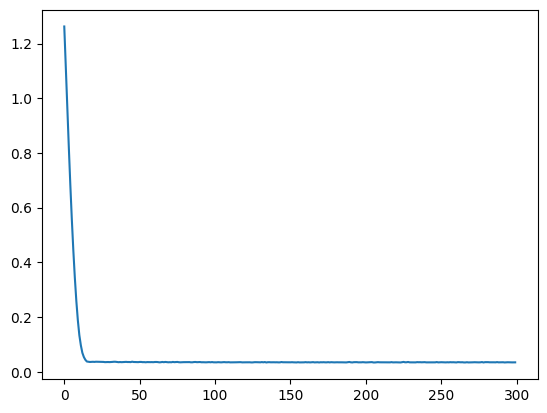

node: right_ankle
Epoch [10], Loss: 0.1607
Epoch [20], Loss: 0.1466
Epoch [30], Loss: 0.1443
Epoch [40], Loss: 0.1414
Epoch [50], Loss: 0.1411
Epoch [60], Loss: 0.1370
Epoch [70], Loss: 0.1407
Epoch [80], Loss: 0.1403
Epoch [90], Loss: 0.1417
Epoch [100], Loss: 0.1354
Epoch [110], Loss: 0.1400
Epoch [120], Loss: 0.1324
Epoch [130], Loss: 0.1340
Epoch [140], Loss: 0.1315
Epoch [150], Loss: 0.1312
Epoch [160], Loss: 0.1312
Epoch [170], Loss: 0.1306
Epoch [180], Loss: 0.1341
Epoch [190], Loss: 0.1306
Epoch [200], Loss: 0.1309
Epoch [210], Loss: 0.1385
Epoch [220], Loss: 0.1308
Epoch [230], Loss: 0.1335
Epoch [240], Loss: 0.1302
Epoch [250], Loss: 0.1299
Epoch [260], Loss: 0.1370
Epoch [270], Loss: 0.1332
Epoch [280], Loss: 0.1358
Epoch [290], Loss: 0.1302
Epoch [300], Loss: 0.1331


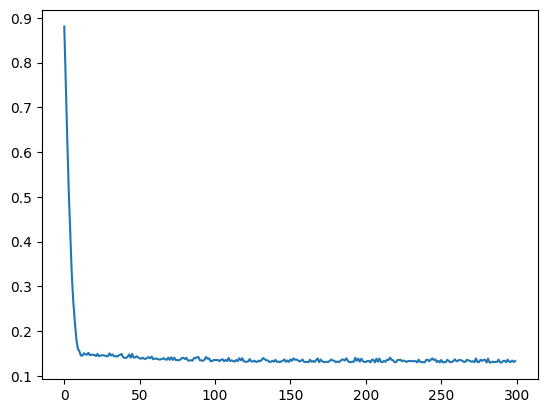

node: left_ankle
Epoch [10], Loss: 0.0959
Epoch [20], Loss: 0.0965
Epoch [30], Loss: 0.0984
Epoch [40], Loss: 0.0996
Epoch [50], Loss: 0.0955
Epoch [60], Loss: 0.0987
Epoch [70], Loss: 0.0957
Epoch [80], Loss: 0.0957
Epoch [90], Loss: 0.0953
Epoch [100], Loss: 0.0987
Epoch [110], Loss: 0.0953
Epoch [120], Loss: 0.0955
Epoch [130], Loss: 0.0957
Epoch [140], Loss: 0.0983
Epoch [150], Loss: 0.0988
Epoch [160], Loss: 0.0955
Epoch [170], Loss: 0.0988
Epoch [180], Loss: 0.1016
Epoch [190], Loss: 0.0951
Epoch [200], Loss: 0.0972
Epoch [210], Loss: 0.0955
Epoch [220], Loss: 0.0988
Epoch [230], Loss: 0.0995
Epoch [240], Loss: 0.0952
Epoch [250], Loss: 0.0957
Epoch [260], Loss: 0.0950
Epoch [270], Loss: 0.0952
Epoch [280], Loss: 0.0958
Epoch [290], Loss: 0.0987
Epoch [300], Loss: 0.0954


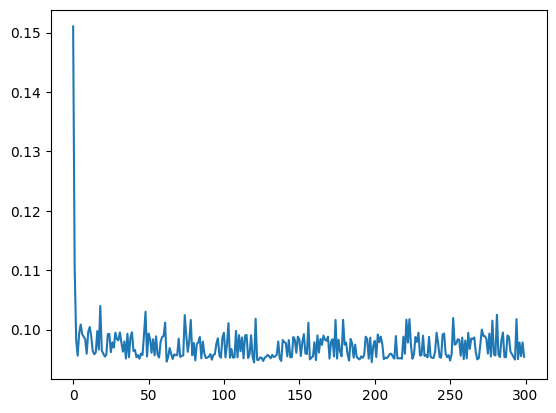

node: right_eye
Epoch [10], Loss: 0.0727
Epoch [20], Loss: 0.0717
Epoch [30], Loss: 0.0749
Epoch [40], Loss: 0.0716
Epoch [50], Loss: 0.0713
Epoch [60], Loss: 0.0713
Epoch [70], Loss: 0.0713
Epoch [80], Loss: 0.0711
Epoch [90], Loss: 0.0715
Epoch [100], Loss: 0.0720
Epoch [110], Loss: 0.0713
Epoch [120], Loss: 0.0741
Epoch [130], Loss: 0.0710
Epoch [140], Loss: 0.0711
Epoch [150], Loss: 0.0737
Epoch [160], Loss: 0.0735
Epoch [170], Loss: 0.0738
Epoch [180], Loss: 0.0724
Epoch [190], Loss: 0.0713
Epoch [200], Loss: 0.0740
Epoch [210], Loss: 0.0713
Epoch [220], Loss: 0.0715
Epoch [230], Loss: 0.0723
Epoch [240], Loss: 0.0721
Epoch [250], Loss: 0.0719
Epoch [260], Loss: 0.0712
Epoch [270], Loss: 0.0737
Epoch [280], Loss: 0.0710
Epoch [290], Loss: 0.0716
Epoch [300], Loss: 0.0716


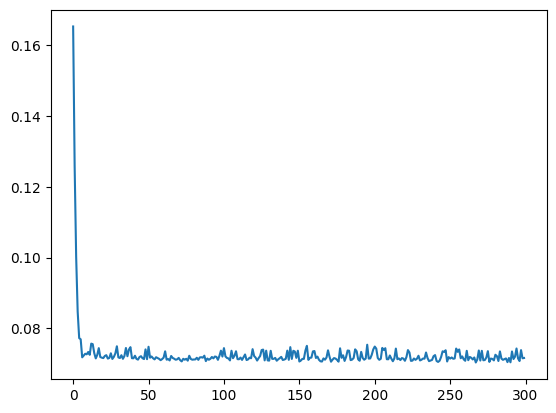

node: left_eye
Epoch [10], Loss: 2.1762
Epoch [20], Loss: 0.5473
Epoch [30], Loss: 0.2034
Epoch [40], Loss: 0.1257
Epoch [50], Loss: 0.1055
Epoch [60], Loss: 0.0978
Epoch [70], Loss: 0.0954
Epoch [80], Loss: 0.0951
Epoch [90], Loss: 0.0947
Epoch [100], Loss: 0.0929
Epoch [110], Loss: 0.0923
Epoch [120], Loss: 0.0930
Epoch [130], Loss: 0.0912
Epoch [140], Loss: 0.0906
Epoch [150], Loss: 0.0885
Epoch [160], Loss: 0.0886
Epoch [170], Loss: 0.0859
Epoch [180], Loss: 0.0866
Epoch [190], Loss: 0.0859
Epoch [200], Loss: 0.0842
Epoch [210], Loss: 0.0837
Epoch [220], Loss: 0.0820
Epoch [230], Loss: 0.0823
Epoch [240], Loss: 0.0807
Epoch [250], Loss: 0.0808
Epoch [260], Loss: 0.0813
Epoch [270], Loss: 0.0794
Epoch [280], Loss: 0.0770
Epoch [290], Loss: 0.0766
Epoch [300], Loss: 0.0773


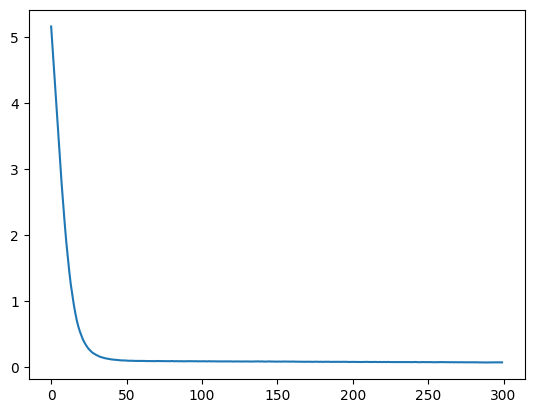

node: right_ear
Epoch [10], Loss: 3.1058
Epoch [20], Loss: 1.5730
Epoch [30], Loss: 1.2081
Epoch [40], Loss: 1.1867
Epoch [50], Loss: 1.1131
Epoch [60], Loss: 1.1304
Epoch [70], Loss: 1.1215
Epoch [80], Loss: 1.1164
Epoch [90], Loss: 1.1158
Epoch [100], Loss: 1.1102
Epoch [110], Loss: 1.1124
Epoch [120], Loss: 1.0777
Epoch [130], Loss: 1.0916
Epoch [140], Loss: 1.0829
Epoch [150], Loss: 1.0887
Epoch [160], Loss: 1.0706
Epoch [170], Loss: 1.0971
Epoch [180], Loss: 1.0507
Epoch [190], Loss: 1.0443
Epoch [200], Loss: 1.0435
Epoch [210], Loss: 1.0530
Epoch [220], Loss: 1.0621
Epoch [230], Loss: 1.0606
Epoch [240], Loss: 1.0653
Epoch [250], Loss: 1.0360
Epoch [260], Loss: 1.0289
Epoch [270], Loss: 1.0284
Epoch [280], Loss: 1.0122
Epoch [290], Loss: 1.0087
Epoch [300], Loss: 1.0016


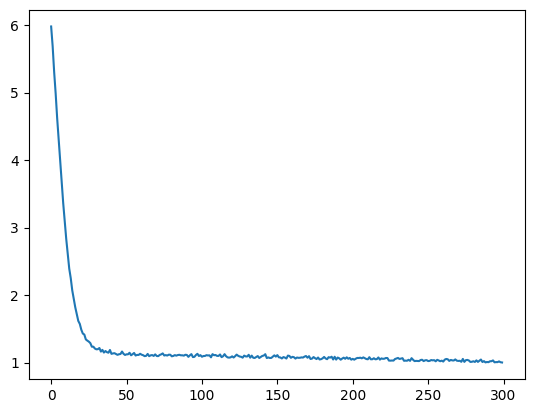

node: left_ear
Epoch [10], Loss: 4.6182
Epoch [20], Loss: 1.8886
Epoch [30], Loss: 1.1100
Epoch [40], Loss: 0.8885
Epoch [50], Loss: 0.7789
Epoch [60], Loss: 0.7466
Epoch [70], Loss: 0.7596
Epoch [80], Loss: 0.7496
Epoch [90], Loss: 0.7134
Epoch [100], Loss: 0.7118
Epoch [110], Loss: 0.7084
Epoch [120], Loss: 0.7425
Epoch [130], Loss: 0.7426
Epoch [140], Loss: 0.7071
Epoch [150], Loss: 0.7396
Epoch [160], Loss: 0.7747
Epoch [170], Loss: 0.7078
Epoch [180], Loss: 0.7059
Epoch [190], Loss: 0.7416
Epoch [200], Loss: 0.7066
Epoch [210], Loss: 0.7422
Epoch [220], Loss: 0.7746
Epoch [230], Loss: 0.7406
Epoch [240], Loss: 0.7064
Epoch [250], Loss: 0.7420
Epoch [260], Loss: 0.7400
Epoch [270], Loss: 0.7064
Epoch [280], Loss: 0.7755
Epoch [290], Loss: 0.7390
Epoch [300], Loss: 0.7411


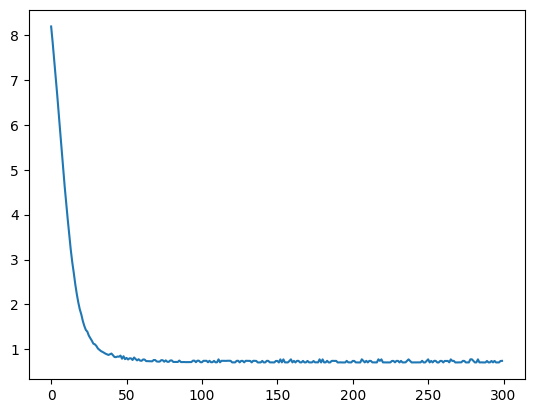

=== trust ===
node: nose
Epoch [10], Loss: 0.8380
Epoch [20], Loss: 0.2272
Epoch [30], Loss: 0.2246
Epoch [40], Loss: 0.2149
Epoch [50], Loss: 0.2162
Epoch [60], Loss: 0.2137
Epoch [70], Loss: 0.2158
Epoch [80], Loss: 0.2127
Epoch [90], Loss: 0.2129
Epoch [100], Loss: 0.2103
Epoch [110], Loss: 0.2092
Epoch [120], Loss: 0.2090
Epoch [130], Loss: 0.2145
Epoch [140], Loss: 0.2082
Epoch [150], Loss: 0.2084
Epoch [160], Loss: 0.2125
Epoch [170], Loss: 0.2063
Epoch [180], Loss: 0.2064
Epoch [190], Loss: 0.2052
Epoch [200], Loss: 0.2053
Epoch [210], Loss: 0.2070
Epoch [220], Loss: 0.2063
Epoch [230], Loss: 0.2061
Epoch [240], Loss: 0.2057
Epoch [250], Loss: 0.2044
Epoch [260], Loss: 0.2064
Epoch [270], Loss: 0.2110
Epoch [280], Loss: 0.2057
Epoch [290], Loss: 0.2072
Epoch [300], Loss: 0.2098


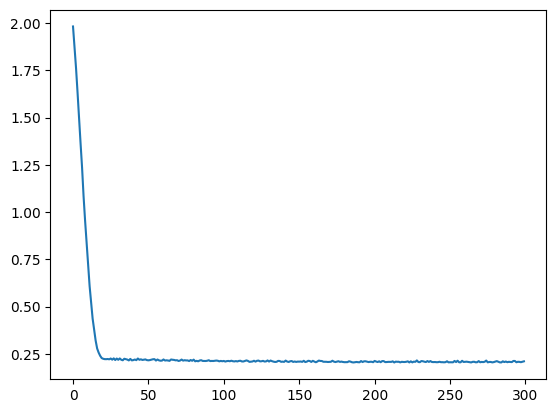

node: right_shoulder
Epoch [10], Loss: 4.0855
Epoch [20], Loss: 1.5461
Epoch [30], Loss: 0.7263
Epoch [40], Loss: 0.4223
Epoch [50], Loss: 0.2821
Epoch [60], Loss: 0.2026
Epoch [70], Loss: 0.1558
Epoch [80], Loss: 0.1228
Epoch [90], Loss: 0.0995
Epoch [100], Loss: 0.0835
Epoch [110], Loss: 0.0713
Epoch [120], Loss: 0.0612
Epoch [130], Loss: 0.0537
Epoch [140], Loss: 0.0472
Epoch [150], Loss: 0.0416
Epoch [160], Loss: 0.0376
Epoch [170], Loss: 0.0337
Epoch [180], Loss: 0.0306
Epoch [190], Loss: 0.0279
Epoch [200], Loss: 0.0256
Epoch [210], Loss: 0.0236
Epoch [220], Loss: 0.0218
Epoch [230], Loss: 0.0201
Epoch [240], Loss: 0.0189
Epoch [250], Loss: 0.0176
Epoch [260], Loss: 0.0163
Epoch [270], Loss: 0.0153
Epoch [280], Loss: 0.0145
Epoch [290], Loss: 0.0137
Epoch [300], Loss: 0.0129


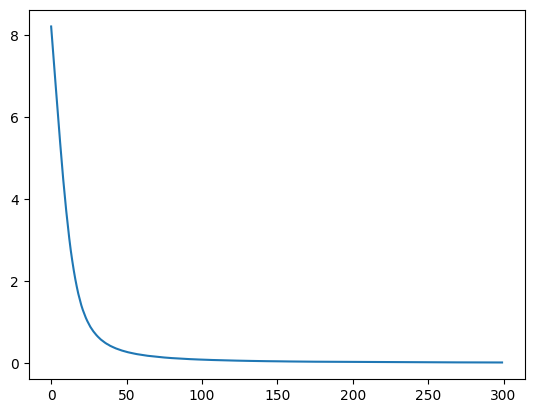

node: left_shoulder
Epoch [10], Loss: 2.3622
Epoch [20], Loss: 0.8819
Epoch [30], Loss: 0.4433
Epoch [40], Loss: 0.2717
Epoch [50], Loss: 0.1868
Epoch [60], Loss: 0.1377
Epoch [70], Loss: 0.1066
Epoch [80], Loss: 0.0855
Epoch [90], Loss: 0.0701
Epoch [100], Loss: 0.0590
Epoch [110], Loss: 0.0503
Epoch [120], Loss: 0.0436
Epoch [130], Loss: 0.0383
Epoch [140], Loss: 0.0338
Epoch [150], Loss: 0.0302
Epoch [160], Loss: 0.0273
Epoch [170], Loss: 0.0247
Epoch [180], Loss: 0.0224
Epoch [190], Loss: 0.0204
Epoch [200], Loss: 0.0188
Epoch [210], Loss: 0.0174
Epoch [220], Loss: 0.0161
Epoch [230], Loss: 0.0150
Epoch [240], Loss: 0.0140
Epoch [250], Loss: 0.0131
Epoch [260], Loss: 0.0123
Epoch [270], Loss: 0.0116
Epoch [280], Loss: 0.0109
Epoch [290], Loss: 0.0104
Epoch [300], Loss: 0.0098


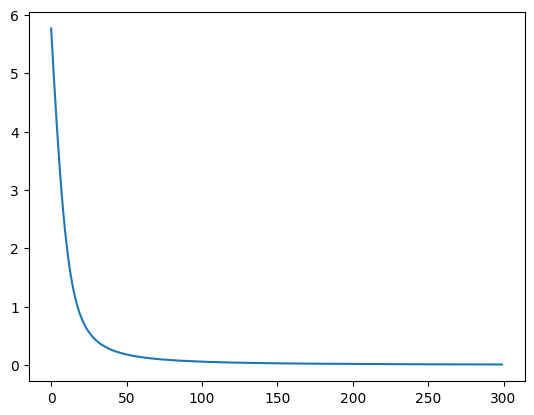

node: right_thigh
Epoch [10], Loss: 1.1900
Epoch [20], Loss: 0.1204
Epoch [30], Loss: 0.0291
Epoch [40], Loss: 0.0284
Epoch [50], Loss: 0.0282
Epoch [60], Loss: 0.0283
Epoch [70], Loss: 0.0284
Epoch [80], Loss: 0.0282
Epoch [90], Loss: 0.0282
Epoch [100], Loss: 0.0284
Epoch [110], Loss: 0.0308
Epoch [120], Loss: 0.0308
Epoch [130], Loss: 0.0283
Epoch [140], Loss: 0.0282
Epoch [150], Loss: 0.0284
Epoch [160], Loss: 0.0284
Epoch [170], Loss: 0.0282
Epoch [180], Loss: 0.0282
Epoch [190], Loss: 0.0282
Epoch [200], Loss: 0.0307
Epoch [210], Loss: 0.0283
Epoch [220], Loss: 0.0284
Epoch [230], Loss: 0.0284
Epoch [240], Loss: 0.0283
Epoch [250], Loss: 0.0284
Epoch [260], Loss: 0.0283
Epoch [270], Loss: 0.0284
Epoch [280], Loss: 0.0284
Epoch [290], Loss: 0.0284
Epoch [300], Loss: 0.0284


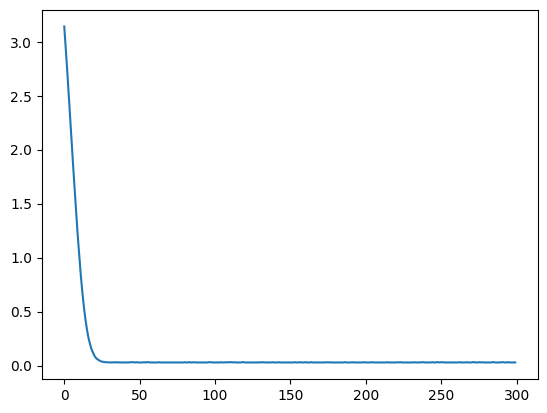

node: left_thigh
Epoch [10], Loss: 0.0325
Epoch [20], Loss: 0.0345
Epoch [30], Loss: 0.0318
Epoch [40], Loss: 0.0315
Epoch [50], Loss: 0.0322
Epoch [60], Loss: 0.0316
Epoch [70], Loss: 0.0316
Epoch [80], Loss: 0.0345
Epoch [90], Loss: 0.0315
Epoch [100], Loss: 0.0344
Epoch [110], Loss: 0.0318
Epoch [120], Loss: 0.0318
Epoch [130], Loss: 0.0343
Epoch [140], Loss: 0.0315
Epoch [150], Loss: 0.0317
Epoch [160], Loss: 0.0346
Epoch [170], Loss: 0.0322
Epoch [180], Loss: 0.0316
Epoch [190], Loss: 0.0315
Epoch [200], Loss: 0.0322
Epoch [210], Loss: 0.0316
Epoch [220], Loss: 0.0344
Epoch [230], Loss: 0.0315
Epoch [240], Loss: 0.0316
Epoch [250], Loss: 0.0316
Epoch [260], Loss: 0.0318
Epoch [270], Loss: 0.0316
Epoch [280], Loss: 0.0347
Epoch [290], Loss: 0.0318
Epoch [300], Loss: 0.0317


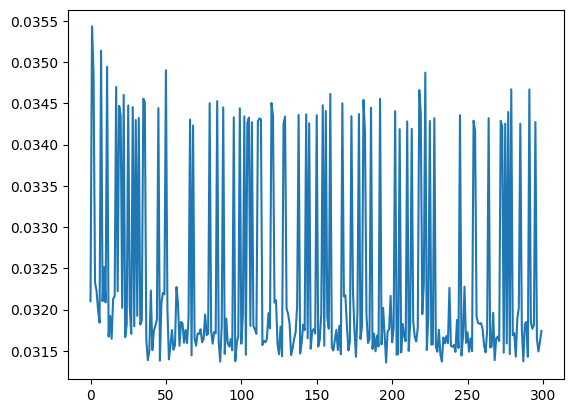

node: right_elbow
Epoch [10], Loss: 0.2398
Epoch [20], Loss: 0.2305
Epoch [30], Loss: 0.2199
Epoch [40], Loss: 0.2121
Epoch [50], Loss: 0.2026
Epoch [60], Loss: 0.1968
Epoch [70], Loss: 0.1934
Epoch [80], Loss: 0.1964
Epoch [90], Loss: 0.1872
Epoch [100], Loss: 0.1893
Epoch [110], Loss: 0.1864
Epoch [120], Loss: 0.1858
Epoch [130], Loss: 0.1819
Epoch [140], Loss: 0.1799
Epoch [150], Loss: 0.1808
Epoch [160], Loss: 0.1845
Epoch [170], Loss: 0.1801
Epoch [180], Loss: 0.1781
Epoch [190], Loss: 0.1819
Epoch [200], Loss: 0.1782
Epoch [210], Loss: 0.1827
Epoch [220], Loss: 0.1792
Epoch [230], Loss: 0.1795
Epoch [240], Loss: 0.1784
Epoch [250], Loss: 0.1808
Epoch [260], Loss: 0.1813
Epoch [270], Loss: 0.1794
Epoch [280], Loss: 0.1803
Epoch [290], Loss: 0.1827
Epoch [300], Loss: 0.1808


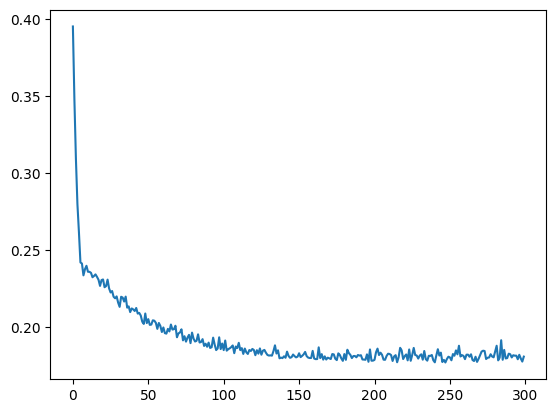

node: left_elbow
Epoch [10], Loss: 0.1327
Epoch [20], Loss: 0.1287
Epoch [30], Loss: 0.1281
Epoch [40], Loss: 0.1247
Epoch [50], Loss: 0.1234
Epoch [60], Loss: 0.1231
Epoch [70], Loss: 0.1219
Epoch [80], Loss: 0.1241
Epoch [90], Loss: 0.1214
Epoch [100], Loss: 0.1243
Epoch [110], Loss: 0.1209
Epoch [120], Loss: 0.1213
Epoch [130], Loss: 0.1259
Epoch [140], Loss: 0.1208
Epoch [150], Loss: 0.1219
Epoch [160], Loss: 0.1201
Epoch [170], Loss: 0.1234
Epoch [180], Loss: 0.1209
Epoch [190], Loss: 0.1218
Epoch [200], Loss: 0.1243
Epoch [210], Loss: 0.1217
Epoch [220], Loss: 0.1235
Epoch [230], Loss: 0.1214
Epoch [240], Loss: 0.1246
Epoch [250], Loss: 0.1208
Epoch [260], Loss: 0.1237
Epoch [270], Loss: 0.1214
Epoch [280], Loss: 0.1275
Epoch [290], Loss: 0.1208
Epoch [300], Loss: 0.1250


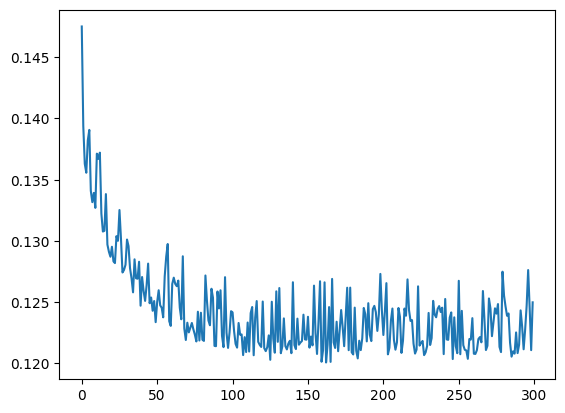

node: right_hand
Epoch [10], Loss: 0.7540
Epoch [20], Loss: 0.6767
Epoch [30], Loss: 0.6724
Epoch [40], Loss: 0.6722
Epoch [50], Loss: 0.6730
Epoch [60], Loss: 0.6712
Epoch [70], Loss: 0.6684
Epoch [80], Loss: 0.6745
Epoch [90], Loss: 0.6570
Epoch [100], Loss: 0.6645
Epoch [110], Loss: 0.6629
Epoch [120], Loss: 0.6588
Epoch [130], Loss: 0.6514
Epoch [140], Loss: 0.6612
Epoch [150], Loss: 0.6569
Epoch [160], Loss: 0.6599
Epoch [170], Loss: 0.6611
Epoch [180], Loss: 0.6504
Epoch [190], Loss: 0.6622
Epoch [200], Loss: 0.6555
Epoch [210], Loss: 0.6597
Epoch [220], Loss: 0.6533
Epoch [230], Loss: 0.6794
Epoch [240], Loss: 0.6475
Epoch [250], Loss: 0.6481
Epoch [260], Loss: 0.6575
Epoch [270], Loss: 0.6550
Epoch [280], Loss: 0.6526
Epoch [290], Loss: 0.6490
Epoch [300], Loss: 0.6723


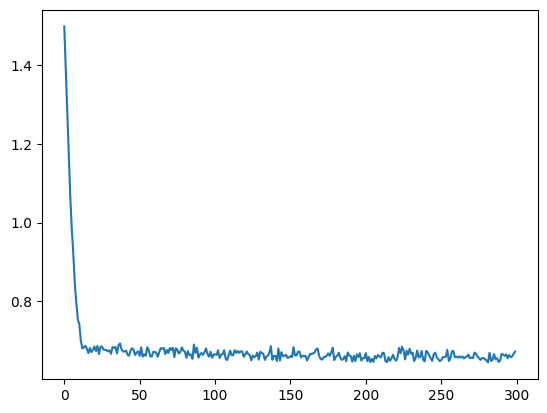

node: left_hand
Epoch [10], Loss: 0.9980
Epoch [20], Loss: 1.0032
Epoch [30], Loss: 1.0040
Epoch [40], Loss: 1.0046
Epoch [50], Loss: 0.9991
Epoch [60], Loss: 0.9992
Epoch [70], Loss: 1.0128
Epoch [80], Loss: 0.9836
Epoch [90], Loss: 0.9795
Epoch [100], Loss: 0.9827
Epoch [110], Loss: 0.9988
Epoch [120], Loss: 0.9782
Epoch [130], Loss: 0.9878
Epoch [140], Loss: 0.9961
Epoch [150], Loss: 0.9906
Epoch [160], Loss: 0.9907
Epoch [170], Loss: 0.9643
Epoch [180], Loss: 0.9929
Epoch [190], Loss: 0.9842
Epoch [200], Loss: 0.9962
Epoch [210], Loss: 0.9794
Epoch [220], Loss: 0.9665
Epoch [230], Loss: 0.9836
Epoch [240], Loss: 0.9819
Epoch [250], Loss: 0.9884
Epoch [260], Loss: 0.9812
Epoch [270], Loss: 0.9658
Epoch [280], Loss: 0.9800
Epoch [290], Loss: 0.9673
Epoch [300], Loss: 0.9584


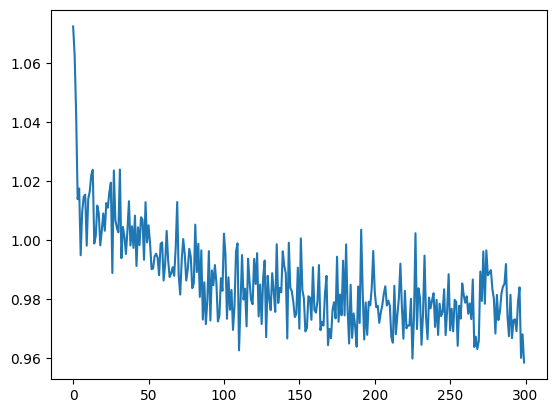

node: right_knee
Epoch [10], Loss: 0.6419
Epoch [20], Loss: 0.0603
Epoch [30], Loss: 0.0524
Epoch [40], Loss: 0.0514
Epoch [50], Loss: 0.0537
Epoch [60], Loss: 0.0530
Epoch [70], Loss: 0.0508
Epoch [80], Loss: 0.0501
Epoch [90], Loss: 0.0498
Epoch [100], Loss: 0.0501
Epoch [110], Loss: 0.0499
Epoch [120], Loss: 0.0520
Epoch [130], Loss: 0.0497
Epoch [140], Loss: 0.0526
Epoch [150], Loss: 0.0491
Epoch [160], Loss: 0.0495
Epoch [170], Loss: 0.0496
Epoch [180], Loss: 0.0490
Epoch [190], Loss: 0.0489
Epoch [200], Loss: 0.0495
Epoch [210], Loss: 0.0491
Epoch [220], Loss: 0.0493
Epoch [230], Loss: 0.0496
Epoch [240], Loss: 0.0486
Epoch [250], Loss: 0.0492
Epoch [260], Loss: 0.0495
Epoch [270], Loss: 0.0487
Epoch [280], Loss: 0.0497
Epoch [290], Loss: 0.0494
Epoch [300], Loss: 0.0493


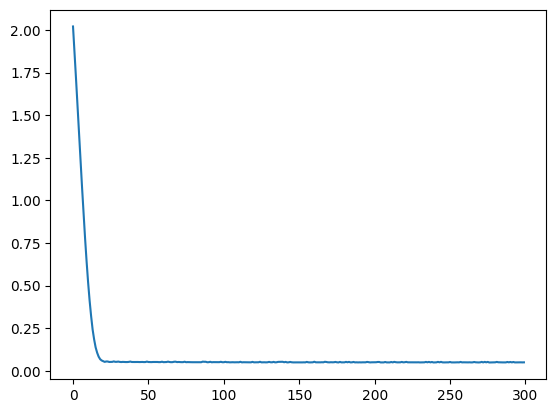

node: left_knee
Epoch [10], Loss: 0.0352
Epoch [20], Loss: 0.0342
Epoch [30], Loss: 0.0343
Epoch [40], Loss: 0.0348
Epoch [50], Loss: 0.0343
Epoch [60], Loss: 0.0339
Epoch [70], Loss: 0.0338
Epoch [80], Loss: 0.0342
Epoch [90], Loss: 0.0334
Epoch [100], Loss: 0.0346
Epoch [110], Loss: 0.0334
Epoch [120], Loss: 0.0336
Epoch [130], Loss: 0.0330
Epoch [140], Loss: 0.0347
Epoch [150], Loss: 0.0338
Epoch [160], Loss: 0.0339
Epoch [170], Loss: 0.0337
Epoch [180], Loss: 0.0347
Epoch [190], Loss: 0.0332
Epoch [200], Loss: 0.0335
Epoch [210], Loss: 0.0345
Epoch [220], Loss: 0.0330
Epoch [230], Loss: 0.0335
Epoch [240], Loss: 0.0334
Epoch [250], Loss: 0.0346
Epoch [260], Loss: 0.0344
Epoch [270], Loss: 0.0342
Epoch [280], Loss: 0.0339
Epoch [290], Loss: 0.0336
Epoch [300], Loss: 0.0338


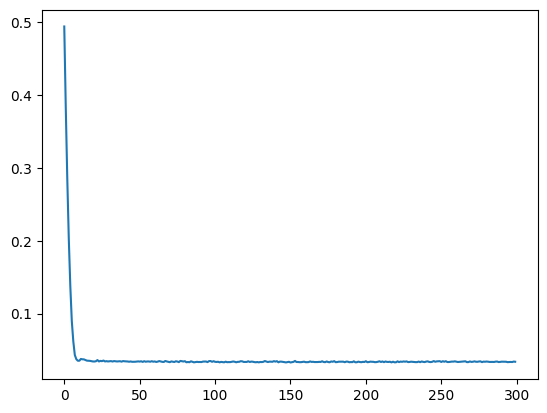

node: right_ankle
Epoch [10], Loss: 0.6500
Epoch [20], Loss: 0.1782
Epoch [30], Loss: 0.1628
Epoch [40], Loss: 0.1655
Epoch [50], Loss: 0.1554
Epoch [60], Loss: 0.1521
Epoch [70], Loss: 0.1521
Epoch [80], Loss: 0.1532
Epoch [90], Loss: 0.1423
Epoch [100], Loss: 0.1400
Epoch [110], Loss: 0.1379
Epoch [120], Loss: 0.1417
Epoch [130], Loss: 0.1374
Epoch [140], Loss: 0.1329
Epoch [150], Loss: 0.1355
Epoch [160], Loss: 0.1306
Epoch [170], Loss: 0.1332
Epoch [180], Loss: 0.1343
Epoch [190], Loss: 0.1334
Epoch [200], Loss: 0.1336
Epoch [210], Loss: 0.1292
Epoch [220], Loss: 0.1307
Epoch [230], Loss: 0.1284
Epoch [240], Loss: 0.1304
Epoch [250], Loss: 0.1321
Epoch [260], Loss: 0.1297
Epoch [270], Loss: 0.1275
Epoch [280], Loss: 0.1300
Epoch [290], Loss: 0.1273
Epoch [300], Loss: 0.1269


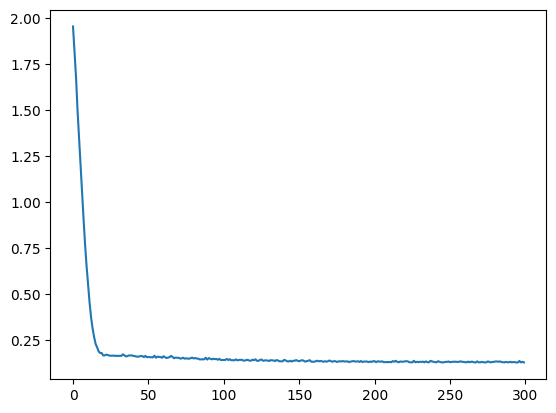

node: left_ankle
Epoch [10], Loss: 0.4534
Epoch [20], Loss: 0.1076
Epoch [30], Loss: 0.1010
Epoch [40], Loss: 0.1003
Epoch [50], Loss: 0.1004
Epoch [60], Loss: 0.1034
Epoch [70], Loss: 0.0999
Epoch [80], Loss: 0.0987
Epoch [90], Loss: 0.1020
Epoch [100], Loss: 0.0986
Epoch [110], Loss: 0.0976
Epoch [120], Loss: 0.0972
Epoch [130], Loss: 0.0964
Epoch [140], Loss: 0.0965
Epoch [150], Loss: 0.1001
Epoch [160], Loss: 0.0963
Epoch [170], Loss: 0.0964
Epoch [180], Loss: 0.0996
Epoch [190], Loss: 0.0963
Epoch [200], Loss: 0.0969
Epoch [210], Loss: 0.0955
Epoch [220], Loss: 0.0963
Epoch [230], Loss: 0.0993
Epoch [240], Loss: 0.0961
Epoch [250], Loss: 0.0958
Epoch [260], Loss: 0.0991
Epoch [270], Loss: 0.0961
Epoch [280], Loss: 0.0965
Epoch [290], Loss: 0.0961
Epoch [300], Loss: 0.0962


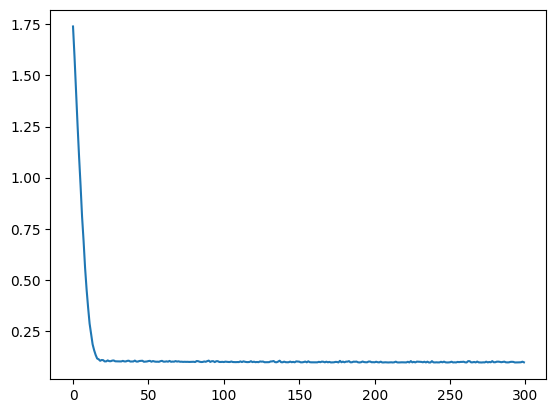

node: right_eye
Epoch [10], Loss: 0.6668
Epoch [20], Loss: 0.1774
Epoch [30], Loss: 0.1009
Epoch [40], Loss: 0.0828
Epoch [50], Loss: 0.0784
Epoch [60], Loss: 0.0789
Epoch [70], Loss: 0.0770
Epoch [80], Loss: 0.0782
Epoch [90], Loss: 0.0757
Epoch [100], Loss: 0.0752
Epoch [110], Loss: 0.0754
Epoch [120], Loss: 0.0773
Epoch [130], Loss: 0.0743
Epoch [140], Loss: 0.0766
Epoch [150], Loss: 0.0769
Epoch [160], Loss: 0.0736
Epoch [170], Loss: 0.0735
Epoch [180], Loss: 0.0728
Epoch [190], Loss: 0.0731
Epoch [200], Loss: 0.0725
Epoch [210], Loss: 0.0745
Epoch [220], Loss: 0.0717
Epoch [230], Loss: 0.0711
Epoch [240], Loss: 0.0720
Epoch [250], Loss: 0.0711
Epoch [260], Loss: 0.0712
Epoch [270], Loss: 0.0711
Epoch [280], Loss: 0.0733
Epoch [290], Loss: 0.0729
Epoch [300], Loss: 0.0727


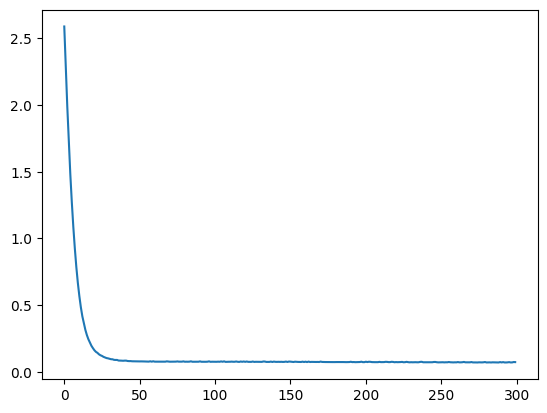

node: left_eye
Epoch [10], Loss: 0.3553
Epoch [20], Loss: 0.1213
Epoch [30], Loss: 0.0987
Epoch [40], Loss: 0.0937
Epoch [50], Loss: 0.0928
Epoch [60], Loss: 0.0914
Epoch [70], Loss: 0.0905
Epoch [80], Loss: 0.0901
Epoch [90], Loss: 0.0897
Epoch [100], Loss: 0.0883
Epoch [110], Loss: 0.0897
Epoch [120], Loss: 0.0898
Epoch [130], Loss: 0.0864
Epoch [140], Loss: 0.0851
Epoch [150], Loss: 0.0851
Epoch [160], Loss: 0.0831
Epoch [170], Loss: 0.0820
Epoch [180], Loss: 0.0825
Epoch [190], Loss: 0.0799
Epoch [200], Loss: 0.0812
Epoch [210], Loss: 0.0816
Epoch [220], Loss: 0.0800
Epoch [230], Loss: 0.0792
Epoch [240], Loss: 0.0792
Epoch [250], Loss: 0.0767
Epoch [260], Loss: 0.0767
Epoch [270], Loss: 0.0776
Epoch [280], Loss: 0.0760
Epoch [290], Loss: 0.0741
Epoch [300], Loss: 0.0755


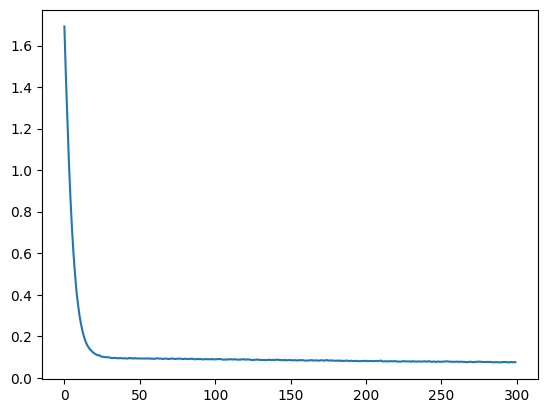

node: right_ear
Epoch [10], Loss: 1.3029
Epoch [20], Loss: 1.0748
Epoch [30], Loss: 1.0291
Epoch [40], Loss: 1.0555
Epoch [50], Loss: 1.0256
Epoch [60], Loss: 1.0196
Epoch [70], Loss: 1.0259
Epoch [80], Loss: 1.0036
Epoch [90], Loss: 1.0009
Epoch [100], Loss: 0.9981
Epoch [110], Loss: 1.0464
Epoch [120], Loss: 1.0410
Epoch [130], Loss: 1.0135
Epoch [140], Loss: 0.9986
Epoch [150], Loss: 1.0246
Epoch [160], Loss: 1.0057
Epoch [170], Loss: 1.0175
Epoch [180], Loss: 1.0087
Epoch [190], Loss: 0.9835
Epoch [200], Loss: 0.9819
Epoch [210], Loss: 0.9985
Epoch [220], Loss: 0.9960
Epoch [230], Loss: 0.9807
Epoch [240], Loss: 0.9819
Epoch [250], Loss: 0.9964
Epoch [260], Loss: 0.9844
Epoch [270], Loss: 0.9819
Epoch [280], Loss: 0.9771
Epoch [290], Loss: 0.9908
Epoch [300], Loss: 0.9829


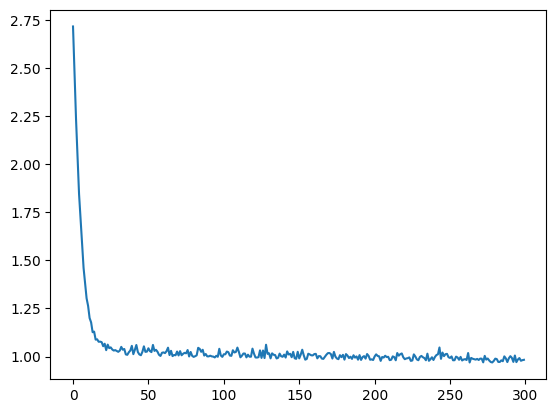

node: left_ear
Epoch [10], Loss: 5.6561
Epoch [20], Loss: 2.4558
Epoch [30], Loss: 1.3155
Epoch [40], Loss: 1.0052
Epoch [50], Loss: 0.9208
Epoch [60], Loss: 0.8696
Epoch [70], Loss: 0.8780
Epoch [80], Loss: 0.7943
Epoch [90], Loss: 0.8208
Epoch [100], Loss: 0.7791
Epoch [110], Loss: 0.7760
Epoch [120], Loss: 0.7717
Epoch [130], Loss: 0.8085
Epoch [140], Loss: 0.8049
Epoch [150], Loss: 0.7671
Epoch [160], Loss: 0.8014
Epoch [170], Loss: 0.7650
Epoch [180], Loss: 0.7638
Epoch [190], Loss: 0.7631
Epoch [200], Loss: 0.7980
Epoch [210], Loss: 0.7976
Epoch [220], Loss: 0.7955
Epoch [230], Loss: 0.7590
Epoch [240], Loss: 0.7574
Epoch [250], Loss: 0.7924
Epoch [260], Loss: 0.7569
Epoch [270], Loss: 0.7899
Epoch [280], Loss: 0.7542
Epoch [290], Loss: 0.7534
Epoch [300], Loss: 0.7863


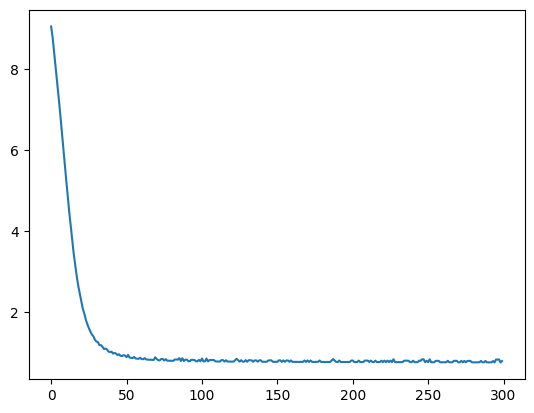

-=-=- sine -=-=-
=== joy ===
node: nose
Epoch [10], Loss: 0.3186
Epoch [20], Loss: 0.1247
Epoch [30], Loss: 0.0721
Epoch [40], Loss: 0.0484
Epoch [50], Loss: 0.0366
Epoch [60], Loss: 0.0291
Epoch [70], Loss: 0.0245
Epoch [80], Loss: 0.0214
Epoch [90], Loss: 0.0192
Epoch [100], Loss: 0.0176
Epoch [110], Loss: 0.0166
Epoch [120], Loss: 0.0155
Epoch [130], Loss: 0.0147
Epoch [140], Loss: 0.0142
Epoch [150], Loss: 0.0139
Epoch [160], Loss: 0.0134
Epoch [170], Loss: 0.0130
Epoch [180], Loss: 0.0129
Epoch [190], Loss: 0.0126
Epoch [200], Loss: 0.0129
Epoch [210], Loss: 0.0127
Epoch [220], Loss: 0.0122
Epoch [230], Loss: 0.0124
Epoch [240], Loss: 0.0120
Epoch [250], Loss: 0.0120
Epoch [260], Loss: 0.0121
Epoch [270], Loss: 0.0120
Epoch [280], Loss: 0.0122
Epoch [290], Loss: 0.0121
Epoch [300], Loss: 0.0118


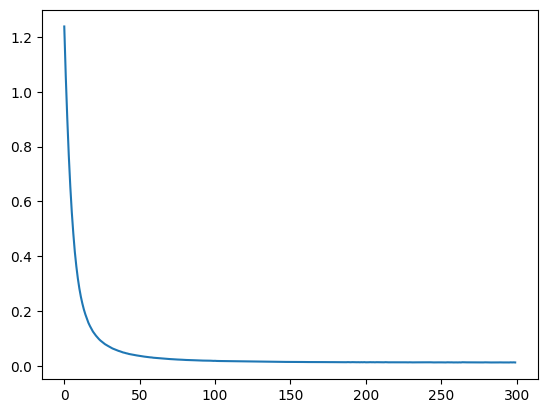

node: right_shoulder
Epoch [10], Loss: 0.0542
Epoch [20], Loss: 0.0347
Epoch [30], Loss: 0.0312
Epoch [40], Loss: 0.0307
Epoch [50], Loss: 0.0305
Epoch [60], Loss: 0.0301
Epoch [70], Loss: 0.0302
Epoch [80], Loss: 0.0300
Epoch [90], Loss: 0.0301
Epoch [100], Loss: 0.0297
Epoch [110], Loss: 0.0298
Epoch [120], Loss: 0.0298
Epoch [130], Loss: 0.0298
Epoch [140], Loss: 0.0322
Epoch [150], Loss: 0.0302
Epoch [160], Loss: 0.0322
Epoch [170], Loss: 0.0299
Epoch [180], Loss: 0.0323
Epoch [190], Loss: 0.0322
Epoch [200], Loss: 0.0325
Epoch [210], Loss: 0.0299
Epoch [220], Loss: 0.0323
Epoch [230], Loss: 0.0299
Epoch [240], Loss: 0.0325
Epoch [250], Loss: 0.0299
Epoch [260], Loss: 0.0297
Epoch [270], Loss: 0.0323
Epoch [280], Loss: 0.0299
Epoch [290], Loss: 0.0298
Epoch [300], Loss: 0.0302


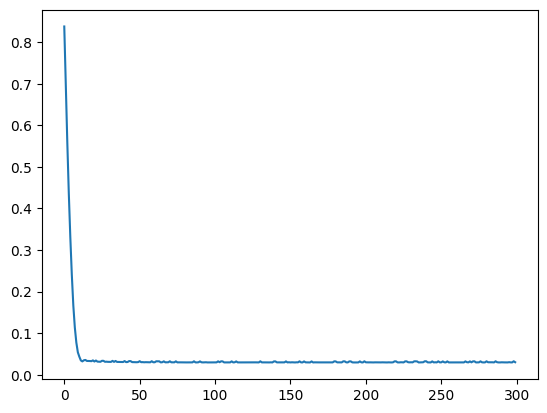

node: left_shoulder
Epoch [10], Loss: 0.3823
Epoch [20], Loss: 0.0459
Epoch [30], Loss: 0.0435
Epoch [40], Loss: 0.0444
Epoch [50], Loss: 0.0402
Epoch [60], Loss: 0.0394
Epoch [70], Loss: 0.0380
Epoch [80], Loss: 0.0402
Epoch [90], Loss: 0.0394
Epoch [100], Loss: 0.0364
Epoch [110], Loss: 0.0391
Epoch [120], Loss: 0.0388
Epoch [130], Loss: 0.0362
Epoch [140], Loss: 0.0361
Epoch [150], Loss: 0.0362
Epoch [160], Loss: 0.0391
Epoch [170], Loss: 0.0361
Epoch [180], Loss: 0.0360
Epoch [190], Loss: 0.0364
Epoch [200], Loss: 0.0362
Epoch [210], Loss: 0.0389
Epoch [220], Loss: 0.0360
Epoch [230], Loss: 0.0389
Epoch [240], Loss: 0.0364
Epoch [250], Loss: 0.0366
Epoch [260], Loss: 0.0362
Epoch [270], Loss: 0.0362
Epoch [280], Loss: 0.0362
Epoch [290], Loss: 0.0364
Epoch [300], Loss: 0.0360


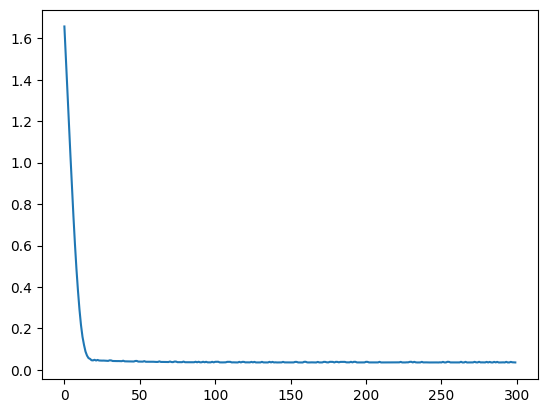

node: right_thigh
Epoch [10], Loss: 0.0721
Epoch [20], Loss: 0.0305
Epoch [30], Loss: 0.0197
Epoch [40], Loss: 0.0144
Epoch [50], Loss: 0.0118
Epoch [60], Loss: 0.0110
Epoch [70], Loss: 0.0094
Epoch [80], Loss: 0.0088
Epoch [90], Loss: 0.0084
Epoch [100], Loss: 0.0081
Epoch [110], Loss: 0.0079
Epoch [120], Loss: 0.0085
Epoch [130], Loss: 0.0084
Epoch [140], Loss: 0.0083
Epoch [150], Loss: 0.0082
Epoch [160], Loss: 0.0075
Epoch [170], Loss: 0.0074
Epoch [180], Loss: 0.0074
Epoch [190], Loss: 0.0074
Epoch [200], Loss: 0.0074
Epoch [210], Loss: 0.0081
Epoch [220], Loss: 0.0073
Epoch [230], Loss: 0.0073
Epoch [240], Loss: 0.0073
Epoch [250], Loss: 0.0073
Epoch [260], Loss: 0.0073
Epoch [270], Loss: 0.0073
Epoch [280], Loss: 0.0073
Epoch [290], Loss: 0.0073
Epoch [300], Loss: 0.0073


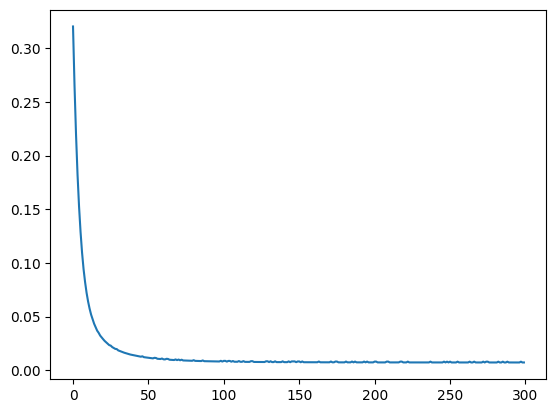

node: left_thigh
Epoch [10], Loss: 0.7570
Epoch [20], Loss: 0.3059
Epoch [30], Loss: 0.1681
Epoch [40], Loss: 0.1086
Epoch [50], Loss: 0.0751
Epoch [60], Loss: 0.0565
Epoch [70], Loss: 0.0432
Epoch [80], Loss: 0.0345
Epoch [90], Loss: 0.0285
Epoch [100], Loss: 0.0237
Epoch [110], Loss: 0.0201
Epoch [120], Loss: 0.0172
Epoch [130], Loss: 0.0148
Epoch [140], Loss: 0.0130
Epoch [150], Loss: 0.0116
Epoch [160], Loss: 0.0105
Epoch [170], Loss: 0.0093
Epoch [180], Loss: 0.0083
Epoch [190], Loss: 0.0074
Epoch [200], Loss: 0.0068
Epoch [210], Loss: 0.0062
Epoch [220], Loss: 0.0057
Epoch [230], Loss: 0.0052
Epoch [240], Loss: 0.0048
Epoch [250], Loss: 0.0045
Epoch [260], Loss: 0.0042
Epoch [270], Loss: 0.0039
Epoch [280], Loss: 0.0036
Epoch [290], Loss: 0.0034
Epoch [300], Loss: 0.0032


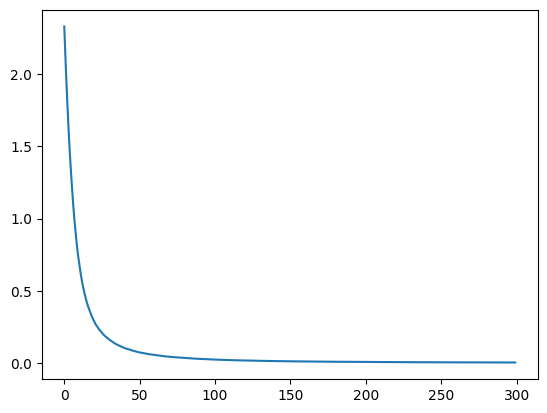

node: right_elbow
Epoch [10], Loss: 6.9040
Epoch [20], Loss: 3.4830
Epoch [30], Loss: 2.1503
Epoch [40], Loss: 1.8584
Epoch [50], Loss: 1.6590
Epoch [60], Loss: 1.5972
Epoch [70], Loss: 1.5620
Epoch [80], Loss: 1.5398
Epoch [90], Loss: 1.5007
Epoch [100], Loss: 1.4362
Epoch [110], Loss: 1.3932
Epoch [120], Loss: 1.3366
Epoch [130], Loss: 1.2832
Epoch [140], Loss: 1.2515
Epoch [150], Loss: 1.1950
Epoch [160], Loss: 1.1360
Epoch [170], Loss: 1.0726
Epoch [180], Loss: 1.0164
Epoch [190], Loss: 0.9760
Epoch [200], Loss: 0.9509
Epoch [210], Loss: 0.9044
Epoch [220], Loss: 0.8510
Epoch [230], Loss: 0.8451
Epoch [240], Loss: 0.7976
Epoch [250], Loss: 0.7647
Epoch [260], Loss: 0.7334
Epoch [270], Loss: 0.7287
Epoch [280], Loss: 0.6944
Epoch [290], Loss: 0.6785
Epoch [300], Loss: 0.6547


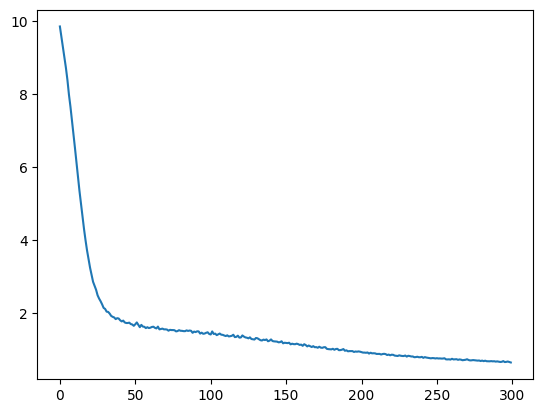

node: left_elbow
Epoch [10], Loss: 1.7096
Epoch [20], Loss: 1.5446
Epoch [30], Loss: 1.4649
Epoch [40], Loss: 1.3596
Epoch [50], Loss: 1.2922
Epoch [60], Loss: 1.2114
Epoch [70], Loss: 1.1209
Epoch [80], Loss: 1.0819
Epoch [90], Loss: 0.9993
Epoch [100], Loss: 0.9590
Epoch [110], Loss: 0.8857
Epoch [120], Loss: 0.8448
Epoch [130], Loss: 0.8141
Epoch [140], Loss: 0.7657
Epoch [150], Loss: 0.7378
Epoch [160], Loss: 0.7053
Epoch [170], Loss: 0.6961
Epoch [180], Loss: 0.6835
Epoch [190], Loss: 0.6483
Epoch [200], Loss: 0.6217
Epoch [210], Loss: 0.6180
Epoch [220], Loss: 0.5955
Epoch [230], Loss: 0.5885
Epoch [240], Loss: 0.5638
Epoch [250], Loss: 0.5739
Epoch [260], Loss: 0.5636
Epoch [270], Loss: 0.5471
Epoch [280], Loss: 0.5341
Epoch [290], Loss: 0.5341
Epoch [300], Loss: 0.5165


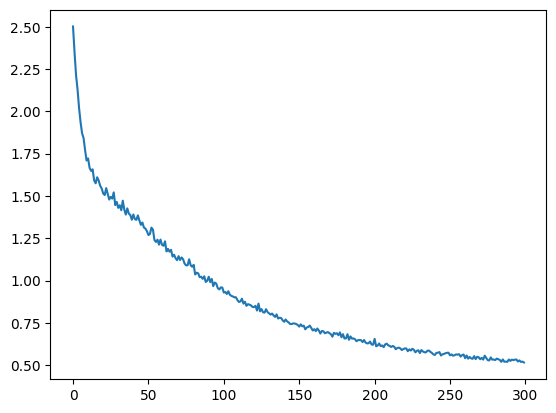

node: right_hand
Epoch [10], Loss: 2.4469
Epoch [20], Loss: 2.2621
Epoch [30], Loss: 2.1727
Epoch [40], Loss: 2.0396
Epoch [50], Loss: 1.9427
Epoch [60], Loss: 1.8858
Epoch [70], Loss: 1.7698
Epoch [80], Loss: 1.7250
Epoch [90], Loss: 1.6479
Epoch [100], Loss: 1.6162
Epoch [110], Loss: 1.5569
Epoch [120], Loss: 1.5665
Epoch [130], Loss: 1.5134
Epoch [140], Loss: 1.4861
Epoch [150], Loss: 1.4812
Epoch [160], Loss: 1.4535
Epoch [170], Loss: 1.4439
Epoch [180], Loss: 1.4398
Epoch [190], Loss: 1.4077
Epoch [200], Loss: 1.4368
Epoch [210], Loss: 1.3982
Epoch [220], Loss: 1.3828
Epoch [230], Loss: 1.4135
Epoch [240], Loss: 1.3821
Epoch [250], Loss: 1.4038
Epoch [260], Loss: 1.3567
Epoch [270], Loss: 1.3581
Epoch [280], Loss: 1.4305
Epoch [290], Loss: 1.3550
Epoch [300], Loss: 1.3488


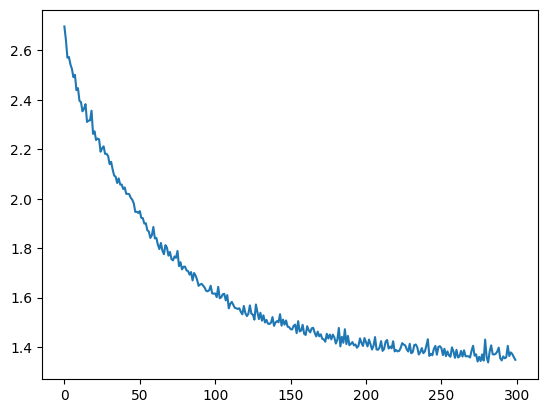

node: left_hand
Epoch [10], Loss: 2.8793
Epoch [20], Loss: 2.6688
Epoch [30], Loss: 2.4107
Epoch [40], Loss: 2.2683
Epoch [50], Loss: 2.0772
Epoch [60], Loss: 1.9283
Epoch [70], Loss: 1.7847
Epoch [80], Loss: 1.6914
Epoch [90], Loss: 1.5715
Epoch [100], Loss: 1.4948
Epoch [110], Loss: 1.4179
Epoch [120], Loss: 1.3383
Epoch [130], Loss: 1.3129
Epoch [140], Loss: 1.2540
Epoch [150], Loss: 1.2091
Epoch [160], Loss: 1.2002
Epoch [170], Loss: 1.1745
Epoch [180], Loss: 1.1600
Epoch [190], Loss: 1.1050
Epoch [200], Loss: 1.1005
Epoch [210], Loss: 1.0653
Epoch [220], Loss: 1.0686
Epoch [230], Loss: 1.0522
Epoch [240], Loss: 1.0530
Epoch [250], Loss: 1.0267
Epoch [260], Loss: 1.0175
Epoch [270], Loss: 1.0164
Epoch [280], Loss: 1.0180
Epoch [290], Loss: 1.0135
Epoch [300], Loss: 1.0296


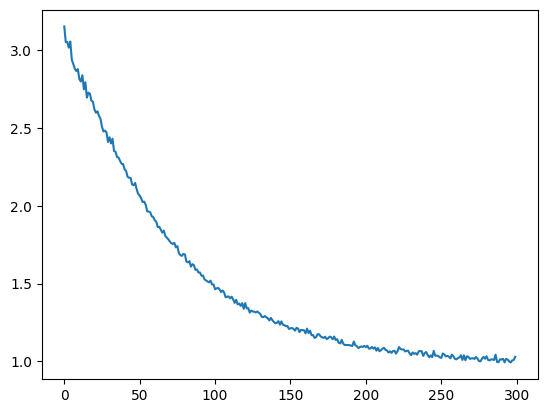

node: right_knee
Epoch [10], Loss: 0.2862
Epoch [20], Loss: 0.1201
Epoch [30], Loss: 0.0697
Epoch [40], Loss: 0.0468
Epoch [50], Loss: 0.0346
Epoch [60], Loss: 0.0264
Epoch [70], Loss: 0.0211
Epoch [80], Loss: 0.0174
Epoch [90], Loss: 0.0146
Epoch [100], Loss: 0.0126
Epoch [110], Loss: 0.0109
Epoch [120], Loss: 0.0096
Epoch [130], Loss: 0.0086
Epoch [140], Loss: 0.0077
Epoch [150], Loss: 0.0071
Epoch [160], Loss: 0.0064
Epoch [170], Loss: 0.0060
Epoch [180], Loss: 0.0055
Epoch [190], Loss: 0.0052
Epoch [200], Loss: 0.0048
Epoch [210], Loss: 0.0046
Epoch [220], Loss: 0.0043
Epoch [230], Loss: 0.0040
Epoch [240], Loss: 0.0039
Epoch [250], Loss: 0.0037
Epoch [260], Loss: 0.0036
Epoch [270], Loss: 0.0034
Epoch [280], Loss: 0.0032
Epoch [290], Loss: 0.0031
Epoch [300], Loss: 0.0030


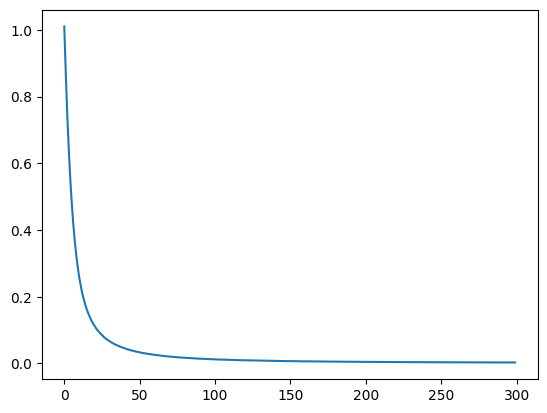

node: left_knee
Epoch [10], Loss: 0.4172
Epoch [20], Loss: 0.1726
Epoch [30], Loss: 0.0995
Epoch [40], Loss: 0.0660
Epoch [50], Loss: 0.0479
Epoch [60], Loss: 0.0363
Epoch [70], Loss: 0.0288
Epoch [80], Loss: 0.0236
Epoch [90], Loss: 0.0195
Epoch [100], Loss: 0.0166
Epoch [110], Loss: 0.0144
Epoch [120], Loss: 0.0124
Epoch [130], Loss: 0.0109
Epoch [140], Loss: 0.0098
Epoch [150], Loss: 0.0087
Epoch [160], Loss: 0.0079
Epoch [170], Loss: 0.0071
Epoch [180], Loss: 0.0065
Epoch [190], Loss: 0.0059
Epoch [200], Loss: 0.0054
Epoch [210], Loss: 0.0050
Epoch [220], Loss: 0.0046
Epoch [230], Loss: 0.0043
Epoch [240], Loss: 0.0040
Epoch [250], Loss: 0.0038
Epoch [260], Loss: 0.0035
Epoch [270], Loss: 0.0033
Epoch [280], Loss: 0.0031
Epoch [290], Loss: 0.0029
Epoch [300], Loss: 0.0028


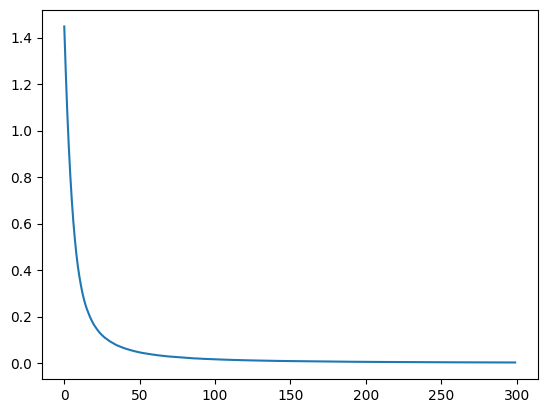

node: right_ankle
Epoch [10], Loss: 0.3736
Epoch [20], Loss: 0.1592
Epoch [30], Loss: 0.0935
Epoch [40], Loss: 0.0656
Epoch [50], Loss: 0.0492
Epoch [60], Loss: 0.0400
Epoch [70], Loss: 0.0334
Epoch [80], Loss: 0.0289
Epoch [90], Loss: 0.0259
Epoch [100], Loss: 0.0229
Epoch [110], Loss: 0.0210
Epoch [120], Loss: 0.0197
Epoch [130], Loss: 0.0185
Epoch [140], Loss: 0.0180
Epoch [150], Loss: 0.0170
Epoch [160], Loss: 0.0158
Epoch [170], Loss: 0.0154
Epoch [180], Loss: 0.0153
Epoch [190], Loss: 0.0147
Epoch [200], Loss: 0.0141
Epoch [210], Loss: 0.0137
Epoch [220], Loss: 0.0139
Epoch [230], Loss: 0.0132
Epoch [240], Loss: 0.0137
Epoch [250], Loss: 0.0127
Epoch [260], Loss: 0.0133
Epoch [270], Loss: 0.0124
Epoch [280], Loss: 0.0129
Epoch [290], Loss: 0.0122
Epoch [300], Loss: 0.0120


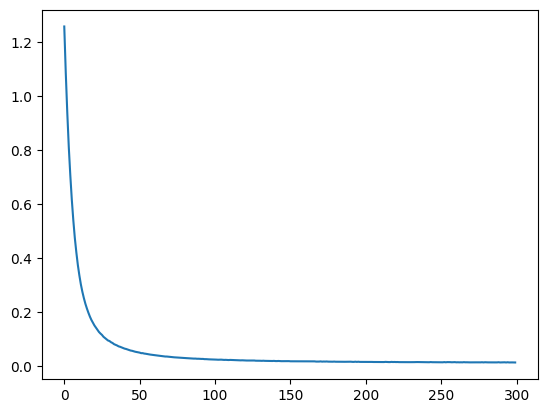

node: left_ankle
Epoch [10], Loss: 6.3502
Epoch [20], Loss: 2.6233
Epoch [30], Loss: 1.1661
Epoch [40], Loss: 0.6355
Epoch [50], Loss: 0.4072
Epoch [60], Loss: 0.2820
Epoch [70], Loss: 0.2118
Epoch [80], Loss: 0.1640
Epoch [90], Loss: 0.1322
Epoch [100], Loss: 0.1088
Epoch [110], Loss: 0.0908
Epoch [120], Loss: 0.0780
Epoch [130], Loss: 0.0678
Epoch [140], Loss: 0.0599
Epoch [150], Loss: 0.0527
Epoch [160], Loss: 0.0477
Epoch [170], Loss: 0.0431
Epoch [180], Loss: 0.0391
Epoch [190], Loss: 0.0355
Epoch [200], Loss: 0.0326
Epoch [210], Loss: 0.0306
Epoch [220], Loss: 0.0279
Epoch [230], Loss: 0.0261
Epoch [240], Loss: 0.0244
Epoch [250], Loss: 0.0228
Epoch [260], Loss: 0.0216
Epoch [270], Loss: 0.0203
Epoch [280], Loss: 0.0193
Epoch [290], Loss: 0.0183
Epoch [300], Loss: 0.0173


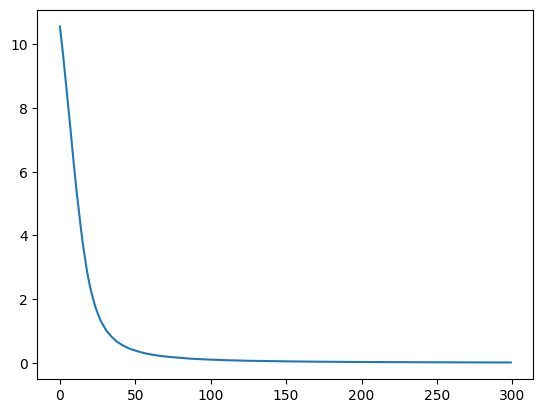

node: right_eye
Epoch [10], Loss: 0.0588
Epoch [20], Loss: 0.0571
Epoch [30], Loss: 0.0561
Epoch [40], Loss: 0.0555
Epoch [50], Loss: 0.0552
Epoch [60], Loss: 0.0556
Epoch [70], Loss: 0.0560
Epoch [80], Loss: 0.0556
Epoch [90], Loss: 0.0555
Epoch [100], Loss: 0.0556
Epoch [110], Loss: 0.0557
Epoch [120], Loss: 0.0556
Epoch [130], Loss: 0.0557
Epoch [140], Loss: 0.0549
Epoch [150], Loss: 0.0563
Epoch [160], Loss: 0.0557
Epoch [170], Loss: 0.0561
Epoch [180], Loss: 0.0557
Epoch [190], Loss: 0.0552
Epoch [200], Loss: 0.0557
Epoch [210], Loss: 0.0551
Epoch [220], Loss: 0.0559
Epoch [230], Loss: 0.0564
Epoch [240], Loss: 0.0554
Epoch [250], Loss: 0.0563
Epoch [260], Loss: 0.0555
Epoch [270], Loss: 0.0551
Epoch [280], Loss: 0.0555
Epoch [290], Loss: 0.0557
Epoch [300], Loss: 0.0556


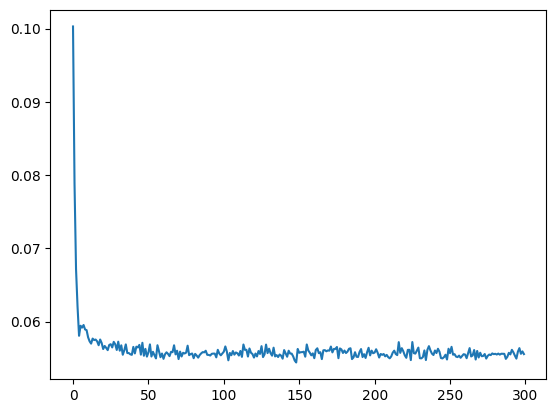

node: left_eye
Epoch [10], Loss: 0.1812
Epoch [20], Loss: 0.0944
Epoch [30], Loss: 0.0808
Epoch [40], Loss: 0.0783
Epoch [50], Loss: 0.0757
Epoch [60], Loss: 0.0761
Epoch [70], Loss: 0.0729
Epoch [80], Loss: 0.0704
Epoch [90], Loss: 0.0707
Epoch [100], Loss: 0.0694
Epoch [110], Loss: 0.0642
Epoch [120], Loss: 0.0634
Epoch [130], Loss: 0.0613
Epoch [140], Loss: 0.0623
Epoch [150], Loss: 0.0587
Epoch [160], Loss: 0.0597
Epoch [170], Loss: 0.0590
Epoch [180], Loss: 0.0554
Epoch [190], Loss: 0.0551
Epoch [200], Loss: 0.0544
Epoch [210], Loss: 0.0544
Epoch [220], Loss: 0.0539
Epoch [230], Loss: 0.0536
Epoch [240], Loss: 0.0535
Epoch [250], Loss: 0.0554
Epoch [260], Loss: 0.0535
Epoch [270], Loss: 0.0532
Epoch [280], Loss: 0.0551
Epoch [290], Loss: 0.0528
Epoch [300], Loss: 0.0537


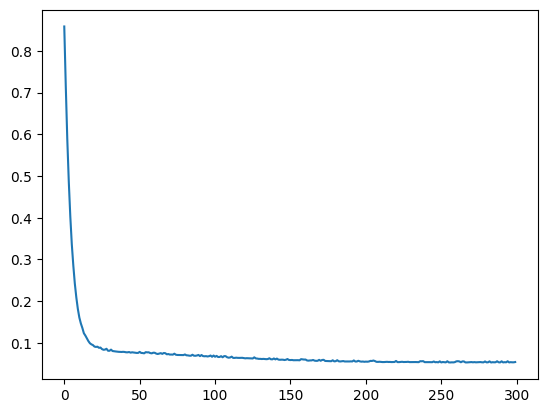

node: right_ear
Epoch [10], Loss: 3.6592
Epoch [20], Loss: 1.2706
Epoch [30], Loss: 0.7513
Epoch [40], Loss: 0.7062
Epoch [50], Loss: 0.6990
Epoch [60], Loss: 0.6959
Epoch [70], Loss: 0.7041
Epoch [80], Loss: 0.6887
Epoch [90], Loss: 0.6803
Epoch [100], Loss: 0.6746
Epoch [110], Loss: 0.6717
Epoch [120], Loss: 0.6866
Epoch [130], Loss: 0.6808
Epoch [140], Loss: 0.6776
Epoch [150], Loss: 0.6757
Epoch [160], Loss: 0.6663
Epoch [170], Loss: 0.6575
Epoch [180], Loss: 0.6675
Epoch [190], Loss: 0.6551
Epoch [200], Loss: 0.6677
Epoch [210], Loss: 0.6521
Epoch [220], Loss: 0.6604
Epoch [230], Loss: 0.6690
Epoch [240], Loss: 0.6528
Epoch [250], Loss: 0.6508
Epoch [260], Loss: 0.6480
Epoch [270], Loss: 0.6596
Epoch [280], Loss: 0.6563
Epoch [290], Loss: 0.6559
Epoch [300], Loss: 0.6532


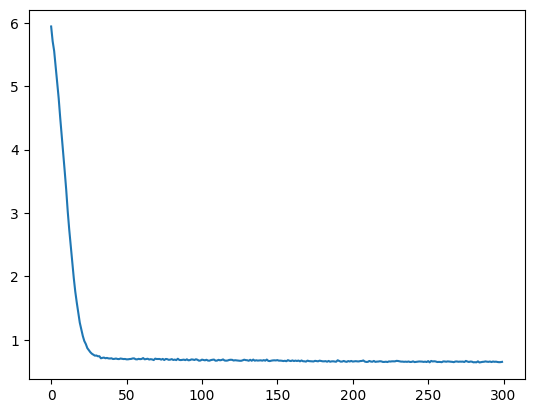

node: left_ear
Epoch [10], Loss: 0.6203
Epoch [20], Loss: 0.5590
Epoch [30], Loss: 0.5108
Epoch [40], Loss: 0.4811
Epoch [50], Loss: 0.4637
Epoch [60], Loss: 0.4476
Epoch [70], Loss: 0.4384
Epoch [80], Loss: 0.4327
Epoch [90], Loss: 0.4205
Epoch [100], Loss: 0.4189
Epoch [110], Loss: 0.4180
Epoch [120], Loss: 0.4138
Epoch [130], Loss: 0.4179
Epoch [140], Loss: 0.4188
Epoch [150], Loss: 0.4143
Epoch [160], Loss: 0.4129
Epoch [170], Loss: 0.4122
Epoch [180], Loss: 0.4114
Epoch [190], Loss: 0.4138
Epoch [200], Loss: 0.4105
Epoch [210], Loss: 0.4158
Epoch [220], Loss: 0.4137
Epoch [230], Loss: 0.4099
Epoch [240], Loss: 0.4128
Epoch [250], Loss: 0.4102
Epoch [260], Loss: 0.4091
Epoch [270], Loss: 0.4161
Epoch [280], Loss: 0.4168
Epoch [290], Loss: 0.4148
Epoch [300], Loss: 0.4145


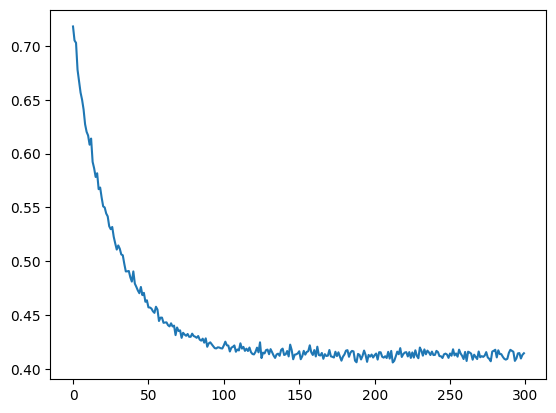

=== sadness ===
node: nose
Epoch [10], Loss: 2.8202
Epoch [20], Loss: 0.9577
Epoch [30], Loss: 0.4500
Epoch [40], Loss: 0.2675
Epoch [50], Loss: 0.1816
Epoch [60], Loss: 0.1318
Epoch [70], Loss: 0.1028
Epoch [80], Loss: 0.0826
Epoch [90], Loss: 0.0681
Epoch [100], Loss: 0.0582
Epoch [110], Loss: 0.0507
Epoch [120], Loss: 0.0445
Epoch [130], Loss: 0.0398
Epoch [140], Loss: 0.0360
Epoch [150], Loss: 0.0328
Epoch [160], Loss: 0.0302
Epoch [170], Loss: 0.0283
Epoch [180], Loss: 0.0265
Epoch [190], Loss: 0.0249
Epoch [200], Loss: 0.0238
Epoch [210], Loss: 0.0228
Epoch [220], Loss: 0.0216
Epoch [230], Loss: 0.0204
Epoch [240], Loss: 0.0198
Epoch [250], Loss: 0.0192
Epoch [260], Loss: 0.0186
Epoch [270], Loss: 0.0181
Epoch [280], Loss: 0.0175
Epoch [290], Loss: 0.0173
Epoch [300], Loss: 0.0170


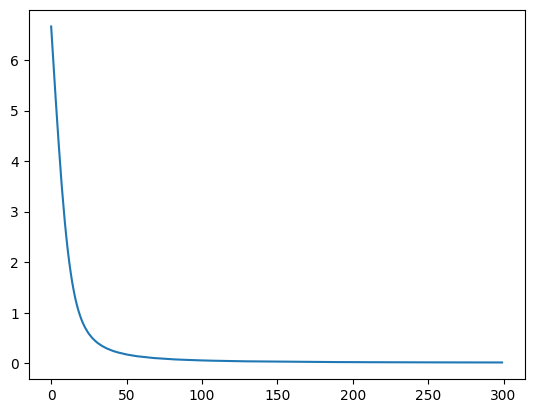

node: right_shoulder
Epoch [10], Loss: 0.0376
Epoch [20], Loss: 0.0367
Epoch [30], Loss: 0.0323
Epoch [40], Loss: 0.0309
Epoch [50], Loss: 0.0323
Epoch [60], Loss: 0.0299
Epoch [70], Loss: 0.0299
Epoch [80], Loss: 0.0292
Epoch [90], Loss: 0.0317
Epoch [100], Loss: 0.0292
Epoch [110], Loss: 0.0316
Epoch [120], Loss: 0.0295
Epoch [130], Loss: 0.0294
Epoch [140], Loss: 0.0316
Epoch [150], Loss: 0.0294
Epoch [160], Loss: 0.0293
Epoch [170], Loss: 0.0293
Epoch [180], Loss: 0.0293
Epoch [190], Loss: 0.0293
Epoch [200], Loss: 0.0294
Epoch [210], Loss: 0.0293
Epoch [220], Loss: 0.0320
Epoch [230], Loss: 0.0318
Epoch [240], Loss: 0.0294
Epoch [250], Loss: 0.0295
Epoch [260], Loss: 0.0295
Epoch [270], Loss: 0.0293
Epoch [280], Loss: 0.0296
Epoch [290], Loss: 0.0293
Epoch [300], Loss: 0.0292


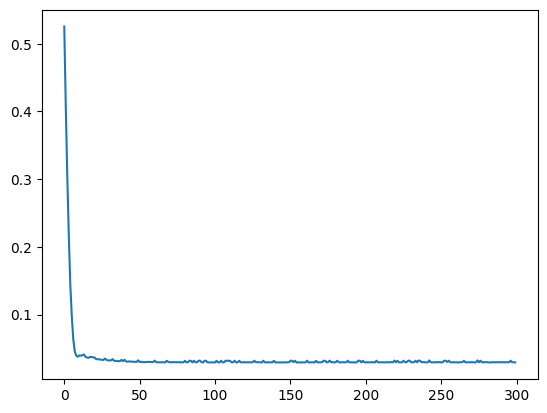

node: left_shoulder
Epoch [10], Loss: 0.0404
Epoch [20], Loss: 0.0390
Epoch [30], Loss: 0.0404
Epoch [40], Loss: 0.0369
Epoch [50], Loss: 0.0366
Epoch [60], Loss: 0.0388
Epoch [70], Loss: 0.0388
Epoch [80], Loss: 0.0358
Epoch [90], Loss: 0.0387
Epoch [100], Loss: 0.0359
Epoch [110], Loss: 0.0362
Epoch [120], Loss: 0.0364
Epoch [130], Loss: 0.0385
Epoch [140], Loss: 0.0387
Epoch [150], Loss: 0.0360
Epoch [160], Loss: 0.0359
Epoch [170], Loss: 0.0361
Epoch [180], Loss: 0.0364
Epoch [190], Loss: 0.0363
Epoch [200], Loss: 0.0366
Epoch [210], Loss: 0.0367
Epoch [220], Loss: 0.0365
Epoch [230], Loss: 0.0360
Epoch [240], Loss: 0.0361
Epoch [250], Loss: 0.0388
Epoch [260], Loss: 0.0363
Epoch [270], Loss: 0.0362
Epoch [280], Loss: 0.0361
Epoch [290], Loss: 0.0364
Epoch [300], Loss: 0.0359


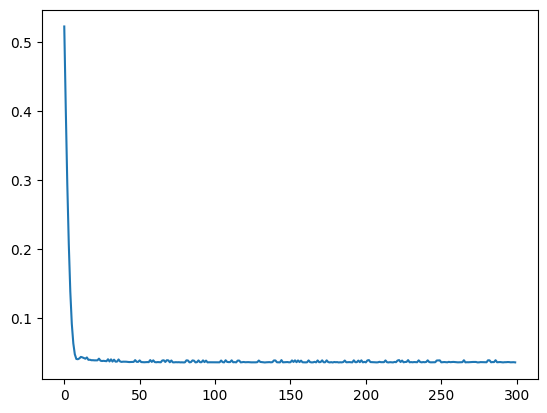

node: right_thigh
Epoch [10], Loss: 0.0947
Epoch [20], Loss: 0.0377
Epoch [30], Loss: 0.0228
Epoch [40], Loss: 0.0164
Epoch [50], Loss: 0.0131
Epoch [60], Loss: 0.0112
Epoch [70], Loss: 0.0106
Epoch [80], Loss: 0.0092
Epoch [90], Loss: 0.0086
Epoch [100], Loss: 0.0082
Epoch [110], Loss: 0.0079
Epoch [120], Loss: 0.0077
Epoch [130], Loss: 0.0076
Epoch [140], Loss: 0.0081
Epoch [150], Loss: 0.0074
Epoch [160], Loss: 0.0073
Epoch [170], Loss: 0.0072
Epoch [180], Loss: 0.0072
Epoch [190], Loss: 0.0078
Epoch [200], Loss: 0.0071
Epoch [210], Loss: 0.0071
Epoch [220], Loss: 0.0071
Epoch [230], Loss: 0.0071
Epoch [240], Loss: 0.0071
Epoch [250], Loss: 0.0078
Epoch [260], Loss: 0.0070
Epoch [270], Loss: 0.0070
Epoch [280], Loss: 0.0078
Epoch [290], Loss: 0.0078
Epoch [300], Loss: 0.0078


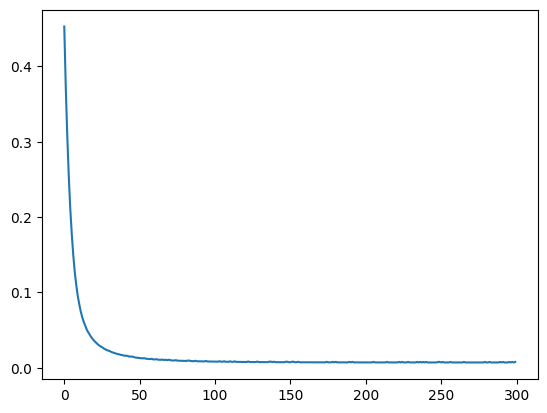

node: left_thigh
Epoch [10], Loss: 0.6368
Epoch [20], Loss: 0.2323
Epoch [30], Loss: 0.1248
Epoch [40], Loss: 0.0795
Epoch [50], Loss: 0.0557
Epoch [60], Loss: 0.0413
Epoch [70], Loss: 0.0320
Epoch [80], Loss: 0.0255
Epoch [90], Loss: 0.0209
Epoch [100], Loss: 0.0173
Epoch [110], Loss: 0.0146
Epoch [120], Loss: 0.0125
Epoch [130], Loss: 0.0108
Epoch [140], Loss: 0.0095
Epoch [150], Loss: 0.0083
Epoch [160], Loss: 0.0074
Epoch [170], Loss: 0.0066
Epoch [180], Loss: 0.0059
Epoch [190], Loss: 0.0053
Epoch [200], Loss: 0.0048
Epoch [210], Loss: 0.0044
Epoch [220], Loss: 0.0040
Epoch [230], Loss: 0.0037
Epoch [240], Loss: 0.0034
Epoch [250], Loss: 0.0031
Epoch [260], Loss: 0.0029
Epoch [270], Loss: 0.0027
Epoch [280], Loss: 0.0025
Epoch [290], Loss: 0.0023
Epoch [300], Loss: 0.0022


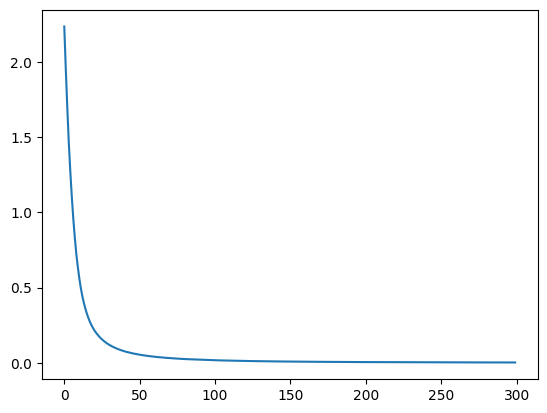

node: right_elbow
Epoch [10], Loss: 1.2950
Epoch [20], Loss: 1.3099
Epoch [30], Loss: 1.2771
Epoch [40], Loss: 1.2855
Epoch [50], Loss: 1.2695
Epoch [60], Loss: 1.3146
Epoch [70], Loss: 1.2618
Epoch [80], Loss: 1.2857
Epoch [90], Loss: 1.3065
Epoch [100], Loss: 1.2584
Epoch [110], Loss: 1.2818
Epoch [120], Loss: 1.2550
Epoch [130], Loss: 1.2643
Epoch [140], Loss: 1.2789
Epoch [150], Loss: 1.2511
Epoch [160], Loss: 1.2518
Epoch [170], Loss: 1.2953
Epoch [180], Loss: 1.3069
Epoch [190], Loss: 1.2720
Epoch [200], Loss: 1.2707
Epoch [210], Loss: 1.2853
Epoch [220], Loss: 1.2941
Epoch [230], Loss: 1.2668
Epoch [240], Loss: 1.2660
Epoch [250], Loss: 1.2666
Epoch [260], Loss: 1.2792
Epoch [270], Loss: 1.2694
Epoch [280], Loss: 1.2657
Epoch [290], Loss: 1.2818
Epoch [300], Loss: 1.2676


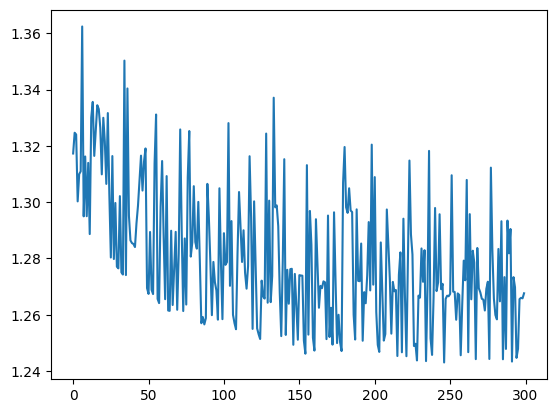

node: left_elbow
Epoch [10], Loss: 1.3821
Epoch [20], Loss: 1.4186
Epoch [30], Loss: 1.4143
Epoch [40], Loss: 1.3701
Epoch [50], Loss: 1.3899
Epoch [60], Loss: 1.3916
Epoch [70], Loss: 1.3849
Epoch [80], Loss: 1.4397
Epoch [90], Loss: 1.3650
Epoch [100], Loss: 1.3595
Epoch [110], Loss: 1.3570
Epoch [120], Loss: 1.4008
Epoch [130], Loss: 1.3828
Epoch [140], Loss: 1.3783
Epoch [150], Loss: 1.3781
Epoch [160], Loss: 1.3544
Epoch [170], Loss: 1.3757
Epoch [180], Loss: 1.3528
Epoch [190], Loss: 1.3738
Epoch [200], Loss: 1.3786
Epoch [210], Loss: 1.4240
Epoch [220], Loss: 1.4013
Epoch [230], Loss: 1.4014
Epoch [240], Loss: 1.3502
Epoch [250], Loss: 1.4017
Epoch [260], Loss: 1.3735
Epoch [270], Loss: 1.3781
Epoch [280], Loss: 1.3742
Epoch [290], Loss: 1.3962
Epoch [300], Loss: 1.3810


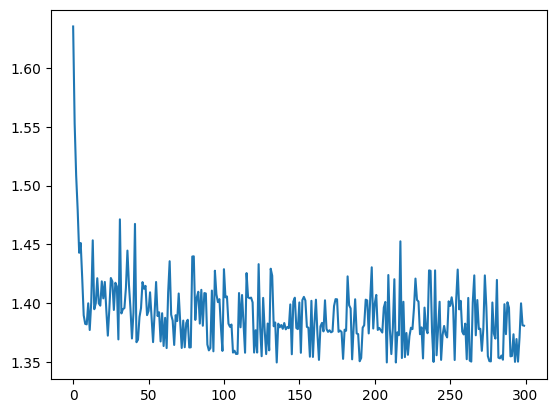

node: right_hand
Epoch [10], Loss: 2.3666
Epoch [20], Loss: 2.3202
Epoch [30], Loss: 2.2720
Epoch [40], Loss: 2.2429
Epoch [50], Loss: 2.2089
Epoch [60], Loss: 2.1371
Epoch [70], Loss: 2.1372
Epoch [80], Loss: 2.1078
Epoch [90], Loss: 2.1293
Epoch [100], Loss: 2.1562
Epoch [110], Loss: 2.0663
Epoch [120], Loss: 2.0843
Epoch [130], Loss: 2.0783
Epoch [140], Loss: 2.0646
Epoch [150], Loss: 2.0591
Epoch [160], Loss: 2.0759
Epoch [170], Loss: 2.0932
Epoch [180], Loss: 2.0840
Epoch [190], Loss: 2.0841
Epoch [200], Loss: 2.0947
Epoch [210], Loss: 2.0815
Epoch [220], Loss: 2.0517
Epoch [230], Loss: 2.0715
Epoch [240], Loss: 2.0250
Epoch [250], Loss: 2.0469
Epoch [260], Loss: 2.0788
Epoch [270], Loss: 2.0345
Epoch [280], Loss: 2.0343
Epoch [290], Loss: 2.0514
Epoch [300], Loss: 2.0793


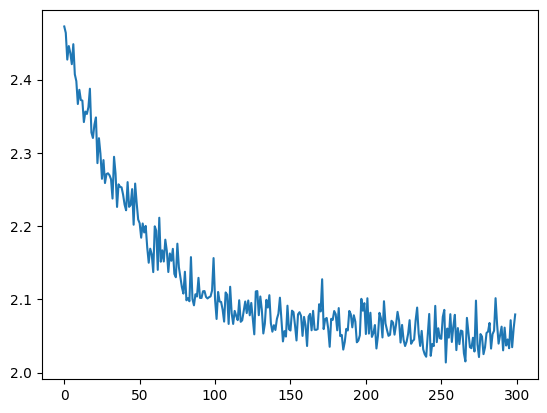

node: left_hand
Epoch [10], Loss: 5.6515
Epoch [20], Loss: 2.9098
Epoch [30], Loss: 2.2124
Epoch [40], Loss: 2.1549
Epoch [50], Loss: 2.1023
Epoch [60], Loss: 2.1069
Epoch [70], Loss: 2.1185
Epoch [80], Loss: 2.0659
Epoch [90], Loss: 2.0338
Epoch [100], Loss: 2.0272
Epoch [110], Loss: 2.0423
Epoch [120], Loss: 2.0085
Epoch [130], Loss: 2.0492
Epoch [140], Loss: 1.9927
Epoch [150], Loss: 1.9745
Epoch [160], Loss: 1.9728
Epoch [170], Loss: 1.9936
Epoch [180], Loss: 1.9322
Epoch [190], Loss: 1.9367
Epoch [200], Loss: 1.9535
Epoch [210], Loss: 1.9737
Epoch [220], Loss: 1.9135
Epoch [230], Loss: 1.9341
Epoch [240], Loss: 1.9176
Epoch [250], Loss: 1.9454
Epoch [260], Loss: 1.9075
Epoch [270], Loss: 1.9365
Epoch [280], Loss: 1.9171
Epoch [290], Loss: 1.8939
Epoch [300], Loss: 1.8925


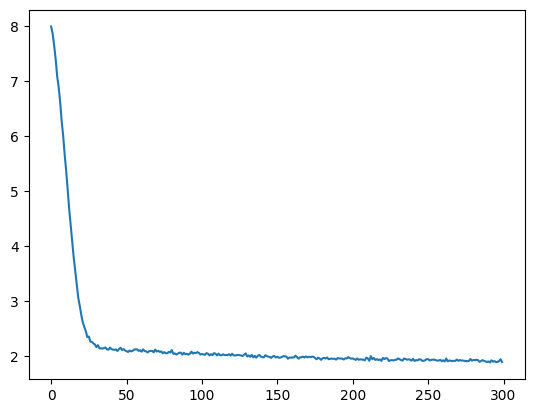

node: right_knee
Epoch [10], Loss: 0.3146
Epoch [20], Loss: 0.1311
Epoch [30], Loss: 0.0752
Epoch [40], Loss: 0.0504
Epoch [50], Loss: 0.0365
Epoch [60], Loss: 0.0280
Epoch [70], Loss: 0.0223
Epoch [80], Loss: 0.0183
Epoch [90], Loss: 0.0153
Epoch [100], Loss: 0.0131
Epoch [110], Loss: 0.0114
Epoch [120], Loss: 0.0099
Epoch [130], Loss: 0.0089
Epoch [140], Loss: 0.0080
Epoch [150], Loss: 0.0072
Epoch [160], Loss: 0.0067
Epoch [170], Loss: 0.0061
Epoch [180], Loss: 0.0057
Epoch [190], Loss: 0.0053
Epoch [200], Loss: 0.0049
Epoch [210], Loss: 0.0046
Epoch [220], Loss: 0.0043
Epoch [230], Loss: 0.0040
Epoch [240], Loss: 0.0038
Epoch [250], Loss: 0.0036
Epoch [260], Loss: 0.0035
Epoch [270], Loss: 0.0034
Epoch [280], Loss: 0.0032
Epoch [290], Loss: 0.0031
Epoch [300], Loss: 0.0030


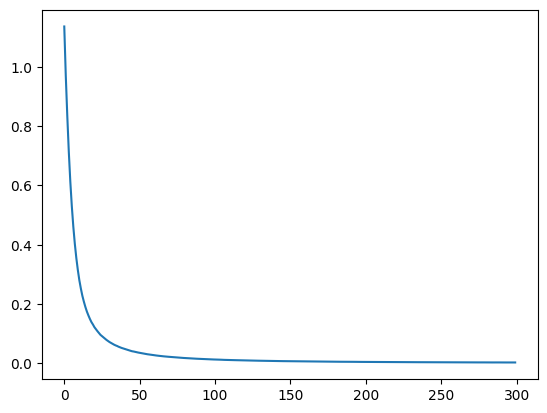

node: left_knee
Epoch [10], Loss: 5.1938
Epoch [20], Loss: 2.1288
Epoch [30], Loss: 0.9772
Epoch [40], Loss: 0.5521
Epoch [50], Loss: 0.3596
Epoch [60], Loss: 0.2511
Epoch [70], Loss: 0.1898
Epoch [80], Loss: 0.1472
Epoch [90], Loss: 0.1200
Epoch [100], Loss: 0.0981
Epoch [110], Loss: 0.0827
Epoch [120], Loss: 0.0697
Epoch [130], Loss: 0.0613
Epoch [140], Loss: 0.0529
Epoch [150], Loss: 0.0474
Epoch [160], Loss: 0.0416
Epoch [170], Loss: 0.0378
Epoch [180], Loss: 0.0336
Epoch [190], Loss: 0.0309
Epoch [200], Loss: 0.0278
Epoch [210], Loss: 0.0256
Epoch [220], Loss: 0.0233
Epoch [230], Loss: 0.0215
Epoch [240], Loss: 0.0199
Epoch [250], Loss: 0.0183
Epoch [260], Loss: 0.0170
Epoch [270], Loss: 0.0160
Epoch [280], Loss: 0.0150
Epoch [290], Loss: 0.0141
Epoch [300], Loss: 0.0131


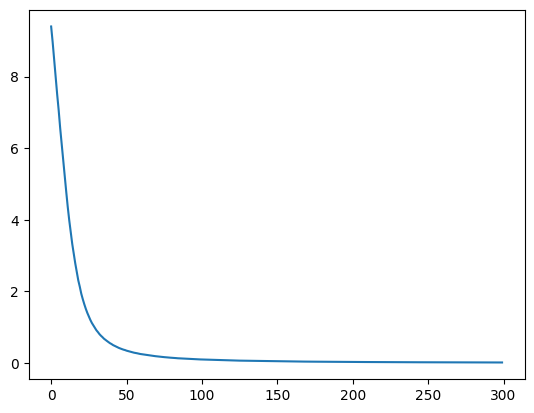

node: right_ankle
Epoch [10], Loss: 4.1233
Epoch [20], Loss: 1.4512
Epoch [30], Loss: 0.6605
Epoch [40], Loss: 0.3835
Epoch [50], Loss: 0.2559
Epoch [60], Loss: 0.1846
Epoch [70], Loss: 0.1420
Epoch [80], Loss: 0.1126
Epoch [90], Loss: 0.0921
Epoch [100], Loss: 0.0780
Epoch [110], Loss: 0.0669
Epoch [120], Loss: 0.0580
Epoch [130], Loss: 0.0508
Epoch [140], Loss: 0.0453
Epoch [150], Loss: 0.0412
Epoch [160], Loss: 0.0374
Epoch [170], Loss: 0.0343
Epoch [180], Loss: 0.0316
Epoch [190], Loss: 0.0292
Epoch [200], Loss: 0.0275
Epoch [210], Loss: 0.0258
Epoch [220], Loss: 0.0240
Epoch [230], Loss: 0.0227
Epoch [240], Loss: 0.0217
Epoch [250], Loss: 0.0205
Epoch [260], Loss: 0.0198
Epoch [270], Loss: 0.0189
Epoch [280], Loss: 0.0184
Epoch [290], Loss: 0.0175
Epoch [300], Loss: 0.0172


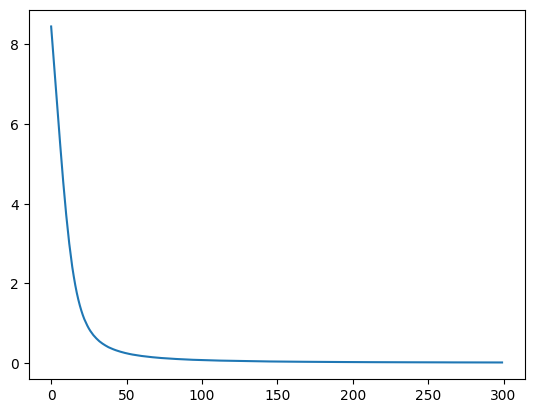

node: left_ankle
Epoch [10], Loss: 0.3577
Epoch [20], Loss: 0.1373
Epoch [30], Loss: 0.0780
Epoch [40], Loss: 0.0525
Epoch [50], Loss: 0.0382
Epoch [60], Loss: 0.0298
Epoch [70], Loss: 0.0243
Epoch [80], Loss: 0.0204
Epoch [90], Loss: 0.0177
Epoch [100], Loss: 0.0153
Epoch [110], Loss: 0.0137
Epoch [120], Loss: 0.0126
Epoch [130], Loss: 0.0115
Epoch [140], Loss: 0.0104
Epoch [150], Loss: 0.0097
Epoch [160], Loss: 0.0092
Epoch [170], Loss: 0.0087
Epoch [180], Loss: 0.0082
Epoch [190], Loss: 0.0079
Epoch [200], Loss: 0.0078
Epoch [210], Loss: 0.0072
Epoch [220], Loss: 0.0072
Epoch [230], Loss: 0.0068
Epoch [240], Loss: 0.0067
Epoch [250], Loss: 0.0065
Epoch [260], Loss: 0.0063
Epoch [270], Loss: 0.0064
Epoch [280], Loss: 0.0064
Epoch [290], Loss: 0.0059
Epoch [300], Loss: 0.0058


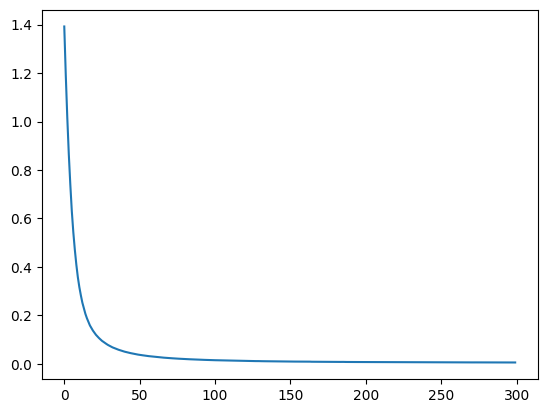

node: right_eye
Epoch [10], Loss: 0.2787
Epoch [20], Loss: 0.0817
Epoch [30], Loss: 0.0573
Epoch [40], Loss: 0.0530
Epoch [50], Loss: 0.0526
Epoch [60], Loss: 0.0524
Epoch [70], Loss: 0.0525
Epoch [80], Loss: 0.0524
Epoch [90], Loss: 0.0528
Epoch [100], Loss: 0.0524
Epoch [110], Loss: 0.0518
Epoch [120], Loss: 0.0527
Epoch [130], Loss: 0.0524
Epoch [140], Loss: 0.0522
Epoch [150], Loss: 0.0535
Epoch [160], Loss: 0.0521
Epoch [170], Loss: 0.0526
Epoch [180], Loss: 0.0523
Epoch [190], Loss: 0.0519
Epoch [200], Loss: 0.0527
Epoch [210], Loss: 0.0526
Epoch [220], Loss: 0.0538
Epoch [230], Loss: 0.0518
Epoch [240], Loss: 0.0532
Epoch [250], Loss: 0.0531
Epoch [260], Loss: 0.0526
Epoch [270], Loss: 0.0521
Epoch [280], Loss: 0.0523
Epoch [290], Loss: 0.0527
Epoch [300], Loss: 0.0523


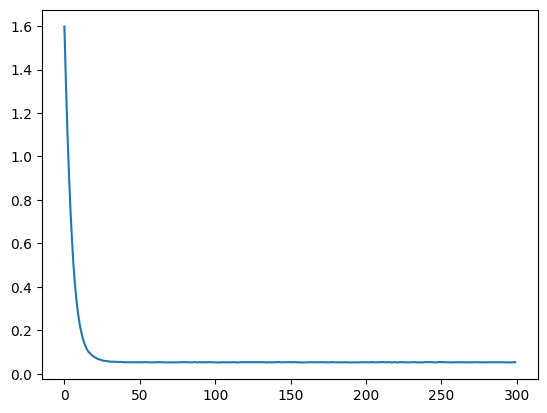

node: left_eye
Epoch [10], Loss: 3.3142
Epoch [20], Loss: 0.9482
Epoch [30], Loss: 0.3410
Epoch [40], Loss: 0.1747
Epoch [50], Loss: 0.1148
Epoch [60], Loss: 0.0864
Epoch [70], Loss: 0.0717
Epoch [80], Loss: 0.0650
Epoch [90], Loss: 0.0612
Epoch [100], Loss: 0.0596
Epoch [110], Loss: 0.0586
Epoch [120], Loss: 0.0569
Epoch [130], Loss: 0.0577
Epoch [140], Loss: 0.0558
Epoch [150], Loss: 0.0562
Epoch [160], Loss: 0.0580
Epoch [170], Loss: 0.0554
Epoch [180], Loss: 0.0557
Epoch [190], Loss: 0.0554
Epoch [200], Loss: 0.0554
Epoch [210], Loss: 0.0554
Epoch [220], Loss: 0.0565
Epoch [230], Loss: 0.0553
Epoch [240], Loss: 0.0547
Epoch [250], Loss: 0.0568
Epoch [260], Loss: 0.0543
Epoch [270], Loss: 0.0540
Epoch [280], Loss: 0.0544
Epoch [290], Loss: 0.0539
Epoch [300], Loss: 0.0559


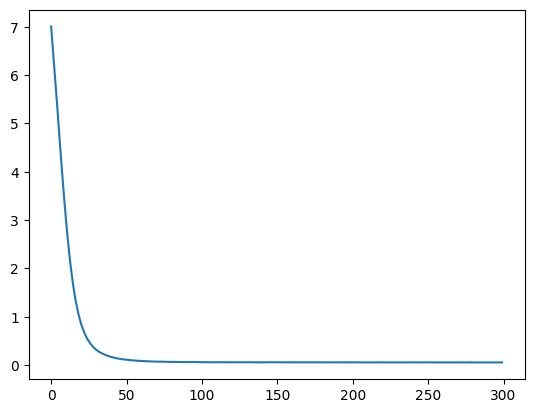

node: right_ear
Epoch [10], Loss: 1.5662
Epoch [20], Loss: 0.9964
Epoch [30], Loss: 0.9352
Epoch [40], Loss: 0.9056
Epoch [50], Loss: 0.8671
Epoch [60], Loss: 0.8308
Epoch [70], Loss: 0.7904
Epoch [80], Loss: 0.7821
Epoch [90], Loss: 0.7459
Epoch [100], Loss: 0.7297
Epoch [110], Loss: 0.7113
Epoch [120], Loss: 0.6959
Epoch [130], Loss: 0.6819
Epoch [140], Loss: 0.6943
Epoch [150], Loss: 0.6678
Epoch [160], Loss: 0.6738
Epoch [170], Loss: 0.6697
Epoch [180], Loss: 0.6635
Epoch [190], Loss: 0.6616
Epoch [200], Loss: 0.6569
Epoch [210], Loss: 0.6672
Epoch [220], Loss: 0.6726
Epoch [230], Loss: 0.6569
Epoch [240], Loss: 0.6574
Epoch [250], Loss: 0.6611
Epoch [260], Loss: 0.6633
Epoch [270], Loss: 0.6482
Epoch [280], Loss: 0.6604
Epoch [290], Loss: 0.6665
Epoch [300], Loss: 0.6556


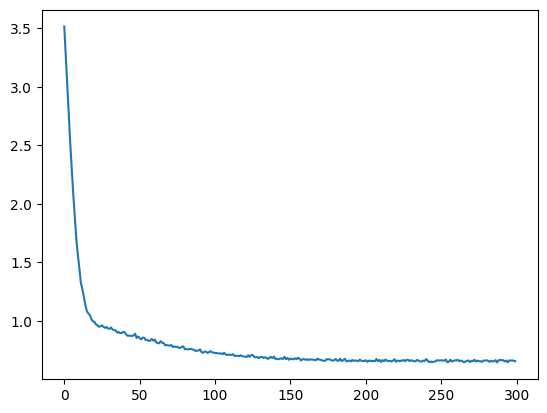

node: left_ear
Epoch [10], Loss: 0.5379
Epoch [20], Loss: 0.5226
Epoch [30], Loss: 0.5117
Epoch [40], Loss: 0.5036
Epoch [50], Loss: 0.5090
Epoch [60], Loss: 0.4915
Epoch [70], Loss: 0.5028
Epoch [80], Loss: 0.5028
Epoch [90], Loss: 0.5011
Epoch [100], Loss: 0.4999
Epoch [110], Loss: 0.4904
Epoch [120], Loss: 0.4873
Epoch [130], Loss: 0.4943
Epoch [140], Loss: 0.4893
Epoch [150], Loss: 0.4962
Epoch [160], Loss: 0.4939
Epoch [170], Loss: 0.4973
Epoch [180], Loss: 0.4969
Epoch [190], Loss: 0.4991
Epoch [200], Loss: 0.4951
Epoch [210], Loss: 0.4897
Epoch [220], Loss: 0.4927
Epoch [230], Loss: 0.4933
Epoch [240], Loss: 0.4914
Epoch [250], Loss: 0.4915
Epoch [260], Loss: 0.4883
Epoch [270], Loss: 0.4934
Epoch [280], Loss: 0.4927
Epoch [290], Loss: 0.4956
Epoch [300], Loss: 0.5011


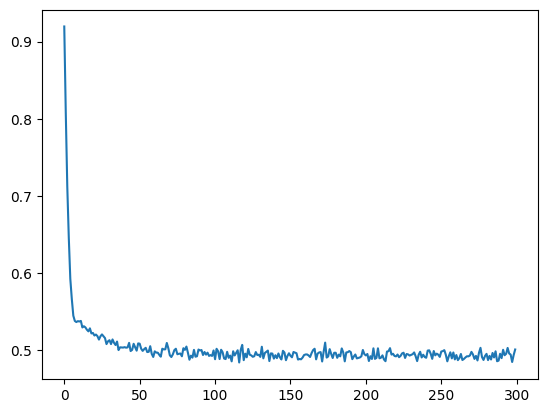

=== excited ===
node: nose
Epoch [10], Loss: 1.4397
Epoch [20], Loss: 0.5100
Epoch [30], Loss: 0.2577
Epoch [40], Loss: 0.1597
Epoch [50], Loss: 0.1101
Epoch [60], Loss: 0.0822
Epoch [70], Loss: 0.0646
Epoch [80], Loss: 0.0526
Epoch [90], Loss: 0.0439
Epoch [100], Loss: 0.0380
Epoch [110], Loss: 0.0334
Epoch [120], Loss: 0.0297
Epoch [130], Loss: 0.0268
Epoch [140], Loss: 0.0245
Epoch [150], Loss: 0.0227
Epoch [160], Loss: 0.0212
Epoch [170], Loss: 0.0200
Epoch [180], Loss: 0.0190
Epoch [190], Loss: 0.0182
Epoch [200], Loss: 0.0173
Epoch [210], Loss: 0.0168
Epoch [220], Loss: 0.0160
Epoch [230], Loss: 0.0156
Epoch [240], Loss: 0.0154
Epoch [250], Loss: 0.0148
Epoch [260], Loss: 0.0146
Epoch [270], Loss: 0.0143
Epoch [280], Loss: 0.0141
Epoch [290], Loss: 0.0136
Epoch [300], Loss: 0.0135


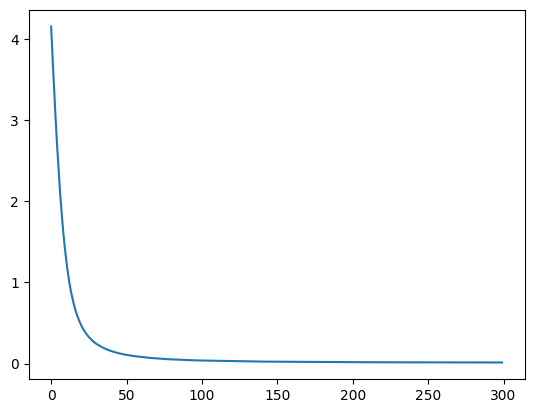

node: right_shoulder
Epoch [10], Loss: 0.0410
Epoch [20], Loss: 0.0379
Epoch [30], Loss: 0.0354
Epoch [40], Loss: 0.0336
Epoch [50], Loss: 0.0322
Epoch [60], Loss: 0.0314
Epoch [70], Loss: 0.0306
Epoch [80], Loss: 0.0304
Epoch [90], Loss: 0.0301
Epoch [100], Loss: 0.0298
Epoch [110], Loss: 0.0298
Epoch [120], Loss: 0.0299
Epoch [130], Loss: 0.0299
Epoch [140], Loss: 0.0328
Epoch [150], Loss: 0.0299
Epoch [160], Loss: 0.0297
Epoch [170], Loss: 0.0301
Epoch [180], Loss: 0.0297
Epoch [190], Loss: 0.0299
Epoch [200], Loss: 0.0299
Epoch [210], Loss: 0.0297
Epoch [220], Loss: 0.0298
Epoch [230], Loss: 0.0297
Epoch [240], Loss: 0.0298
Epoch [250], Loss: 0.0298
Epoch [260], Loss: 0.0302
Epoch [270], Loss: 0.0298
Epoch [280], Loss: 0.0299
Epoch [290], Loss: 0.0322
Epoch [300], Loss: 0.0298


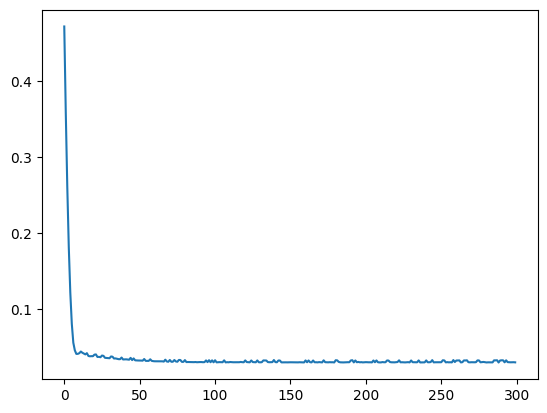

node: left_shoulder
Epoch [10], Loss: 0.3052
Epoch [20], Loss: 0.1478
Epoch [30], Loss: 0.1324
Epoch [40], Loss: 0.1167
Epoch [50], Loss: 0.1042
Epoch [60], Loss: 0.0875
Epoch [70], Loss: 0.0750
Epoch [80], Loss: 0.0657
Epoch [90], Loss: 0.0570
Epoch [100], Loss: 0.0505
Epoch [110], Loss: 0.0464
Epoch [120], Loss: 0.0433
Epoch [130], Loss: 0.0406
Epoch [140], Loss: 0.0394
Epoch [150], Loss: 0.0380
Epoch [160], Loss: 0.0371
Epoch [170], Loss: 0.0369
Epoch [180], Loss: 0.0366
Epoch [190], Loss: 0.0393
Epoch [200], Loss: 0.0363
Epoch [210], Loss: 0.0388
Epoch [220], Loss: 0.0363
Epoch [230], Loss: 0.0364
Epoch [240], Loss: 0.0363
Epoch [250], Loss: 0.0362
Epoch [260], Loss: 0.0391
Epoch [270], Loss: 0.0360
Epoch [280], Loss: 0.0390
Epoch [290], Loss: 0.0388
Epoch [300], Loss: 0.0389


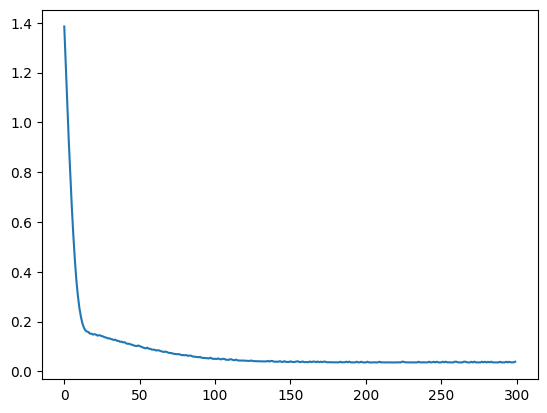

node: right_thigh
Epoch [10], Loss: 0.6992
Epoch [20], Loss: 0.2706
Epoch [30], Loss: 0.1469
Epoch [40], Loss: 0.0948
Epoch [50], Loss: 0.0667
Epoch [60], Loss: 0.0509
Epoch [70], Loss: 0.0405
Epoch [80], Loss: 0.0330
Epoch [90], Loss: 0.0282
Epoch [100], Loss: 0.0239
Epoch [110], Loss: 0.0211
Epoch [120], Loss: 0.0187
Epoch [130], Loss: 0.0170
Epoch [140], Loss: 0.0157
Epoch [150], Loss: 0.0143
Epoch [160], Loss: 0.0134
Epoch [170], Loss: 0.0126
Epoch [180], Loss: 0.0119
Epoch [190], Loss: 0.0115
Epoch [200], Loss: 0.0111
Epoch [210], Loss: 0.0106
Epoch [220], Loss: 0.0102
Epoch [230], Loss: 0.0099
Epoch [240], Loss: 0.0096
Epoch [250], Loss: 0.0094
Epoch [260], Loss: 0.0092
Epoch [270], Loss: 0.0090
Epoch [280], Loss: 0.0088
Epoch [290], Loss: 0.0087
Epoch [300], Loss: 0.0086


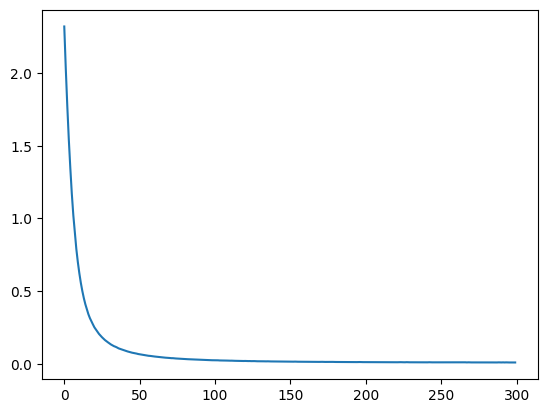

node: left_thigh
Epoch [10], Loss: 3.8777
Epoch [20], Loss: 1.3645
Epoch [30], Loss: 0.6144
Epoch [40], Loss: 0.3546
Epoch [50], Loss: 0.2336
Epoch [60], Loss: 0.1666
Epoch [70], Loss: 0.1257
Epoch [80], Loss: 0.0988
Epoch [90], Loss: 0.0793
Epoch [100], Loss: 0.0655
Epoch [110], Loss: 0.0552
Epoch [120], Loss: 0.0467
Epoch [130], Loss: 0.0403
Epoch [140], Loss: 0.0352
Epoch [150], Loss: 0.0310
Epoch [160], Loss: 0.0276
Epoch [170], Loss: 0.0244
Epoch [180], Loss: 0.0219
Epoch [190], Loss: 0.0196
Epoch [200], Loss: 0.0179
Epoch [210], Loss: 0.0163
Epoch [220], Loss: 0.0148
Epoch [230], Loss: 0.0136
Epoch [240], Loss: 0.0124
Epoch [250], Loss: 0.0115
Epoch [260], Loss: 0.0106
Epoch [270], Loss: 0.0098
Epoch [280], Loss: 0.0092
Epoch [290], Loss: 0.0084
Epoch [300], Loss: 0.0080


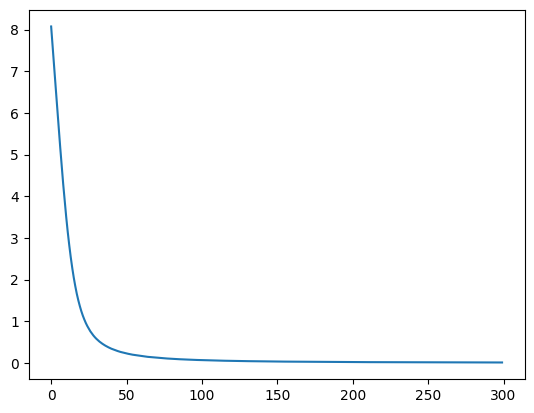

node: right_elbow
Epoch [10], Loss: 5.2072
Epoch [20], Loss: 2.4945
Epoch [30], Loss: 1.7244
Epoch [40], Loss: 1.5584
Epoch [50], Loss: 1.5563
Epoch [60], Loss: 1.5011
Epoch [70], Loss: 1.4279
Epoch [80], Loss: 1.4047
Epoch [90], Loss: 1.4177
Epoch [100], Loss: 1.3893
Epoch [110], Loss: 1.3910
Epoch [120], Loss: 1.3608
Epoch [130], Loss: 1.3695
Epoch [140], Loss: 1.3906
Epoch [150], Loss: 1.3294
Epoch [160], Loss: 1.3321
Epoch [170], Loss: 1.3056
Epoch [180], Loss: 1.2720
Epoch [190], Loss: 1.2345
Epoch [200], Loss: 1.2346
Epoch [210], Loss: 1.2023
Epoch [220], Loss: 1.1818
Epoch [230], Loss: 1.1841
Epoch [240], Loss: 1.1629
Epoch [250], Loss: 1.1342
Epoch [260], Loss: 1.1377
Epoch [270], Loss: 1.1117
Epoch [280], Loss: 1.1105
Epoch [290], Loss: 1.1137
Epoch [300], Loss: 1.0975


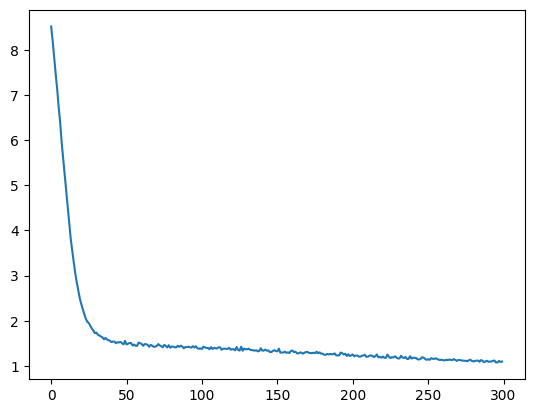

node: left_elbow
Epoch [10], Loss: 6.3200
Epoch [20], Loss: 3.1878
Epoch [30], Loss: 2.1066
Epoch [40], Loss: 1.8200
Epoch [50], Loss: 1.7549
Epoch [60], Loss: 1.7306
Epoch [70], Loss: 1.6772
Epoch [80], Loss: 1.6321
Epoch [90], Loss: 1.6183
Epoch [100], Loss: 1.6021
Epoch [110], Loss: 1.6483
Epoch [120], Loss: 1.6356
Epoch [130], Loss: 1.5614
Epoch [140], Loss: 1.6147
Epoch [150], Loss: 1.5635
Epoch [160], Loss: 1.5450
Epoch [170], Loss: 1.5445
Epoch [180], Loss: 1.5200
Epoch [190], Loss: 1.4522
Epoch [200], Loss: 1.4272
Epoch [210], Loss: 1.4508
Epoch [220], Loss: 1.4246
Epoch [230], Loss: 1.3758
Epoch [240], Loss: 1.3297
Epoch [250], Loss: 1.3516
Epoch [260], Loss: 1.3016
Epoch [270], Loss: 1.2986
Epoch [280], Loss: 1.2647
Epoch [290], Loss: 1.2712
Epoch [300], Loss: 1.2011


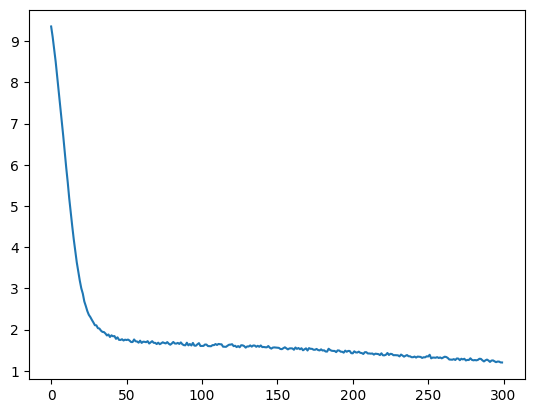

node: right_hand
Epoch [10], Loss: 2.1648
Epoch [20], Loss: 2.0970
Epoch [30], Loss: 2.0966
Epoch [40], Loss: 2.0192
Epoch [50], Loss: 1.9771
Epoch [60], Loss: 1.9561
Epoch [70], Loss: 1.9106
Epoch [80], Loss: 1.9160
Epoch [90], Loss: 1.8705
Epoch [100], Loss: 1.8300
Epoch [110], Loss: 1.8139
Epoch [120], Loss: 1.7932
Epoch [130], Loss: 1.7933
Epoch [140], Loss: 1.7828
Epoch [150], Loss: 1.7942
Epoch [160], Loss: 1.7573
Epoch [170], Loss: 1.7488
Epoch [180], Loss: 1.7811
Epoch [190], Loss: 1.7403
Epoch [200], Loss: 1.7430
Epoch [210], Loss: 1.7365
Epoch [220], Loss: 1.7320
Epoch [230], Loss: 1.7428
Epoch [240], Loss: 1.7349
Epoch [250], Loss: 1.7239
Epoch [260], Loss: 1.7294
Epoch [270], Loss: 1.7178
Epoch [280], Loss: 1.7062
Epoch [290], Loss: 1.7156
Epoch [300], Loss: 1.7016


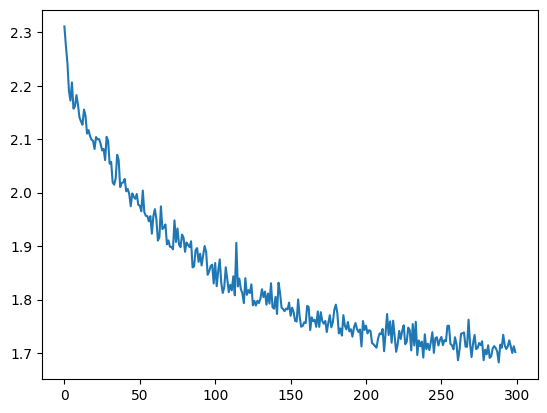

node: left_hand
Epoch [10], Loss: 2.3960
Epoch [20], Loss: 2.3378
Epoch [30], Loss: 2.2495
Epoch [40], Loss: 2.1781
Epoch [50], Loss: 2.1265
Epoch [60], Loss: 2.0656
Epoch [70], Loss: 2.0033
Epoch [80], Loss: 1.9811
Epoch [90], Loss: 1.9382
Epoch [100], Loss: 1.8829
Epoch [110], Loss: 1.8813
Epoch [120], Loss: 1.8381
Epoch [130], Loss: 1.8269
Epoch [140], Loss: 1.8249
Epoch [150], Loss: 1.8118
Epoch [160], Loss: 1.7794
Epoch [170], Loss: 1.7718
Epoch [180], Loss: 1.7720
Epoch [190], Loss: 1.7737
Epoch [200], Loss: 1.7257
Epoch [210], Loss: 1.7365
Epoch [220], Loss: 1.7063
Epoch [230], Loss: 1.7300
Epoch [240], Loss: 1.7070
Epoch [250], Loss: 1.7090
Epoch [260], Loss: 1.7066
Epoch [270], Loss: 1.6963
Epoch [280], Loss: 1.6854
Epoch [290], Loss: 1.6838
Epoch [300], Loss: 1.6527


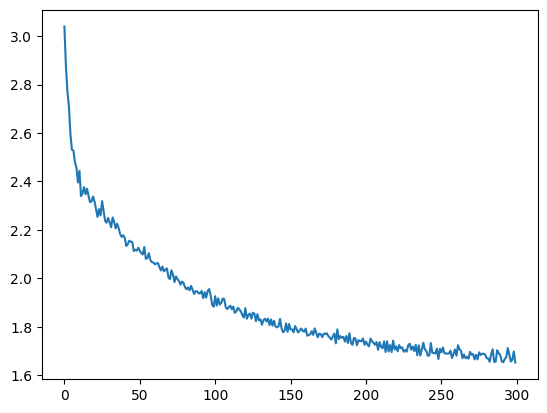

node: right_knee
Epoch [10], Loss: 0.1894
Epoch [20], Loss: 0.0793
Epoch [30], Loss: 0.0467
Epoch [40], Loss: 0.0318
Epoch [50], Loss: 0.0233
Epoch [60], Loss: 0.0181
Epoch [70], Loss: 0.0146
Epoch [80], Loss: 0.0121
Epoch [90], Loss: 0.0103
Epoch [100], Loss: 0.0089
Epoch [110], Loss: 0.0079
Epoch [120], Loss: 0.0071
Epoch [130], Loss: 0.0064
Epoch [140], Loss: 0.0058
Epoch [150], Loss: 0.0053
Epoch [160], Loss: 0.0049
Epoch [170], Loss: 0.0046
Epoch [180], Loss: 0.0043
Epoch [190], Loss: 0.0040
Epoch [200], Loss: 0.0039
Epoch [210], Loss: 0.0036
Epoch [220], Loss: 0.0034
Epoch [230], Loss: 0.0033
Epoch [240], Loss: 0.0032
Epoch [250], Loss: 0.0030
Epoch [260], Loss: 0.0029
Epoch [270], Loss: 0.0028
Epoch [280], Loss: 0.0028
Epoch [290], Loss: 0.0027
Epoch [300], Loss: 0.0026


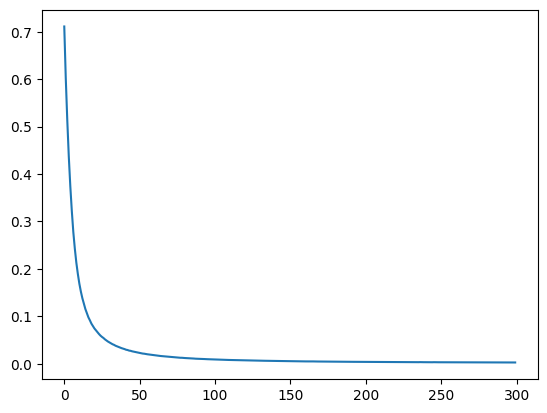

node: left_knee
Epoch [10], Loss: 0.0786
Epoch [20], Loss: 0.0329
Epoch [30], Loss: 0.0193
Epoch [40], Loss: 0.0131
Epoch [50], Loss: 0.0096
Epoch [60], Loss: 0.0074
Epoch [70], Loss: 0.0059
Epoch [80], Loss: 0.0049
Epoch [90], Loss: 0.0041
Epoch [100], Loss: 0.0035
Epoch [110], Loss: 0.0030
Epoch [120], Loss: 0.0026
Epoch [130], Loss: 0.0023
Epoch [140], Loss: 0.0021
Epoch [150], Loss: 0.0019
Epoch [160], Loss: 0.0017
Epoch [170], Loss: 0.0016
Epoch [180], Loss: 0.0015
Epoch [190], Loss: 0.0013
Epoch [200], Loss: 0.0012
Epoch [210], Loss: 0.0012
Epoch [220], Loss: 0.0011
Epoch [230], Loss: 0.0010
Epoch [240], Loss: 0.0010
Epoch [250], Loss: 0.0009
Epoch [260], Loss: 0.0009
Epoch [270], Loss: 0.0008
Epoch [280], Loss: 0.0008
Epoch [290], Loss: 0.0007
Epoch [300], Loss: 0.0007


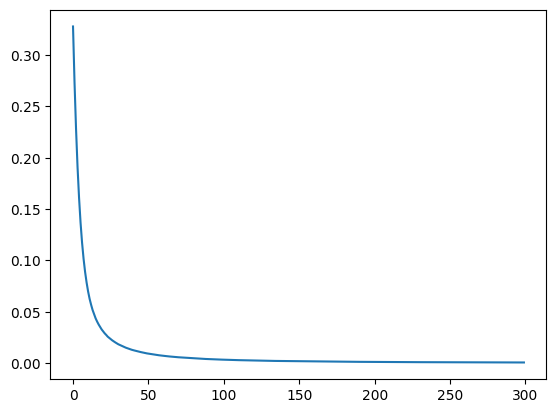

node: right_ankle
Epoch [10], Loss: 4.1306
Epoch [20], Loss: 1.6086
Epoch [30], Loss: 0.7737
Epoch [40], Loss: 0.4514
Epoch [50], Loss: 0.3046
Epoch [60], Loss: 0.2206
Epoch [70], Loss: 0.1680
Epoch [80], Loss: 0.1326
Epoch [90], Loss: 0.1091
Epoch [100], Loss: 0.0932
Epoch [110], Loss: 0.0790
Epoch [120], Loss: 0.0694
Epoch [130], Loss: 0.0616
Epoch [140], Loss: 0.0548
Epoch [150], Loss: 0.0495
Epoch [160], Loss: 0.0458
Epoch [170], Loss: 0.0412
Epoch [180], Loss: 0.0385
Epoch [190], Loss: 0.0353
Epoch [200], Loss: 0.0334
Epoch [210], Loss: 0.0317
Epoch [220], Loss: 0.0299
Epoch [230], Loss: 0.0281
Epoch [240], Loss: 0.0266
Epoch [250], Loss: 0.0256
Epoch [260], Loss: 0.0242
Epoch [270], Loss: 0.0231
Epoch [280], Loss: 0.0222
Epoch [290], Loss: 0.0219
Epoch [300], Loss: 0.0207


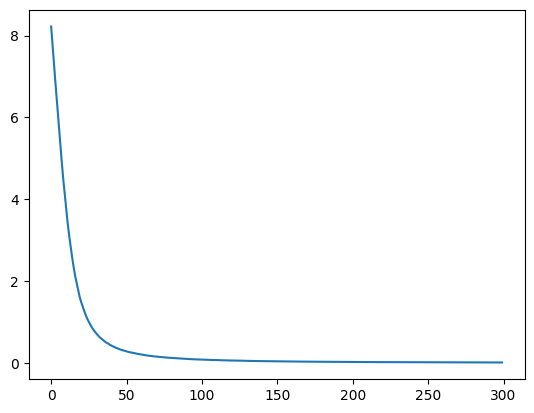

node: left_ankle
Epoch [10], Loss: 1.9841
Epoch [20], Loss: 0.7624
Epoch [30], Loss: 0.3981
Epoch [40], Loss: 0.2493
Epoch [50], Loss: 0.1744
Epoch [60], Loss: 0.1289
Epoch [70], Loss: 0.1001
Epoch [80], Loss: 0.0804
Epoch [90], Loss: 0.0665
Epoch [100], Loss: 0.0560
Epoch [110], Loss: 0.0487
Epoch [120], Loss: 0.0424
Epoch [130], Loss: 0.0378
Epoch [140], Loss: 0.0337
Epoch [150], Loss: 0.0302
Epoch [160], Loss: 0.0273
Epoch [170], Loss: 0.0252
Epoch [180], Loss: 0.0232
Epoch [190], Loss: 0.0216
Epoch [200], Loss: 0.0198
Epoch [210], Loss: 0.0186
Epoch [220], Loss: 0.0175
Epoch [230], Loss: 0.0165
Epoch [240], Loss: 0.0156
Epoch [250], Loss: 0.0146
Epoch [260], Loss: 0.0139
Epoch [270], Loss: 0.0132
Epoch [280], Loss: 0.0128
Epoch [290], Loss: 0.0122
Epoch [300], Loss: 0.0119


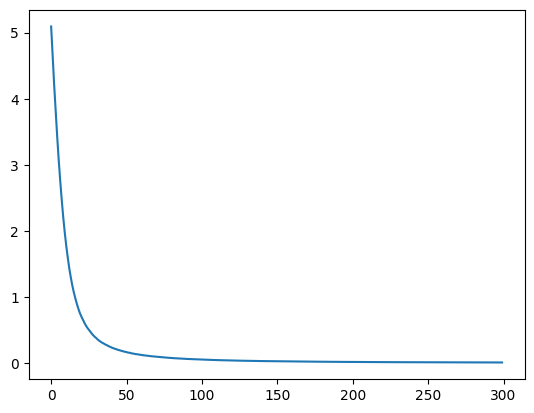

node: right_eye
Epoch [10], Loss: 0.0560
Epoch [20], Loss: 0.0548
Epoch [30], Loss: 0.0544
Epoch [40], Loss: 0.0537
Epoch [50], Loss: 0.0538
Epoch [60], Loss: 0.0539
Epoch [70], Loss: 0.0533
Epoch [80], Loss: 0.0538
Epoch [90], Loss: 0.0529
Epoch [100], Loss: 0.0536
Epoch [110], Loss: 0.0536
Epoch [120], Loss: 0.0544
Epoch [130], Loss: 0.0532
Epoch [140], Loss: 0.0531
Epoch [150], Loss: 0.0540
Epoch [160], Loss: 0.0529
Epoch [170], Loss: 0.0539
Epoch [180], Loss: 0.0540
Epoch [190], Loss: 0.0543
Epoch [200], Loss: 0.0532
Epoch [210], Loss: 0.0535
Epoch [220], Loss: 0.0538
Epoch [230], Loss: 0.0536
Epoch [240], Loss: 0.0531
Epoch [250], Loss: 0.0533
Epoch [260], Loss: 0.0539
Epoch [270], Loss: 0.0544
Epoch [280], Loss: 0.0533
Epoch [290], Loss: 0.0531
Epoch [300], Loss: 0.0535


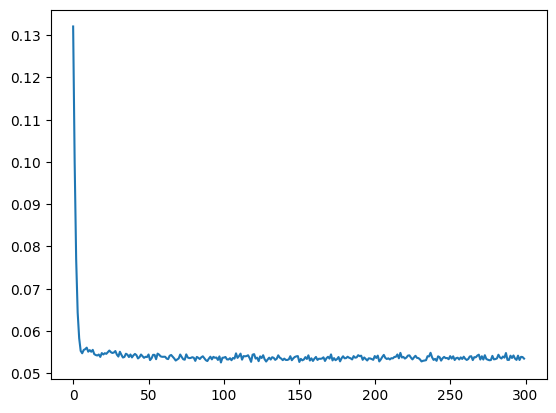

node: left_eye
Epoch [10], Loss: 0.3015
Epoch [20], Loss: 0.1137
Epoch [30], Loss: 0.0799
Epoch [40], Loss: 0.0729
Epoch [50], Loss: 0.0705
Epoch [60], Loss: 0.0708
Epoch [70], Loss: 0.0703
Epoch [80], Loss: 0.0674
Epoch [90], Loss: 0.0667
Epoch [100], Loss: 0.0659
Epoch [110], Loss: 0.0654
Epoch [120], Loss: 0.0652
Epoch [130], Loss: 0.0667
Epoch [140], Loss: 0.0637
Epoch [150], Loss: 0.0630
Epoch [160], Loss: 0.0612
Epoch [170], Loss: 0.0611
Epoch [180], Loss: 0.0625
Epoch [190], Loss: 0.0603
Epoch [200], Loss: 0.0618
Epoch [210], Loss: 0.0585
Epoch [220], Loss: 0.0582
Epoch [230], Loss: 0.0576
Epoch [240], Loss: 0.0571
Epoch [250], Loss: 0.0564
Epoch [260], Loss: 0.0560
Epoch [270], Loss: 0.0555
Epoch [280], Loss: 0.0558
Epoch [290], Loss: 0.0552
Epoch [300], Loss: 0.0552


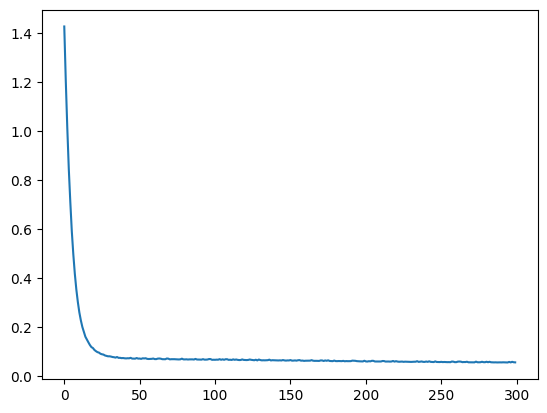

node: right_ear
Epoch [10], Loss: 1.0303
Epoch [20], Loss: 0.8476
Epoch [30], Loss: 0.8326
Epoch [40], Loss: 0.8140
Epoch [50], Loss: 0.8205
Epoch [60], Loss: 0.7887
Epoch [70], Loss: 0.7800
Epoch [80], Loss: 0.7844
Epoch [90], Loss: 0.7469
Epoch [100], Loss: 0.7609
Epoch [110], Loss: 0.7426
Epoch [120], Loss: 0.7317
Epoch [130], Loss: 0.7257
Epoch [140], Loss: 0.7218
Epoch [150], Loss: 0.7183
Epoch [160], Loss: 0.7145
Epoch [170], Loss: 0.7072
Epoch [180], Loss: 0.7116
Epoch [190], Loss: 0.6943
Epoch [200], Loss: 0.6892
Epoch [210], Loss: 0.6913
Epoch [220], Loss: 0.7019
Epoch [230], Loss: 0.6888
Epoch [240], Loss: 0.6786
Epoch [250], Loss: 0.6880
Epoch [260], Loss: 0.6819
Epoch [270], Loss: 0.6880
Epoch [280], Loss: 0.6937
Epoch [290], Loss: 0.6735
Epoch [300], Loss: 0.6998


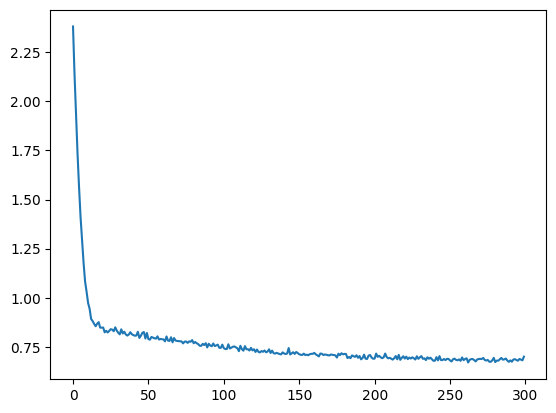

node: left_ear
Epoch [10], Loss: 1.3620
Epoch [20], Loss: 0.6363
Epoch [30], Loss: 0.6023
Epoch [40], Loss: 0.5882
Epoch [50], Loss: 0.5813
Epoch [60], Loss: 0.5713
Epoch [70], Loss: 0.5585
Epoch [80], Loss: 0.5600
Epoch [90], Loss: 0.5458
Epoch [100], Loss: 0.5422
Epoch [110], Loss: 0.5373
Epoch [120], Loss: 0.5296
Epoch [130], Loss: 0.5232
Epoch [140], Loss: 0.5200
Epoch [150], Loss: 0.5207
Epoch [160], Loss: 0.5104
Epoch [170], Loss: 0.5073
Epoch [180], Loss: 0.5004
Epoch [190], Loss: 0.5088
Epoch [200], Loss: 0.5046
Epoch [210], Loss: 0.5011
Epoch [220], Loss: 0.4985
Epoch [230], Loss: 0.5001
Epoch [240], Loss: 0.5021
Epoch [250], Loss: 0.4944
Epoch [260], Loss: 0.4930
Epoch [270], Loss: 0.5051
Epoch [280], Loss: 0.4934
Epoch [290], Loss: 0.4935
Epoch [300], Loss: 0.4901


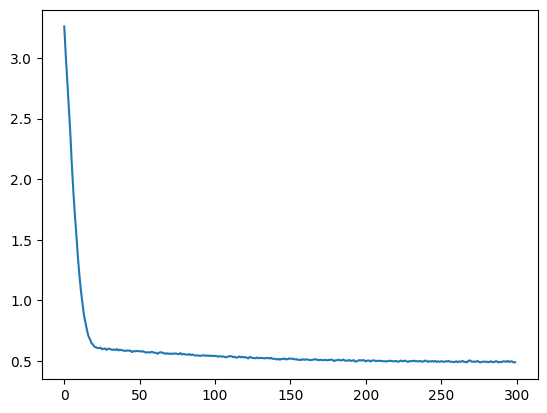

=== surprise ===
node: nose
Epoch [10], Loss: 7.0220
Epoch [20], Loss: 2.7589
Epoch [30], Loss: 1.0727
Epoch [40], Loss: 0.5487
Epoch [50], Loss: 0.3373
Epoch [60], Loss: 0.2336
Epoch [70], Loss: 0.1715
Epoch [80], Loss: 0.1334
Epoch [90], Loss: 0.1067
Epoch [100], Loss: 0.0887
Epoch [110], Loss: 0.0753
Epoch [120], Loss: 0.0639
Epoch [130], Loss: 0.0561
Epoch [140], Loss: 0.0500
Epoch [150], Loss: 0.0449
Epoch [160], Loss: 0.0408
Epoch [170], Loss: 0.0374
Epoch [180], Loss: 0.0341
Epoch [190], Loss: 0.0320
Epoch [200], Loss: 0.0294
Epoch [210], Loss: 0.0278
Epoch [220], Loss: 0.0263
Epoch [230], Loss: 0.0248
Epoch [240], Loss: 0.0237
Epoch [250], Loss: 0.0227
Epoch [260], Loss: 0.0215
Epoch [270], Loss: 0.0210
Epoch [280], Loss: 0.0200
Epoch [290], Loss: 0.0194
Epoch [300], Loss: 0.0190


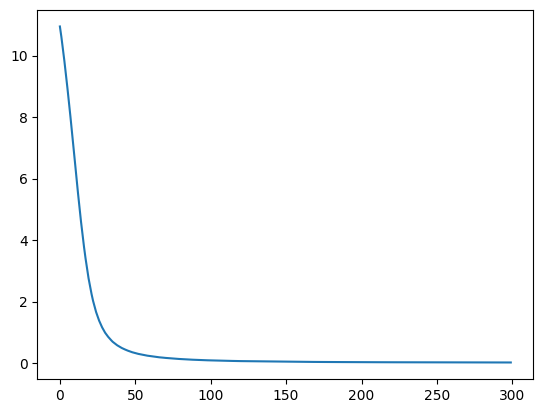

node: right_shoulder
Epoch [10], Loss: 0.6167
Epoch [20], Loss: 0.0407
Epoch [30], Loss: 0.0312
Epoch [40], Loss: 0.0297
Epoch [50], Loss: 0.0283
Epoch [60], Loss: 0.0289
Epoch [70], Loss: 0.0260
Epoch [80], Loss: 0.0245
Epoch [90], Loss: 0.0234
Epoch [100], Loss: 0.0245
Epoch [110], Loss: 0.0234
Epoch [120], Loss: 0.0213
Epoch [130], Loss: 0.0207
Epoch [140], Loss: 0.0207
Epoch [150], Loss: 0.0202
Epoch [160], Loss: 0.0200
Epoch [170], Loss: 0.0197
Epoch [180], Loss: 0.0196
Epoch [190], Loss: 0.0196
Epoch [200], Loss: 0.0195
Epoch [210], Loss: 0.0203
Epoch [220], Loss: 0.0197
Epoch [230], Loss: 0.0194
Epoch [240], Loss: 0.0195
Epoch [250], Loss: 0.0194
Epoch [260], Loss: 0.0193
Epoch [270], Loss: 0.0194
Epoch [280], Loss: 0.0202
Epoch [290], Loss: 0.0197
Epoch [300], Loss: 0.0194


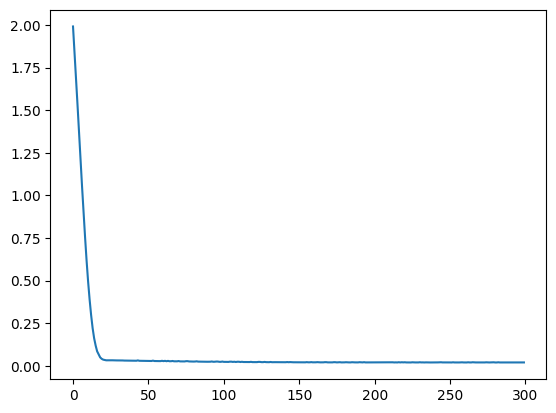

node: left_shoulder
Epoch [10], Loss: 0.0339
Epoch [20], Loss: 0.0287
Epoch [30], Loss: 0.0275
Epoch [40], Loss: 0.0275
Epoch [50], Loss: 0.0263
Epoch [60], Loss: 0.0261
Epoch [70], Loss: 0.0256
Epoch [80], Loss: 0.0269
Epoch [90], Loss: 0.0264
Epoch [100], Loss: 0.0257
Epoch [110], Loss: 0.0257
Epoch [120], Loss: 0.0258
Epoch [130], Loss: 0.0256
Epoch [140], Loss: 0.0257
Epoch [150], Loss: 0.0258
Epoch [160], Loss: 0.0253
Epoch [170], Loss: 0.0256
Epoch [180], Loss: 0.0263
Epoch [190], Loss: 0.0255
Epoch [200], Loss: 0.0268
Epoch [210], Loss: 0.0266
Epoch [220], Loss: 0.0262
Epoch [230], Loss: 0.0258
Epoch [240], Loss: 0.0263
Epoch [250], Loss: 0.0256
Epoch [260], Loss: 0.0255
Epoch [270], Loss: 0.0259
Epoch [280], Loss: 0.0253
Epoch [290], Loss: 0.0255
Epoch [300], Loss: 0.0256


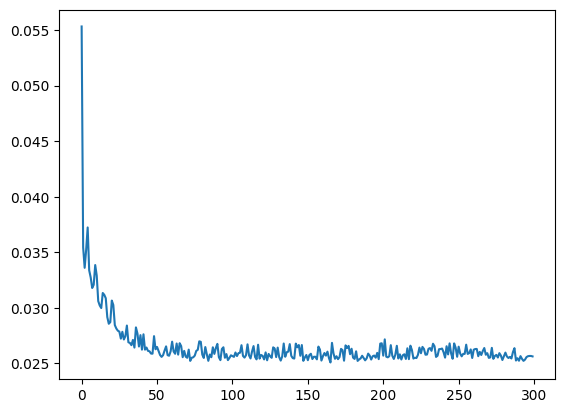

node: right_thigh
Epoch [10], Loss: 1.4385
Epoch [20], Loss: 0.5426
Epoch [30], Loss: 0.2834
Epoch [40], Loss: 0.1767
Epoch [50], Loss: 0.1223
Epoch [60], Loss: 0.0914
Epoch [70], Loss: 0.0710
Epoch [80], Loss: 0.0575
Epoch [90], Loss: 0.0477
Epoch [100], Loss: 0.0406
Epoch [110], Loss: 0.0351
Epoch [120], Loss: 0.0315
Epoch [130], Loss: 0.0284
Epoch [140], Loss: 0.0248
Epoch [150], Loss: 0.0235
Epoch [160], Loss: 0.0211
Epoch [170], Loss: 0.0194
Epoch [180], Loss: 0.0189
Epoch [190], Loss: 0.0170
Epoch [200], Loss: 0.0168
Epoch [210], Loss: 0.0153
Epoch [220], Loss: 0.0145
Epoch [230], Loss: 0.0140
Epoch [240], Loss: 0.0134
Epoch [250], Loss: 0.0129
Epoch [260], Loss: 0.0125
Epoch [270], Loss: 0.0121
Epoch [280], Loss: 0.0126
Epoch [290], Loss: 0.0115
Epoch [300], Loss: 0.0113


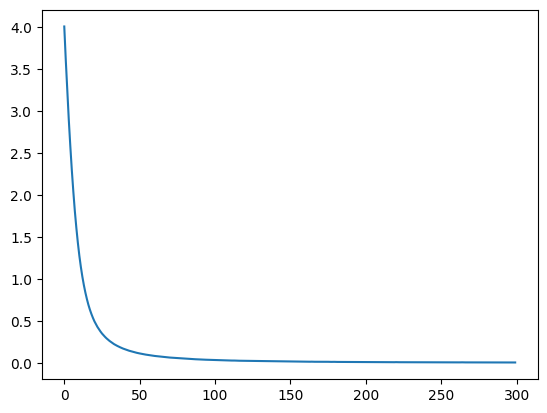

node: left_thigh
Epoch [10], Loss: 0.2426
Epoch [20], Loss: 0.0962
Epoch [30], Loss: 0.0541
Epoch [40], Loss: 0.0351
Epoch [50], Loss: 0.0246
Epoch [60], Loss: 0.0183
Epoch [70], Loss: 0.0142
Epoch [80], Loss: 0.0112
Epoch [90], Loss: 0.0092
Epoch [100], Loss: 0.0077
Epoch [110], Loss: 0.0066
Epoch [120], Loss: 0.0056
Epoch [130], Loss: 0.0048
Epoch [140], Loss: 0.0042
Epoch [150], Loss: 0.0037
Epoch [160], Loss: 0.0033
Epoch [170], Loss: 0.0030
Epoch [180], Loss: 0.0027
Epoch [190], Loss: 0.0024
Epoch [200], Loss: 0.0022
Epoch [210], Loss: 0.0021
Epoch [220], Loss: 0.0019
Epoch [230], Loss: 0.0018
Epoch [240], Loss: 0.0017
Epoch [250], Loss: 0.0015
Epoch [260], Loss: 0.0015
Epoch [270], Loss: 0.0014
Epoch [280], Loss: 0.0013
Epoch [290], Loss: 0.0013
Epoch [300], Loss: 0.0012


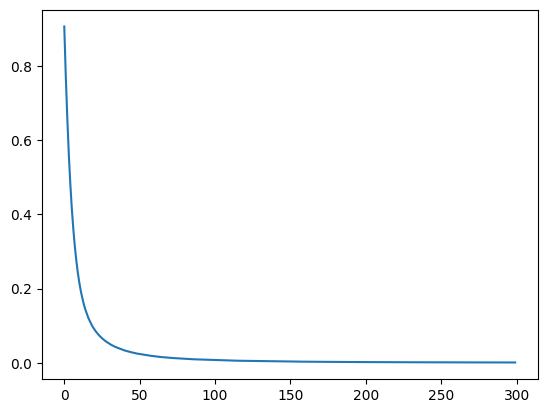

node: right_elbow
Epoch [10], Loss: 1.3611
Epoch [20], Loss: 1.3439
Epoch [30], Loss: 1.3565
Epoch [40], Loss: 1.3139
Epoch [50], Loss: 1.3283
Epoch [60], Loss: 1.3022
Epoch [70], Loss: 1.3371
Epoch [80], Loss: 1.2967
Epoch [90], Loss: 1.3086
Epoch [100], Loss: 1.3203
Epoch [110], Loss: 1.3064
Epoch [120], Loss: 1.3063
Epoch [130], Loss: 1.3352
Epoch [140], Loss: 1.3189
Epoch [150], Loss: 1.3437
Epoch [160], Loss: 1.3592
Epoch [170], Loss: 1.2931
Epoch [180], Loss: 1.2950
Epoch [190], Loss: 1.3031
Epoch [200], Loss: 1.2968
Epoch [210], Loss: 1.3459
Epoch [220], Loss: 1.3211
Epoch [230], Loss: 1.3600
Epoch [240], Loss: 1.3165
Epoch [250], Loss: 1.3035
Epoch [260], Loss: 1.3499
Epoch [270], Loss: 1.3584
Epoch [280], Loss: 1.3481
Epoch [290], Loss: 1.3220
Epoch [300], Loss: 1.3213


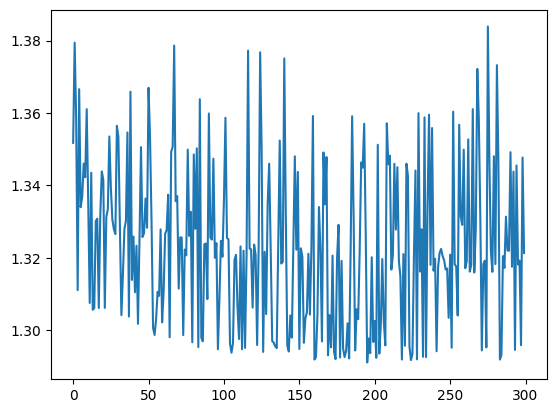

node: left_elbow
Epoch [10], Loss: 1.5518
Epoch [20], Loss: 1.5716
Epoch [30], Loss: 1.5067
Epoch [40], Loss: 1.5499
Epoch [50], Loss: 1.5224
Epoch [60], Loss: 1.5409
Epoch [70], Loss: 1.5599
Epoch [80], Loss: 1.4757
Epoch [90], Loss: 1.5466
Epoch [100], Loss: 1.4944
Epoch [110], Loss: 1.5389
Epoch [120], Loss: 1.4592
Epoch [130], Loss: 1.5084
Epoch [140], Loss: 1.5341
Epoch [150], Loss: 1.4983
Epoch [160], Loss: 1.5029
Epoch [170], Loss: 1.4743
Epoch [180], Loss: 1.4691
Epoch [190], Loss: 1.4691
Epoch [200], Loss: 1.4865
Epoch [210], Loss: 1.4699
Epoch [220], Loss: 1.4879
Epoch [230], Loss: 1.4658
Epoch [240], Loss: 1.4637
Epoch [250], Loss: 1.4554
Epoch [260], Loss: 1.4624
Epoch [270], Loss: 1.4618
Epoch [280], Loss: 1.4542
Epoch [290], Loss: 1.4636
Epoch [300], Loss: 1.4581


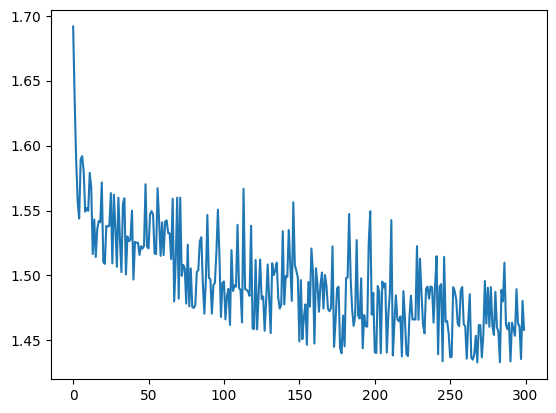

node: right_hand
Epoch [10], Loss: 2.2550
Epoch [20], Loss: 2.2768
Epoch [30], Loss: 2.2353
Epoch [40], Loss: 2.2506
Epoch [50], Loss: 2.2467
Epoch [60], Loss: 2.2681
Epoch [70], Loss: 2.2246
Epoch [80], Loss: 2.2371
Epoch [90], Loss: 2.2203
Epoch [100], Loss: 2.2593
Epoch [110], Loss: 2.2206
Epoch [120], Loss: 2.2209
Epoch [130], Loss: 2.2205
Epoch [140], Loss: 2.2176
Epoch [150], Loss: 2.2415
Epoch [160], Loss: 2.2403
Epoch [170], Loss: 2.2252
Epoch [180], Loss: 2.2220
Epoch [190], Loss: 2.2317
Epoch [200], Loss: 2.2445
Epoch [210], Loss: 2.2383
Epoch [220], Loss: 2.2127
Epoch [230], Loss: 2.2365
Epoch [240], Loss: 2.2170
Epoch [250], Loss: 2.2282
Epoch [260], Loss: 2.2231
Epoch [270], Loss: 2.2430
Epoch [280], Loss: 2.2590
Epoch [290], Loss: 2.2115
Epoch [300], Loss: 2.2361


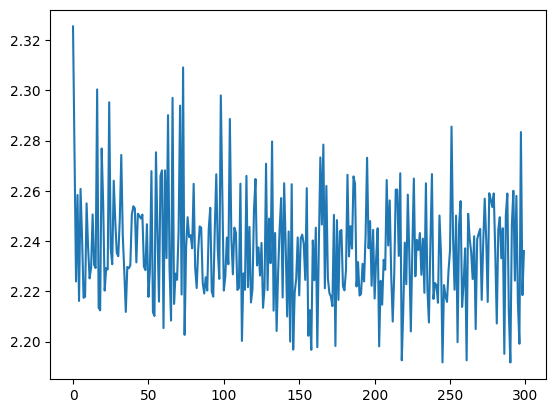

node: left_hand
Epoch [10], Loss: 2.5819
Epoch [20], Loss: 2.4263
Epoch [30], Loss: 2.4601
Epoch [40], Loss: 2.4271
Epoch [50], Loss: 2.3873
Epoch [60], Loss: 2.4108
Epoch [70], Loss: 2.3453
Epoch [80], Loss: 2.3381
Epoch [90], Loss: 2.3438
Epoch [100], Loss: 2.3236
Epoch [110], Loss: 2.3024
Epoch [120], Loss: 2.3136
Epoch [130], Loss: 2.3181
Epoch [140], Loss: 2.2819
Epoch [150], Loss: 2.2726
Epoch [160], Loss: 2.3020
Epoch [170], Loss: 2.2787
Epoch [180], Loss: 2.2168
Epoch [190], Loss: 2.2366
Epoch [200], Loss: 2.2486
Epoch [210], Loss: 2.2612
Epoch [220], Loss: 2.2247
Epoch [230], Loss: 2.2201
Epoch [240], Loss: 2.2419
Epoch [250], Loss: 2.2327
Epoch [260], Loss: 2.2423
Epoch [270], Loss: 2.2388
Epoch [280], Loss: 2.2149
Epoch [290], Loss: 2.2108
Epoch [300], Loss: 2.2523


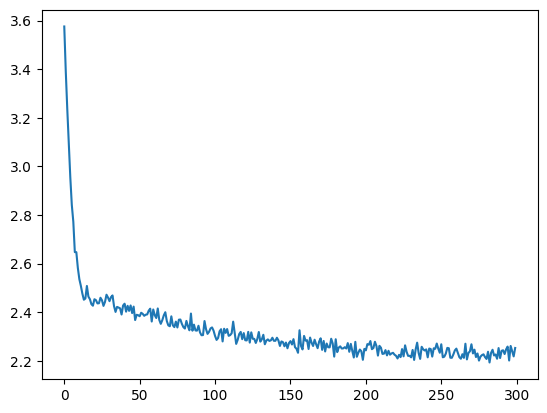

node: right_knee
Epoch [10], Loss: 0.1361
Epoch [20], Loss: 0.0577
Epoch [30], Loss: 0.0341
Epoch [40], Loss: 0.0231
Epoch [50], Loss: 0.0173
Epoch [60], Loss: 0.0135
Epoch [70], Loss: 0.0109
Epoch [80], Loss: 0.0091
Epoch [90], Loss: 0.0079
Epoch [100], Loss: 0.0070
Epoch [110], Loss: 0.0061
Epoch [120], Loss: 0.0056
Epoch [130], Loss: 0.0050
Epoch [140], Loss: 0.0046
Epoch [150], Loss: 0.0042
Epoch [160], Loss: 0.0040
Epoch [170], Loss: 0.0037
Epoch [180], Loss: 0.0035
Epoch [190], Loss: 0.0033
Epoch [200], Loss: 0.0031
Epoch [210], Loss: 0.0030
Epoch [220], Loss: 0.0029
Epoch [230], Loss: 0.0028
Epoch [240], Loss: 0.0027
Epoch [250], Loss: 0.0026
Epoch [260], Loss: 0.0025
Epoch [270], Loss: 0.0024
Epoch [280], Loss: 0.0025
Epoch [290], Loss: 0.0023
Epoch [300], Loss: 0.0023


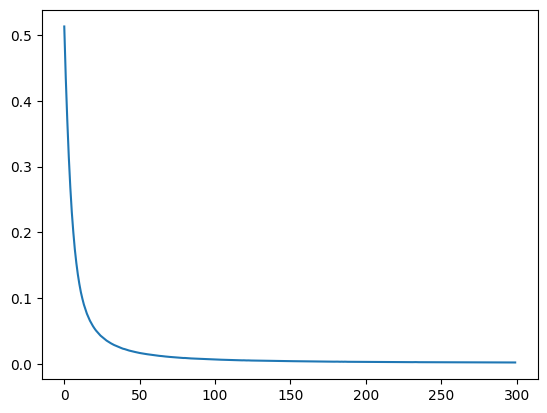

node: left_knee
Epoch [10], Loss: 0.3575
Epoch [20], Loss: 0.1463
Epoch [30], Loss: 0.0837
Epoch [40], Loss: 0.0555
Epoch [50], Loss: 0.0402
Epoch [60], Loss: 0.0305
Epoch [70], Loss: 0.0241
Epoch [80], Loss: 0.0197
Epoch [90], Loss: 0.0163
Epoch [100], Loss: 0.0139
Epoch [110], Loss: 0.0119
Epoch [120], Loss: 0.0103
Epoch [130], Loss: 0.0091
Epoch [140], Loss: 0.0081
Epoch [150], Loss: 0.0072
Epoch [160], Loss: 0.0065
Epoch [170], Loss: 0.0058
Epoch [180], Loss: 0.0053
Epoch [190], Loss: 0.0049
Epoch [200], Loss: 0.0045
Epoch [210], Loss: 0.0041
Epoch [220], Loss: 0.0038
Epoch [230], Loss: 0.0035
Epoch [240], Loss: 0.0033
Epoch [250], Loss: 0.0031
Epoch [260], Loss: 0.0029
Epoch [270], Loss: 0.0027
Epoch [280], Loss: 0.0025
Epoch [290], Loss: 0.0024
Epoch [300], Loss: 0.0023


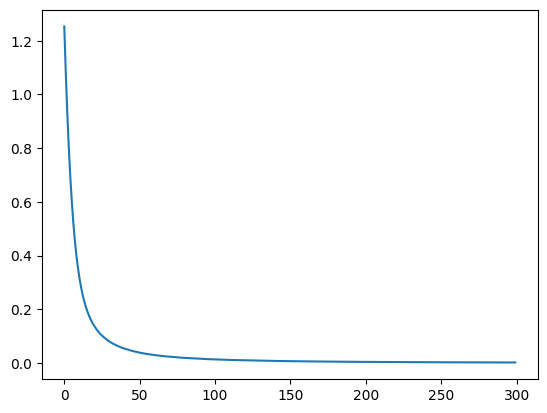

node: right_ankle
Epoch [10], Loss: 0.0886
Epoch [20], Loss: 0.0416
Epoch [30], Loss: 0.0281
Epoch [40], Loss: 0.0218
Epoch [50], Loss: 0.0190
Epoch [60], Loss: 0.0164
Epoch [70], Loss: 0.0151
Epoch [80], Loss: 0.0141
Epoch [90], Loss: 0.0135
Epoch [100], Loss: 0.0130
Epoch [110], Loss: 0.0124
Epoch [120], Loss: 0.0123
Epoch [130], Loss: 0.0120
Epoch [140], Loss: 0.0117
Epoch [150], Loss: 0.0117
Epoch [160], Loss: 0.0114
Epoch [170], Loss: 0.0116
Epoch [180], Loss: 0.0113
Epoch [190], Loss: 0.0112
Epoch [200], Loss: 0.0110
Epoch [210], Loss: 0.0111
Epoch [220], Loss: 0.0109
Epoch [230], Loss: 0.0117
Epoch [240], Loss: 0.0108
Epoch [250], Loss: 0.0110
Epoch [260], Loss: 0.0107
Epoch [270], Loss: 0.0109
Epoch [280], Loss: 0.0109
Epoch [290], Loss: 0.0107
Epoch [300], Loss: 0.0109


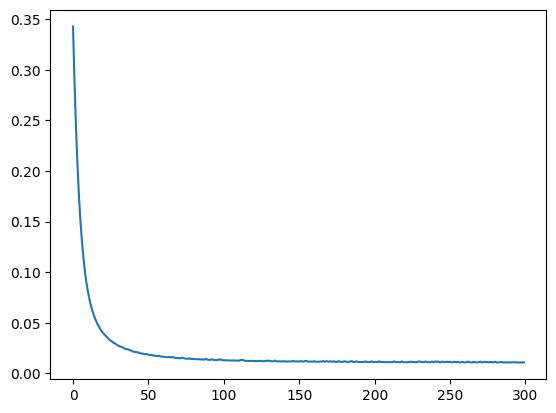

node: left_ankle
Epoch [10], Loss: 3.6795
Epoch [20], Loss: 1.4059
Epoch [30], Loss: 0.6736
Epoch [40], Loss: 0.3965
Epoch [50], Loss: 0.2662
Epoch [60], Loss: 0.1910
Epoch [70], Loss: 0.1468
Epoch [80], Loss: 0.1168
Epoch [90], Loss: 0.0960
Epoch [100], Loss: 0.0798
Epoch [110], Loss: 0.0682
Epoch [120], Loss: 0.0589
Epoch [130], Loss: 0.0519
Epoch [140], Loss: 0.0461
Epoch [150], Loss: 0.0412
Epoch [160], Loss: 0.0372
Epoch [170], Loss: 0.0338
Epoch [180], Loss: 0.0308
Epoch [190], Loss: 0.0285
Epoch [200], Loss: 0.0263
Epoch [210], Loss: 0.0245
Epoch [220], Loss: 0.0228
Epoch [230], Loss: 0.0215
Epoch [240], Loss: 0.0202
Epoch [250], Loss: 0.0191
Epoch [260], Loss: 0.0180
Epoch [270], Loss: 0.0171
Epoch [280], Loss: 0.0165
Epoch [290], Loss: 0.0155
Epoch [300], Loss: 0.0148


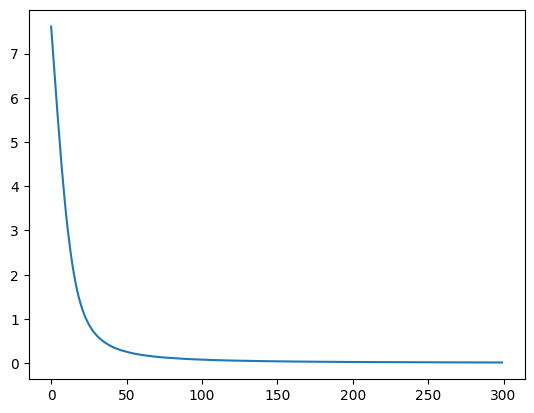

node: right_eye
Epoch [10], Loss: 0.0507
Epoch [20], Loss: 0.0504
Epoch [30], Loss: 0.0496
Epoch [40], Loss: 0.0491
Epoch [50], Loss: 0.0487
Epoch [60], Loss: 0.0492
Epoch [70], Loss: 0.0486
Epoch [80], Loss: 0.0485
Epoch [90], Loss: 0.0488
Epoch [100], Loss: 0.0491
Epoch [110], Loss: 0.0482
Epoch [120], Loss: 0.0492
Epoch [130], Loss: 0.0490
Epoch [140], Loss: 0.0483
Epoch [150], Loss: 0.0492
Epoch [160], Loss: 0.0487
Epoch [170], Loss: 0.0482
Epoch [180], Loss: 0.0484
Epoch [190], Loss: 0.0493
Epoch [200], Loss: 0.0485
Epoch [210], Loss: 0.0485
Epoch [220], Loss: 0.0485
Epoch [230], Loss: 0.0486
Epoch [240], Loss: 0.0487
Epoch [250], Loss: 0.0485
Epoch [260], Loss: 0.0483
Epoch [270], Loss: 0.0482
Epoch [280], Loss: 0.0487
Epoch [290], Loss: 0.0489
Epoch [300], Loss: 0.0492


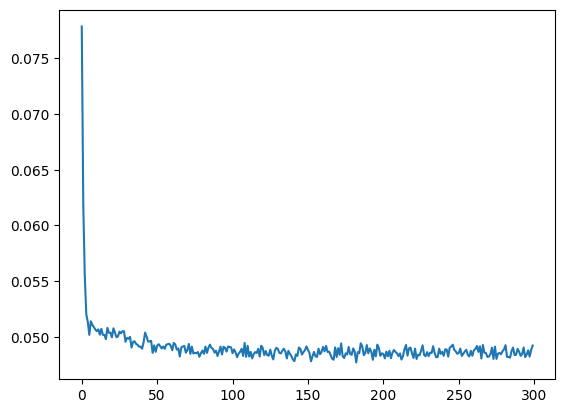

node: left_eye
Epoch [10], Loss: 1.5238
Epoch [20], Loss: 0.4239
Epoch [30], Loss: 0.1789
Epoch [40], Loss: 0.1071
Epoch [50], Loss: 0.0805
Epoch [60], Loss: 0.0676
Epoch [70], Loss: 0.0630
Epoch [80], Loss: 0.0602
Epoch [90], Loss: 0.0583
Epoch [100], Loss: 0.0604
Epoch [110], Loss: 0.0595
Epoch [120], Loss: 0.0589
Epoch [130], Loss: 0.0588
Epoch [140], Loss: 0.0563
Epoch [150], Loss: 0.0557
Epoch [160], Loss: 0.0554
Epoch [170], Loss: 0.0572
Epoch [180], Loss: 0.0546
Epoch [190], Loss: 0.0546
Epoch [200], Loss: 0.0536
Epoch [210], Loss: 0.0535
Epoch [220], Loss: 0.0529
Epoch [230], Loss: 0.0549
Epoch [240], Loss: 0.0532
Epoch [250], Loss: 0.0539
Epoch [260], Loss: 0.0517
Epoch [270], Loss: 0.0516
Epoch [280], Loss: 0.0509
Epoch [290], Loss: 0.0517
Epoch [300], Loss: 0.0513


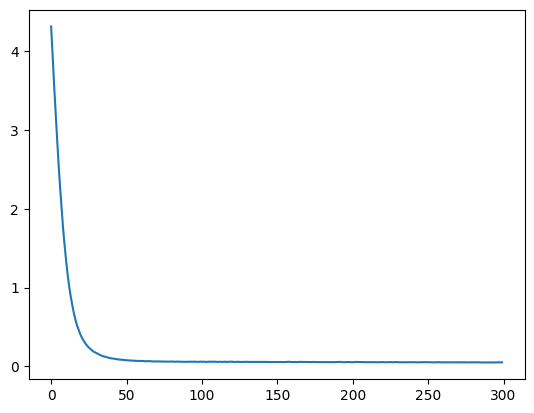

node: right_ear
Epoch [10], Loss: 1.6724
Epoch [20], Loss: 0.9264
Epoch [30], Loss: 0.8593
Epoch [40], Loss: 0.8378
Epoch [50], Loss: 0.8445
Epoch [60], Loss: 0.8581
Epoch [70], Loss: 0.8581
Epoch [80], Loss: 0.8569
Epoch [90], Loss: 0.8473
Epoch [100], Loss: 0.8580
Epoch [110], Loss: 0.8394
Epoch [120], Loss: 0.8449
Epoch [130], Loss: 0.8527
Epoch [140], Loss: 0.8586
Epoch [150], Loss: 0.8548
Epoch [160], Loss: 0.8544
Epoch [170], Loss: 0.8462
Epoch [180], Loss: 0.8579
Epoch [190], Loss: 0.8570
Epoch [200], Loss: 0.8486
Epoch [210], Loss: 0.8462
Epoch [220], Loss: 0.8453
Epoch [230], Loss: 0.8613
Epoch [240], Loss: 0.8531
Epoch [250], Loss: 0.8547
Epoch [260], Loss: 0.8592
Epoch [270], Loss: 0.8618
Epoch [280], Loss: 0.8602
Epoch [290], Loss: 0.8501
Epoch [300], Loss: 0.8551


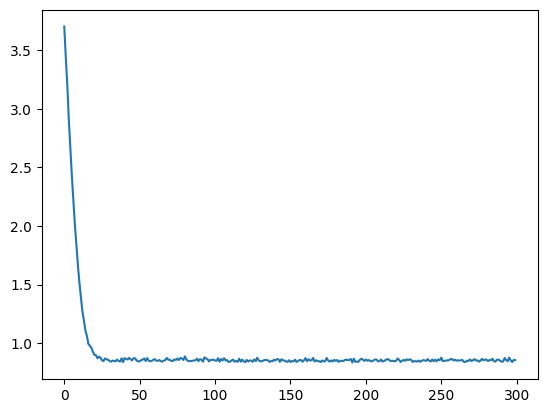

node: left_ear
Epoch [10], Loss: 0.7634
Epoch [20], Loss: 0.7427
Epoch [30], Loss: 0.7230
Epoch [40], Loss: 0.7149
Epoch [50], Loss: 0.7130
Epoch [60], Loss: 0.7014
Epoch [70], Loss: 0.6990
Epoch [80], Loss: 0.6879
Epoch [90], Loss: 0.6827
Epoch [100], Loss: 0.6789
Epoch [110], Loss: 0.6731
Epoch [120], Loss: 0.6647
Epoch [130], Loss: 0.6706
Epoch [140], Loss: 0.6664
Epoch [150], Loss: 0.6643
Epoch [160], Loss: 0.6589
Epoch [170], Loss: 0.6650
Epoch [180], Loss: 0.6601
Epoch [190], Loss: 0.6526
Epoch [200], Loss: 0.6601
Epoch [210], Loss: 0.6637
Epoch [220], Loss: 0.6539
Epoch [230], Loss: 0.6547
Epoch [240], Loss: 0.6504
Epoch [250], Loss: 0.6536
Epoch [260], Loss: 0.6604
Epoch [270], Loss: 0.6558
Epoch [280], Loss: 0.6622
Epoch [290], Loss: 0.6538
Epoch [300], Loss: 0.6555


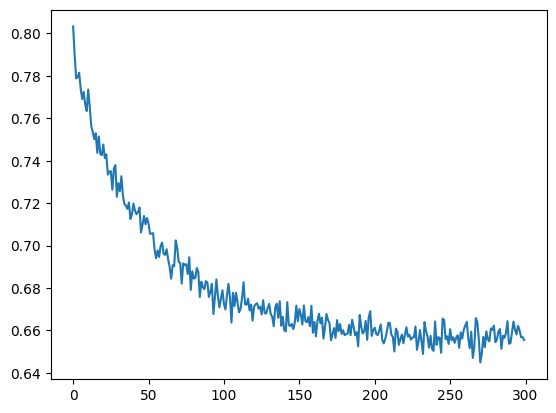

=== anger ===
node: nose
Epoch [10], Loss: 0.0596
Epoch [20], Loss: 0.0284
Epoch [30], Loss: 0.0203
Epoch [40], Loss: 0.0167
Epoch [50], Loss: 0.0149
Epoch [60], Loss: 0.0140
Epoch [70], Loss: 0.0135
Epoch [80], Loss: 0.0133
Epoch [90], Loss: 0.0132
Epoch [100], Loss: 0.0129
Epoch [110], Loss: 0.0126
Epoch [120], Loss: 0.0127
Epoch [130], Loss: 0.0124
Epoch [140], Loss: 0.0123
Epoch [150], Loss: 0.0127
Epoch [160], Loss: 0.0125
Epoch [170], Loss: 0.0123
Epoch [180], Loss: 0.0125
Epoch [190], Loss: 0.0125
Epoch [200], Loss: 0.0126
Epoch [210], Loss: 0.0127
Epoch [220], Loss: 0.0127
Epoch [230], Loss: 0.0127
Epoch [240], Loss: 0.0123
Epoch [250], Loss: 0.0126
Epoch [260], Loss: 0.0128
Epoch [270], Loss: 0.0122
Epoch [280], Loss: 0.0128
Epoch [290], Loss: 0.0128
Epoch [300], Loss: 0.0127


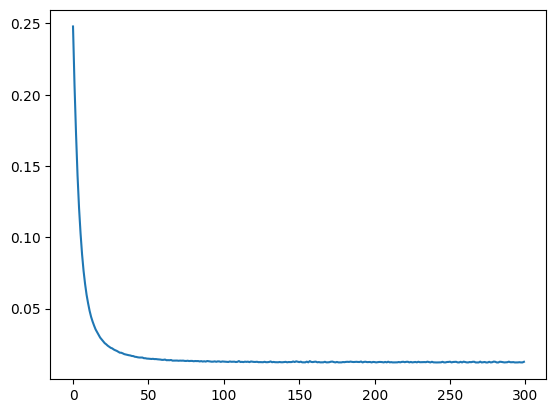

node: right_shoulder
Epoch [10], Loss: 0.1943
Epoch [20], Loss: 0.0613
Epoch [30], Loss: 0.0583
Epoch [40], Loss: 0.0564
Epoch [50], Loss: 0.0561
Epoch [60], Loss: 0.0515
Epoch [70], Loss: 0.0491
Epoch [80], Loss: 0.0468
Epoch [90], Loss: 0.0442
Epoch [100], Loss: 0.0449
Epoch [110], Loss: 0.0406
Epoch [120], Loss: 0.0392
Epoch [130], Loss: 0.0399
Epoch [140], Loss: 0.0363
Epoch [150], Loss: 0.0351
Epoch [160], Loss: 0.0343
Epoch [170], Loss: 0.0338
Epoch [180], Loss: 0.0328
Epoch [190], Loss: 0.0322
Epoch [200], Loss: 0.0317
Epoch [210], Loss: 0.0339
Epoch [220], Loss: 0.0313
Epoch [230], Loss: 0.0311
Epoch [240], Loss: 0.0331
Epoch [250], Loss: 0.0331
Epoch [260], Loss: 0.0305
Epoch [270], Loss: 0.0328
Epoch [280], Loss: 0.0304
Epoch [290], Loss: 0.0301
Epoch [300], Loss: 0.0304


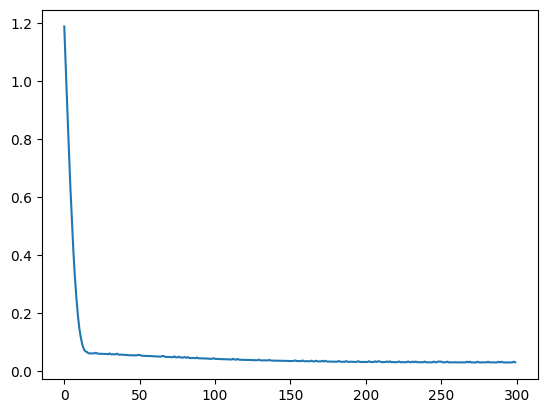

node: left_shoulder
Epoch [10], Loss: 0.4988
Epoch [20], Loss: 0.0420
Epoch [30], Loss: 0.0383
Epoch [40], Loss: 0.0375
Epoch [50], Loss: 0.0374
Epoch [60], Loss: 0.0374
Epoch [70], Loss: 0.0372
Epoch [80], Loss: 0.0372
Epoch [90], Loss: 0.0397
Epoch [100], Loss: 0.0371
Epoch [110], Loss: 0.0371
Epoch [120], Loss: 0.0394
Epoch [130], Loss: 0.0368
Epoch [140], Loss: 0.0390
Epoch [150], Loss: 0.0391
Epoch [160], Loss: 0.0391
Epoch [170], Loss: 0.0363
Epoch [180], Loss: 0.0365
Epoch [190], Loss: 0.0362
Epoch [200], Loss: 0.0367
Epoch [210], Loss: 0.0366
Epoch [220], Loss: 0.0362
Epoch [230], Loss: 0.0364
Epoch [240], Loss: 0.0364
Epoch [250], Loss: 0.0363
Epoch [260], Loss: 0.0390
Epoch [270], Loss: 0.0363
Epoch [280], Loss: 0.0363
Epoch [290], Loss: 0.0363
Epoch [300], Loss: 0.0363


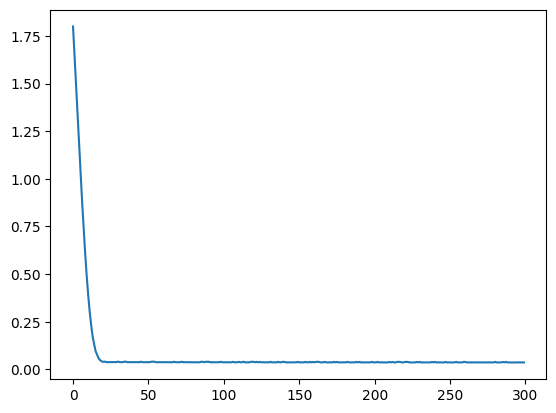

node: right_thigh
Epoch [10], Loss: 0.7634
Epoch [20], Loss: 0.2924
Epoch [30], Loss: 0.1571
Epoch [40], Loss: 0.1000
Epoch [50], Loss: 0.0703
Epoch [60], Loss: 0.0526
Epoch [70], Loss: 0.0414
Epoch [80], Loss: 0.0340
Epoch [90], Loss: 0.0281
Epoch [100], Loss: 0.0242
Epoch [110], Loss: 0.0212
Epoch [120], Loss: 0.0188
Epoch [130], Loss: 0.0170
Epoch [140], Loss: 0.0155
Epoch [150], Loss: 0.0143
Epoch [160], Loss: 0.0133
Epoch [170], Loss: 0.0130
Epoch [180], Loss: 0.0118
Epoch [190], Loss: 0.0112
Epoch [200], Loss: 0.0113
Epoch [210], Loss: 0.0103
Epoch [220], Loss: 0.0100
Epoch [230], Loss: 0.0102
Epoch [240], Loss: 0.0094
Epoch [250], Loss: 0.0091
Epoch [260], Loss: 0.0089
Epoch [270], Loss: 0.0087
Epoch [280], Loss: 0.0086
Epoch [290], Loss: 0.0084
Epoch [300], Loss: 0.0083


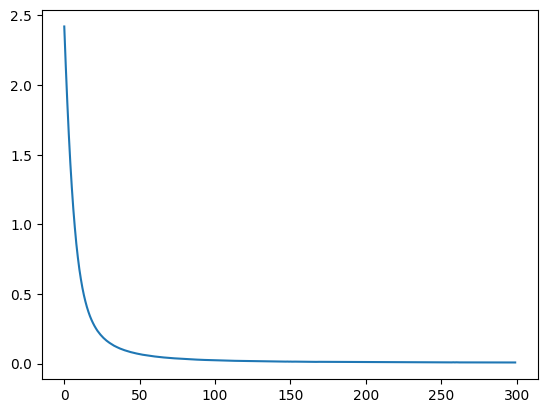

node: left_thigh
Epoch [10], Loss: 0.0677
Epoch [20], Loss: 0.0265
Epoch [30], Loss: 0.0147
Epoch [40], Loss: 0.0095
Epoch [50], Loss: 0.0066
Epoch [60], Loss: 0.0049
Epoch [70], Loss: 0.0037
Epoch [80], Loss: 0.0030
Epoch [90], Loss: 0.0025
Epoch [100], Loss: 0.0021
Epoch [110], Loss: 0.0018
Epoch [120], Loss: 0.0015
Epoch [130], Loss: 0.0013
Epoch [140], Loss: 0.0012
Epoch [150], Loss: 0.0011
Epoch [160], Loss: 0.0010
Epoch [170], Loss: 0.0010
Epoch [180], Loss: 0.0009
Epoch [190], Loss: 0.0008
Epoch [200], Loss: 0.0008
Epoch [210], Loss: 0.0007
Epoch [220], Loss: 0.0007
Epoch [230], Loss: 0.0007
Epoch [240], Loss: 0.0007
Epoch [250], Loss: 0.0006
Epoch [260], Loss: 0.0006
Epoch [270], Loss: 0.0006
Epoch [280], Loss: 0.0006
Epoch [290], Loss: 0.0006
Epoch [300], Loss: 0.0006


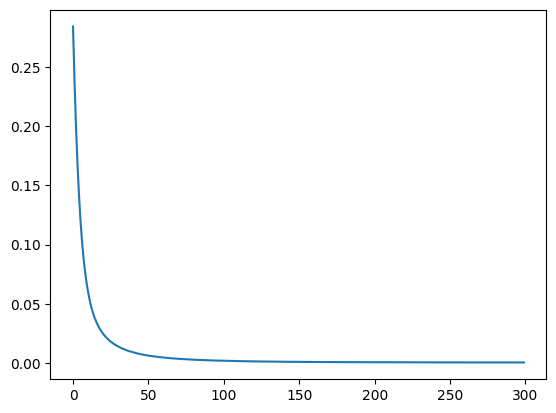

node: right_elbow
Epoch [10], Loss: 1.4156
Epoch [20], Loss: 1.3563
Epoch [30], Loss: 1.4083
Epoch [40], Loss: 1.3671
Epoch [50], Loss: 1.3797
Epoch [60], Loss: 1.3789
Epoch [70], Loss: 1.3905
Epoch [80], Loss: 1.3870
Epoch [90], Loss: 1.4144
Epoch [100], Loss: 1.3854
Epoch [110], Loss: 1.3745
Epoch [120], Loss: 1.3744
Epoch [130], Loss: 1.3968
Epoch [140], Loss: 1.3439
Epoch [150], Loss: 1.3443
Epoch [160], Loss: 1.3684
Epoch [170], Loss: 1.4232
Epoch [180], Loss: 1.3937
Epoch [190], Loss: 1.3540
Epoch [200], Loss: 1.3960
Epoch [210], Loss: 1.3802
Epoch [220], Loss: 1.3790
Epoch [230], Loss: 1.3947
Epoch [240], Loss: 1.3626
Epoch [250], Loss: 1.3388
Epoch [260], Loss: 1.3649
Epoch [270], Loss: 1.3379
Epoch [280], Loss: 1.3636
Epoch [290], Loss: 1.3371
Epoch [300], Loss: 1.3634


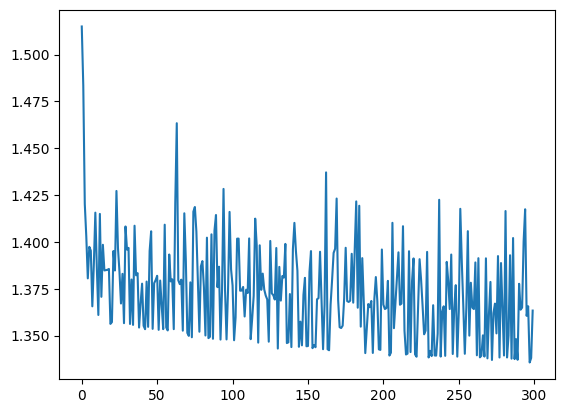

node: left_elbow
Epoch [10], Loss: 3.1192
Epoch [20], Loss: 1.8659
Epoch [30], Loss: 1.5660
Epoch [40], Loss: 1.5101
Epoch [50], Loss: 1.4946
Epoch [60], Loss: 1.4389
Epoch [70], Loss: 1.4315
Epoch [80], Loss: 1.4585
Epoch [90], Loss: 1.4514
Epoch [100], Loss: 1.4511
Epoch [110], Loss: 1.4308
Epoch [120], Loss: 1.4307
Epoch [130], Loss: 1.4823
Epoch [140], Loss: 1.4527
Epoch [150], Loss: 1.4575
Epoch [160], Loss: 1.4778
Epoch [170], Loss: 1.4583
Epoch [180], Loss: 1.4307
Epoch [190], Loss: 1.4326
Epoch [200], Loss: 1.4847
Epoch [210], Loss: 1.4305
Epoch [220], Loss: 1.4519
Epoch [230], Loss: 1.4553
Epoch [240], Loss: 1.4575
Epoch [250], Loss: 1.4818
Epoch [260], Loss: 1.5360
Epoch [270], Loss: 1.4532
Epoch [280], Loss: 1.4553
Epoch [290], Loss: 1.4808
Epoch [300], Loss: 1.4571


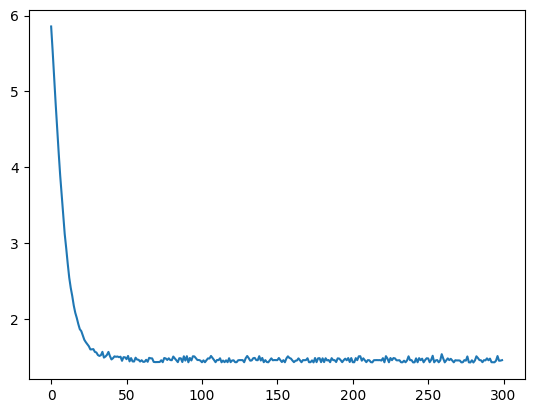

node: right_hand
Epoch [10], Loss: 2.3242
Epoch [20], Loss: 2.2749
Epoch [30], Loss: 2.3175
Epoch [40], Loss: 2.3207
Epoch [50], Loss: 2.3049
Epoch [60], Loss: 2.3115
Epoch [70], Loss: 2.3257
Epoch [80], Loss: 2.2778
Epoch [90], Loss: 2.2971
Epoch [100], Loss: 2.2927
Epoch [110], Loss: 2.2846
Epoch [120], Loss: 2.3012
Epoch [130], Loss: 2.3230
Epoch [140], Loss: 2.3190
Epoch [150], Loss: 2.3543
Epoch [160], Loss: 2.3678
Epoch [170], Loss: 2.3127
Epoch [180], Loss: 2.3570
Epoch [190], Loss: 2.2905
Epoch [200], Loss: 2.3326
Epoch [210], Loss: 2.3189
Epoch [220], Loss: 2.3570
Epoch [230], Loss: 2.2983
Epoch [240], Loss: 2.3140
Epoch [250], Loss: 2.4030
Epoch [260], Loss: 2.2749
Epoch [270], Loss: 2.2998
Epoch [280], Loss: 2.3373
Epoch [290], Loss: 2.2911
Epoch [300], Loss: 2.2922


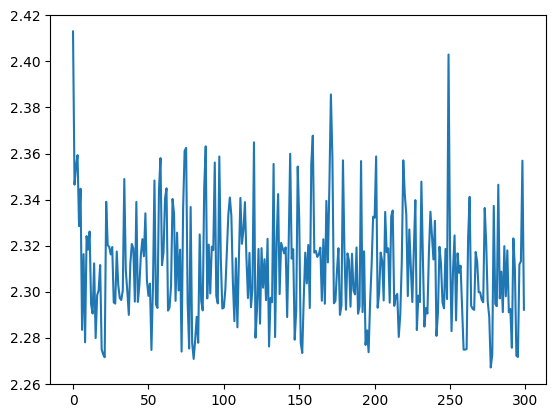

node: left_hand
Epoch [10], Loss: 2.4387
Epoch [20], Loss: 2.4128
Epoch [30], Loss: 2.4154
Epoch [40], Loss: 2.3888
Epoch [50], Loss: 2.3772
Epoch [60], Loss: 2.3654
Epoch [70], Loss: 2.4037
Epoch [80], Loss: 2.3688
Epoch [90], Loss: 2.3351
Epoch [100], Loss: 2.3505
Epoch [110], Loss: 2.3253
Epoch [120], Loss: 2.3159
Epoch [130], Loss: 2.3313
Epoch [140], Loss: 2.3106
Epoch [150], Loss: 2.3051
Epoch [160], Loss: 2.3199
Epoch [170], Loss: 2.2856
Epoch [180], Loss: 2.2886
Epoch [190], Loss: 2.3102
Epoch [200], Loss: 2.3024
Epoch [210], Loss: 2.2854
Epoch [220], Loss: 2.2894
Epoch [230], Loss: 2.3343
Epoch [240], Loss: 2.3044
Epoch [250], Loss: 2.2670
Epoch [260], Loss: 2.3027
Epoch [270], Loss: 2.2609
Epoch [280], Loss: 2.2453
Epoch [290], Loss: 2.2277
Epoch [300], Loss: 2.3022


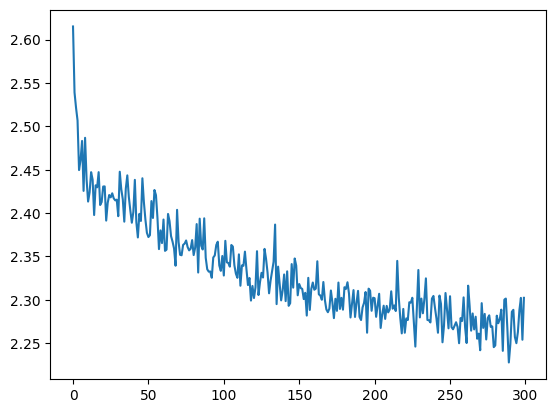

node: right_knee
Epoch [10], Loss: 0.0369
Epoch [20], Loss: 0.0162
Epoch [30], Loss: 0.0100
Epoch [40], Loss: 0.0072
Epoch [50], Loss: 0.0056
Epoch [60], Loss: 0.0047
Epoch [70], Loss: 0.0039
Epoch [80], Loss: 0.0036
Epoch [90], Loss: 0.0031
Epoch [100], Loss: 0.0028
Epoch [110], Loss: 0.0026
Epoch [120], Loss: 0.0025
Epoch [130], Loss: 0.0023
Epoch [140], Loss: 0.0023
Epoch [150], Loss: 0.0023
Epoch [160], Loss: 0.0021
Epoch [170], Loss: 0.0021
Epoch [180], Loss: 0.0020
Epoch [190], Loss: 0.0020
Epoch [200], Loss: 0.0019
Epoch [210], Loss: 0.0018
Epoch [220], Loss: 0.0018
Epoch [230], Loss: 0.0018
Epoch [240], Loss: 0.0018
Epoch [250], Loss: 0.0019
Epoch [260], Loss: 0.0019
Epoch [270], Loss: 0.0017
Epoch [280], Loss: 0.0017
Epoch [290], Loss: 0.0017
Epoch [300], Loss: 0.0018


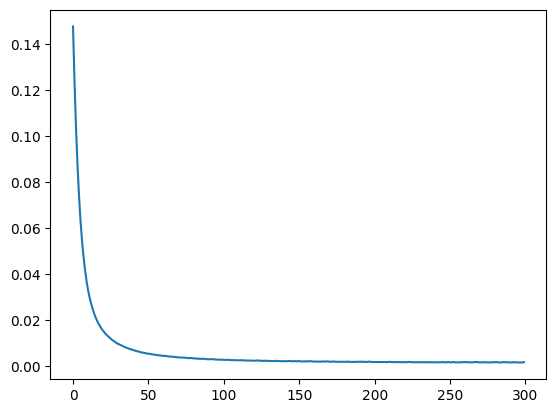

node: left_knee
Epoch [10], Loss: 8.5697
Epoch [20], Loss: 3.7146
Epoch [30], Loss: 1.3839
Epoch [40], Loss: 0.6773
Epoch [50], Loss: 0.4099
Epoch [60], Loss: 0.2800
Epoch [70], Loss: 0.2061
Epoch [80], Loss: 0.1591
Epoch [90], Loss: 0.1271
Epoch [100], Loss: 0.1048
Epoch [110], Loss: 0.0878
Epoch [120], Loss: 0.0750
Epoch [130], Loss: 0.0648
Epoch [140], Loss: 0.0564
Epoch [150], Loss: 0.0498
Epoch [160], Loss: 0.0444
Epoch [170], Loss: 0.0398
Epoch [180], Loss: 0.0359
Epoch [190], Loss: 0.0325
Epoch [200], Loss: 0.0296
Epoch [210], Loss: 0.0270
Epoch [220], Loss: 0.0249
Epoch [230], Loss: 0.0229
Epoch [240], Loss: 0.0212
Epoch [250], Loss: 0.0197
Epoch [260], Loss: 0.0184
Epoch [270], Loss: 0.0172
Epoch [280], Loss: 0.0160
Epoch [290], Loss: 0.0150
Epoch [300], Loss: 0.0142


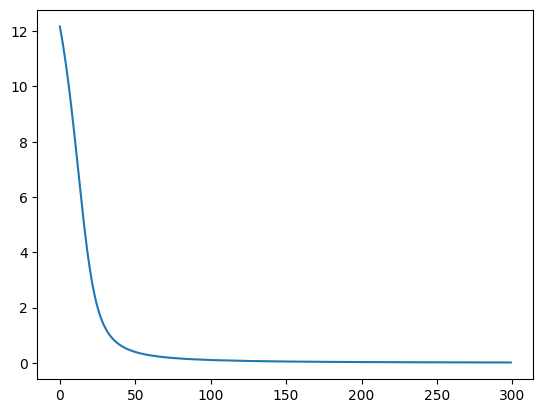

node: right_ankle
Epoch [10], Loss: 1.6086
Epoch [20], Loss: 0.6161
Epoch [30], Loss: 0.3205
Epoch [40], Loss: 0.2021
Epoch [50], Loss: 0.1408
Epoch [60], Loss: 0.1059
Epoch [70], Loss: 0.0832
Epoch [80], Loss: 0.0678
Epoch [90], Loss: 0.0566
Epoch [100], Loss: 0.0488
Epoch [110], Loss: 0.0426
Epoch [120], Loss: 0.0375
Epoch [130], Loss: 0.0338
Epoch [140], Loss: 0.0307
Epoch [150], Loss: 0.0280
Epoch [160], Loss: 0.0259
Epoch [170], Loss: 0.0244
Epoch [180], Loss: 0.0226
Epoch [190], Loss: 0.0212
Epoch [200], Loss: 0.0205
Epoch [210], Loss: 0.0193
Epoch [220], Loss: 0.0184
Epoch [230], Loss: 0.0176
Epoch [240], Loss: 0.0169
Epoch [250], Loss: 0.0167
Epoch [260], Loss: 0.0157
Epoch [270], Loss: 0.0158
Epoch [280], Loss: 0.0148
Epoch [290], Loss: 0.0145
Epoch [300], Loss: 0.0142


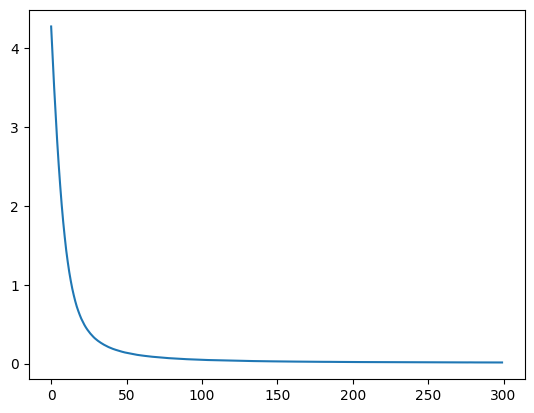

node: left_ankle
Epoch [10], Loss: 0.2055
Epoch [20], Loss: 0.0854
Epoch [30], Loss: 0.0502
Epoch [40], Loss: 0.0344
Epoch [50], Loss: 0.0258
Epoch [60], Loss: 0.0204
Epoch [70], Loss: 0.0169
Epoch [80], Loss: 0.0146
Epoch [90], Loss: 0.0126
Epoch [100], Loss: 0.0112
Epoch [110], Loss: 0.0102
Epoch [120], Loss: 0.0097
Epoch [130], Loss: 0.0087
Epoch [140], Loss: 0.0085
Epoch [150], Loss: 0.0078
Epoch [160], Loss: 0.0074
Epoch [170], Loss: 0.0071
Epoch [180], Loss: 0.0068
Epoch [190], Loss: 0.0067
Epoch [200], Loss: 0.0065
Epoch [210], Loss: 0.0062
Epoch [220], Loss: 0.0061
Epoch [230], Loss: 0.0061
Epoch [240], Loss: 0.0062
Epoch [250], Loss: 0.0059
Epoch [260], Loss: 0.0060
Epoch [270], Loss: 0.0056
Epoch [280], Loss: 0.0055
Epoch [290], Loss: 0.0057
Epoch [300], Loss: 0.0054


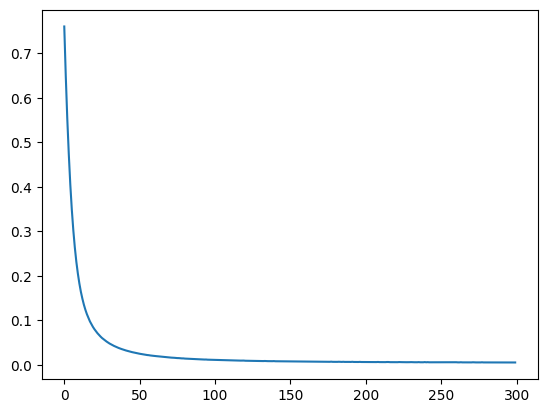

node: right_eye
Epoch [10], Loss: 1.2752
Epoch [20], Loss: 0.3399
Epoch [30], Loss: 0.1319
Epoch [40], Loss: 0.0762
Epoch [50], Loss: 0.0594
Epoch [60], Loss: 0.0522
Epoch [70], Loss: 0.0508
Epoch [80], Loss: 0.0492
Epoch [90], Loss: 0.0496
Epoch [100], Loss: 0.0495
Epoch [110], Loss: 0.0487
Epoch [120], Loss: 0.0478
Epoch [130], Loss: 0.0493
Epoch [140], Loss: 0.0487
Epoch [150], Loss: 0.0483
Epoch [160], Loss: 0.0478
Epoch [170], Loss: 0.0483
Epoch [180], Loss: 0.0497
Epoch [190], Loss: 0.0478
Epoch [200], Loss: 0.0480
Epoch [210], Loss: 0.0482
Epoch [220], Loss: 0.0478
Epoch [230], Loss: 0.0479
Epoch [240], Loss: 0.0480
Epoch [250], Loss: 0.0484
Epoch [260], Loss: 0.0483
Epoch [270], Loss: 0.0480
Epoch [280], Loss: 0.0486
Epoch [290], Loss: 0.0480
Epoch [300], Loss: 0.0487


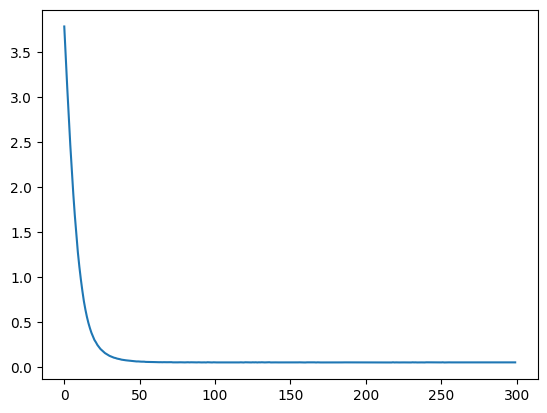

node: left_eye
Epoch [10], Loss: 0.0695
Epoch [20], Loss: 0.0555
Epoch [30], Loss: 0.0575
Epoch [40], Loss: 0.0552
Epoch [50], Loss: 0.0549
Epoch [60], Loss: 0.0552
Epoch [70], Loss: 0.0567
Epoch [80], Loss: 0.0542
Epoch [90], Loss: 0.0543
Epoch [100], Loss: 0.0547
Epoch [110], Loss: 0.0563
Epoch [120], Loss: 0.0540
Epoch [130], Loss: 0.0538
Epoch [140], Loss: 0.0537
Epoch [150], Loss: 0.0540
Epoch [160], Loss: 0.0536
Epoch [170], Loss: 0.0542
Epoch [180], Loss: 0.0534
Epoch [190], Loss: 0.0535
Epoch [200], Loss: 0.0556
Epoch [210], Loss: 0.0537
Epoch [220], Loss: 0.0557
Epoch [230], Loss: 0.0534
Epoch [240], Loss: 0.0528
Epoch [250], Loss: 0.0531
Epoch [260], Loss: 0.0527
Epoch [270], Loss: 0.0532
Epoch [280], Loss: 0.0528
Epoch [290], Loss: 0.0536
Epoch [300], Loss: 0.0535


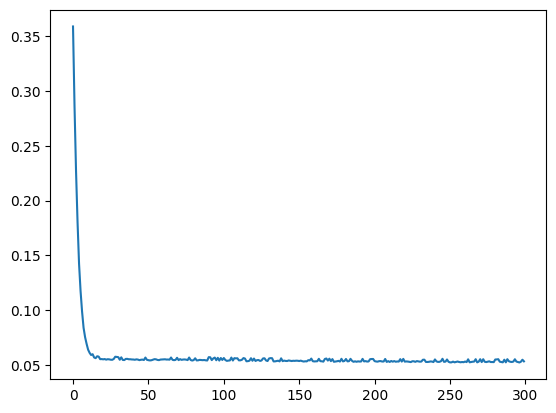

node: right_ear
Epoch [10], Loss: 2.5979
Epoch [20], Loss: 1.1439
Epoch [30], Loss: 0.8942
Epoch [40], Loss: 0.8804
Epoch [50], Loss: 0.8836
Epoch [60], Loss: 0.8620
Epoch [70], Loss: 0.8646
Epoch [80], Loss: 0.8683
Epoch [90], Loss: 0.8503
Epoch [100], Loss: 0.8550
Epoch [110], Loss: 0.8450
Epoch [120], Loss: 0.8641
Epoch [130], Loss: 0.8438
Epoch [140], Loss: 0.8388
Epoch [150], Loss: 0.8284
Epoch [160], Loss: 0.8266
Epoch [170], Loss: 0.8302
Epoch [180], Loss: 0.8329
Epoch [190], Loss: 0.8123
Epoch [200], Loss: 0.8325
Epoch [210], Loss: 0.8296
Epoch [220], Loss: 0.7987
Epoch [230], Loss: 0.8023
Epoch [240], Loss: 0.8006
Epoch [250], Loss: 0.8039
Epoch [260], Loss: 0.8055
Epoch [270], Loss: 0.7931
Epoch [280], Loss: 0.7850
Epoch [290], Loss: 0.7943
Epoch [300], Loss: 0.7835


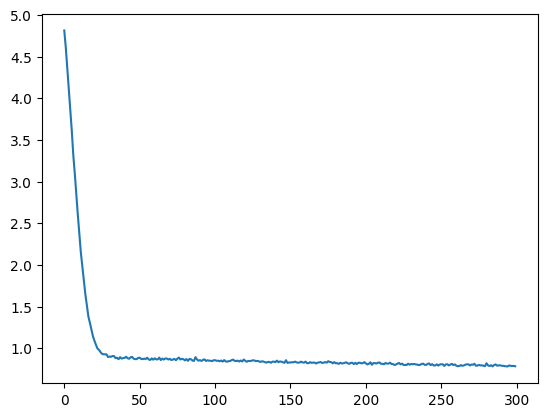

node: left_ear
Epoch [10], Loss: 1.1198
Epoch [20], Loss: 0.7556
Epoch [30], Loss: 0.7492
Epoch [40], Loss: 0.7431
Epoch [50], Loss: 0.7310
Epoch [60], Loss: 0.7276
Epoch [70], Loss: 0.7313
Epoch [80], Loss: 0.7187
Epoch [90], Loss: 0.7138
Epoch [100], Loss: 0.7040
Epoch [110], Loss: 0.6959
Epoch [120], Loss: 0.6916
Epoch [130], Loss: 0.6773
Epoch [140], Loss: 0.6792
Epoch [150], Loss: 0.6797
Epoch [160], Loss: 0.6741
Epoch [170], Loss: 0.6709
Epoch [180], Loss: 0.6658
Epoch [190], Loss: 0.6598
Epoch [200], Loss: 0.6638
Epoch [210], Loss: 0.6594
Epoch [220], Loss: 0.6594
Epoch [230], Loss: 0.6496
Epoch [240], Loss: 0.6485
Epoch [250], Loss: 0.6493
Epoch [260], Loss: 0.6465
Epoch [270], Loss: 0.6417
Epoch [280], Loss: 0.6417
Epoch [290], Loss: 0.6429
Epoch [300], Loss: 0.6414


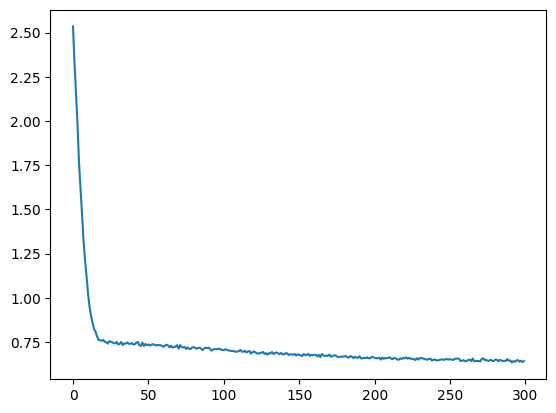

=== fear ===
node: nose
Epoch [10], Loss: 0.7810
Epoch [20], Loss: 0.2924
Epoch [30], Loss: 0.1568
Epoch [40], Loss: 0.1006
Epoch [50], Loss: 0.0714
Epoch [60], Loss: 0.0542
Epoch [70], Loss: 0.0438
Epoch [80], Loss: 0.0367
Epoch [90], Loss: 0.0314
Epoch [100], Loss: 0.0276
Epoch [110], Loss: 0.0248
Epoch [120], Loss: 0.0227
Epoch [130], Loss: 0.0209
Epoch [140], Loss: 0.0196
Epoch [150], Loss: 0.0185
Epoch [160], Loss: 0.0175
Epoch [170], Loss: 0.0167
Epoch [180], Loss: 0.0161
Epoch [190], Loss: 0.0156
Epoch [200], Loss: 0.0152
Epoch [210], Loss: 0.0149
Epoch [220], Loss: 0.0144
Epoch [230], Loss: 0.0142
Epoch [240], Loss: 0.0139
Epoch [250], Loss: 0.0138
Epoch [260], Loss: 0.0135
Epoch [270], Loss: 0.0136
Epoch [280], Loss: 0.0134
Epoch [290], Loss: 0.0133
Epoch [300], Loss: 0.0130


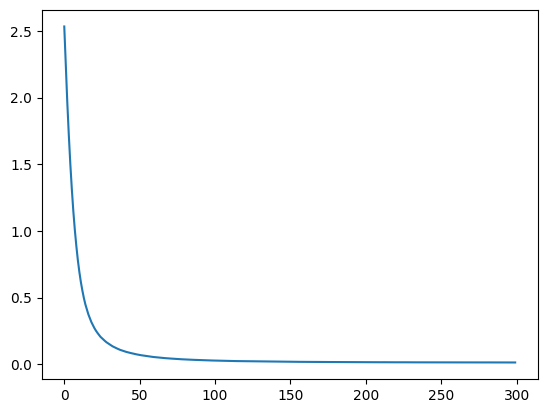

node: right_shoulder
Epoch [10], Loss: 0.0448
Epoch [20], Loss: 0.0423
Epoch [30], Loss: 0.0404
Epoch [40], Loss: 0.0378
Epoch [50], Loss: 0.0363
Epoch [60], Loss: 0.0351
Epoch [70], Loss: 0.0337
Epoch [80], Loss: 0.0327
Epoch [90], Loss: 0.0317
Epoch [100], Loss: 0.0335
Epoch [110], Loss: 0.0308
Epoch [120], Loss: 0.0309
Epoch [130], Loss: 0.0303
Epoch [140], Loss: 0.0306
Epoch [150], Loss: 0.0300
Epoch [160], Loss: 0.0300
Epoch [170], Loss: 0.0302
Epoch [180], Loss: 0.0301
Epoch [190], Loss: 0.0300
Epoch [200], Loss: 0.0323
Epoch [210], Loss: 0.0299
Epoch [220], Loss: 0.0300
Epoch [230], Loss: 0.0299
Epoch [240], Loss: 0.0324
Epoch [250], Loss: 0.0302
Epoch [260], Loss: 0.0323
Epoch [270], Loss: 0.0300
Epoch [280], Loss: 0.0303
Epoch [290], Loss: 0.0301
Epoch [300], Loss: 0.0300


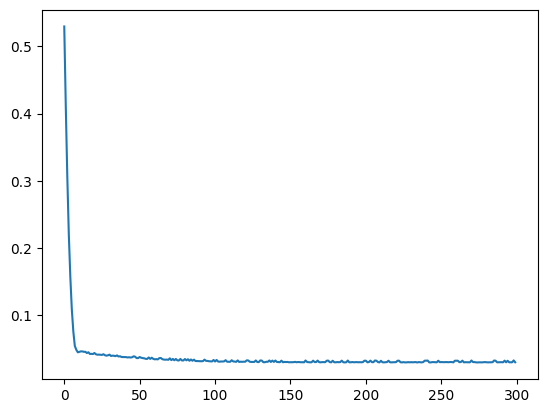

node: left_shoulder
Epoch [10], Loss: 0.0424
Epoch [20], Loss: 0.0373
Epoch [30], Loss: 0.0366
Epoch [40], Loss: 0.0380
Epoch [50], Loss: 0.0351
Epoch [60], Loss: 0.0359
Epoch [70], Loss: 0.0348
Epoch [80], Loss: 0.0348
Epoch [90], Loss: 0.0352
Epoch [100], Loss: 0.0352
Epoch [110], Loss: 0.0357
Epoch [120], Loss: 0.0350
Epoch [130], Loss: 0.0347
Epoch [140], Loss: 0.0346
Epoch [150], Loss: 0.0351
Epoch [160], Loss: 0.0351
Epoch [170], Loss: 0.0352
Epoch [180], Loss: 0.0371
Epoch [190], Loss: 0.0356
Epoch [200], Loss: 0.0372
Epoch [210], Loss: 0.0352
Epoch [220], Loss: 0.0351
Epoch [230], Loss: 0.0347
Epoch [240], Loss: 0.0373
Epoch [250], Loss: 0.0371
Epoch [260], Loss: 0.0372
Epoch [270], Loss: 0.0371
Epoch [280], Loss: 0.0373
Epoch [290], Loss: 0.0349
Epoch [300], Loss: 0.0370


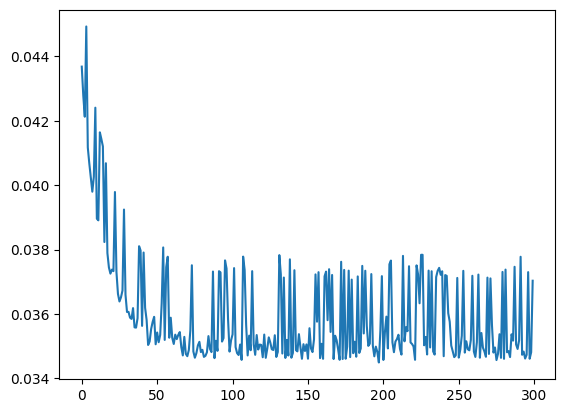

node: right_thigh
Epoch [10], Loss: 3.1491
Epoch [20], Loss: 1.1566
Epoch [30], Loss: 0.5499
Epoch [40], Loss: 0.3224
Epoch [50], Loss: 0.2150
Epoch [60], Loss: 0.1560
Epoch [70], Loss: 0.1181
Epoch [80], Loss: 0.0940
Epoch [90], Loss: 0.0765
Epoch [100], Loss: 0.0641
Epoch [110], Loss: 0.0551
Epoch [120], Loss: 0.0473
Epoch [130], Loss: 0.0420
Epoch [140], Loss: 0.0369
Epoch [150], Loss: 0.0333
Epoch [160], Loss: 0.0305
Epoch [170], Loss: 0.0278
Epoch [180], Loss: 0.0252
Epoch [190], Loss: 0.0236
Epoch [200], Loss: 0.0224
Epoch [210], Loss: 0.0205
Epoch [220], Loss: 0.0193
Epoch [230], Loss: 0.0188
Epoch [240], Loss: 0.0173
Epoch [250], Loss: 0.0164
Epoch [260], Loss: 0.0164
Epoch [270], Loss: 0.0150
Epoch [280], Loss: 0.0152
Epoch [290], Loss: 0.0140
Epoch [300], Loss: 0.0135


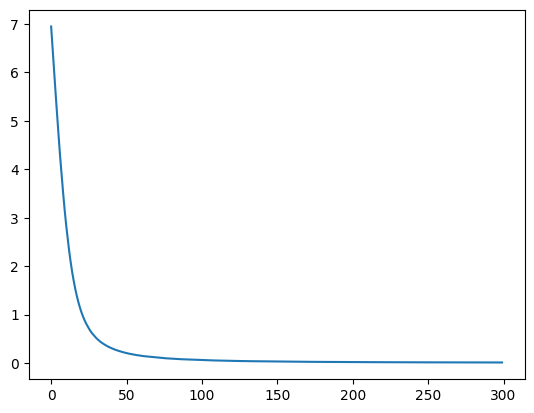

node: left_thigh
Epoch [10], Loss: 0.2039
Epoch [20], Loss: 0.0813
Epoch [30], Loss: 0.0459
Epoch [40], Loss: 0.0299
Epoch [50], Loss: 0.0211
Epoch [60], Loss: 0.0158
Epoch [70], Loss: 0.0122
Epoch [80], Loss: 0.0098
Epoch [90], Loss: 0.0080
Epoch [100], Loss: 0.0067
Epoch [110], Loss: 0.0057
Epoch [120], Loss: 0.0050
Epoch [130], Loss: 0.0043
Epoch [140], Loss: 0.0037
Epoch [150], Loss: 0.0033
Epoch [160], Loss: 0.0030
Epoch [170], Loss: 0.0027
Epoch [180], Loss: 0.0025
Epoch [190], Loss: 0.0023
Epoch [200], Loss: 0.0021
Epoch [210], Loss: 0.0019
Epoch [220], Loss: 0.0018
Epoch [230], Loss: 0.0017
Epoch [240], Loss: 0.0016
Epoch [250], Loss: 0.0015
Epoch [260], Loss: 0.0014
Epoch [270], Loss: 0.0013
Epoch [280], Loss: 0.0013
Epoch [290], Loss: 0.0012
Epoch [300], Loss: 0.0012


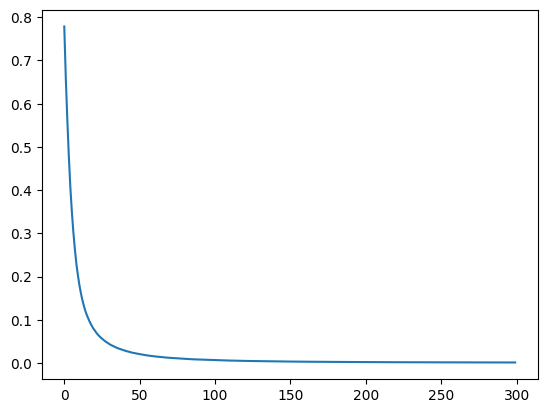

node: right_elbow
Epoch [10], Loss: 2.0125
Epoch [20], Loss: 1.4377
Epoch [30], Loss: 1.3484
Epoch [40], Loss: 1.2754
Epoch [50], Loss: 1.2616
Epoch [60], Loss: 1.2569
Epoch [70], Loss: 1.2847
Epoch [80], Loss: 1.2565
Epoch [90], Loss: 1.2721
Epoch [100], Loss: 1.2550
Epoch [110], Loss: 1.2396
Epoch [120], Loss: 1.2445
Epoch [130], Loss: 1.2348
Epoch [140], Loss: 1.2326
Epoch [150], Loss: 1.2023
Epoch [160], Loss: 1.2161
Epoch [170], Loss: 1.2067
Epoch [180], Loss: 1.2195
Epoch [190], Loss: 1.2173
Epoch [200], Loss: 1.1943
Epoch [210], Loss: 1.1804
Epoch [220], Loss: 1.1685
Epoch [230], Loss: 1.1605
Epoch [240], Loss: 1.1533
Epoch [250], Loss: 1.1570
Epoch [260], Loss: 1.1465
Epoch [270], Loss: 1.1313
Epoch [280], Loss: 1.1227
Epoch [290], Loss: 1.1139
Epoch [300], Loss: 1.0873


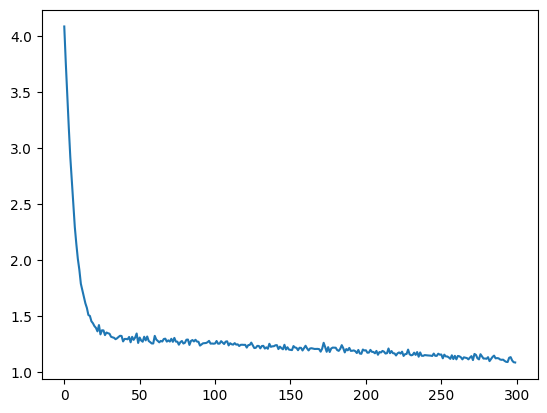

node: left_elbow
Epoch [10], Loss: 1.4151
Epoch [20], Loss: 1.3293
Epoch [30], Loss: 1.3199
Epoch [40], Loss: 1.3525
Epoch [50], Loss: 1.2916
Epoch [60], Loss: 1.3229
Epoch [70], Loss: 1.3029
Epoch [80], Loss: 1.2722
Epoch [90], Loss: 1.2523
Epoch [100], Loss: 1.2411
Epoch [110], Loss: 1.2251
Epoch [120], Loss: 1.2124
Epoch [130], Loss: 1.2209
Epoch [140], Loss: 1.1848
Epoch [150], Loss: 1.1523
Epoch [160], Loss: 1.1410
Epoch [170], Loss: 1.1464
Epoch [180], Loss: 1.1144
Epoch [190], Loss: 1.1107
Epoch [200], Loss: 1.1013
Epoch [210], Loss: 1.0925
Epoch [220], Loss: 1.1092
Epoch [230], Loss: 1.0994
Epoch [240], Loss: 1.0857
Epoch [250], Loss: 1.0835
Epoch [260], Loss: 1.0553
Epoch [270], Loss: 1.0486
Epoch [280], Loss: 1.0730
Epoch [290], Loss: 1.0599
Epoch [300], Loss: 1.0432


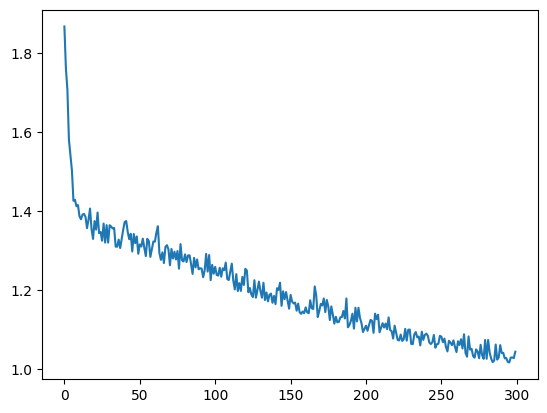

node: right_hand
Epoch [10], Loss: 3.9794
Epoch [20], Loss: 2.5875
Epoch [30], Loss: 2.3327
Epoch [40], Loss: 2.3089
Epoch [50], Loss: 2.2972
Epoch [60], Loss: 2.3051
Epoch [70], Loss: 2.2860
Epoch [80], Loss: 2.2540
Epoch [90], Loss: 2.2432
Epoch [100], Loss: 2.2215
Epoch [110], Loss: 2.2338
Epoch [120], Loss: 2.2242
Epoch [130], Loss: 2.1924
Epoch [140], Loss: 2.1642
Epoch [150], Loss: 2.1766
Epoch [160], Loss: 2.1608
Epoch [170], Loss: 2.1810
Epoch [180], Loss: 2.1567
Epoch [190], Loss: 2.1742
Epoch [200], Loss: 2.1434
Epoch [210], Loss: 2.1113
Epoch [220], Loss: 2.1279
Epoch [230], Loss: 2.1113
Epoch [240], Loss: 2.0924
Epoch [250], Loss: 2.0959
Epoch [260], Loss: 2.0889
Epoch [270], Loss: 2.0793
Epoch [280], Loss: 2.0783
Epoch [290], Loss: 2.0366
Epoch [300], Loss: 2.0276


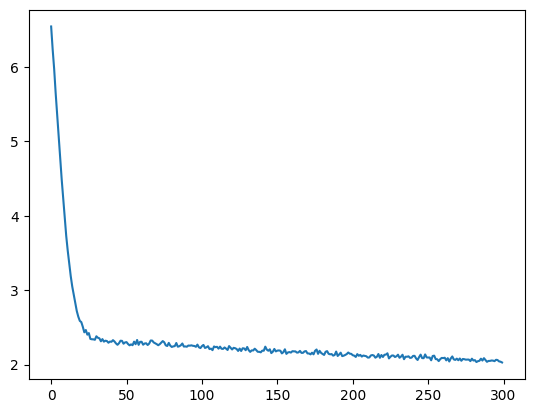

node: left_hand
Epoch [10], Loss: 2.6306
Epoch [20], Loss: 2.1502
Epoch [30], Loss: 2.0876
Epoch [40], Loss: 2.0988
Epoch [50], Loss: 2.0930
Epoch [60], Loss: 2.0604
Epoch [70], Loss: 2.0732
Epoch [80], Loss: 2.0467
Epoch [90], Loss: 2.0622
Epoch [100], Loss: 2.0324
Epoch [110], Loss: 2.0296
Epoch [120], Loss: 2.0063
Epoch [130], Loss: 2.0292
Epoch [140], Loss: 2.0061
Epoch [150], Loss: 2.0129
Epoch [160], Loss: 1.9740
Epoch [170], Loss: 1.9771
Epoch [180], Loss: 1.9606
Epoch [190], Loss: 1.9676
Epoch [200], Loss: 1.9878
Epoch [210], Loss: 1.9684
Epoch [220], Loss: 1.9560
Epoch [230], Loss: 1.9506
Epoch [240], Loss: 1.9348
Epoch [250], Loss: 1.9306
Epoch [260], Loss: 1.9291
Epoch [270], Loss: 1.9159
Epoch [280], Loss: 1.9150
Epoch [290], Loss: 1.9387
Epoch [300], Loss: 1.8971


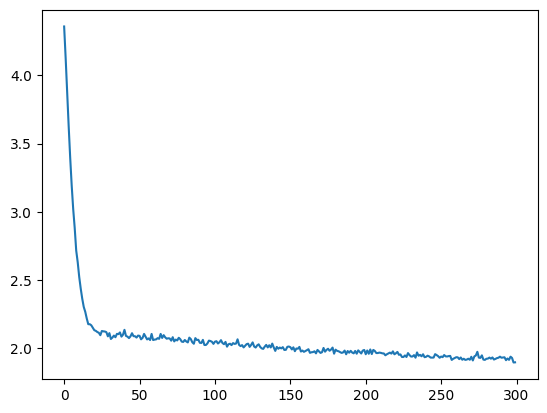

node: right_knee
Epoch [10], Loss: 7.0444
Epoch [20], Loss: 2.8681
Epoch [30], Loss: 1.1839
Epoch [40], Loss: 0.6309
Epoch [50], Loss: 0.3996
Epoch [60], Loss: 0.2768
Epoch [70], Loss: 0.2050
Epoch [80], Loss: 0.1613
Epoch [90], Loss: 0.1301
Epoch [100], Loss: 0.1061
Epoch [110], Loss: 0.0902
Epoch [120], Loss: 0.0770
Epoch [130], Loss: 0.0663
Epoch [140], Loss: 0.0581
Epoch [150], Loss: 0.0515
Epoch [160], Loss: 0.0462
Epoch [170], Loss: 0.0417
Epoch [180], Loss: 0.0374
Epoch [190], Loss: 0.0342
Epoch [200], Loss: 0.0312
Epoch [210], Loss: 0.0287
Epoch [220], Loss: 0.0263
Epoch [230], Loss: 0.0247
Epoch [240], Loss: 0.0227
Epoch [250], Loss: 0.0212
Epoch [260], Loss: 0.0199
Epoch [270], Loss: 0.0185
Epoch [280], Loss: 0.0173
Epoch [290], Loss: 0.0164
Epoch [300], Loss: 0.0156


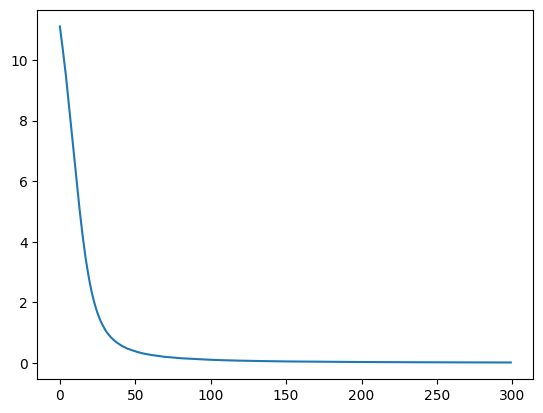

node: left_knee
Epoch [10], Loss: 0.1048
Epoch [20], Loss: 0.0441
Epoch [30], Loss: 0.0258
Epoch [40], Loss: 0.0175
Epoch [50], Loss: 0.0126
Epoch [60], Loss: 0.0097
Epoch [70], Loss: 0.0078
Epoch [80], Loss: 0.0064
Epoch [90], Loss: 0.0052
Epoch [100], Loss: 0.0045
Epoch [110], Loss: 0.0039
Epoch [120], Loss: 0.0034
Epoch [130], Loss: 0.0030
Epoch [140], Loss: 0.0026
Epoch [150], Loss: 0.0024
Epoch [160], Loss: 0.0022
Epoch [170], Loss: 0.0019
Epoch [180], Loss: 0.0018
Epoch [190], Loss: 0.0016
Epoch [200], Loss: 0.0015
Epoch [210], Loss: 0.0014
Epoch [220], Loss: 0.0013
Epoch [230], Loss: 0.0012
Epoch [240], Loss: 0.0012
Epoch [250], Loss: 0.0011
Epoch [260], Loss: 0.0010
Epoch [270], Loss: 0.0010
Epoch [280], Loss: 0.0009
Epoch [290], Loss: 0.0009
Epoch [300], Loss: 0.0008


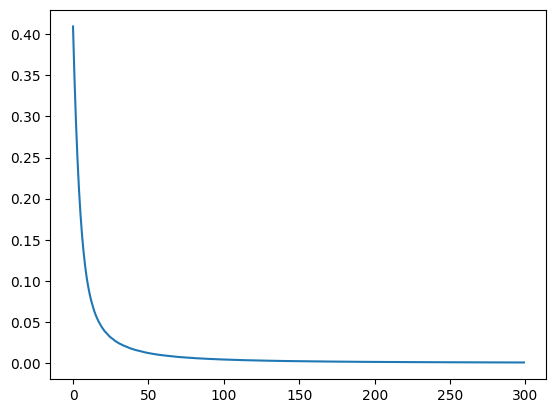

node: right_ankle
Epoch [10], Loss: 0.1625
Epoch [20], Loss: 0.0719
Epoch [30], Loss: 0.0450
Epoch [40], Loss: 0.0327
Epoch [50], Loss: 0.0262
Epoch [60], Loss: 0.0221
Epoch [70], Loss: 0.0193
Epoch [80], Loss: 0.0175
Epoch [90], Loss: 0.0162
Epoch [100], Loss: 0.0157
Epoch [110], Loss: 0.0143
Epoch [120], Loss: 0.0139
Epoch [130], Loss: 0.0133
Epoch [140], Loss: 0.0131
Epoch [150], Loss: 0.0126
Epoch [160], Loss: 0.0123
Epoch [170], Loss: 0.0127
Epoch [180], Loss: 0.0120
Epoch [190], Loss: 0.0117
Epoch [200], Loss: 0.0117
Epoch [210], Loss: 0.0115
Epoch [220], Loss: 0.0119
Epoch [230], Loss: 0.0122
Epoch [240], Loss: 0.0111
Epoch [250], Loss: 0.0111
Epoch [260], Loss: 0.0110
Epoch [270], Loss: 0.0119
Epoch [280], Loss: 0.0109
Epoch [290], Loss: 0.0110
Epoch [300], Loss: 0.0108


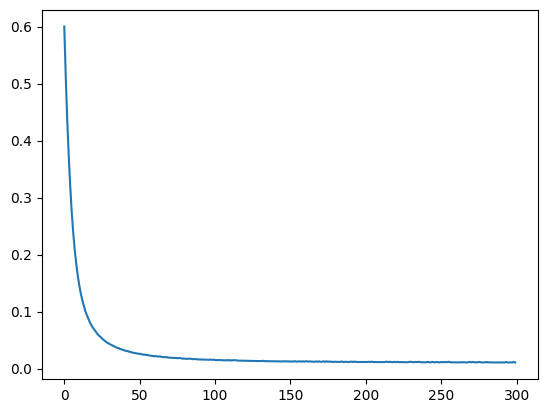

node: left_ankle
Epoch [10], Loss: 0.3511
Epoch [20], Loss: 0.1423
Epoch [30], Loss: 0.0818
Epoch [40], Loss: 0.0548
Epoch [50], Loss: 0.0403
Epoch [60], Loss: 0.0313
Epoch [70], Loss: 0.0255
Epoch [80], Loss: 0.0214
Epoch [90], Loss: 0.0183
Epoch [100], Loss: 0.0161
Epoch [110], Loss: 0.0143
Epoch [120], Loss: 0.0130
Epoch [130], Loss: 0.0119
Epoch [140], Loss: 0.0109
Epoch [150], Loss: 0.0103
Epoch [160], Loss: 0.0099
Epoch [170], Loss: 0.0091
Epoch [180], Loss: 0.0086
Epoch [190], Loss: 0.0083
Epoch [200], Loss: 0.0080
Epoch [210], Loss: 0.0076
Epoch [220], Loss: 0.0074
Epoch [230], Loss: 0.0074
Epoch [240], Loss: 0.0069
Epoch [250], Loss: 0.0068
Epoch [260], Loss: 0.0070
Epoch [270], Loss: 0.0064
Epoch [280], Loss: 0.0066
Epoch [290], Loss: 0.0065
Epoch [300], Loss: 0.0062


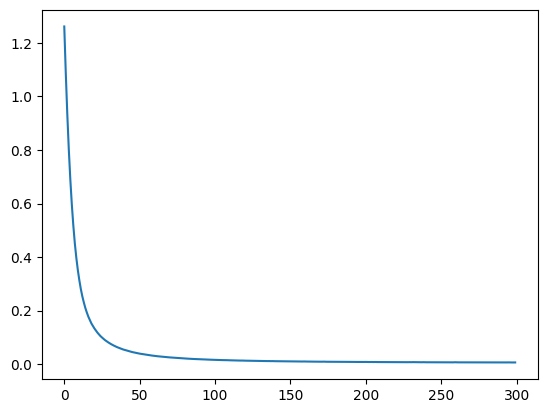

node: right_eye
Epoch [10], Loss: 2.5293
Epoch [20], Loss: 0.7332
Epoch [30], Loss: 0.2592
Epoch [40], Loss: 0.1326
Epoch [50], Loss: 0.0878
Epoch [60], Loss: 0.0704
Epoch [70], Loss: 0.0640
Epoch [80], Loss: 0.0609
Epoch [90], Loss: 0.0583
Epoch [100], Loss: 0.0580
Epoch [110], Loss: 0.0577
Epoch [120], Loss: 0.0569
Epoch [130], Loss: 0.0571
Epoch [140], Loss: 0.0575
Epoch [150], Loss: 0.0565
Epoch [160], Loss: 0.0575
Epoch [170], Loss: 0.0560
Epoch [180], Loss: 0.0565
Epoch [190], Loss: 0.0570
Epoch [200], Loss: 0.0562
Epoch [210], Loss: 0.0557
Epoch [220], Loss: 0.0560
Epoch [230], Loss: 0.0561
Epoch [240], Loss: 0.0554
Epoch [250], Loss: 0.0556
Epoch [260], Loss: 0.0563
Epoch [270], Loss: 0.0562
Epoch [280], Loss: 0.0546
Epoch [290], Loss: 0.0543
Epoch [300], Loss: 0.0546


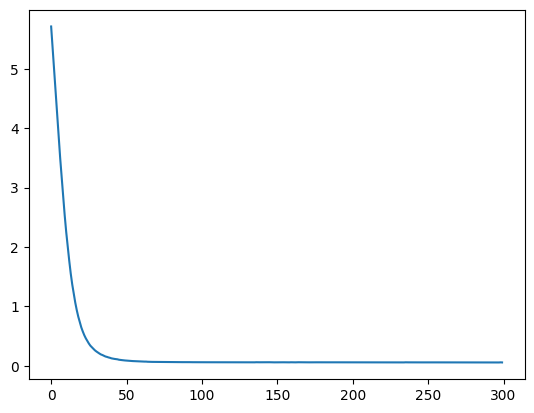

node: left_eye
Epoch [10], Loss: 0.8125
Epoch [20], Loss: 0.2267
Epoch [30], Loss: 0.1088
Epoch [40], Loss: 0.0767
Epoch [50], Loss: 0.0625
Epoch [60], Loss: 0.0575
Epoch [70], Loss: 0.0561
Epoch [80], Loss: 0.0572
Epoch [90], Loss: 0.0551
Epoch [100], Loss: 0.0555
Epoch [110], Loss: 0.0547
Epoch [120], Loss: 0.0570
Epoch [130], Loss: 0.0567
Epoch [140], Loss: 0.0551
Epoch [150], Loss: 0.0567
Epoch [160], Loss: 0.0543
Epoch [170], Loss: 0.0543
Epoch [180], Loss: 0.0549
Epoch [190], Loss: 0.0540
Epoch [200], Loss: 0.0550
Epoch [210], Loss: 0.0547
Epoch [220], Loss: 0.0545
Epoch [230], Loss: 0.0566
Epoch [240], Loss: 0.0548
Epoch [250], Loss: 0.0565
Epoch [260], Loss: 0.0565
Epoch [270], Loss: 0.0539
Epoch [280], Loss: 0.0545
Epoch [290], Loss: 0.0539
Epoch [300], Loss: 0.0540


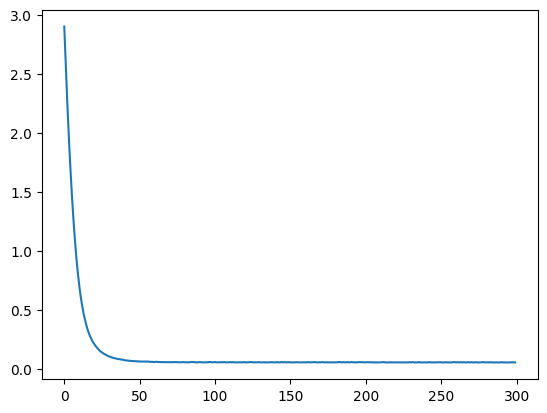

node: right_ear
Epoch [10], Loss: 0.9861
Epoch [20], Loss: 0.9531
Epoch [30], Loss: 0.9469
Epoch [40], Loss: 0.8894
Epoch [50], Loss: 0.8625
Epoch [60], Loss: 0.8507
Epoch [70], Loss: 0.8348
Epoch [80], Loss: 0.8109
Epoch [90], Loss: 0.7954
Epoch [100], Loss: 0.7879
Epoch [110], Loss: 0.7792
Epoch [120], Loss: 0.7581
Epoch [130], Loss: 0.7590
Epoch [140], Loss: 0.7552
Epoch [150], Loss: 0.7383
Epoch [160], Loss: 0.7386
Epoch [170], Loss: 0.7326
Epoch [180], Loss: 0.7147
Epoch [190], Loss: 0.7323
Epoch [200], Loss: 0.7161
Epoch [210], Loss: 0.7174
Epoch [220], Loss: 0.7196
Epoch [230], Loss: 0.7094
Epoch [240], Loss: 0.7233
Epoch [250], Loss: 0.7081
Epoch [260], Loss: 0.6989
Epoch [270], Loss: 0.7136
Epoch [280], Loss: 0.6967
Epoch [290], Loss: 0.6960
Epoch [300], Loss: 0.7008


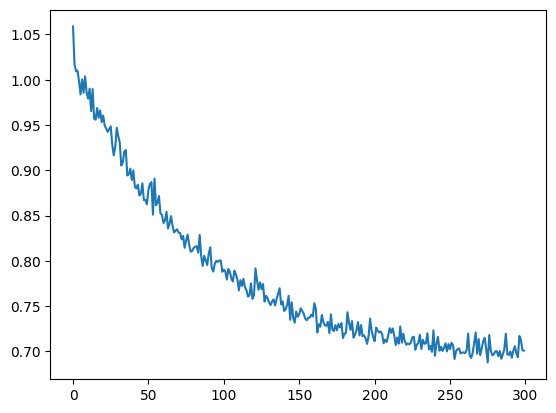

node: left_ear
Epoch [10], Loss: 0.6776
Epoch [20], Loss: 0.6636
Epoch [30], Loss: 0.6564
Epoch [40], Loss: 0.6438
Epoch [50], Loss: 0.6316
Epoch [60], Loss: 0.6224
Epoch [70], Loss: 0.6268
Epoch [80], Loss: 0.6174
Epoch [90], Loss: 0.6124
Epoch [100], Loss: 0.6177
Epoch [110], Loss: 0.6073
Epoch [120], Loss: 0.6059
Epoch [130], Loss: 0.6070
Epoch [140], Loss: 0.6088
Epoch [150], Loss: 0.6029
Epoch [160], Loss: 0.6000
Epoch [170], Loss: 0.6064
Epoch [180], Loss: 0.5995
Epoch [190], Loss: 0.6011
Epoch [200], Loss: 0.5935
Epoch [210], Loss: 0.5952
Epoch [220], Loss: 0.5935
Epoch [230], Loss: 0.5931
Epoch [240], Loss: 0.5943
Epoch [250], Loss: 0.5932
Epoch [260], Loss: 0.5961
Epoch [270], Loss: 0.6025
Epoch [280], Loss: 0.6057
Epoch [290], Loss: 0.6017
Epoch [300], Loss: 0.5891


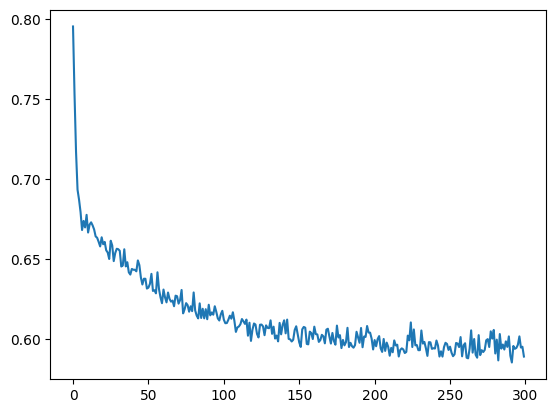

=== disgust ===
node: nose
Epoch [10], Loss: 1.0721
Epoch [20], Loss: 0.4175
Epoch [30], Loss: 0.2271
Epoch [40], Loss: 0.1455
Epoch [50], Loss: 0.1038
Epoch [60], Loss: 0.0794
Epoch [70], Loss: 0.0648
Epoch [80], Loss: 0.0533
Epoch [90], Loss: 0.0457
Epoch [100], Loss: 0.0403
Epoch [110], Loss: 0.0361
Epoch [120], Loss: 0.0326
Epoch [130], Loss: 0.0296
Epoch [140], Loss: 0.0277
Epoch [150], Loss: 0.0262
Epoch [160], Loss: 0.0244
Epoch [170], Loss: 0.0232
Epoch [180], Loss: 0.0223
Epoch [190], Loss: 0.0216
Epoch [200], Loss: 0.0205
Epoch [210], Loss: 0.0201
Epoch [220], Loss: 0.0192
Epoch [230], Loss: 0.0188
Epoch [240], Loss: 0.0184
Epoch [250], Loss: 0.0181
Epoch [260], Loss: 0.0177
Epoch [270], Loss: 0.0177
Epoch [280], Loss: 0.0174
Epoch [290], Loss: 0.0172
Epoch [300], Loss: 0.0172


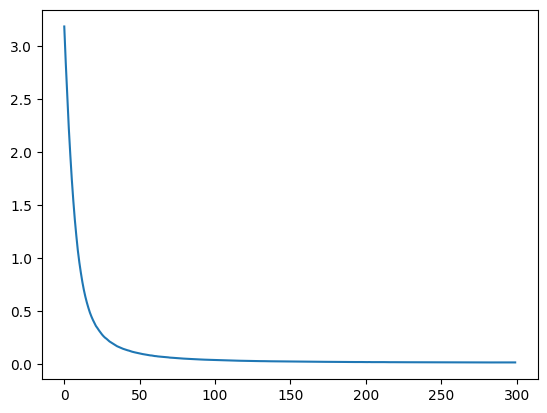

node: right_shoulder
Epoch [10], Loss: 0.0398
Epoch [20], Loss: 0.0364
Epoch [30], Loss: 0.0328
Epoch [40], Loss: 0.0316
Epoch [50], Loss: 0.0332
Epoch [60], Loss: 0.0303
Epoch [70], Loss: 0.0299
Epoch [80], Loss: 0.0296
Epoch [90], Loss: 0.0297
Epoch [100], Loss: 0.0294
Epoch [110], Loss: 0.0293
Epoch [120], Loss: 0.0292
Epoch [130], Loss: 0.0292
Epoch [140], Loss: 0.0292
Epoch [150], Loss: 0.0292
Epoch [160], Loss: 0.0316
Epoch [170], Loss: 0.0293
Epoch [180], Loss: 0.0291
Epoch [190], Loss: 0.0317
Epoch [200], Loss: 0.0316
Epoch [210], Loss: 0.0293
Epoch [220], Loss: 0.0317
Epoch [230], Loss: 0.0292
Epoch [240], Loss: 0.0320
Epoch [250], Loss: 0.0318
Epoch [260], Loss: 0.0291
Epoch [270], Loss: 0.0317
Epoch [280], Loss: 0.0296
Epoch [290], Loss: 0.0296
Epoch [300], Loss: 0.0294


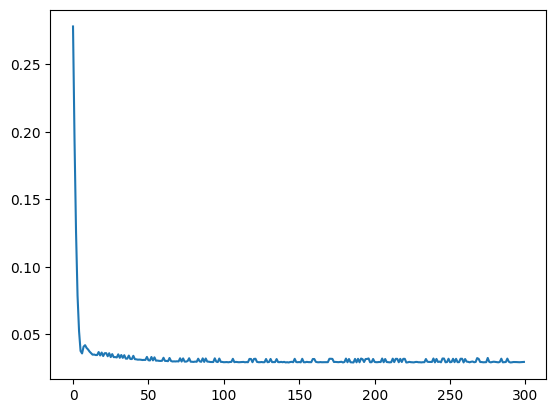

node: left_shoulder
Epoch [10], Loss: 0.0370
Epoch [20], Loss: 0.0362
Epoch [30], Loss: 0.0360
Epoch [40], Loss: 0.0361
Epoch [50], Loss: 0.0392
Epoch [60], Loss: 0.0360
Epoch [70], Loss: 0.0388
Epoch [80], Loss: 0.0388
Epoch [90], Loss: 0.0387
Epoch [100], Loss: 0.0389
Epoch [110], Loss: 0.0363
Epoch [120], Loss: 0.0363
Epoch [130], Loss: 0.0388
Epoch [140], Loss: 0.0363
Epoch [150], Loss: 0.0359
Epoch [160], Loss: 0.0370
Epoch [170], Loss: 0.0365
Epoch [180], Loss: 0.0365
Epoch [190], Loss: 0.0366
Epoch [200], Loss: 0.0361
Epoch [210], Loss: 0.0391
Epoch [220], Loss: 0.0361
Epoch [230], Loss: 0.0361
Epoch [240], Loss: 0.0364
Epoch [250], Loss: 0.0389
Epoch [260], Loss: 0.0362
Epoch [270], Loss: 0.0363
Epoch [280], Loss: 0.0362
Epoch [290], Loss: 0.0389
Epoch [300], Loss: 0.0366


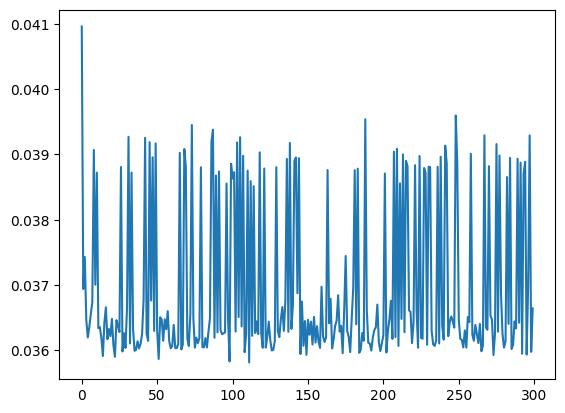

node: right_thigh
Epoch [10], Loss: 0.0644
Epoch [20], Loss: 0.0278
Epoch [30], Loss: 0.0178
Epoch [40], Loss: 0.0141
Epoch [50], Loss: 0.0114
Epoch [60], Loss: 0.0101
Epoch [70], Loss: 0.0099
Epoch [80], Loss: 0.0094
Epoch [90], Loss: 0.0085
Epoch [100], Loss: 0.0082
Epoch [110], Loss: 0.0080
Epoch [120], Loss: 0.0086
Epoch [130], Loss: 0.0079
Epoch [140], Loss: 0.0078
Epoch [150], Loss: 0.0084
Epoch [160], Loss: 0.0077
Epoch [170], Loss: 0.0076
Epoch [180], Loss: 0.0076
Epoch [190], Loss: 0.0083
Epoch [200], Loss: 0.0083
Epoch [210], Loss: 0.0076
Epoch [220], Loss: 0.0076
Epoch [230], Loss: 0.0076
Epoch [240], Loss: 0.0076
Epoch [250], Loss: 0.0075
Epoch [260], Loss: 0.0083
Epoch [270], Loss: 0.0075
Epoch [280], Loss: 0.0075
Epoch [290], Loss: 0.0083
Epoch [300], Loss: 0.0075


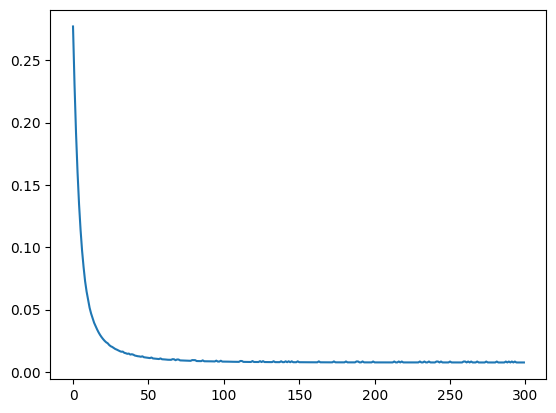

node: left_thigh
Epoch [10], Loss: 0.0856
Epoch [20], Loss: 0.0336
Epoch [30], Loss: 0.0187
Epoch [40], Loss: 0.0121
Epoch [50], Loss: 0.0085
Epoch [60], Loss: 0.0063
Epoch [70], Loss: 0.0049
Epoch [80], Loss: 0.0039
Epoch [90], Loss: 0.0032
Epoch [100], Loss: 0.0027
Epoch [110], Loss: 0.0023
Epoch [120], Loss: 0.0020
Epoch [130], Loss: 0.0017
Epoch [140], Loss: 0.0015
Epoch [150], Loss: 0.0014
Epoch [160], Loss: 0.0013
Epoch [170], Loss: 0.0011
Epoch [180], Loss: 0.0011
Epoch [190], Loss: 0.0010
Epoch [200], Loss: 0.0009
Epoch [210], Loss: 0.0009
Epoch [220], Loss: 0.0008
Epoch [230], Loss: 0.0008
Epoch [240], Loss: 0.0008
Epoch [250], Loss: 0.0007
Epoch [260], Loss: 0.0007
Epoch [270], Loss: 0.0007
Epoch [280], Loss: 0.0007
Epoch [290], Loss: 0.0007
Epoch [300], Loss: 0.0007


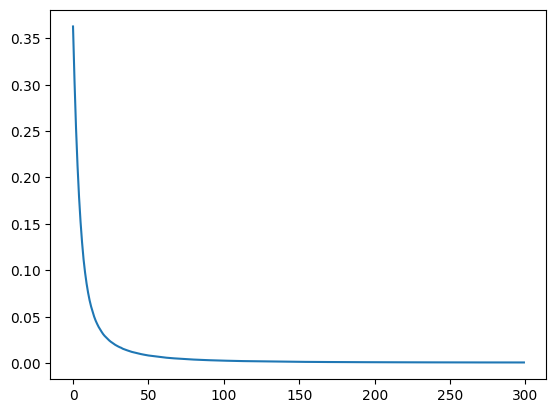

node: right_elbow
Epoch [10], Loss: 2.9049
Epoch [20], Loss: 1.7342
Epoch [30], Loss: 1.4330
Epoch [40], Loss: 1.3396
Epoch [50], Loss: 1.3134
Epoch [60], Loss: 1.3140
Epoch [70], Loss: 1.3218
Epoch [80], Loss: 1.3148
Epoch [90], Loss: 1.3234
Epoch [100], Loss: 1.2975
Epoch [110], Loss: 1.3084
Epoch [120], Loss: 1.3164
Epoch [130], Loss: 1.3099
Epoch [140], Loss: 1.2956
Epoch [150], Loss: 1.2782
Epoch [160], Loss: 1.2992
Epoch [170], Loss: 1.2824
Epoch [180], Loss: 1.2677
Epoch [190], Loss: 1.2480
Epoch [200], Loss: 1.2871
Epoch [210], Loss: 1.2409
Epoch [220], Loss: 1.2577
Epoch [230], Loss: 1.2779
Epoch [240], Loss: 1.2821
Epoch [250], Loss: 1.2244
Epoch [260], Loss: 1.2402
Epoch [270], Loss: 1.2576
Epoch [280], Loss: 1.2092
Epoch [290], Loss: 1.2208
Epoch [300], Loss: 1.2182


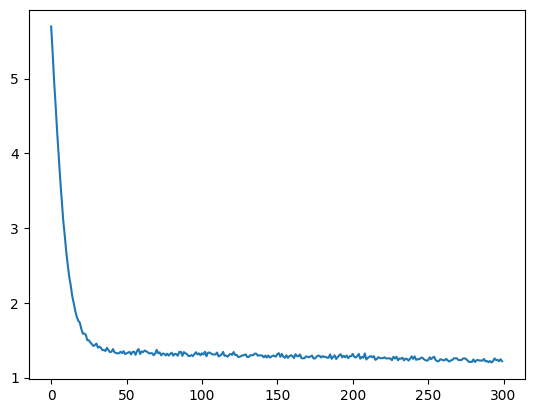

node: left_elbow
Epoch [10], Loss: 1.4341
Epoch [20], Loss: 1.4460
Epoch [30], Loss: 1.3964
Epoch [40], Loss: 1.4323
Epoch [50], Loss: 1.3625
Epoch [60], Loss: 1.3537
Epoch [70], Loss: 1.3441
Epoch [80], Loss: 1.3053
Epoch [90], Loss: 1.3428
Epoch [100], Loss: 1.3295
Epoch [110], Loss: 1.2790
Epoch [120], Loss: 1.3112
Epoch [130], Loss: 1.2791
Epoch [140], Loss: 1.2972
Epoch [150], Loss: 1.2841
Epoch [160], Loss: 1.3029
Epoch [170], Loss: 1.2338
Epoch [180], Loss: 1.2480
Epoch [190], Loss: 1.2403
Epoch [200], Loss: 1.2346
Epoch [210], Loss: 1.2736
Epoch [220], Loss: 1.2273
Epoch [230], Loss: 1.2378
Epoch [240], Loss: 1.2230
Epoch [250], Loss: 1.2322
Epoch [260], Loss: 1.1904
Epoch [270], Loss: 1.2090
Epoch [280], Loss: 1.2054
Epoch [290], Loss: 1.2651
Epoch [300], Loss: 1.1824


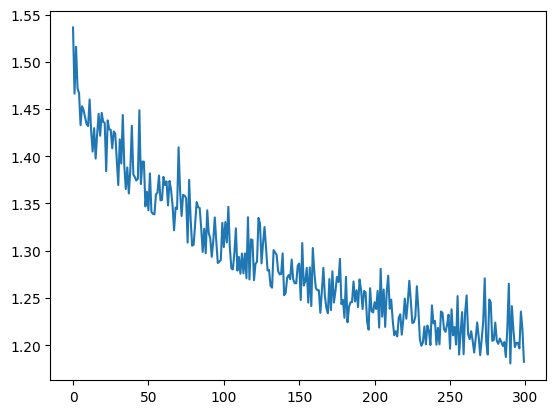

node: right_hand
Epoch [10], Loss: 2.2716
Epoch [20], Loss: 2.1772
Epoch [30], Loss: 2.1531
Epoch [40], Loss: 2.1031
Epoch [50], Loss: 2.0881
Epoch [60], Loss: 2.0438
Epoch [70], Loss: 2.0457
Epoch [80], Loss: 2.0801
Epoch [90], Loss: 2.0272
Epoch [100], Loss: 1.9733
Epoch [110], Loss: 1.9591
Epoch [120], Loss: 1.9378
Epoch [130], Loss: 1.9195
Epoch [140], Loss: 1.9032
Epoch [150], Loss: 1.8821
Epoch [160], Loss: 1.8500
Epoch [170], Loss: 1.8582
Epoch [180], Loss: 1.8472
Epoch [190], Loss: 1.8478
Epoch [200], Loss: 1.7859
Epoch [210], Loss: 1.8126
Epoch [220], Loss: 1.7945
Epoch [230], Loss: 1.7694
Epoch [240], Loss: 1.7697
Epoch [250], Loss: 1.7436
Epoch [260], Loss: 1.7407
Epoch [270], Loss: 1.7439
Epoch [280], Loss: 1.7354
Epoch [290], Loss: 1.7300
Epoch [300], Loss: 1.6912


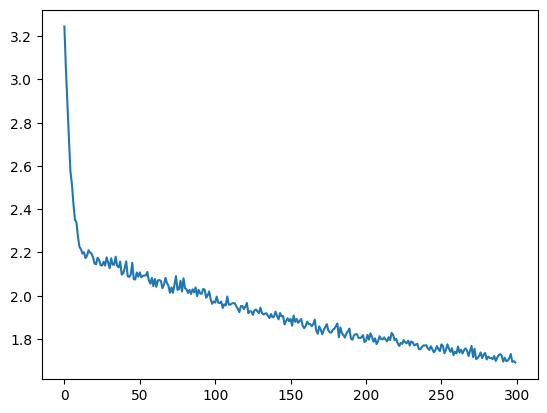

node: left_hand
Epoch [10], Loss: 2.4502
Epoch [20], Loss: 2.4553
Epoch [30], Loss: 2.4163
Epoch [40], Loss: 2.3270
Epoch [50], Loss: 2.3064
Epoch [60], Loss: 2.2415
Epoch [70], Loss: 2.2463
Epoch [80], Loss: 2.2053
Epoch [90], Loss: 2.1666
Epoch [100], Loss: 2.1352
Epoch [110], Loss: 2.0925
Epoch [120], Loss: 2.0725
Epoch [130], Loss: 2.0196
Epoch [140], Loss: 2.0214
Epoch [150], Loss: 1.9708
Epoch [160], Loss: 1.9672
Epoch [170], Loss: 1.9339
Epoch [180], Loss: 1.9102
Epoch [190], Loss: 1.9132
Epoch [200], Loss: 1.8799
Epoch [210], Loss: 1.8723
Epoch [220], Loss: 1.8878
Epoch [230], Loss: 1.8843
Epoch [240], Loss: 1.8317
Epoch [250], Loss: 1.8323
Epoch [260], Loss: 1.8275
Epoch [270], Loss: 1.8174
Epoch [280], Loss: 1.8055
Epoch [290], Loss: 1.7969
Epoch [300], Loss: 1.7766


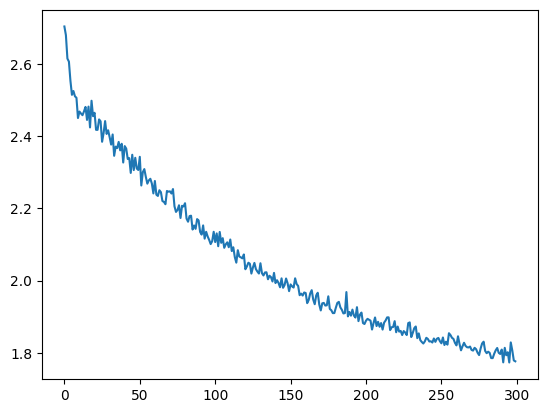

node: right_knee
Epoch [10], Loss: 1.0606
Epoch [20], Loss: 0.4134
Epoch [30], Loss: 0.2248
Epoch [40], Loss: 0.1450
Epoch [50], Loss: 0.1023
Epoch [60], Loss: 0.0769
Epoch [70], Loss: 0.0605
Epoch [80], Loss: 0.0491
Epoch [90], Loss: 0.0404
Epoch [100], Loss: 0.0343
Epoch [110], Loss: 0.0296
Epoch [120], Loss: 0.0258
Epoch [130], Loss: 0.0227
Epoch [140], Loss: 0.0202
Epoch [150], Loss: 0.0181
Epoch [160], Loss: 0.0164
Epoch [170], Loss: 0.0149
Epoch [180], Loss: 0.0136
Epoch [190], Loss: 0.0126
Epoch [200], Loss: 0.0116
Epoch [210], Loss: 0.0108
Epoch [220], Loss: 0.0101
Epoch [230], Loss: 0.0094
Epoch [240], Loss: 0.0088
Epoch [250], Loss: 0.0083
Epoch [260], Loss: 0.0078
Epoch [270], Loss: 0.0073
Epoch [280], Loss: 0.0070
Epoch [290], Loss: 0.0066
Epoch [300], Loss: 0.0063


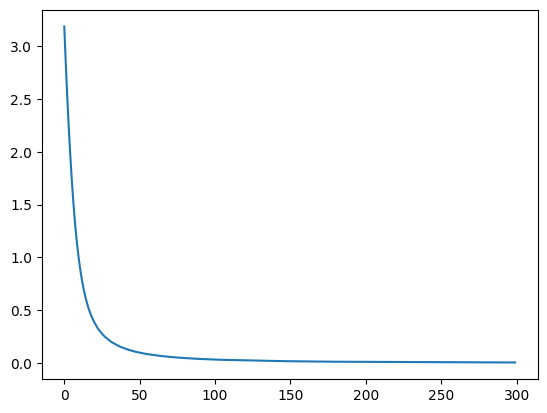

node: left_knee
Epoch [10], Loss: 0.9696
Epoch [20], Loss: 0.3818
Epoch [30], Loss: 0.2083
Epoch [40], Loss: 0.1351
Epoch [50], Loss: 0.0955
Epoch [60], Loss: 0.0719
Epoch [70], Loss: 0.0563
Epoch [80], Loss: 0.0452
Epoch [90], Loss: 0.0377
Epoch [100], Loss: 0.0318
Epoch [110], Loss: 0.0273
Epoch [120], Loss: 0.0236
Epoch [130], Loss: 0.0206
Epoch [140], Loss: 0.0182
Epoch [150], Loss: 0.0164
Epoch [160], Loss: 0.0148
Epoch [170], Loss: 0.0132
Epoch [180], Loss: 0.0119
Epoch [190], Loss: 0.0110
Epoch [200], Loss: 0.0101
Epoch [210], Loss: 0.0093
Epoch [220], Loss: 0.0085
Epoch [230], Loss: 0.0079
Epoch [240], Loss: 0.0073
Epoch [250], Loss: 0.0069
Epoch [260], Loss: 0.0064
Epoch [270], Loss: 0.0060
Epoch [280], Loss: 0.0056
Epoch [290], Loss: 0.0053
Epoch [300], Loss: 0.0050


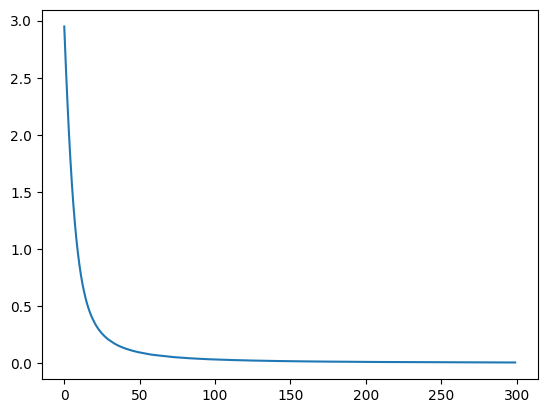

node: right_ankle
Epoch [10], Loss: 5.0016
Epoch [20], Loss: 1.8840
Epoch [30], Loss: 0.8329
Epoch [40], Loss: 0.4728
Epoch [50], Loss: 0.3058
Epoch [60], Loss: 0.2188
Epoch [70], Loss: 0.1664
Epoch [80], Loss: 0.1319
Epoch [90], Loss: 0.1073
Epoch [100], Loss: 0.0905
Epoch [110], Loss: 0.0776
Epoch [120], Loss: 0.0667
Epoch [130], Loss: 0.0590
Epoch [140], Loss: 0.0528
Epoch [150], Loss: 0.0475
Epoch [160], Loss: 0.0429
Epoch [170], Loss: 0.0395
Epoch [180], Loss: 0.0363
Epoch [190], Loss: 0.0337
Epoch [200], Loss: 0.0315
Epoch [210], Loss: 0.0292
Epoch [220], Loss: 0.0279
Epoch [230], Loss: 0.0263
Epoch [240], Loss: 0.0251
Epoch [250], Loss: 0.0238
Epoch [260], Loss: 0.0228
Epoch [270], Loss: 0.0220
Epoch [280], Loss: 0.0208
Epoch [290], Loss: 0.0206
Epoch [300], Loss: 0.0194


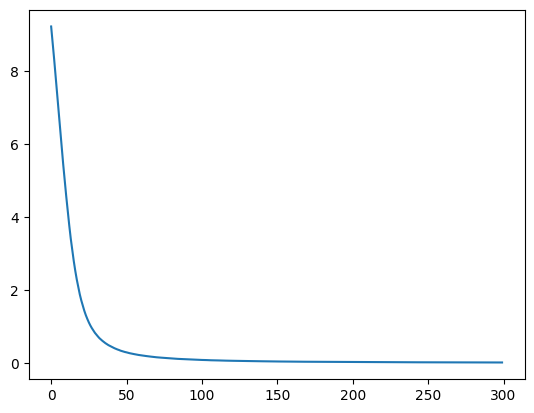

node: left_ankle
Epoch [10], Loss: 1.3379
Epoch [20], Loss: 0.5033
Epoch [30], Loss: 0.2636
Epoch [40], Loss: 0.1668
Epoch [50], Loss: 0.1165
Epoch [60], Loss: 0.0873
Epoch [70], Loss: 0.0684
Epoch [80], Loss: 0.0552
Epoch [90], Loss: 0.0462
Epoch [100], Loss: 0.0392
Epoch [110], Loss: 0.0339
Epoch [120], Loss: 0.0297
Epoch [130], Loss: 0.0264
Epoch [140], Loss: 0.0236
Epoch [150], Loss: 0.0215
Epoch [160], Loss: 0.0196
Epoch [170], Loss: 0.0180
Epoch [180], Loss: 0.0167
Epoch [190], Loss: 0.0155
Epoch [200], Loss: 0.0145
Epoch [210], Loss: 0.0138
Epoch [220], Loss: 0.0130
Epoch [230], Loss: 0.0124
Epoch [240], Loss: 0.0116
Epoch [250], Loss: 0.0110
Epoch [260], Loss: 0.0105
Epoch [270], Loss: 0.0101
Epoch [280], Loss: 0.0097
Epoch [290], Loss: 0.0094
Epoch [300], Loss: 0.0091


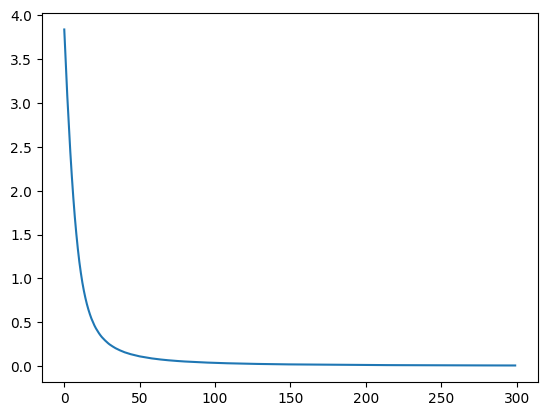

node: right_eye
Epoch [10], Loss: 1.5221
Epoch [20], Loss: 0.3795
Epoch [30], Loss: 0.1443
Epoch [40], Loss: 0.0853
Epoch [50], Loss: 0.0659
Epoch [60], Loss: 0.0591
Epoch [70], Loss: 0.0570
Epoch [80], Loss: 0.0543
Epoch [90], Loss: 0.0537
Epoch [100], Loss: 0.0537
Epoch [110], Loss: 0.0540
Epoch [120], Loss: 0.0554
Epoch [130], Loss: 0.0539
Epoch [140], Loss: 0.0544
Epoch [150], Loss: 0.0537
Epoch [160], Loss: 0.0535
Epoch [170], Loss: 0.0532
Epoch [180], Loss: 0.0536
Epoch [190], Loss: 0.0531
Epoch [200], Loss: 0.0531
Epoch [210], Loss: 0.0531
Epoch [220], Loss: 0.0531
Epoch [230], Loss: 0.0536
Epoch [240], Loss: 0.0528
Epoch [250], Loss: 0.0524
Epoch [260], Loss: 0.0531
Epoch [270], Loss: 0.0522
Epoch [280], Loss: 0.0523
Epoch [290], Loss: 0.0519
Epoch [300], Loss: 0.0517


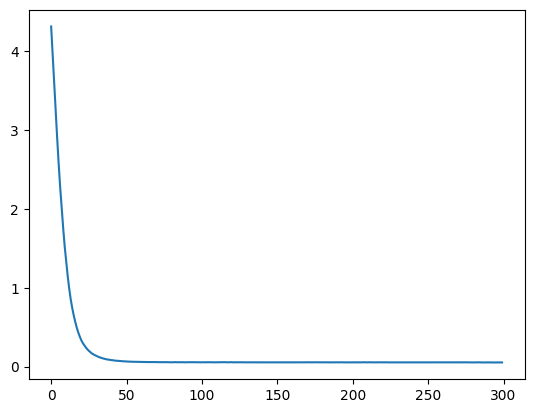

node: left_eye
Epoch [10], Loss: 6.4855
Epoch [20], Loss: 2.3780
Epoch [30], Loss: 0.6743
Epoch [40], Loss: 0.2737
Epoch [50], Loss: 0.1491
Epoch [60], Loss: 0.1002
Epoch [70], Loss: 0.0767
Epoch [80], Loss: 0.0654
Epoch [90], Loss: 0.0594
Epoch [100], Loss: 0.0556
Epoch [110], Loss: 0.0538
Epoch [120], Loss: 0.0529
Epoch [130], Loss: 0.0540
Epoch [140], Loss: 0.0517
Epoch [150], Loss: 0.0522
Epoch [160], Loss: 0.0516
Epoch [170], Loss: 0.0511
Epoch [180], Loss: 0.0532
Epoch [190], Loss: 0.0511
Epoch [200], Loss: 0.0511
Epoch [210], Loss: 0.0516
Epoch [220], Loss: 0.0512
Epoch [230], Loss: 0.0534
Epoch [240], Loss: 0.0535
Epoch [250], Loss: 0.0509
Epoch [260], Loss: 0.0511
Epoch [270], Loss: 0.0510
Epoch [280], Loss: 0.0507
Epoch [290], Loss: 0.0511
Epoch [300], Loss: 0.0513


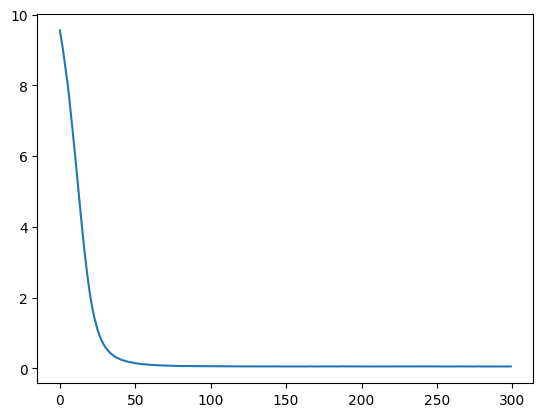

node: right_ear
Epoch [10], Loss: 0.8529
Epoch [20], Loss: 0.8363
Epoch [30], Loss: 0.8250
Epoch [40], Loss: 0.8010
Epoch [50], Loss: 0.7786
Epoch [60], Loss: 0.7671
Epoch [70], Loss: 0.7774
Epoch [80], Loss: 0.7479
Epoch [90], Loss: 0.7599
Epoch [100], Loss: 0.7474
Epoch [110], Loss: 0.7483
Epoch [120], Loss: 0.7192
Epoch [130], Loss: 0.7204
Epoch [140], Loss: 0.7218
Epoch [150], Loss: 0.7246
Epoch [160], Loss: 0.7239
Epoch [170], Loss: 0.7079
Epoch [180], Loss: 0.7035
Epoch [190], Loss: 0.7068
Epoch [200], Loss: 0.7005
Epoch [210], Loss: 0.7128
Epoch [220], Loss: 0.7114
Epoch [230], Loss: 0.7138
Epoch [240], Loss: 0.7048
Epoch [250], Loss: 0.7080
Epoch [260], Loss: 0.6943
Epoch [270], Loss: 0.7038
Epoch [280], Loss: 0.6952
Epoch [290], Loss: 0.7066
Epoch [300], Loss: 0.7056


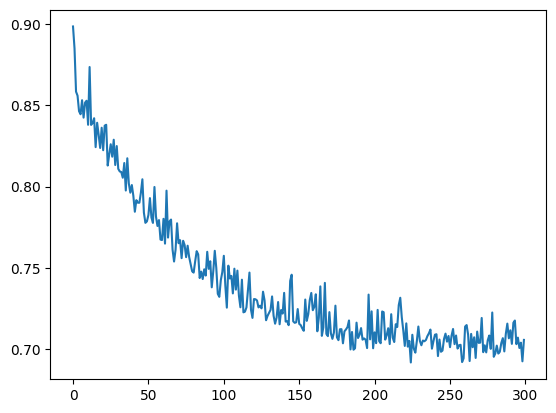

node: left_ear
Epoch [10], Loss: 0.7157
Epoch [20], Loss: 0.6813
Epoch [30], Loss: 0.6572
Epoch [40], Loss: 0.6320
Epoch [50], Loss: 0.5981
Epoch [60], Loss: 0.5793
Epoch [70], Loss: 0.5546
Epoch [80], Loss: 0.5415
Epoch [90], Loss: 0.5275
Epoch [100], Loss: 0.5096
Epoch [110], Loss: 0.5057
Epoch [120], Loss: 0.4878
Epoch [130], Loss: 0.4857
Epoch [140], Loss: 0.4771
Epoch [150], Loss: 0.4784
Epoch [160], Loss: 0.4660
Epoch [170], Loss: 0.4684
Epoch [180], Loss: 0.4605
Epoch [190], Loss: 0.4778
Epoch [200], Loss: 0.4657
Epoch [210], Loss: 0.4641
Epoch [220], Loss: 0.4621
Epoch [230], Loss: 0.4576
Epoch [240], Loss: 0.4578
Epoch [250], Loss: 0.4554
Epoch [260], Loss: 0.4456
Epoch [270], Loss: 0.4440
Epoch [280], Loss: 0.4440
Epoch [290], Loss: 0.4437
Epoch [300], Loss: 0.4476


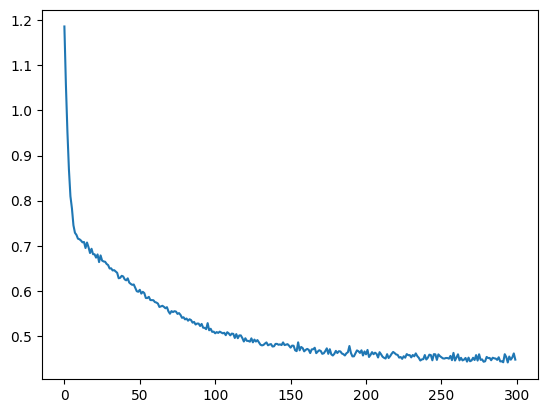

=== trust ===
node: nose
Epoch [10], Loss: 0.8159
Epoch [20], Loss: 0.3092
Epoch [30], Loss: 0.1659
Epoch [40], Loss: 0.1061
Epoch [50], Loss: 0.0751
Epoch [60], Loss: 0.0570
Epoch [70], Loss: 0.0451
Epoch [80], Loss: 0.0371
Epoch [90], Loss: 0.0314
Epoch [100], Loss: 0.0274
Epoch [110], Loss: 0.0245
Epoch [120], Loss: 0.0219
Epoch [130], Loss: 0.0202
Epoch [140], Loss: 0.0190
Epoch [150], Loss: 0.0176
Epoch [160], Loss: 0.0166
Epoch [170], Loss: 0.0160
Epoch [180], Loss: 0.0153
Epoch [190], Loss: 0.0147
Epoch [200], Loss: 0.0142
Epoch [210], Loss: 0.0139
Epoch [220], Loss: 0.0135
Epoch [230], Loss: 0.0133
Epoch [240], Loss: 0.0130
Epoch [250], Loss: 0.0126
Epoch [260], Loss: 0.0124
Epoch [270], Loss: 0.0123
Epoch [280], Loss: 0.0121
Epoch [290], Loss: 0.0120
Epoch [300], Loss: 0.0120


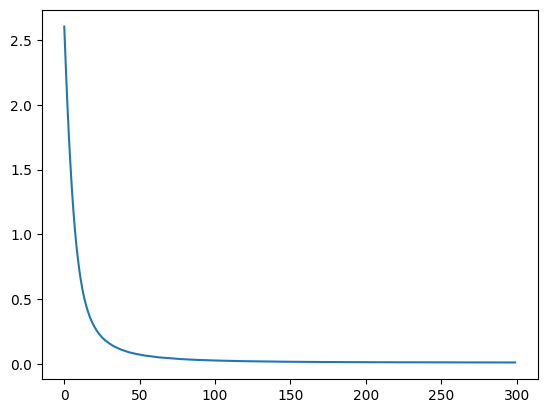

node: right_shoulder
Epoch [10], Loss: 1.0343
Epoch [20], Loss: 0.0747
Epoch [30], Loss: 0.0329
Epoch [40], Loss: 0.0326
Epoch [50], Loss: 0.0304
Epoch [60], Loss: 0.0303
Epoch [70], Loss: 0.0300
Epoch [80], Loss: 0.0301
Epoch [90], Loss: 0.0301
Epoch [100], Loss: 0.0300
Epoch [110], Loss: 0.0300
Epoch [120], Loss: 0.0305
Epoch [130], Loss: 0.0300
Epoch [140], Loss: 0.0301
Epoch [150], Loss: 0.0300
Epoch [160], Loss: 0.0300
Epoch [170], Loss: 0.0301
Epoch [180], Loss: 0.0325
Epoch [190], Loss: 0.0301
Epoch [200], Loss: 0.0299
Epoch [210], Loss: 0.0299
Epoch [220], Loss: 0.0299
Epoch [230], Loss: 0.0326
Epoch [240], Loss: 0.0299
Epoch [250], Loss: 0.0325
Epoch [260], Loss: 0.0301
Epoch [270], Loss: 0.0325
Epoch [280], Loss: 0.0299
Epoch [290], Loss: 0.0300
Epoch [300], Loss: 0.0299


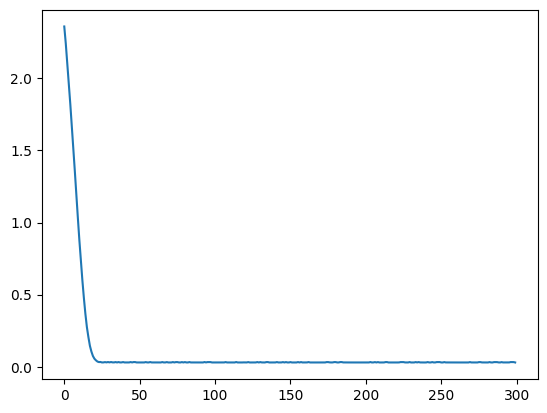

node: left_shoulder
Epoch [10], Loss: 0.2262
Epoch [20], Loss: 0.1150
Epoch [30], Loss: 0.1068
Epoch [40], Loss: 0.0979
Epoch [50], Loss: 0.0895
Epoch [60], Loss: 0.0813
Epoch [70], Loss: 0.0737
Epoch [80], Loss: 0.0673
Epoch [90], Loss: 0.0616
Epoch [100], Loss: 0.0566
Epoch [110], Loss: 0.0521
Epoch [120], Loss: 0.0487
Epoch [130], Loss: 0.0455
Epoch [140], Loss: 0.0464
Epoch [150], Loss: 0.0446
Epoch [160], Loss: 0.0401
Epoch [170], Loss: 0.0388
Epoch [180], Loss: 0.0379
Epoch [190], Loss: 0.0374
Epoch [200], Loss: 0.0371
Epoch [210], Loss: 0.0368
Epoch [220], Loss: 0.0365
Epoch [230], Loss: 0.0391
Epoch [240], Loss: 0.0390
Epoch [250], Loss: 0.0358
Epoch [260], Loss: 0.0387
Epoch [270], Loss: 0.0360
Epoch [280], Loss: 0.0356
Epoch [290], Loss: 0.0357
Epoch [300], Loss: 0.0385


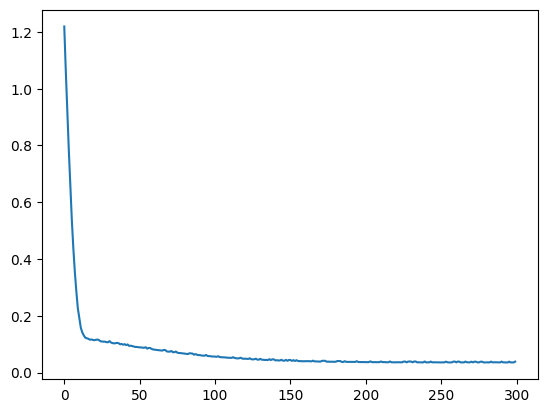

node: right_thigh
Epoch [10], Loss: 0.0595
Epoch [20], Loss: 0.0254
Epoch [30], Loss: 0.0159
Epoch [40], Loss: 0.0127
Epoch [50], Loss: 0.0102
Epoch [60], Loss: 0.0091
Epoch [70], Loss: 0.0090
Epoch [80], Loss: 0.0080
Epoch [90], Loss: 0.0083
Epoch [100], Loss: 0.0075
Epoch [110], Loss: 0.0074
Epoch [120], Loss: 0.0072
Epoch [130], Loss: 0.0072
Epoch [140], Loss: 0.0078
Epoch [150], Loss: 0.0078
Epoch [160], Loss: 0.0071
Epoch [170], Loss: 0.0070
Epoch [180], Loss: 0.0070
Epoch [190], Loss: 0.0070
Epoch [200], Loss: 0.0077
Epoch [210], Loss: 0.0070
Epoch [220], Loss: 0.0077
Epoch [230], Loss: 0.0070
Epoch [240], Loss: 0.0070
Epoch [250], Loss: 0.0070
Epoch [260], Loss: 0.0077
Epoch [270], Loss: 0.0070
Epoch [280], Loss: 0.0070
Epoch [290], Loss: 0.0070
Epoch [300], Loss: 0.0077


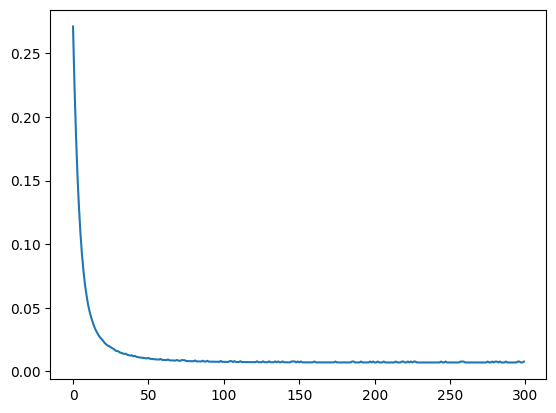

node: left_thigh
Epoch [10], Loss: 0.7591
Epoch [20], Loss: 0.2877
Epoch [30], Loss: 0.1535
Epoch [40], Loss: 0.0974
Epoch [50], Loss: 0.0676
Epoch [60], Loss: 0.0496
Epoch [70], Loss: 0.0384
Epoch [80], Loss: 0.0304
Epoch [90], Loss: 0.0247
Epoch [100], Loss: 0.0205
Epoch [110], Loss: 0.0172
Epoch [120], Loss: 0.0147
Epoch [130], Loss: 0.0127
Epoch [140], Loss: 0.0110
Epoch [150], Loss: 0.0096
Epoch [160], Loss: 0.0085
Epoch [170], Loss: 0.0076
Epoch [180], Loss: 0.0068
Epoch [190], Loss: 0.0061
Epoch [200], Loss: 0.0055
Epoch [210], Loss: 0.0050
Epoch [220], Loss: 0.0046
Epoch [230], Loss: 0.0042
Epoch [240], Loss: 0.0038
Epoch [250], Loss: 0.0035
Epoch [260], Loss: 0.0032
Epoch [270], Loss: 0.0030
Epoch [280], Loss: 0.0028
Epoch [290], Loss: 0.0025
Epoch [300], Loss: 0.0024


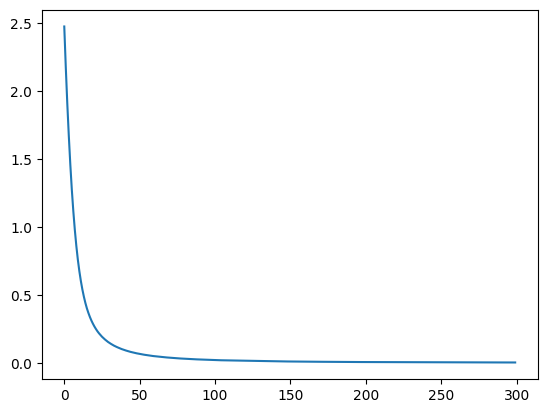

node: right_elbow
Epoch [10], Loss: 2.8134
Epoch [20], Loss: 1.7628
Epoch [30], Loss: 1.5146
Epoch [40], Loss: 1.4229
Epoch [50], Loss: 1.4216
Epoch [60], Loss: 1.4118
Epoch [70], Loss: 1.4265
Epoch [80], Loss: 1.4347
Epoch [90], Loss: 1.3637
Epoch [100], Loss: 1.3870
Epoch [110], Loss: 1.3664
Epoch [120], Loss: 1.3610
Epoch [130], Loss: 1.4046
Epoch [140], Loss: 1.3354
Epoch [150], Loss: 1.3546
Epoch [160], Loss: 1.3725
Epoch [170], Loss: 1.3392
Epoch [180], Loss: 1.3339
Epoch [190], Loss: 1.3561
Epoch [200], Loss: 1.3214
Epoch [210], Loss: 1.2918
Epoch [220], Loss: 1.3084
Epoch [230], Loss: 1.3361
Epoch [240], Loss: 1.3064
Epoch [250], Loss: 1.2879
Epoch [260], Loss: 1.3138
Epoch [270], Loss: 1.2630
Epoch [280], Loss: 1.2978
Epoch [290], Loss: 1.2451
Epoch [300], Loss: 1.2367


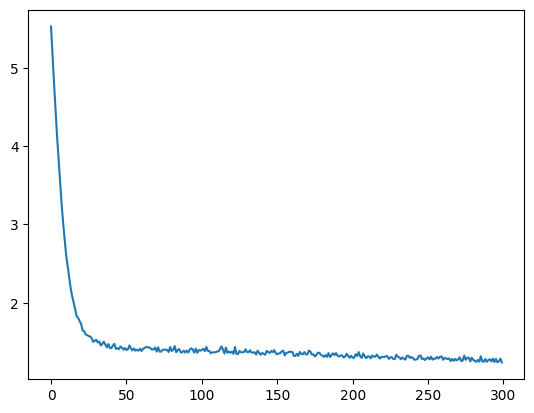

node: left_elbow
Epoch [10], Loss: 4.2672
Epoch [20], Loss: 2.4126
Epoch [30], Loss: 1.9341
Epoch [40], Loss: 1.7848
Epoch [50], Loss: 1.6732
Epoch [60], Loss: 1.7052
Epoch [70], Loss: 1.6350
Epoch [80], Loss: 1.5891
Epoch [90], Loss: 1.6754
Epoch [100], Loss: 1.5969
Epoch [110], Loss: 1.5636
Epoch [120], Loss: 1.5899
Epoch [130], Loss: 1.5788
Epoch [140], Loss: 1.5756
Epoch [150], Loss: 1.5347
Epoch [160], Loss: 1.5572
Epoch [170], Loss: 1.5176
Epoch [180], Loss: 1.5660
Epoch [190], Loss: 1.5491
Epoch [200], Loss: 1.5180
Epoch [210], Loss: 1.5079
Epoch [220], Loss: 1.4947
Epoch [230], Loss: 1.4579
Epoch [240], Loss: 1.4480
Epoch [250], Loss: 1.4371
Epoch [260], Loss: 1.4734
Epoch [270], Loss: 1.4171
Epoch [280], Loss: 1.4543
Epoch [290], Loss: 1.4174
Epoch [300], Loss: 1.4339


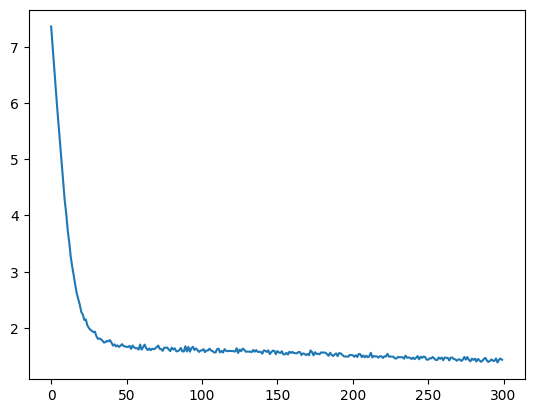

node: right_hand
Epoch [10], Loss: 2.2212
Epoch [20], Loss: 2.1512
Epoch [30], Loss: 2.1477
Epoch [40], Loss: 2.1309
Epoch [50], Loss: 2.1308
Epoch [60], Loss: 2.1470
Epoch [70], Loss: 2.1169
Epoch [80], Loss: 2.0837
Epoch [90], Loss: 2.0952
Epoch [100], Loss: 2.0603
Epoch [110], Loss: 2.0633
Epoch [120], Loss: 2.0272
Epoch [130], Loss: 2.0884
Epoch [140], Loss: 2.0513
Epoch [150], Loss: 2.0162
Epoch [160], Loss: 2.0314
Epoch [170], Loss: 2.0410
Epoch [180], Loss: 2.0212
Epoch [190], Loss: 1.9940
Epoch [200], Loss: 2.0058
Epoch [210], Loss: 2.0101
Epoch [220], Loss: 2.0108
Epoch [230], Loss: 2.0107
Epoch [240], Loss: 1.9925
Epoch [250], Loss: 1.9922
Epoch [260], Loss: 1.9626
Epoch [270], Loss: 1.9842
Epoch [280], Loss: 1.9612
Epoch [290], Loss: 1.9772
Epoch [300], Loss: 1.9696


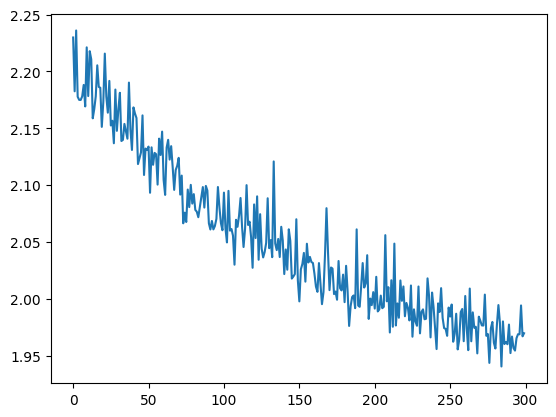

node: left_hand
Epoch [10], Loss: 2.3673
Epoch [20], Loss: 2.2154
Epoch [30], Loss: 2.2142
Epoch [40], Loss: 2.1559
Epoch [50], Loss: 2.1308
Epoch [60], Loss: 2.0996
Epoch [70], Loss: 2.0825
Epoch [80], Loss: 2.0501
Epoch [90], Loss: 1.9935
Epoch [100], Loss: 1.9947
Epoch [110], Loss: 1.9755
Epoch [120], Loss: 1.9590
Epoch [130], Loss: 1.9403
Epoch [140], Loss: 1.9049
Epoch [150], Loss: 1.8791
Epoch [160], Loss: 1.8718
Epoch [170], Loss: 1.8734
Epoch [180], Loss: 1.8386
Epoch [190], Loss: 1.8222
Epoch [200], Loss: 1.8256
Epoch [210], Loss: 1.8176
Epoch [220], Loss: 1.7782
Epoch [230], Loss: 1.7649
Epoch [240], Loss: 1.7919
Epoch [250], Loss: 1.7498
Epoch [260], Loss: 1.7354
Epoch [270], Loss: 1.7409
Epoch [280], Loss: 1.7451
Epoch [290], Loss: 1.7506
Epoch [300], Loss: 1.7353


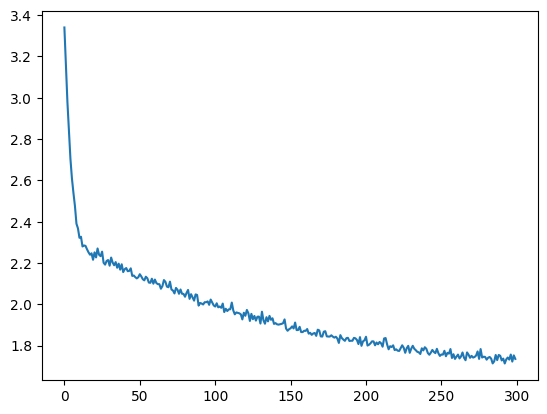

node: right_knee
Epoch [10], Loss: 1.9852
Epoch [20], Loss: 0.7715
Epoch [30], Loss: 0.4016
Epoch [40], Loss: 0.2490
Epoch [50], Loss: 0.1731
Epoch [60], Loss: 0.1284
Epoch [70], Loss: 0.0996
Epoch [80], Loss: 0.0799
Epoch [90], Loss: 0.0654
Epoch [100], Loss: 0.0554
Epoch [110], Loss: 0.0475
Epoch [120], Loss: 0.0411
Epoch [130], Loss: 0.0355
Epoch [140], Loss: 0.0317
Epoch [150], Loss: 0.0282
Epoch [160], Loss: 0.0254
Epoch [170], Loss: 0.0229
Epoch [180], Loss: 0.0210
Epoch [190], Loss: 0.0192
Epoch [200], Loss: 0.0177
Epoch [210], Loss: 0.0162
Epoch [220], Loss: 0.0150
Epoch [230], Loss: 0.0140
Epoch [240], Loss: 0.0133
Epoch [250], Loss: 0.0123
Epoch [260], Loss: 0.0115
Epoch [270], Loss: 0.0108
Epoch [280], Loss: 0.0102
Epoch [290], Loss: 0.0096
Epoch [300], Loss: 0.0091


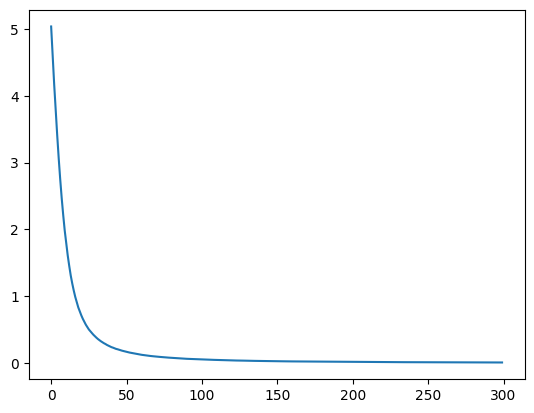

node: left_knee
Epoch [10], Loss: 0.8482
Epoch [20], Loss: 0.3320
Epoch [30], Loss: 0.1821
Epoch [40], Loss: 0.1178
Epoch [50], Loss: 0.0836
Epoch [60], Loss: 0.0628
Epoch [70], Loss: 0.0494
Epoch [80], Loss: 0.0399
Epoch [90], Loss: 0.0332
Epoch [100], Loss: 0.0280
Epoch [110], Loss: 0.0240
Epoch [120], Loss: 0.0208
Epoch [130], Loss: 0.0182
Epoch [140], Loss: 0.0162
Epoch [150], Loss: 0.0144
Epoch [160], Loss: 0.0130
Epoch [170], Loss: 0.0117
Epoch [180], Loss: 0.0106
Epoch [190], Loss: 0.0097
Epoch [200], Loss: 0.0089
Epoch [210], Loss: 0.0082
Epoch [220], Loss: 0.0076
Epoch [230], Loss: 0.0070
Epoch [240], Loss: 0.0065
Epoch [250], Loss: 0.0061
Epoch [260], Loss: 0.0057
Epoch [270], Loss: 0.0053
Epoch [280], Loss: 0.0050
Epoch [290], Loss: 0.0047
Epoch [300], Loss: 0.0044


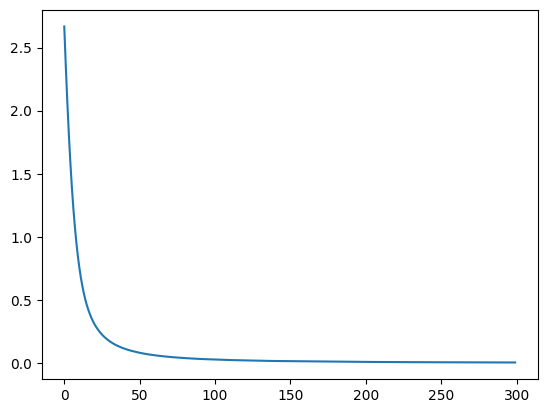

node: right_ankle
Epoch [10], Loss: 1.1270
Epoch [20], Loss: 0.4383
Epoch [30], Loss: 0.2362
Epoch [40], Loss: 0.1519
Epoch [50], Loss: 0.1082
Epoch [60], Loss: 0.0820
Epoch [70], Loss: 0.0657
Epoch [80], Loss: 0.0537
Epoch [90], Loss: 0.0454
Epoch [100], Loss: 0.0395
Epoch [110], Loss: 0.0345
Epoch [120], Loss: 0.0309
Epoch [130], Loss: 0.0281
Epoch [140], Loss: 0.0256
Epoch [150], Loss: 0.0239
Epoch [160], Loss: 0.0223
Epoch [170], Loss: 0.0205
Epoch [180], Loss: 0.0195
Epoch [190], Loss: 0.0188
Epoch [200], Loss: 0.0176
Epoch [210], Loss: 0.0167
Epoch [220], Loss: 0.0161
Epoch [230], Loss: 0.0159
Epoch [240], Loss: 0.0151
Epoch [250], Loss: 0.0150
Epoch [260], Loss: 0.0143
Epoch [270], Loss: 0.0138
Epoch [280], Loss: 0.0135
Epoch [290], Loss: 0.0131
Epoch [300], Loss: 0.0129


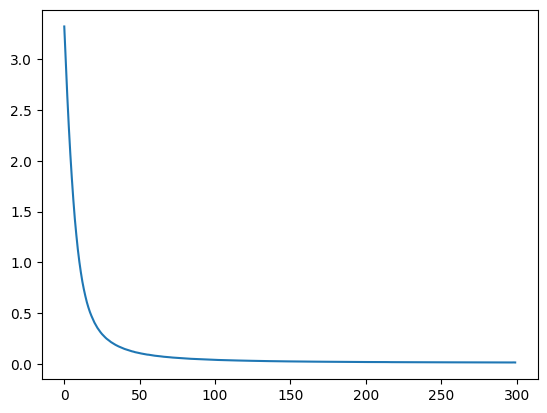

node: left_ankle
Epoch [10], Loss: 2.9758
Epoch [20], Loss: 1.0966
Epoch [30], Loss: 0.5301
Epoch [40], Loss: 0.3165
Epoch [50], Loss: 0.2141
Epoch [60], Loss: 0.1571
Epoch [70], Loss: 0.1202
Epoch [80], Loss: 0.0963
Epoch [90], Loss: 0.0786
Epoch [100], Loss: 0.0662
Epoch [110], Loss: 0.0561
Epoch [120], Loss: 0.0492
Epoch [130], Loss: 0.0430
Epoch [140], Loss: 0.0385
Epoch [150], Loss: 0.0345
Epoch [160], Loss: 0.0310
Epoch [170], Loss: 0.0284
Epoch [180], Loss: 0.0257
Epoch [190], Loss: 0.0240
Epoch [200], Loss: 0.0221
Epoch [210], Loss: 0.0207
Epoch [220], Loss: 0.0192
Epoch [230], Loss: 0.0182
Epoch [240], Loss: 0.0170
Epoch [250], Loss: 0.0159
Epoch [260], Loss: 0.0154
Epoch [270], Loss: 0.0144
Epoch [280], Loss: 0.0138
Epoch [290], Loss: 0.0132
Epoch [300], Loss: 0.0126


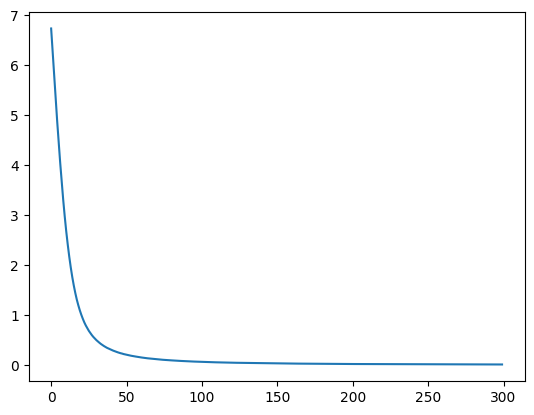

node: right_eye
Epoch [10], Loss: 0.8290
Epoch [20], Loss: 0.2492
Epoch [30], Loss: 0.1381
Epoch [40], Loss: 0.1096
Epoch [50], Loss: 0.0985
Epoch [60], Loss: 0.0947
Epoch [70], Loss: 0.0936
Epoch [80], Loss: 0.0929
Epoch [90], Loss: 0.0904
Epoch [100], Loss: 0.0906
Epoch [110], Loss: 0.0889
Epoch [120], Loss: 0.0870
Epoch [130], Loss: 0.0870
Epoch [140], Loss: 0.0852
Epoch [150], Loss: 0.0852
Epoch [160], Loss: 0.0833
Epoch [170], Loss: 0.0817
Epoch [180], Loss: 0.0819
Epoch [190], Loss: 0.0796
Epoch [200], Loss: 0.0785
Epoch [210], Loss: 0.0785
Epoch [220], Loss: 0.0774
Epoch [230], Loss: 0.0748
Epoch [240], Loss: 0.0734
Epoch [250], Loss: 0.0724
Epoch [260], Loss: 0.0716
Epoch [270], Loss: 0.0711
Epoch [280], Loss: 0.0693
Epoch [290], Loss: 0.0678
Epoch [300], Loss: 0.0660


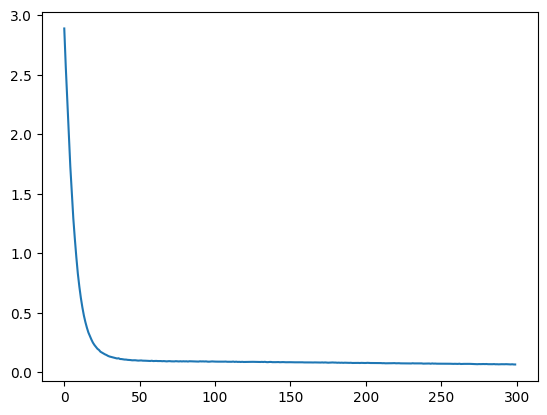

node: left_eye
Epoch [10], Loss: 1.0417
Epoch [20], Loss: 0.2913
Epoch [30], Loss: 0.1296
Epoch [40], Loss: 0.0837
Epoch [50], Loss: 0.0670
Epoch [60], Loss: 0.0592
Epoch [70], Loss: 0.0589
Epoch [80], Loss: 0.0548
Epoch [90], Loss: 0.0544
Epoch [100], Loss: 0.0564
Epoch [110], Loss: 0.0544
Epoch [120], Loss: 0.0563
Epoch [130], Loss: 0.0541
Epoch [140], Loss: 0.0551
Epoch [150], Loss: 0.0537
Epoch [160], Loss: 0.0541
Epoch [170], Loss: 0.0559
Epoch [180], Loss: 0.0543
Epoch [190], Loss: 0.0544
Epoch [200], Loss: 0.0559
Epoch [210], Loss: 0.0543
Epoch [220], Loss: 0.0535
Epoch [230], Loss: 0.0535
Epoch [240], Loss: 0.0533
Epoch [250], Loss: 0.0547
Epoch [260], Loss: 0.0539
Epoch [270], Loss: 0.0558
Epoch [280], Loss: 0.0543
Epoch [290], Loss: 0.0536
Epoch [300], Loss: 0.0536


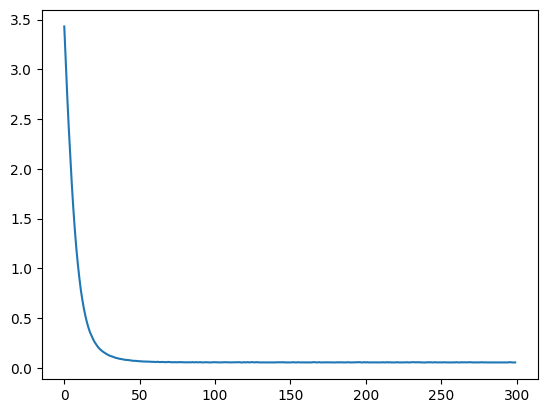

node: right_ear
Epoch [10], Loss: 1.5031
Epoch [20], Loss: 0.8416
Epoch [30], Loss: 0.7678
Epoch [40], Loss: 0.7865
Epoch [50], Loss: 0.7668
Epoch [60], Loss: 0.7571
Epoch [70], Loss: 0.7687
Epoch [80], Loss: 0.7528
Epoch [90], Loss: 0.7579
Epoch [100], Loss: 0.7481
Epoch [110], Loss: 0.7651
Epoch [120], Loss: 0.7484
Epoch [130], Loss: 0.7442
Epoch [140], Loss: 0.7430
Epoch [150], Loss: 0.7406
Epoch [160], Loss: 0.7579
Epoch [170], Loss: 0.7406
Epoch [180], Loss: 0.7454
Epoch [190], Loss: 0.7486
Epoch [200], Loss: 0.7594
Epoch [210], Loss: 0.7478
Epoch [220], Loss: 0.7407
Epoch [230], Loss: 0.7499
Epoch [240], Loss: 0.7281
Epoch [250], Loss: 0.7510
Epoch [260], Loss: 0.7305
Epoch [270], Loss: 0.7394
Epoch [280], Loss: 0.7295
Epoch [290], Loss: 0.7321
Epoch [300], Loss: 0.7422


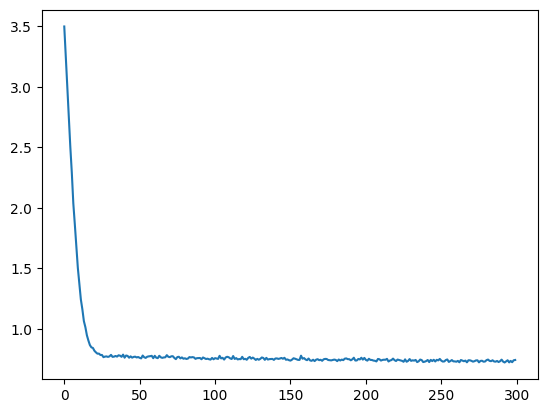

node: left_ear
Epoch [10], Loss: 0.8641
Epoch [20], Loss: 0.8280
Epoch [30], Loss: 0.7862
Epoch [40], Loss: 0.7476
Epoch [50], Loss: 0.7124
Epoch [60], Loss: 0.6924
Epoch [70], Loss: 0.6683
Epoch [80], Loss: 0.6477
Epoch [90], Loss: 0.6371
Epoch [100], Loss: 0.6174
Epoch [110], Loss: 0.6026
Epoch [120], Loss: 0.5910
Epoch [130], Loss: 0.5810
Epoch [140], Loss: 0.5748
Epoch [150], Loss: 0.5614
Epoch [160], Loss: 0.5584
Epoch [170], Loss: 0.5484
Epoch [180], Loss: 0.5487
Epoch [190], Loss: 0.5385
Epoch [200], Loss: 0.5337
Epoch [210], Loss: 0.5314
Epoch [220], Loss: 0.5328
Epoch [230], Loss: 0.5413
Epoch [240], Loss: 0.5249
Epoch [250], Loss: 0.5266
Epoch [260], Loss: 0.5309
Epoch [270], Loss: 0.5174
Epoch [280], Loss: 0.5183
Epoch [290], Loss: 0.5249
Epoch [300], Loss: 0.5219


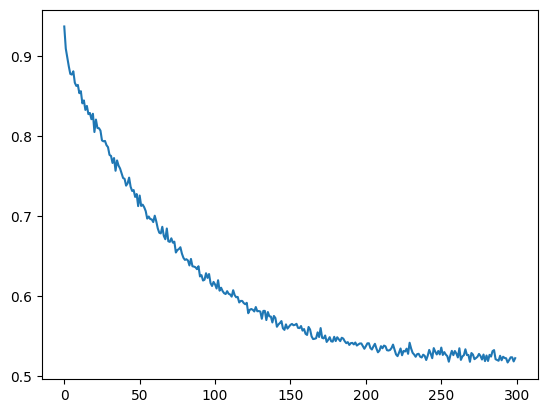

In [ ]:
import matplotlib.pyplot as plt

for a in POSE_ANGLE_DATA:
  print("-=-=-", a,"-=-=-")
  if a == "cosine":
    is_cosine = True
  else:
    is_cosine = False
  for e in EMOTION_DATA_NAMES:
    print("===", e, "===")
    for k in range(len(keypoint_names)):
      dataset = datasets[e][k][0] if is_cosine else datasets[e][k][1]
      print("node:", keypoint_names[k])
      model = keypoint_estimator_angle()
      loss_history = train_model(dataset, 10, model)
      plt.plot(loss_history)
      plt.show()
      model_path = "./model_angle_tanh_2/" + a + "/" + e + "/" + keypoint_names[k] + "_est_mdl.pth"
      torch.save(model, model_path)